# `Standard Libaries`

In [525]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import FunctionTransformer , StandardScaler , MinMaxScaler , OneHotEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer , KNNImputer , IterativeImputer
from sklearn.compose import ColumnTransformer , make_column_selector
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.pipeline import Pipeline , make_pipeline
from sklearn.metrics import mean_squared_error
import sklearn
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from catboost import CatBoostRegressor
import xgboost as xg

# `Our Dataset`

In [526]:
Housing_Data = pd.read_csv("/kaggle/input/housing-california-dataset/housing.csv")
Housing_Data.head(5)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [527]:
print(f'Housing Dataset Columns are :{Housing_Data.columns}')

Housing Dataset Columns are :Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')


In [528]:
Housing_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [529]:
Housing_Data.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

In [530]:
Housing_Data.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [531]:
Housing_Data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

### There are `207` missing record in `total_bedrooms` variable

In [532]:
Housing_Data.shape

(20640, 10)

In [533]:
Housing_Data.drop_duplicates(inplace=True)

In [534]:
Housing_Data.shape

(20640, 10)

### Notice that our dataset dosen't have any duplicates

In [535]:
Housing_Data.nunique()

longitude               844
latitude                862
housing_median_age       52
total_rooms            5926
total_bedrooms         1923
population             3888
households             1815
median_income         12928
median_house_value     3842
ocean_proximity           5
dtype: int64

### Notice that the `ocean_proximity` is a categorical feature

### ocean_proximity have `Five Categories` and it isn't with `Normal Distribution`

In [536]:
Housing_Data['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

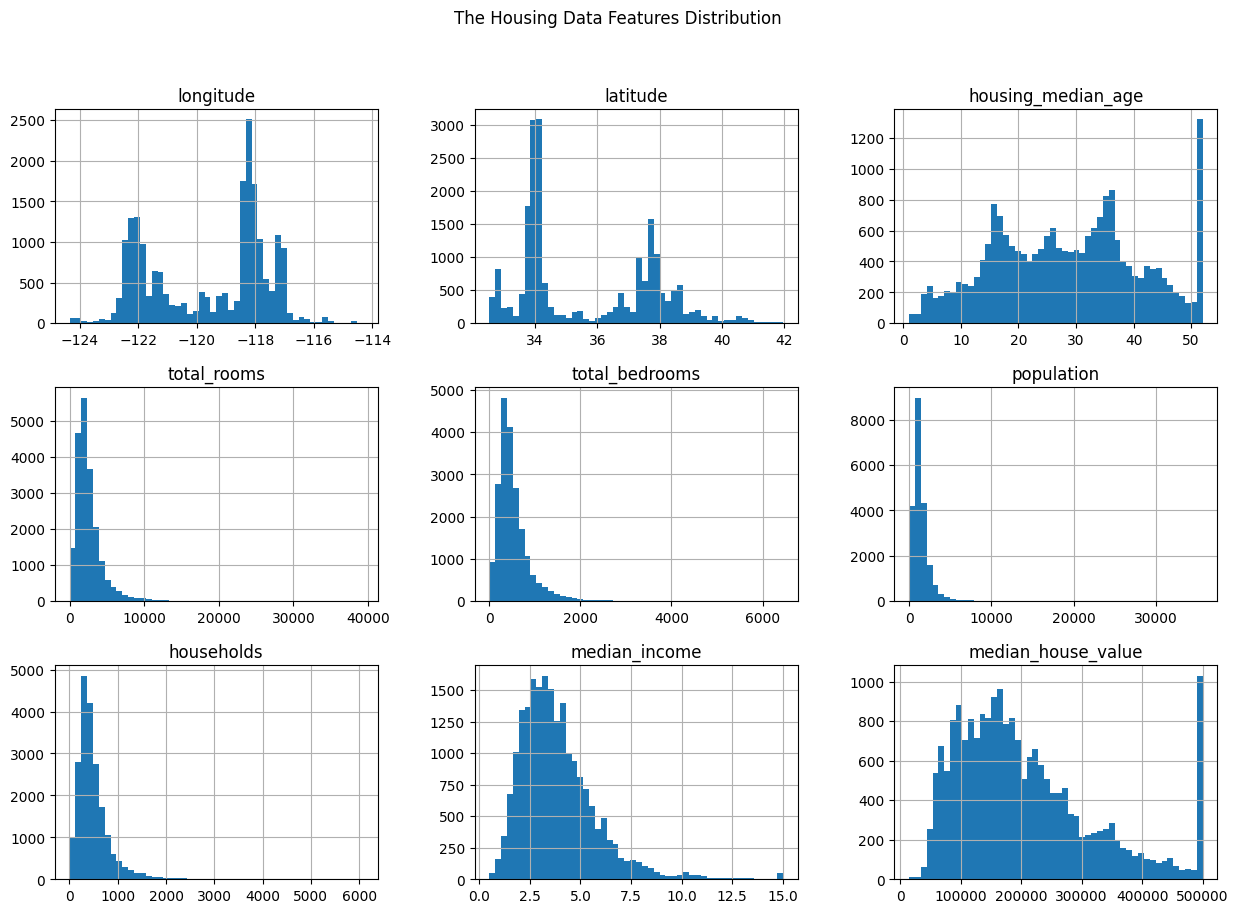

In [537]:
Housing_Data.hist(bins = 50 , figsize=(15,10))
plt.grid(True)
plt.suptitle('The Housing Data Features Distribution')
plt.show()

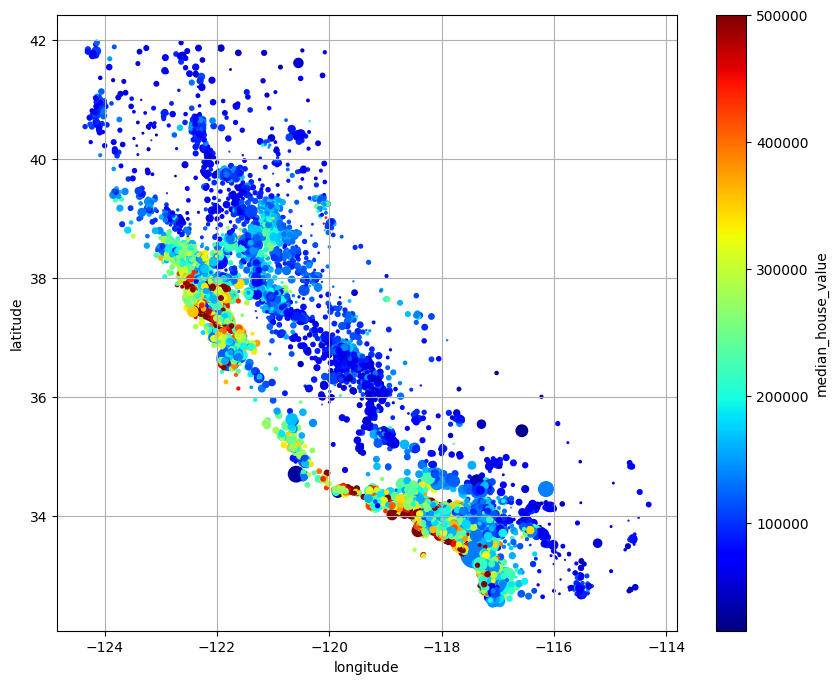

In [538]:
Housing_Data.plot(x='longitude', y='latitude',
             kind = 'scatter' , s=Housing_Data['population']/100 , grid = True ,
            c='median_house_value' , colorbar = True ,
            cmap = 'jet' , figsize=(10,8) , sharex=False)
plt.show()

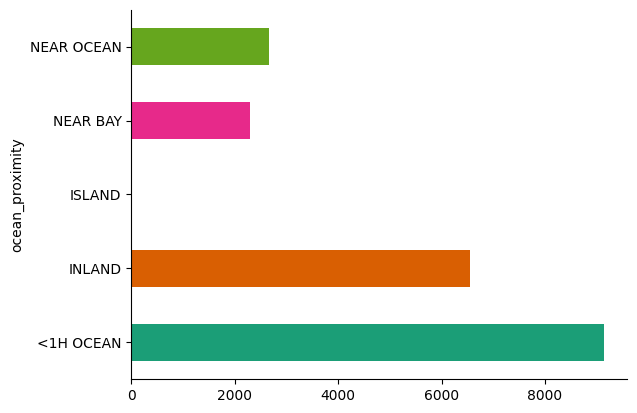

In [539]:
Housing_Data.groupby('ocean_proximity').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

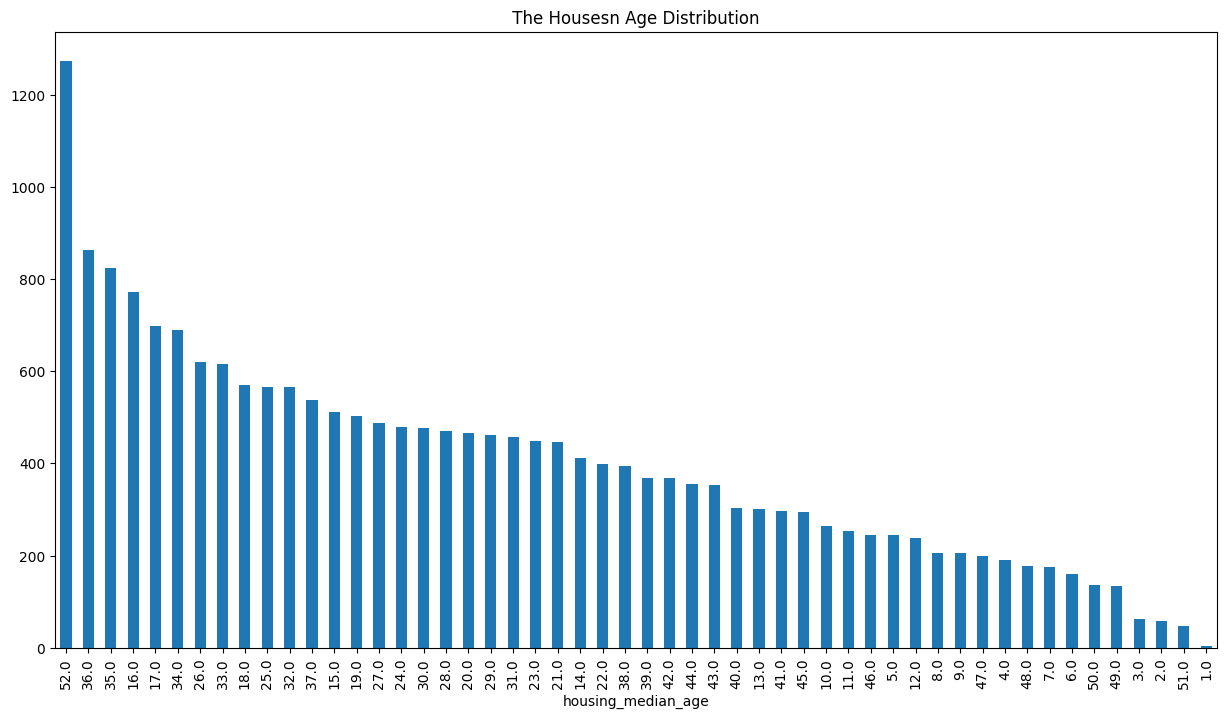

In [540]:
plt.figure(figsize=(15,8))
Housing_Data['housing_median_age'].value_counts().plot(kind='bar')
plt.title(' The Housesn Age Distribution ')
plt.show()

### from this histgram we notic that :
* #####  those features `total_rooms , total_bedrooms , population , households , median_income` is `Skewed Right`
* ##### `median_house_value` features ` is'nt uniform Distribution.`
* ##### those features `longitude , latitude , housing_median_age ` is ` multimodal Distribution. `

In [541]:
Data_Corr = Housing_Data.corr(numeric_only=True)
Data_Corr['median_house_value']

longitude            -0.045967
latitude             -0.144160
housing_median_age    0.105623
total_rooms           0.134153
total_bedrooms        0.049686
population           -0.024650
households            0.065843
median_income         0.688075
median_house_value    1.000000
Name: median_house_value, dtype: float64

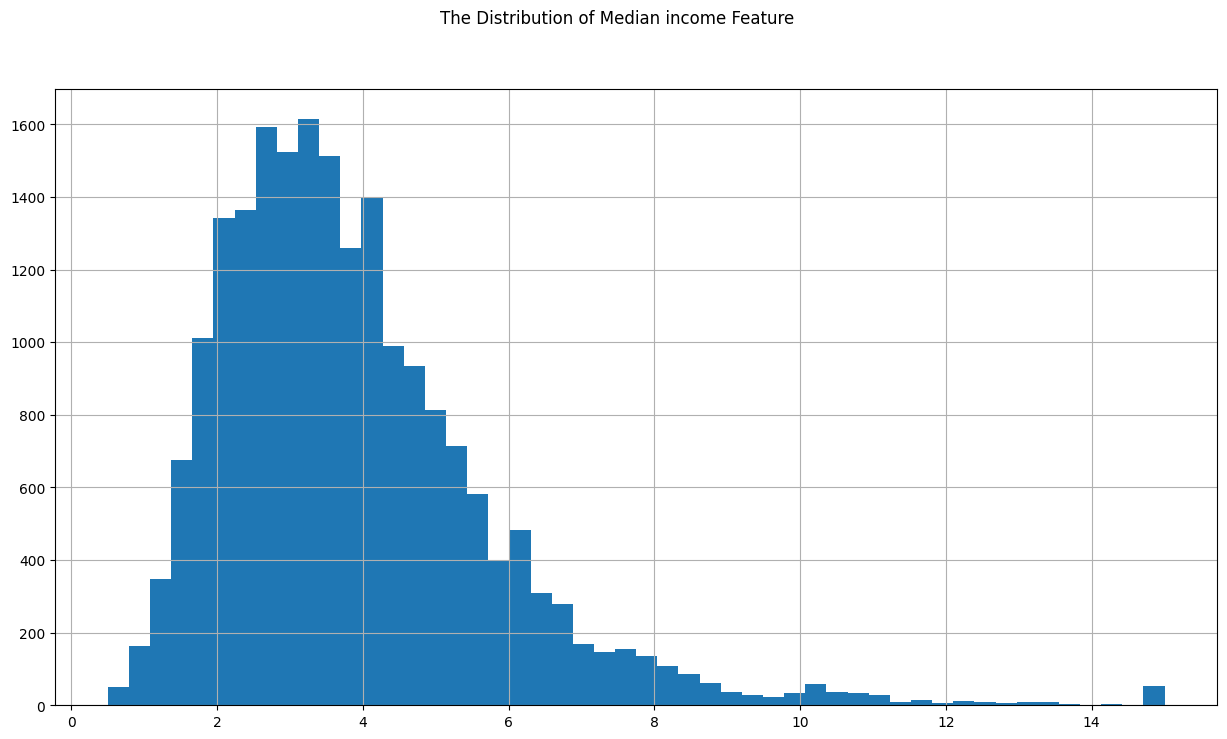

In [542]:
Housing_Data['median_income'].hist(bins=50 , figsize=(15,8))
plt.suptitle("The Distribution of Median income Feature")
plt.show()

### We notic that the `median income` have a `strong correlation` with our target `Median House Value`  and we see `the distribution of Median income` and we want to be sure that all ctergories be in training set and test set

### `for that we will use Stratified Split`

In [543]:
Housing_Data['median_income_cat'] = pd.cut(Housing_Data['median_income'] ,
                                           bins=[0,1.5,3,4.5,6,np.inf] ,
                                           labels=[1,2,3,4,5])

In [544]:
Housing_Data.head(5)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  \
0       322.0       126.0         8.3252            452600.0        NEAR BAY   
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY   
2       496.0       177.0         7.2574            352100.0        NEAR BAY   
3       558.0       219.0         5.6431            341300.0        NEAR BAY   
4       565.0       259.0         3.8462            342200.0        NEAR BAY   

  median_income_cat  
0                 5  
1                 5  
2                 5  
3                 4  
4                 3

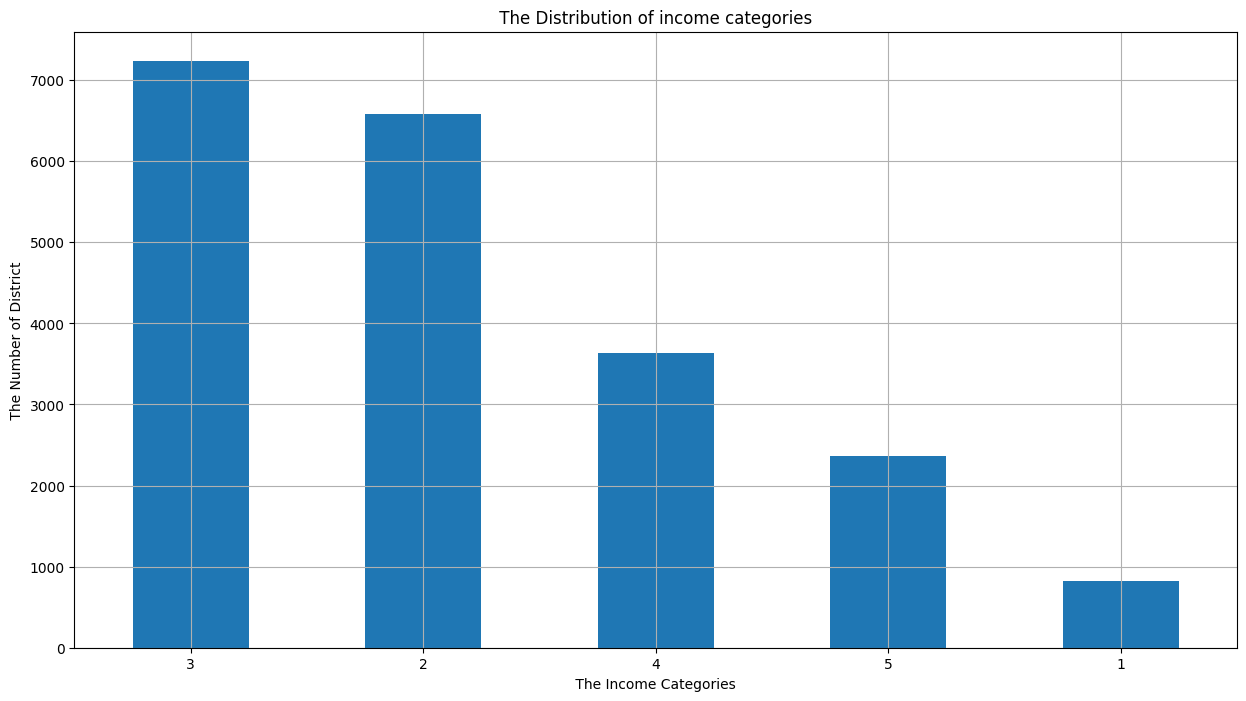

In [545]:
Housing_Data['median_income_cat'].value_counts().plot.bar(rot=0 , grid=True , figsize=(15,8))
plt.xlabel(' The Income Categories ')
plt.ylabel(' The Number of District ')
plt.title(" The Distribution of income categories ")
plt.show()

### `Splitting Our Data 'Stratified Split'`

In [546]:
Housing_Data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'median_income_cat'],
      dtype='object')

In [547]:
train_set , test_set = train_test_split(Housing_Data ,
                                        test_size=0.2 ,
                                        random_state=42 ,
                                       stratify=Housing_Data['median_income_cat'])

In [548]:
train_set.shape , test_set.shape

((16512, 11), (4128, 11))

### To Make sure the splitting is going right

In [549]:
train_set['median_income_cat'].value_counts() / len(train_set) *100

median_income_cat
3    35.059351
2    31.885901
4    17.629603
5    11.446221
1     3.978924
Name: count, dtype: float64

In [550]:
test_set['median_income_cat'].value_counts() / len(test_set) *100

median_income_cat
3    35.053295
2    31.879845
4    17.635659
5    11.434109
1     3.997093
Name: count, dtype: float64

### Droping The median income cat feature

In [551]:
for x in (train_set , test_set):
    x.drop('median_income_cat' , axis=1 , inplace=True)

In [552]:
train_set.shape , test_set.shape

((16512, 10), (4128, 10))

In [553]:
train_set.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [554]:
test_set.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

### Make a copy from our data to avoid any problems

In [555]:
Data_Housing = train_set.copy()
Data_Housing.head(5)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
13096    -122.42     37.80                52.0       3321.0          1115.0   
14973    -118.38     34.14                40.0       1965.0           354.0   
3785     -121.98     38.36                33.0       1083.0           217.0   
14689    -117.11     33.75                17.0       4174.0           851.0   
20507    -118.15     33.77                36.0       4366.0          1211.0   

       population  households  median_income  median_house_value  \
13096      1576.0      1034.0         2.0987            458300.0   
14973       666.0       357.0         6.0876            483800.0   
3785        562.0       203.0         2.4330            101700.0   
14689      1845.0       780.0         2.2618             96100.0   
20507      1912.0      1172.0         3.5292            361800.0   

      ocean_proximity  
13096        NEAR BAY  
14973       <1H OCEAN  
3785           INLAND  
14689          INLAND  
20507      NEAR OCEAN

In [556]:
Data_Housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        168
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [557]:
Data_Housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [558]:
Data_Corr_Train = Data_Housing.corr(numeric_only=True)
Data_Corr_Train['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

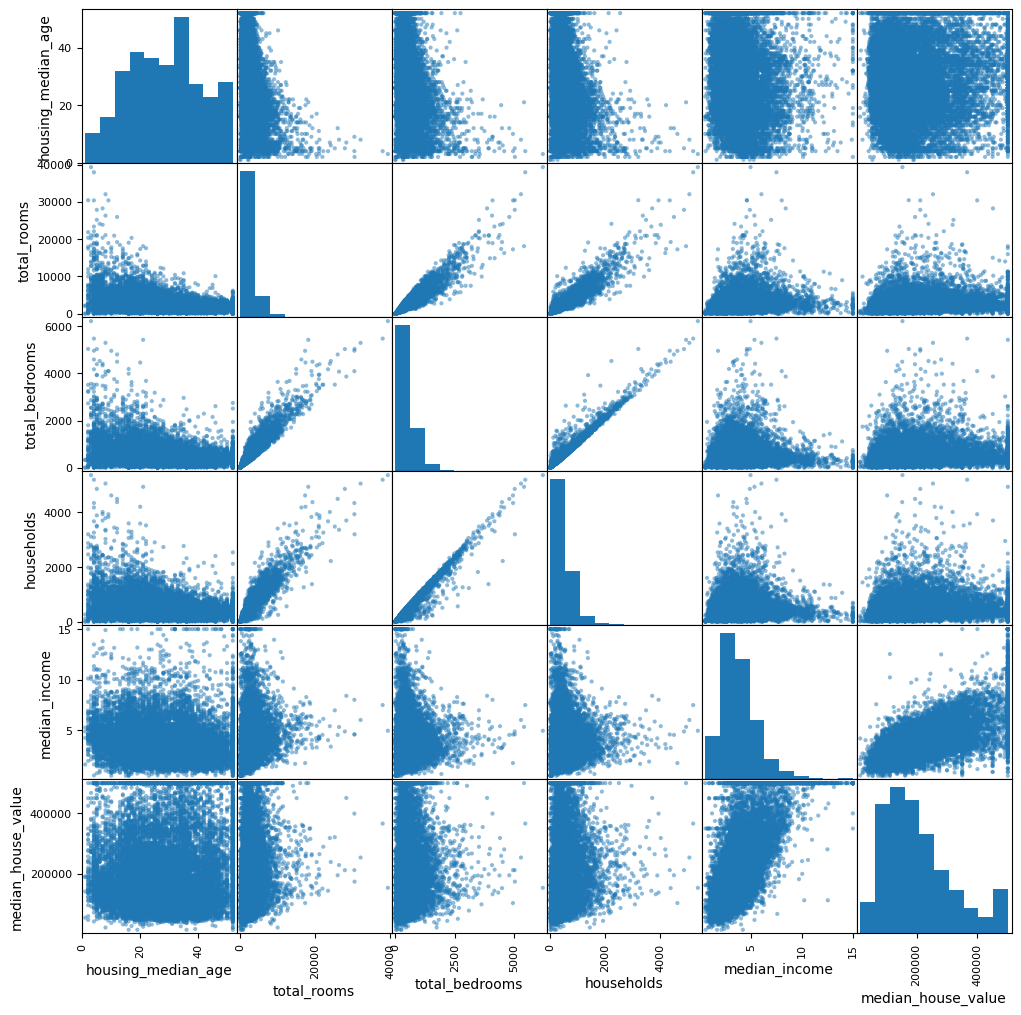

In [559]:
from pandas.plotting import scatter_matrix
Data_Nummeric = ['housing_median_age', 'total_rooms',
                'total_bedrooms', 'households',
                 'median_income', 'median_house_value']
scatter_matrix(Data_Housing[Data_Nummeric] , figsize=(12,12))
plt.show()

### we Notice that `the median house value` have a `strong relationship` with `median income` but there are a `some outlier `

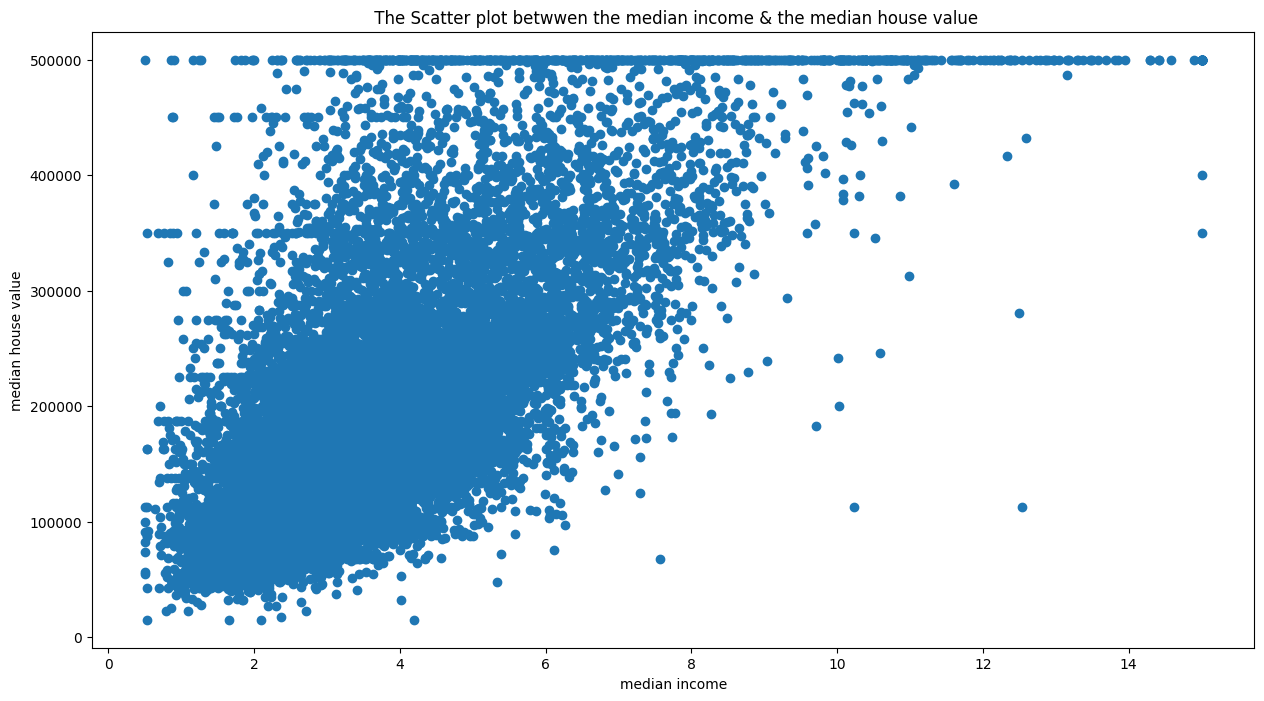

In [560]:
plt.figure(figsize=(15,8))
plt.scatter(x=Data_Housing['median_income'] , y=Data_Housing['median_house_value'])
plt.title(' The Scatter plot betwwen the median income & the median house value' )
plt.xlabel('median income')
plt.ylabel('median house value')
plt.show()

# `Feature Engineering`

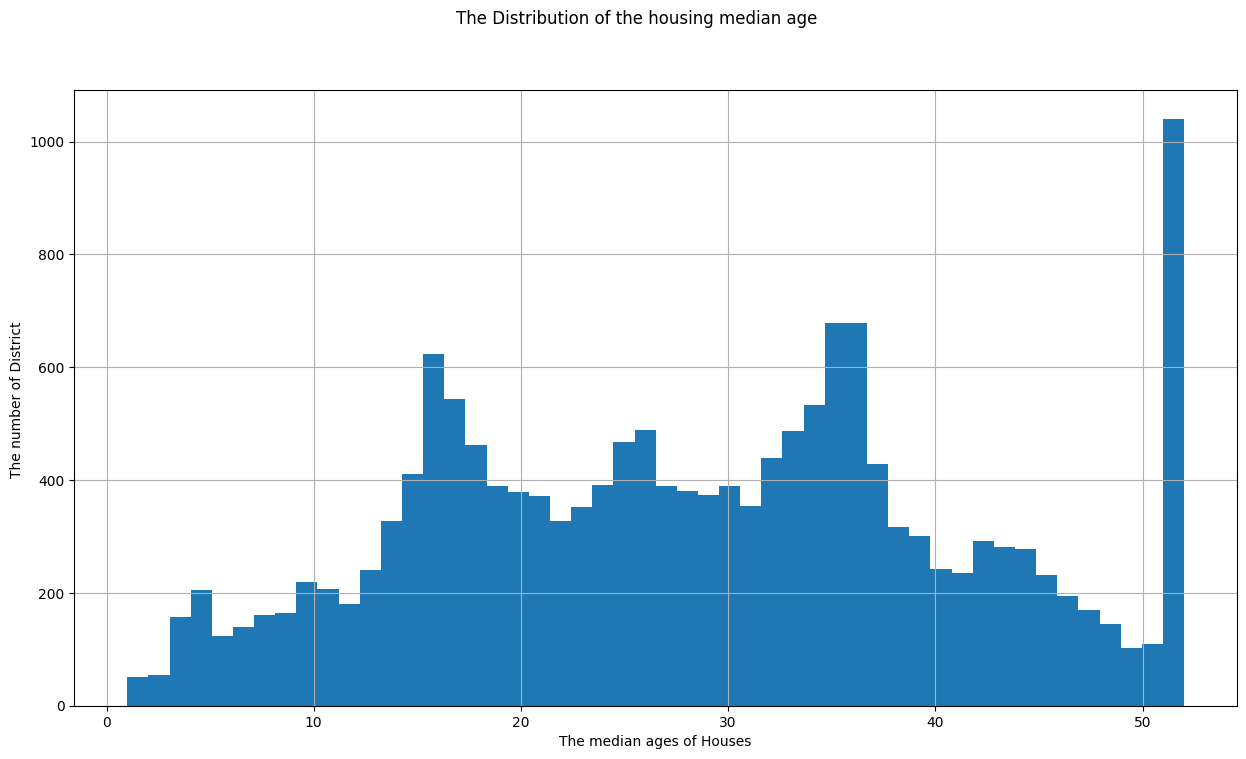

In [561]:
Data_Housing['housing_median_age'].hist(bins=50 , grid=True , figsize=(15,8))
plt.suptitle('The Distribution of the housing median age')
plt.xlabel('The median ages of Houses')
plt.ylabel('The number of District ')
plt.show()

#### We We talk a look for `housing median age` we notice that the age in range `30 to 35` is `most frequency` and there are a outliers in this data

In [562]:
from sklearn.metrics.pairwise import rbf_kernel
array_Similar = Data_Housing[["housing_median_age"]].values.reshape(-1, 1)
Age_Similar_to35 =rbf_kernel(array_Similar , [[35]] ,gamma = 0.1)
Age_Similar_to35 , Age_Similar_to35.shape

(array([[2.81118530e-13],
        [8.20849986e-02],
        [6.70320046e-01],
        ...,
        [9.55316054e-22],
        [6.70320046e-01],
        [3.03539138e-04]]),
 (16512, 1))

In [563]:
Data_Housing['Bedrooms_Ratio'] = Data_Housing['total_bedrooms'] / Data_Housing['total_rooms']
Data_Housing['Rooms_Per_House'] = Data_Housing['total_rooms'] / Data_Housing['households']
Data_Housing['People_Per_House'] = Data_Housing['population'] / Data_Housing['households']
Data_Housing["Income_Per_Household"] = Data_Housing['median_income'] / Data_Housing['households']
Data_Housing['room_to_population_ratio'] = Data_Housing['total_rooms'] / Data_Housing['population']
Data_Housing['House_Value_per_Age'] = Data_Housing['median_house_value'] / Data_Housing['housing_median_age']
Data_Housing["geographic"] = Data_Housing['longitude'] * Data_Housing['latitude']
Data_Housing["Housing Age Similarly to 35 "]  = Age_Similar_to35

In [564]:
Data_Housing

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
13096    -122.42     37.80                52.0       3321.0          1115.0   
14973    -118.38     34.14                40.0       1965.0           354.0   
3785     -121.98     38.36                33.0       1083.0           217.0   
14689    -117.11     33.75                17.0       4174.0           851.0   
20507    -118.15     33.77                36.0       4366.0          1211.0   
...          ...       ...                 ...          ...             ...   
14207    -118.40     33.86                41.0       2237.0           597.0   
13105    -119.31     36.32                23.0       2945.0           592.0   
19301    -117.06     32.59                13.0       3920.0           775.0   
19121    -118.40     34.06                37.0       3781.0           873.0   
19888    -122.41     37.66                44.0        431.0           195.0   

       population  households  median_income  median_house_value  \
13096      1576.0      1034.0         2.0987            458300.0   
14973       666.0       357.0         6.0876            483800.0   
3785        562.0       203.0         2.4330            101700.0   
14689      1845.0       780.0         2.2618             96100.0   
20507      1912.0      1172.0         3.5292            361800.0   
...           ...         ...            ...                 ...   
14207       938.0       523.0         4.7105            500001.0   
13105      1419.0       532.0         2.5733             88800.0   
19301      2814.0       760.0         4.0616            148800.0   
19121      1725.0       838.0         4.1455            500001.0   
19888       682.0       212.0         3.2833            233300.0   

      ocean_proximity  Bedrooms_Ratio  Rooms_Per_House  People_Per_House  \
13096        NEAR BAY        0.335742         3.211799          1.524178   
14973       <1H OCEAN        0.180153         5.504202          1.865546   
3785           INLAND        0.200369         5.334975          2.768473   
14689          INLAND        0.203881         5.351282          2.365385   
20507      NEAR OCEAN        0.277371         3.725256          1.631399   
...               ...             ...              ...               ...   
14207       <1H OCEAN        0.266875         4.277247          1.793499   
13105          INLAND        0.201019         5.535714          2.667293   
19301      NEAR OCEAN        0.197704         5.157895          3.702632   
19121       <1H OCEAN        0.230891         4.511933          2.058473   
19888      NEAR OCEAN        0.452436         2.033019          3.216981   

       Income_Per_Household  room_to_population_ratio  House_Value_per_Age  \
13096              0.002030                  2.107234          8813.461538   
14973              0.017052                  2.950450         12095.000000   
3785               0.011985                  1.927046          3081.818182   
14689              0.002900                  2.262331          5652.941176   
20507              0.003011                  2.283473         10050.000000   
...                     ...                       ...                  ...   
14207              0.009007                  2.384861         12195.146341   
13105              0.004837                  2.075405          3860.869565   
19301              0.005344                  1.393035         11446.153846   
19121              0.004947                  2.191884         13513.540541   
19888              0.015487                  0.631965          5302.272727   

       geographic  Housing Age Similarly to 35   
13096  -4627.4760                  2.811185e-13  
14973  -4041.4932                  8.208500e-02  
3785   -4679.1528                  6.703200e-01  
14689  -3952.4625                  8.489044e-15  
20507  -3989.9255                  9.048374e-01  
...           ...                           ...  
14207  -4009.0240                  2.7323

In [565]:
Data_Housing_corr = Data_Housing.corr(numeric_only=True)

In [566]:
Data_Housing_corr['median_house_value'].sort_values(ascending=False)

median_house_value              1.000000
median_income                   0.688380
House_Value_per_Age             0.392951
room_to_population_ratio        0.202050
Rooms_Per_House                 0.143663
total_rooms                     0.137455
housing_median_age              0.102175
geographic                      0.099808
households                      0.071426
Income_Per_Household            0.058926
total_bedrooms                  0.054635
Housing Age Similarly to 35     0.003918
population                     -0.020153
People_Per_House               -0.038224
longitude                      -0.050859
latitude                       -0.139584
Bedrooms_Ratio                 -0.256397
Name: median_house_value, dtype: float64

### Some New Features is `good correlation` such as :
* #### House_Value_per_Age
* #### room_to_population_ratio
* #### Rooms_Per_House
* #### geographic
* #### Income_Per_Household

In [567]:
Data_Housing.columns , Data_Housing.shape

(Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
        'total_bedrooms', 'population', 'households', 'median_income',
        'median_house_value', 'ocean_proximity', 'Bedrooms_Ratio',
        'Rooms_Per_House', 'People_Per_House', 'Income_Per_Household',
        'room_to_population_ratio', 'House_Value_per_Age', 'geographic',
        'Housing Age Similarly to 35 '],
       dtype='object'),
 (16512, 18))

In [568]:
Housing_Train = Data_Housing.drop('median_house_value' , axis=1 )
Housing_Train_labels = Data_Housing['median_house_value']

In [569]:
Housing_Train.shape , Housing_Train_labels.shape

((16512, 17), (16512,))

In [570]:
Housing_Train.isna().sum()

longitude                         0
latitude                          0
housing_median_age                0
total_rooms                       0
total_bedrooms                  168
population                        0
households                        0
median_income                     0
ocean_proximity                   0
Bedrooms_Ratio                  168
Rooms_Per_House                   0
People_Per_House                  0
Income_Per_Household              0
room_to_population_ratio          0
House_Value_per_Age               0
geographic                        0
Housing Age Similarly to 35       0
dtype: int64

# `Handling Missing Values`

In [571]:
Imputing_Features = Housing_Train.select_dtypes(include=[np.number])
Imputer = SimpleImputer(strategy='median')
Data_Imputed = Imputer.fit_transform(Imputing_Features)

In [572]:
Imputer.statistics_

array([-1.18510000e+02,  3.42600000e+01,  2.90000000e+01,  2.12500000e+03,
        4.34000000e+02,  1.16700000e+03,  4.08000000e+02,  3.53850000e+00,
        2.03105786e-01,  5.23557310e+00,  2.82231619e+00,  8.44719261e-03,
        1.93692682e+00,  6.82158385e+03, -4.06194230e+03,  4.53999298e-05])

In [573]:
Data_Imputed , Imputer.get_feature_names_out()

(array([[-1.22420000e+02,  3.78000000e+01,  5.20000000e+01, ...,
          8.81346154e+03, -4.62747600e+03,  2.81118530e-13],
        [-1.18380000e+02,  3.41400000e+01,  4.00000000e+01, ...,
          1.20950000e+04, -4.04149320e+03,  8.20849986e-02],
        [-1.21980000e+02,  3.83600000e+01,  3.30000000e+01, ...,
          3.08181818e+03, -4.67915280e+03,  6.70320046e-01],
        ...,
        [-1.17060000e+02,  3.25900000e+01,  1.30000000e+01, ...,
          1.14461538e+04, -3.81498540e+03,  9.55316054e-22],
        [-1.18400000e+02,  3.40600000e+01,  3.70000000e+01, ...,
          1.35135405e+04, -4.03270400e+03,  6.70320046e-01],
        [-1.22410000e+02,  3.76600000e+01,  4.40000000e+01, ...,
          5.30227273e+03, -4.60996060e+03,  3.03539138e-04]]),
 array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
        'total_bedrooms', 'population', 'households', 'median_income',
        'Bedrooms_Ratio', 'Rooms_Per_House', 'People_Per_House',
        'Income_Per_Hou

In [574]:
Imputing_Features.columns , Housing_Train.columns

(Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
        'total_bedrooms', 'population', 'households', 'median_income',
        'Bedrooms_Ratio', 'Rooms_Per_House', 'People_Per_House',
        'Income_Per_Household', 'room_to_population_ratio',
        'House_Value_per_Age', 'geographic', 'Housing Age Similarly to 35 '],
       dtype='object'),
 Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
        'total_bedrooms', 'population', 'households', 'median_income',
        'ocean_proximity', 'Bedrooms_Ratio', 'Rooms_Per_House',
        'People_Per_House', 'Income_Per_Household', 'room_to_population_ratio',
        'House_Value_per_Age', 'geographic', 'Housing Age Similarly to 35 '],
       dtype='object'))

In [575]:
Train_Set = pd.DataFrame(data=Data_Imputed , columns=Imputer.get_feature_names_out(), index = Imputing_Features.index)
Train_Set['ocean_proximity'] = Housing_Train['ocean_proximity']
Train_Set

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
13096    -122.42     37.80                52.0       3321.0          1115.0   
14973    -118.38     34.14                40.0       1965.0           354.0   
3785     -121.98     38.36                33.0       1083.0           217.0   
14689    -117.11     33.75                17.0       4174.0           851.0   
20507    -118.15     33.77                36.0       4366.0          1211.0   
...          ...       ...                 ...          ...             ...   
14207    -118.40     33.86                41.0       2237.0           597.0   
13105    -119.31     36.32                23.0       2945.0           592.0   
19301    -117.06     32.59                13.0       3920.0           775.0   
19121    -118.40     34.06                37.0       3781.0           873.0   
19888    -122.41     37.66                44.0        431.0           195.0   

       population  households  median_income  Bedrooms_Ratio  Rooms_Per_House  \
13096      1576.0      1034.0         2.0987        0.335742         3.211799   
14973       666.0       357.0         6.0876        0.180153         5.504202   
3785        562.0       203.0         2.4330        0.200369         5.334975   
14689      1845.0       780.0         2.2618        0.203881         5.351282   
20507      1912.0      1172.0         3.5292        0.277371         3.725256   
...           ...         ...            ...             ...              ...   
14207       938.0       523.0         4.7105        0.266875         4.277247   
13105      1419.0       532.0         2.5733        0.201019         5.535714   
19301      2814.0       760.0         4.0616        0.197704         5.157895   
19121      1725.0       838.0         4.1455        0.230891         4.511933   
19888       682.0       212.0         3.2833        0.452436         2.033019   

       People_Per_House  Income_Per_Household  room_to_population_ratio  \
13096          1.524178              0.002030                  2.107234   
14973          1.865546              0.017052                  2.950450   
3785           2.768473              0.011985                  1.927046   
14689          2.365385              0.002900                  2.262331   
20507          1.631399              0.003011                  2.283473   
...                 ...                   ...                       ...   
14207          1.793499              0.009007                  2.384861   
13105          2.667293              0.004837                  2.075405   
19301          3.702632              0.005344                  1.393035   
19121          2.058473              0.004947                  2.191884   
19888          3.216981              0.015487                  0.631965   

       House_Value_per_Age  geographic  Housing Age Similarly to 35   \
13096          8813.461538  -4627.4760                  2.811185e-13   
14973         12095.000000  -4041.4932                  8.208500e-02   
3785           3081.818182  -4679.1528                  6.703200e-01   
14689          5652.941176  -3952.4625                  8.489044e-15   
20507         10050.000000  -3989.9255                  9.048374e-01   
...                    ...         ...                           ...   
14207         12195.146341  -4009.0240                  2.732372e-02   
13105          3860.869565  -4333.3392                  5.573904e-07   
19301         11446.153846  -3814.9854                  9.553161e-22   
19121         13513.540541  -4032.7040                  6.703200e-01   
19888          5302.272727  -4609.9606                  3.035391e-04   

      ocean_proximity  
13096        NEAR BAY  
14973       <1H OCEAN  
3785           INLAND  
14689          INLAND  
20507      NEAR OCEAN  
...               ...  
14207       <1H OCEAN  
13105          INLAND  
19301      NEAR OCEAN  
19121       <1H OCEAN  
19888      NEAR OCEAN  

[16512 rows x 17 columns]

In [576]:
Train_Set.isna().sum() , Train_Set.isnull().sum()

(longitude                       0
 latitude                        0
 housing_median_age              0
 total_rooms                     0
 total_bedrooms                  0
 population                      0
 households                      0
 median_income                   0
 Bedrooms_Ratio                  0
 Rooms_Per_House                 0
 People_Per_House                0
 Income_Per_Household            0
 room_to_population_ratio        0
 House_Value_per_Age             0
 geographic                      0
 Housing Age Similarly to 35     0
 ocean_proximity                 0
 dtype: int64,
 longitude                       0
 latitude                        0
 housing_median_age              0
 total_rooms                     0
 total_bedrooms                  0
 population                      0
 households                      0
 median_income                   0
 Bedrooms_Ratio                  0
 Rooms_Per_House                 0
 People_Per_House                0
 Inco

# `Encoding The Categorical Features`

In [577]:
Categorical_Encoder = OneHotEncoder(sparse_output=False , handle_unknown='ignore')
Categorical_Features = Train_Set[['ocean_proximity']]
Data_Cat_Encoded = Categorical_Encoder.fit_transform(Categorical_Features)
Data_Cat_Encoded

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [578]:
Categorical_Encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [579]:
Cat_DataFrame = pd.DataFrame(data=Data_Cat_Encoded , columns=Categorical_Encoder.get_feature_names_out() , index=Train_Set.index)
Cat_DataFrame.head(5)

ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  \
13096                        0.0                     0.0   
14973                        1.0                     0.0   
3785                         0.0                     1.0   
14689                        0.0                     1.0   
20507                        0.0                     0.0   

       ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
13096                     0.0                       1.0   
14973                     0.0                       0.0   
3785                      0.0                       0.0   
14689                     0.0                       0.0   
20507                     0.0                       0.0   

       ocean_proximity_NEAR OCEAN  
13096                         0.0  
14973                         0.0  
3785                          0.0  
14689                         0.0  
20507                         1.0

In [580]:
Train_Set.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'Bedrooms_Ratio', 'Rooms_Per_House', 'People_Per_House',
       'Income_Per_Household', 'room_to_population_ratio',
       'House_Value_per_Age', 'geographic', 'Housing Age Similarly to 35 ',
       'ocean_proximity'],
      dtype='object')

In [581]:
Train_Set.drop('ocean_proximity' , axis=1 , inplace=True)
Train_Set.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'Bedrooms_Ratio', 'Rooms_Per_House', 'People_Per_House',
       'Income_Per_Household', 'room_to_population_ratio',
       'House_Value_per_Age', 'geographic', 'Housing Age Similarly to 35 '],
      dtype='object')

In [582]:
Final_Train = pd.concat([Train_Set , Cat_DataFrame] , axis=1)
Final_Train

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
13096    -122.42     37.80                52.0       3321.0          1115.0   
14973    -118.38     34.14                40.0       1965.0           354.0   
3785     -121.98     38.36                33.0       1083.0           217.0   
14689    -117.11     33.75                17.0       4174.0           851.0   
20507    -118.15     33.77                36.0       4366.0          1211.0   
...          ...       ...                 ...          ...             ...   
14207    -118.40     33.86                41.0       2237.0           597.0   
13105    -119.31     36.32                23.0       2945.0           592.0   
19301    -117.06     32.59                13.0       3920.0           775.0   
19121    -118.40     34.06                37.0       3781.0           873.0   
19888    -122.41     37.66                44.0        431.0           195.0   

       population  households  median_income  Bedrooms_Ratio  Rooms_Per_House  \
13096      1576.0      1034.0         2.0987        0.335742         3.211799   
14973       666.0       357.0         6.0876        0.180153         5.504202   
3785        562.0       203.0         2.4330        0.200369         5.334975   
14689      1845.0       780.0         2.2618        0.203881         5.351282   
20507      1912.0      1172.0         3.5292        0.277371         3.725256   
...           ...         ...            ...             ...              ...   
14207       938.0       523.0         4.7105        0.266875         4.277247   
13105      1419.0       532.0         2.5733        0.201019         5.535714   
19301      2814.0       760.0         4.0616        0.197704         5.157895   
19121      1725.0       838.0         4.1455        0.230891         4.511933   
19888       682.0       212.0         3.2833        0.452436         2.033019   

       ...  Income_Per_Household  room_to_population_ratio  \
13096  ...              0.002030                  2.107234   
14973  ...              0.017052                  2.950450   
3785   ...              0.011985                  1.927046   
14689  ...              0.002900                  2.262331   
20507  ...              0.003011                  2.283473   
...    ...                   ...                       ...   
14207  ...              0.009007                  2.384861   
13105  ...              0.004837                  2.075405   
19301  ...              0.005344                  1.393035   
19121  ...              0.004947                  2.191884   
19888  ...              0.015487                  0.631965   

       House_Value_per_Age  geographic  Housing Age Similarly to 35   \
13096          8813.461538  -4627.4760                  2.811185e-13   
14973         12095.000000  -4041.4932                  8.208500e-02   
3785           3081.818182  -4679.1528                  6.703200e-01   
14689          5652.941176  -3952.4625                  8.489044e-15   
20507         10050.000000  -3989.9255                  9.048374e-01   
...                    ...         ...                           ...   
14207         12195.146341  -4009.0240                  2.732372e-02   
13105          3860.869565  -4333.3392                  5.573904e-07   
19301         11446.153846  -3814.9854                  9.553161e-22   
19121         13513.540541  -4032.7040                  6.703200e-01   
19888          5302.272727  -4609.9606                  3.035391e-04   

       ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  \
13096                        0.0                     0.0   
14973                        1.0                     0.0   
3785                         0.0                     1.0   
14689                        0.0                     1.0   
20507                        0.0                     0.0   
...                          ...                     ...   
14207                        1.0                     0.

In [583]:
Final_Train.isna().sum() , Final_Train.isnull().sum()

(longitude                       0
 latitude                        0
 housing_median_age              0
 total_rooms                     0
 total_bedrooms                  0
 population                      0
 households                      0
 median_income                   0
 Bedrooms_Ratio                  0
 Rooms_Per_House                 0
 People_Per_House                0
 Income_Per_Household            0
 room_to_population_ratio        0
 House_Value_per_Age             0
 geographic                      0
 Housing Age Similarly to 35     0
 ocean_proximity_<1H OCEAN       0
 ocean_proximity_INLAND          0
 ocean_proximity_ISLAND          0
 ocean_proximity_NEAR BAY        0
 ocean_proximity_NEAR OCEAN      0
 dtype: int64,
 longitude                       0
 latitude                        0
 housing_median_age              0
 total_rooms                     0
 total_bedrooms                  0
 population                      0
 households                      0
 medi

# `Checking and Treating the Skweness`

Skewness for longitude is Negligible.
Skewness for latitude is Negligible.
Skewness for housing_median_age is Negligible.
total_rooms
log


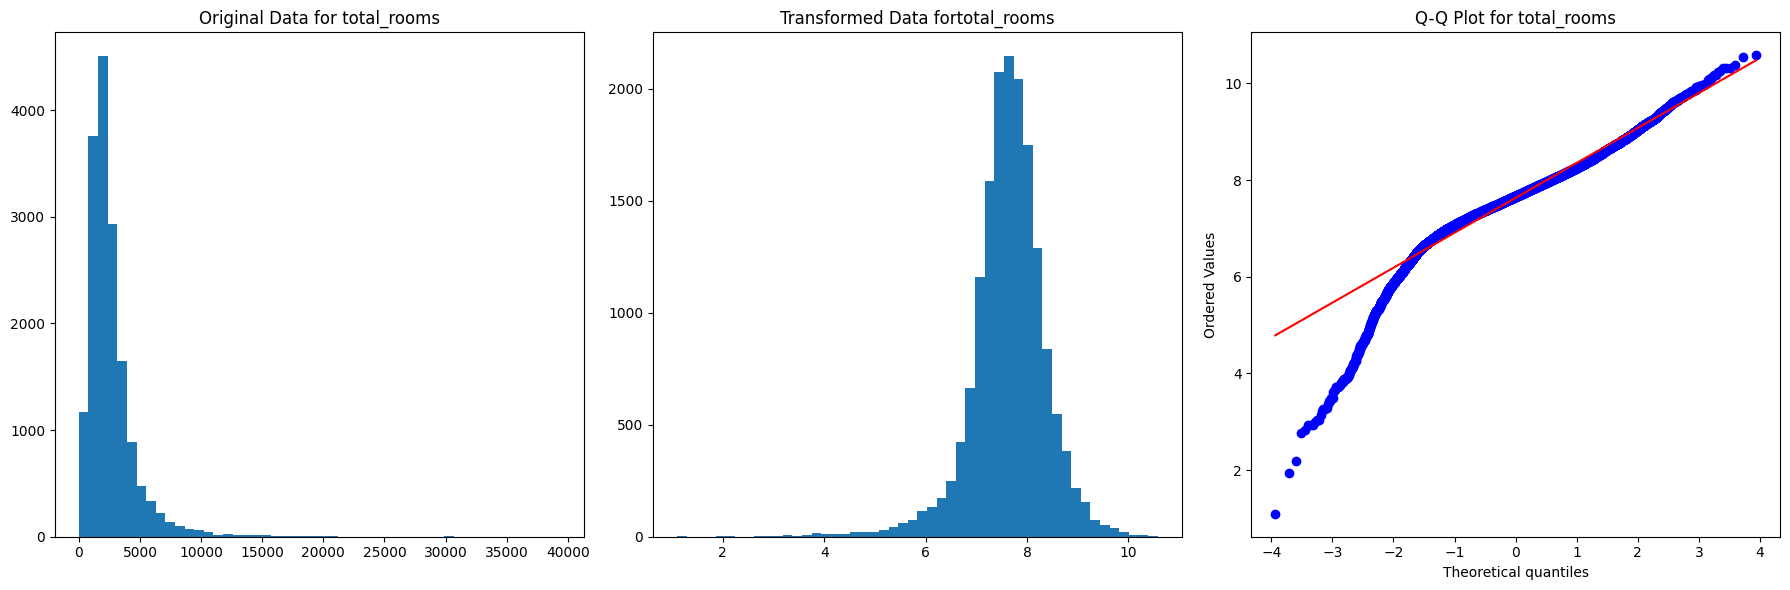

total_rooms
BoxCox


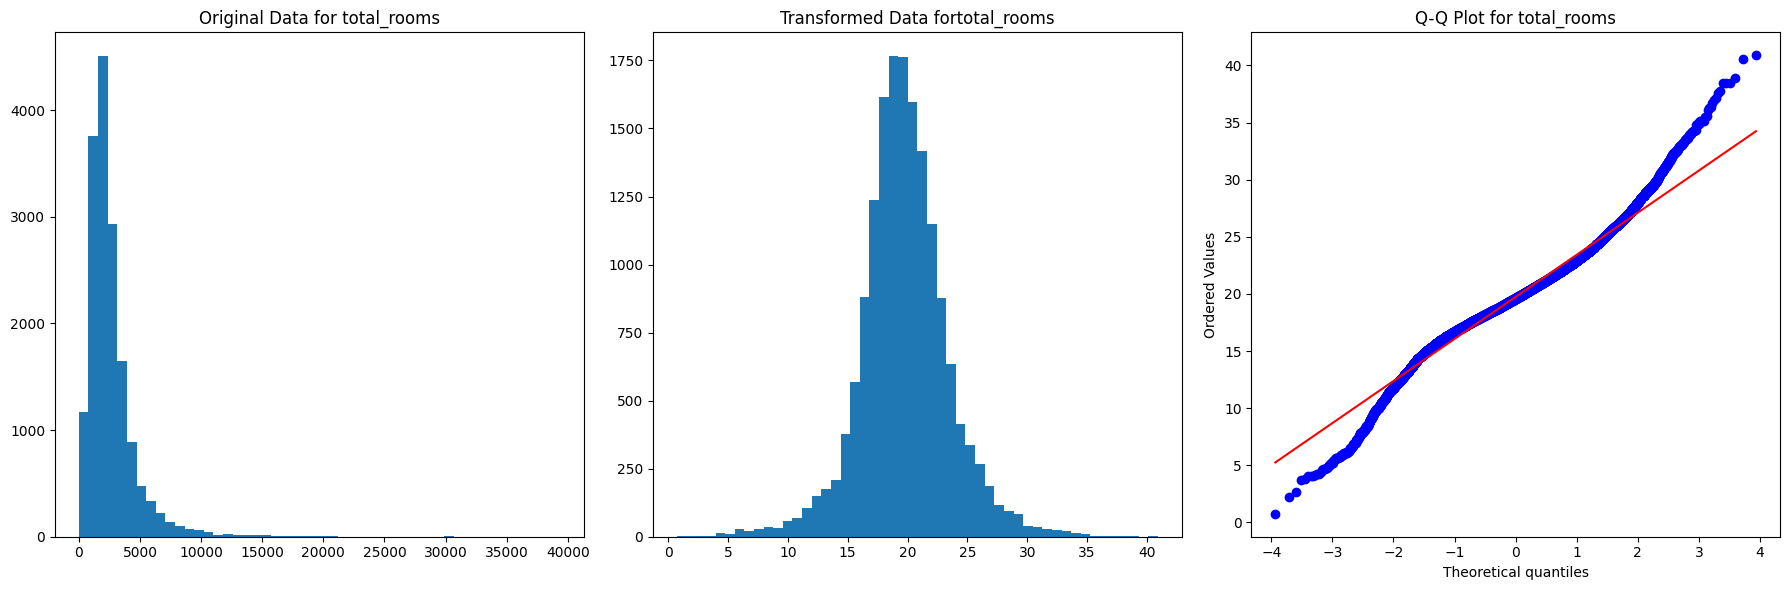

total_rooms
Power Transformer


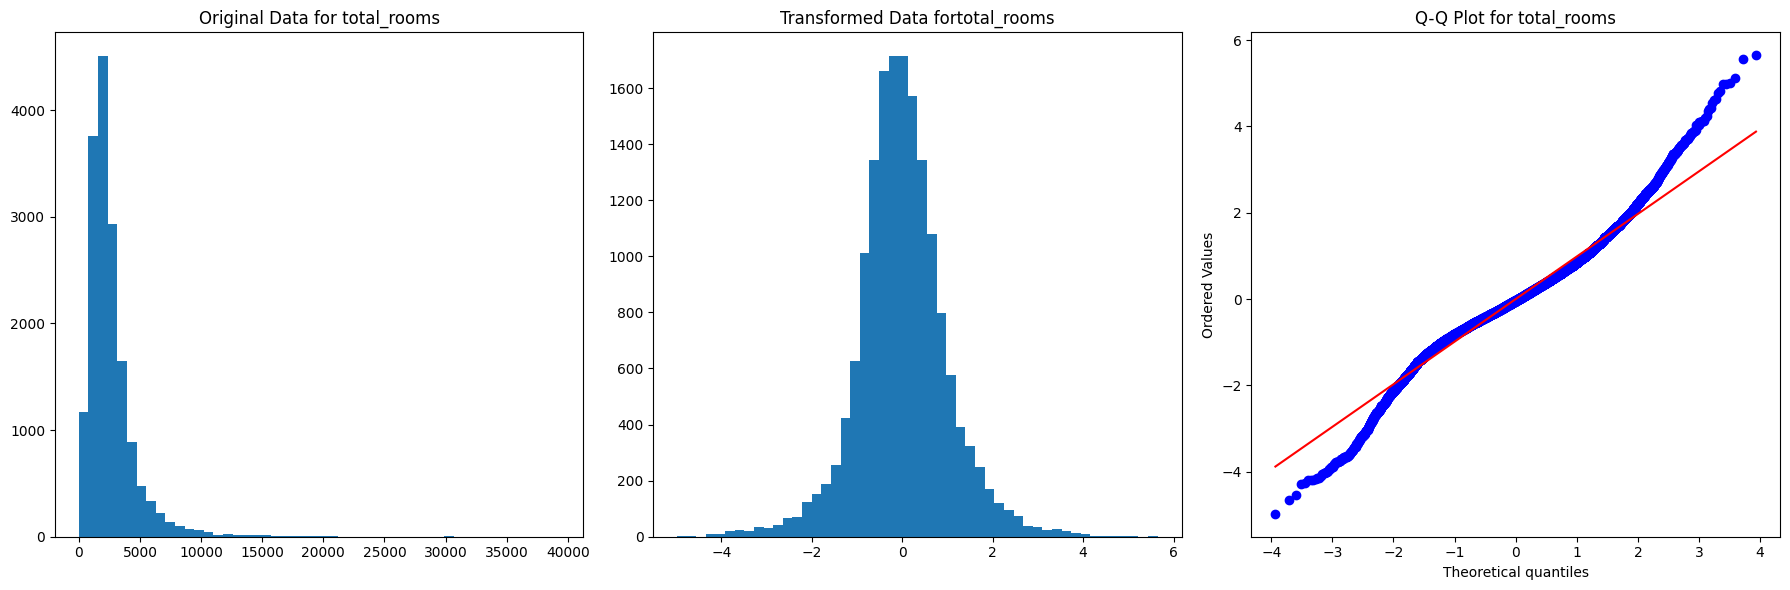

total_rooms
Quantile Transformer


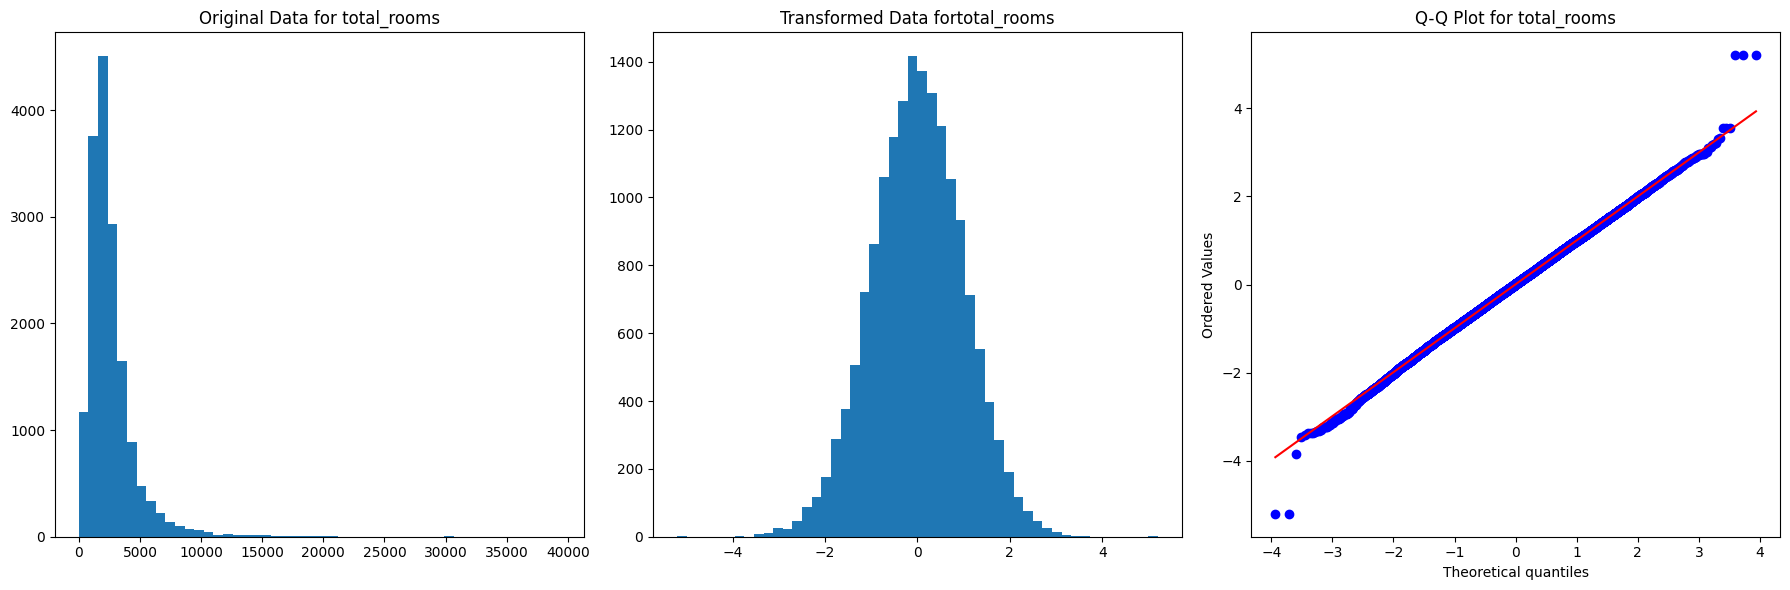

total_bedrooms
log


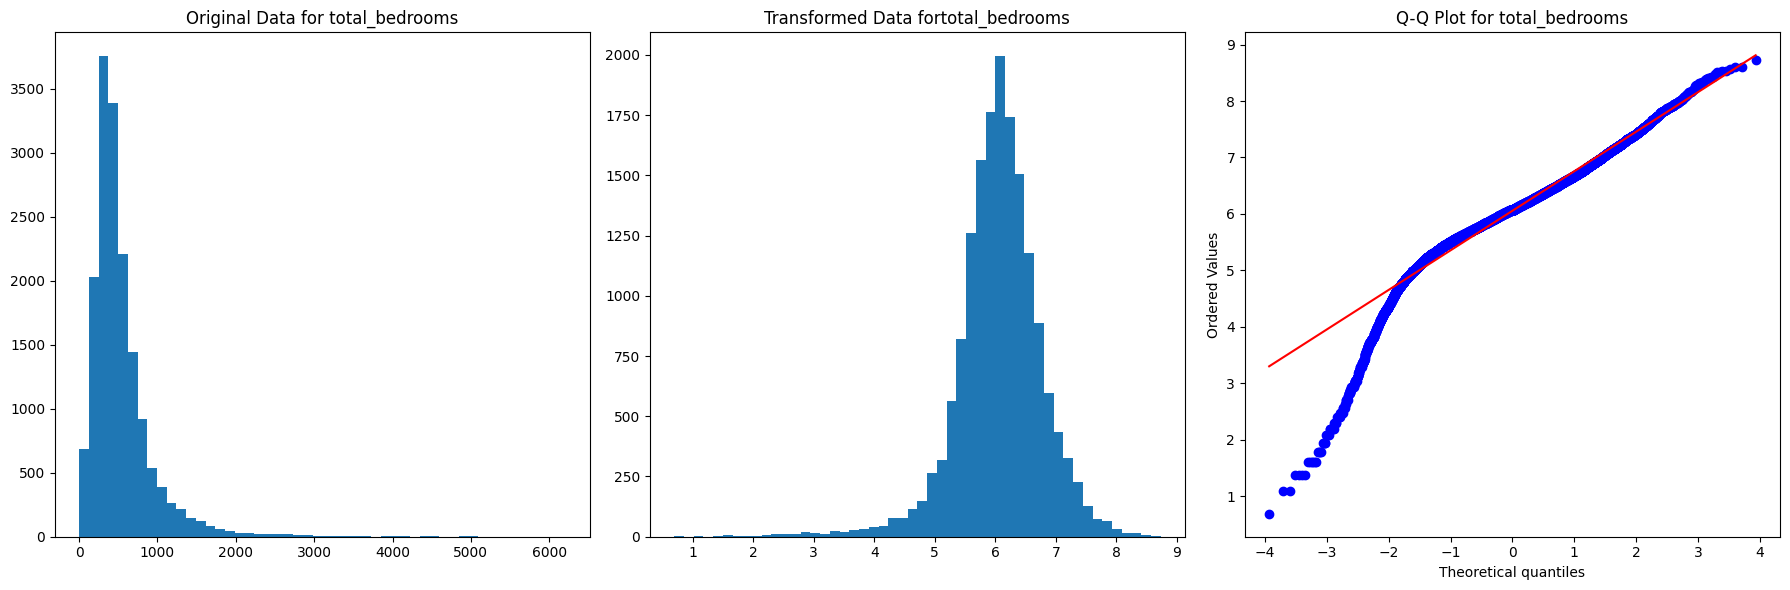

total_bedrooms
BoxCox


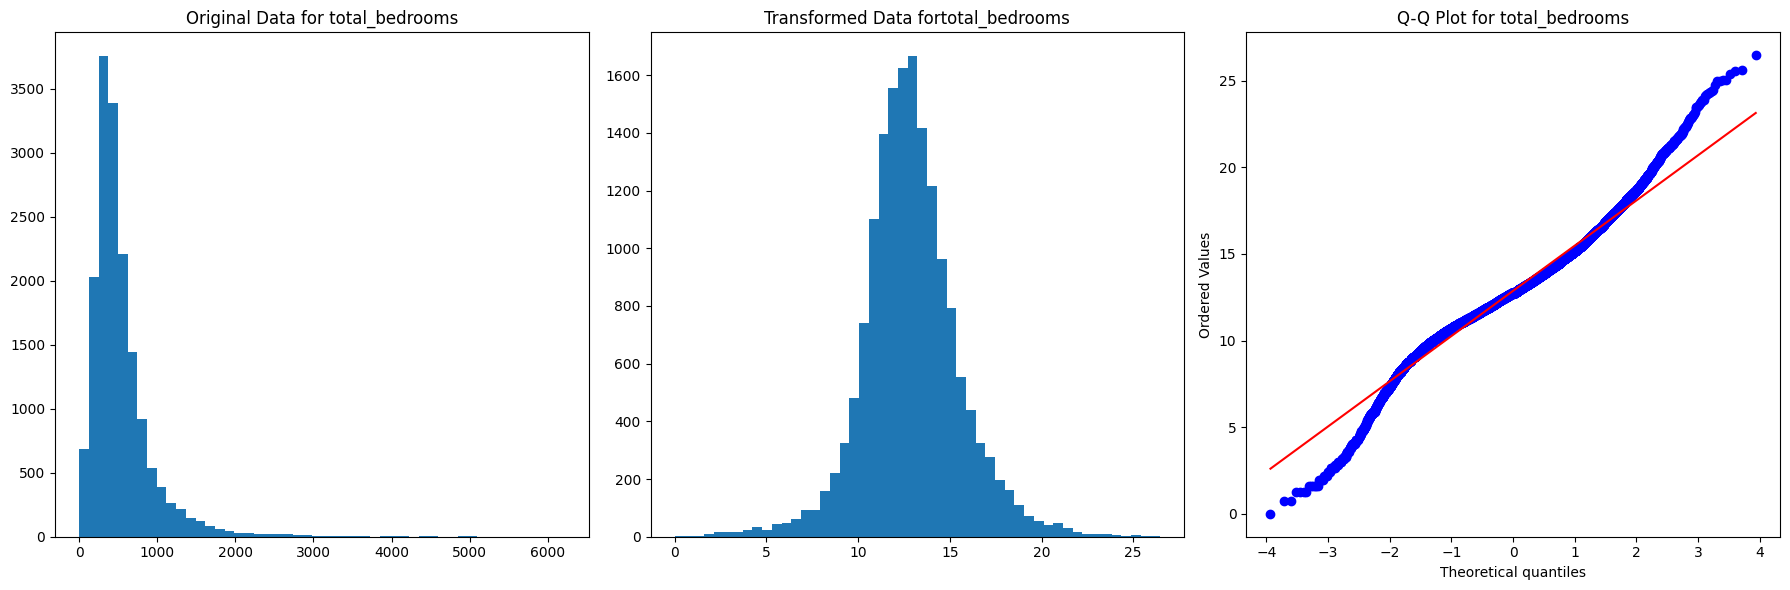

total_bedrooms
Power Transformer


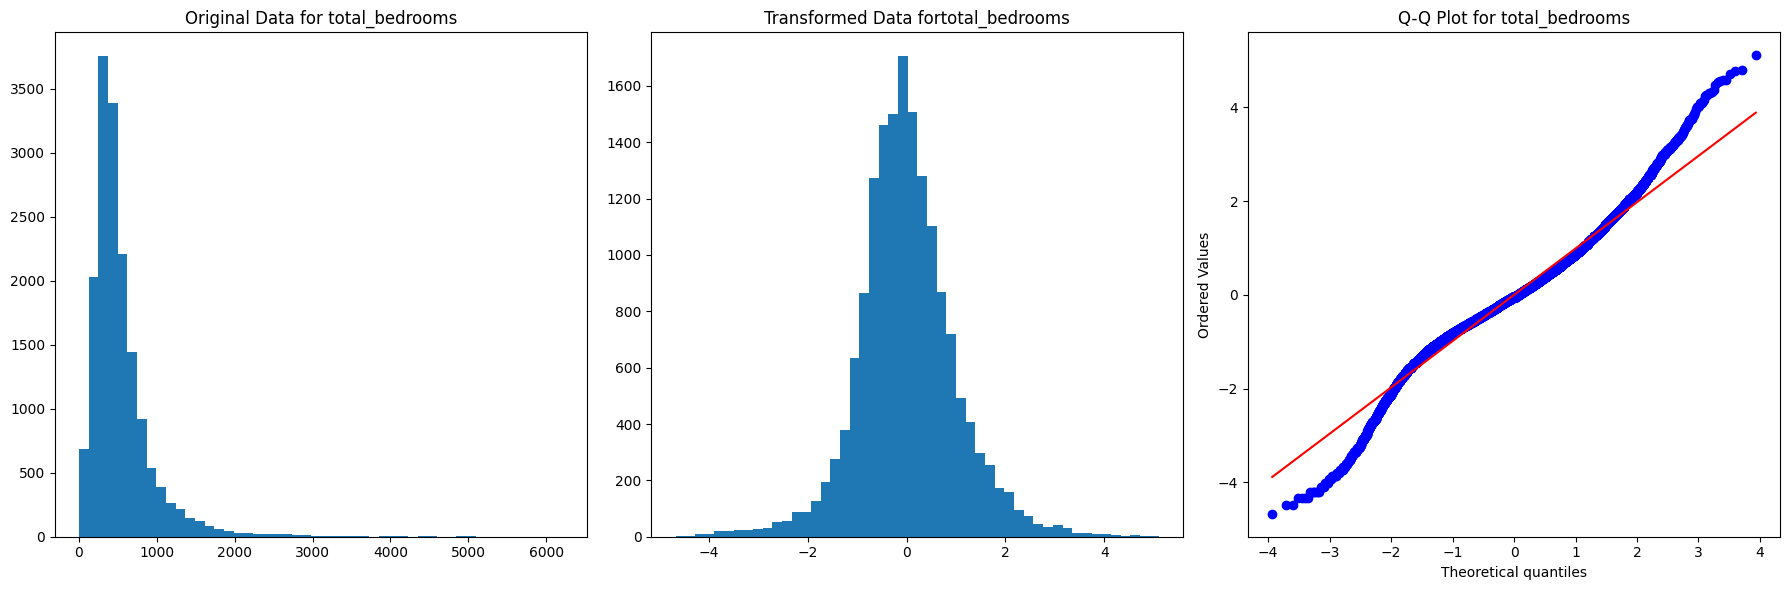

total_bedrooms
Quantile Transformer


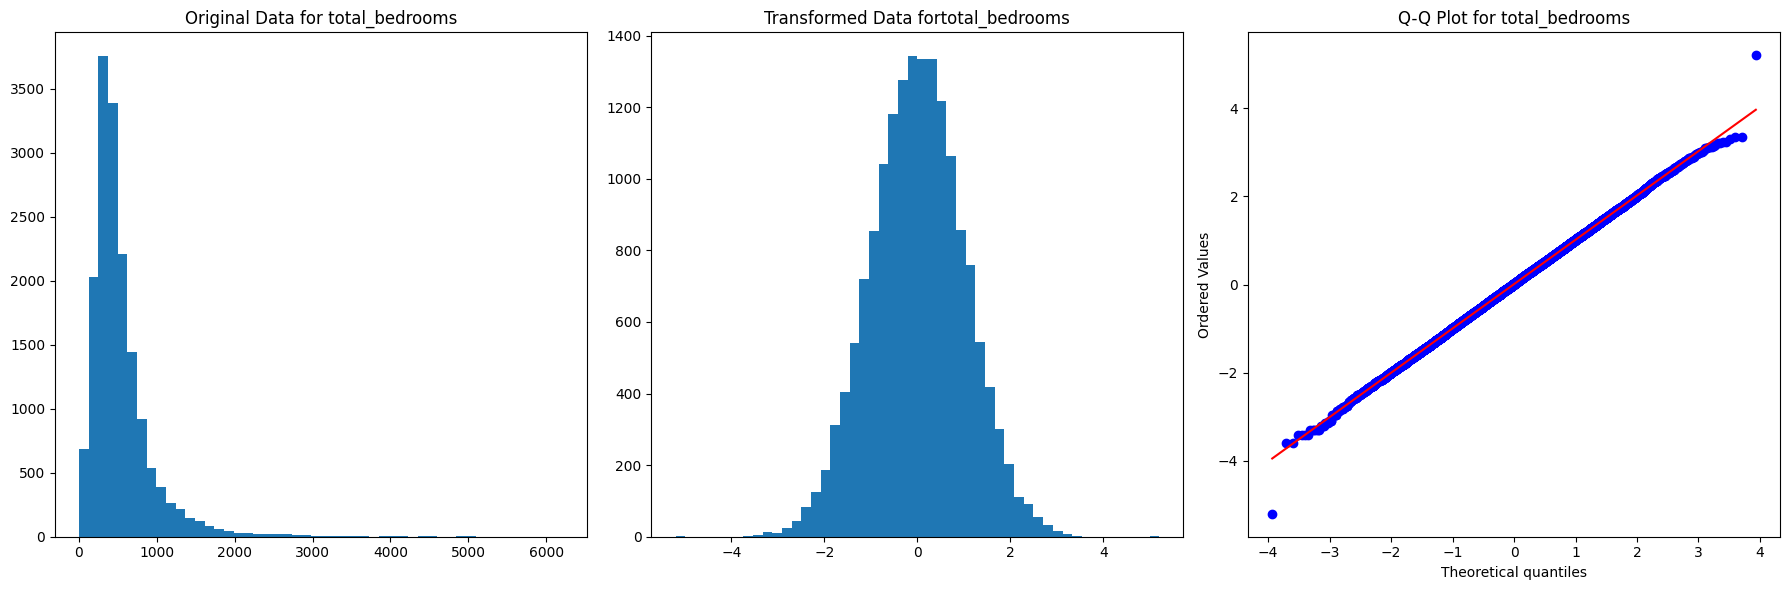

population
log


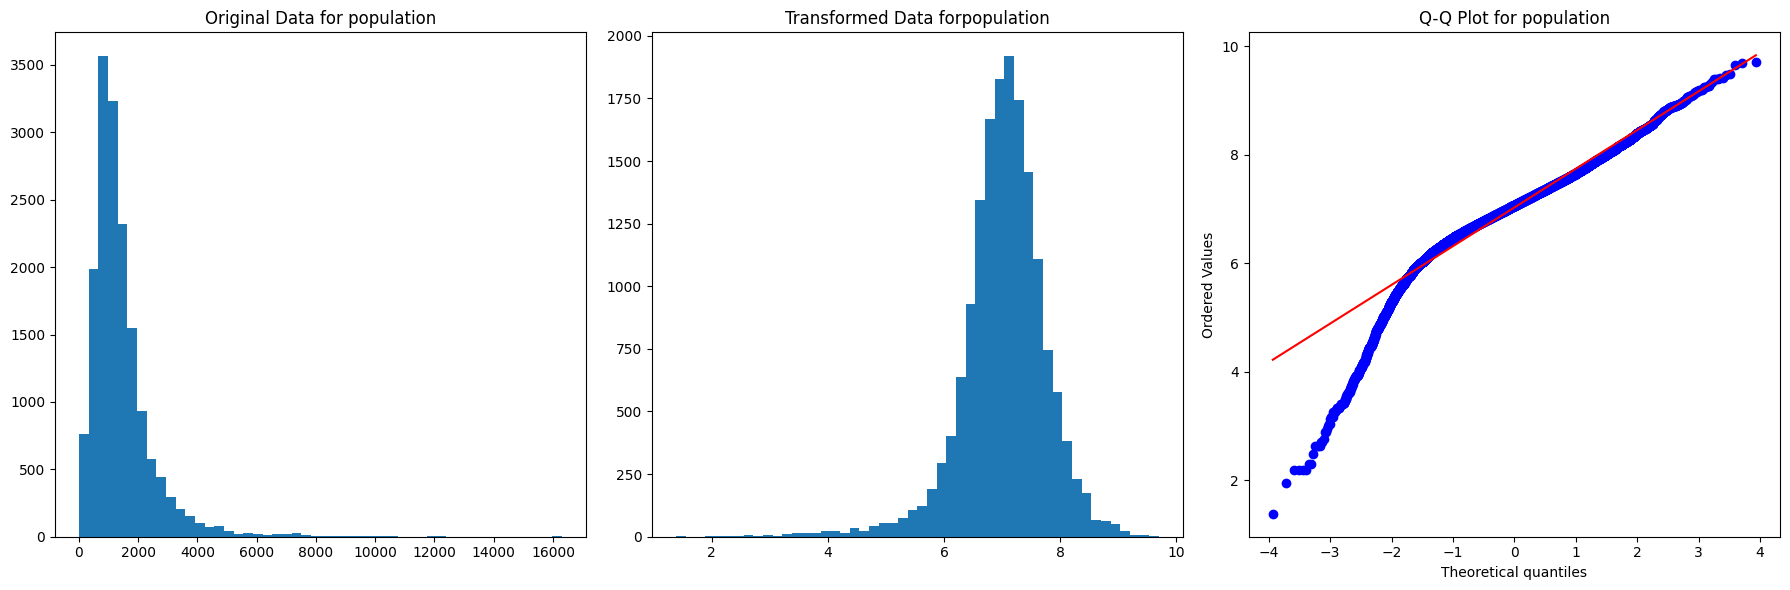

population
BoxCox


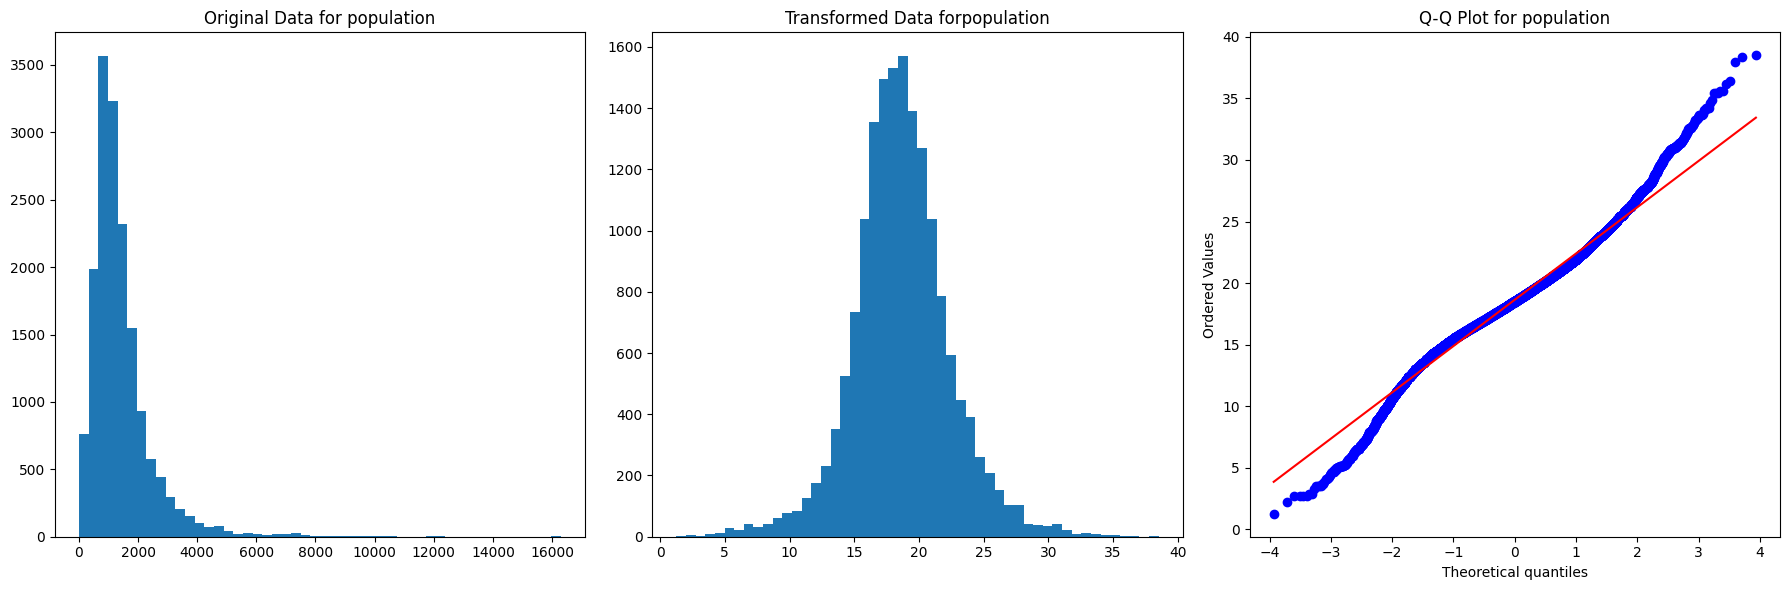

population
Power Transformer


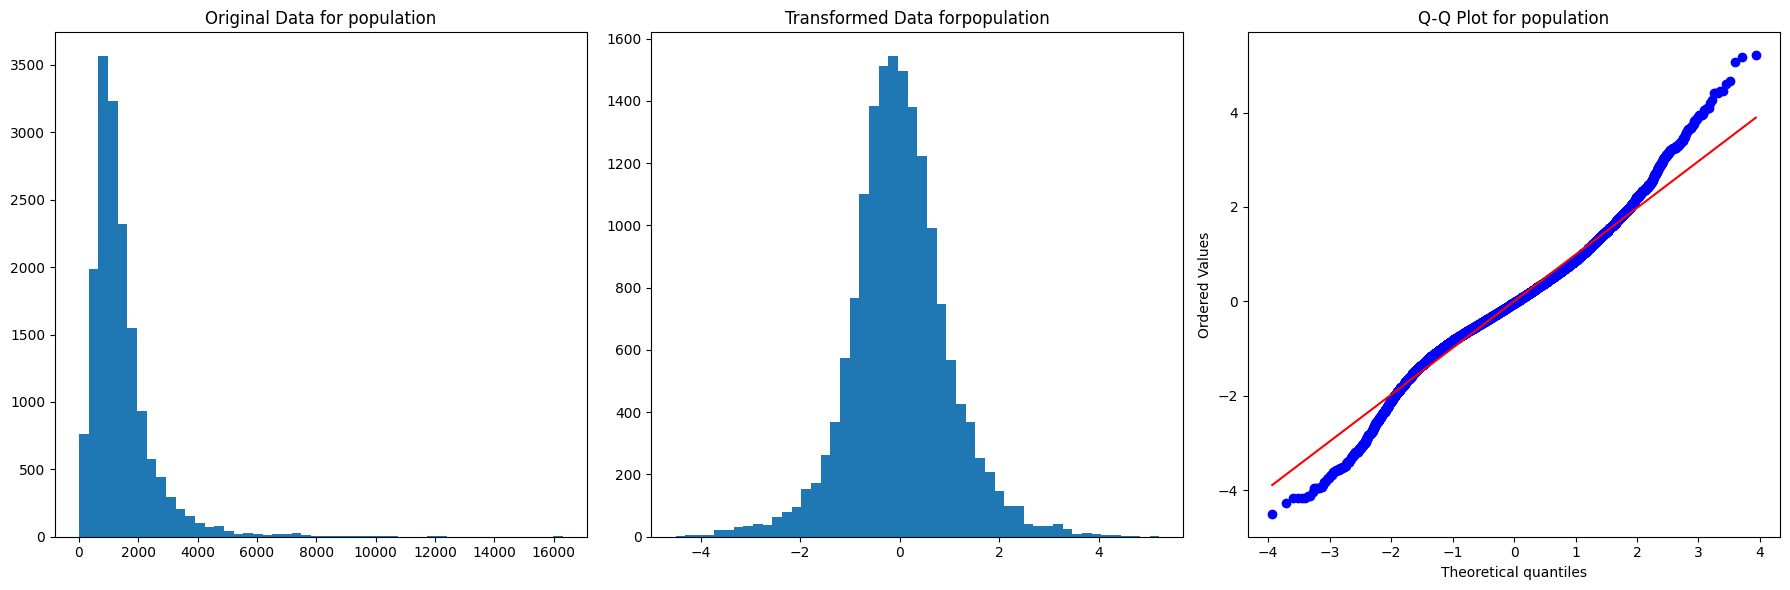

population
Quantile Transformer


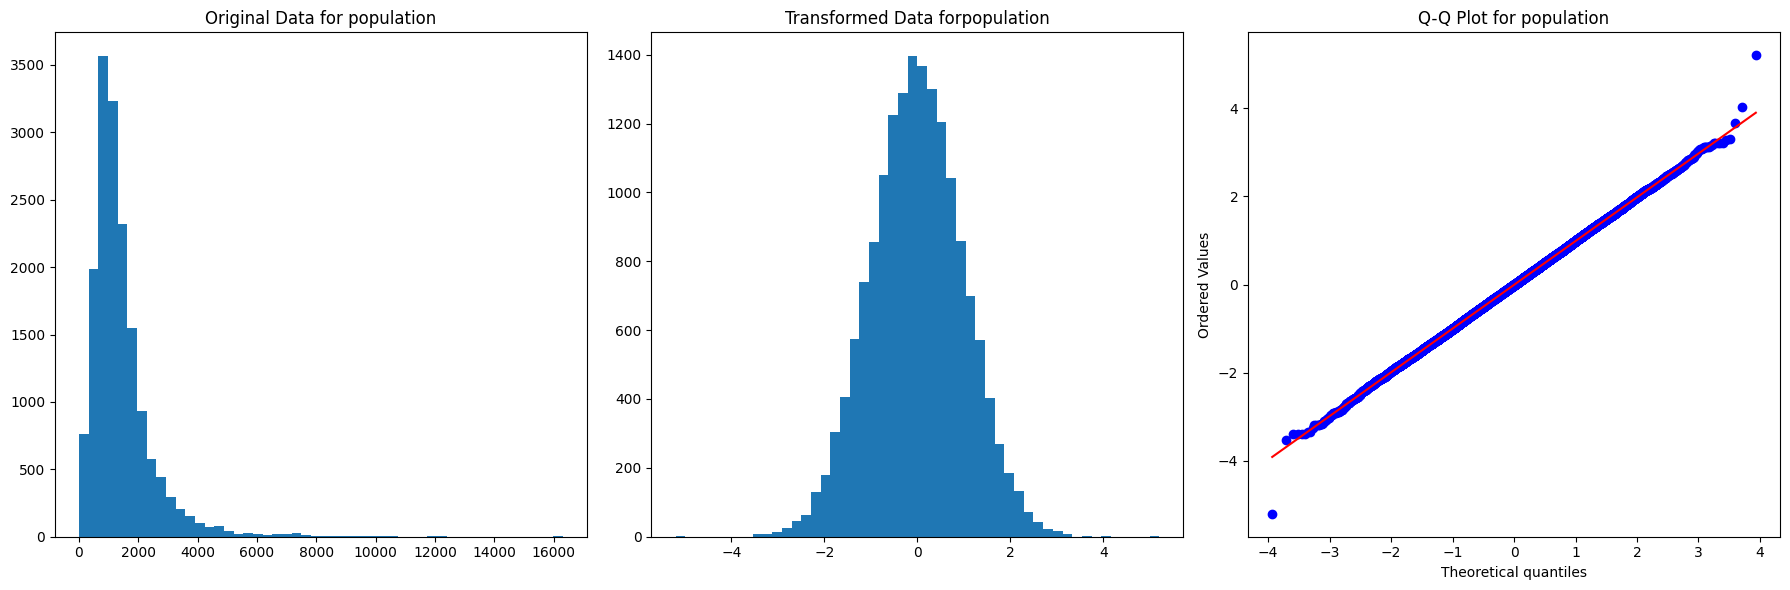

households
log


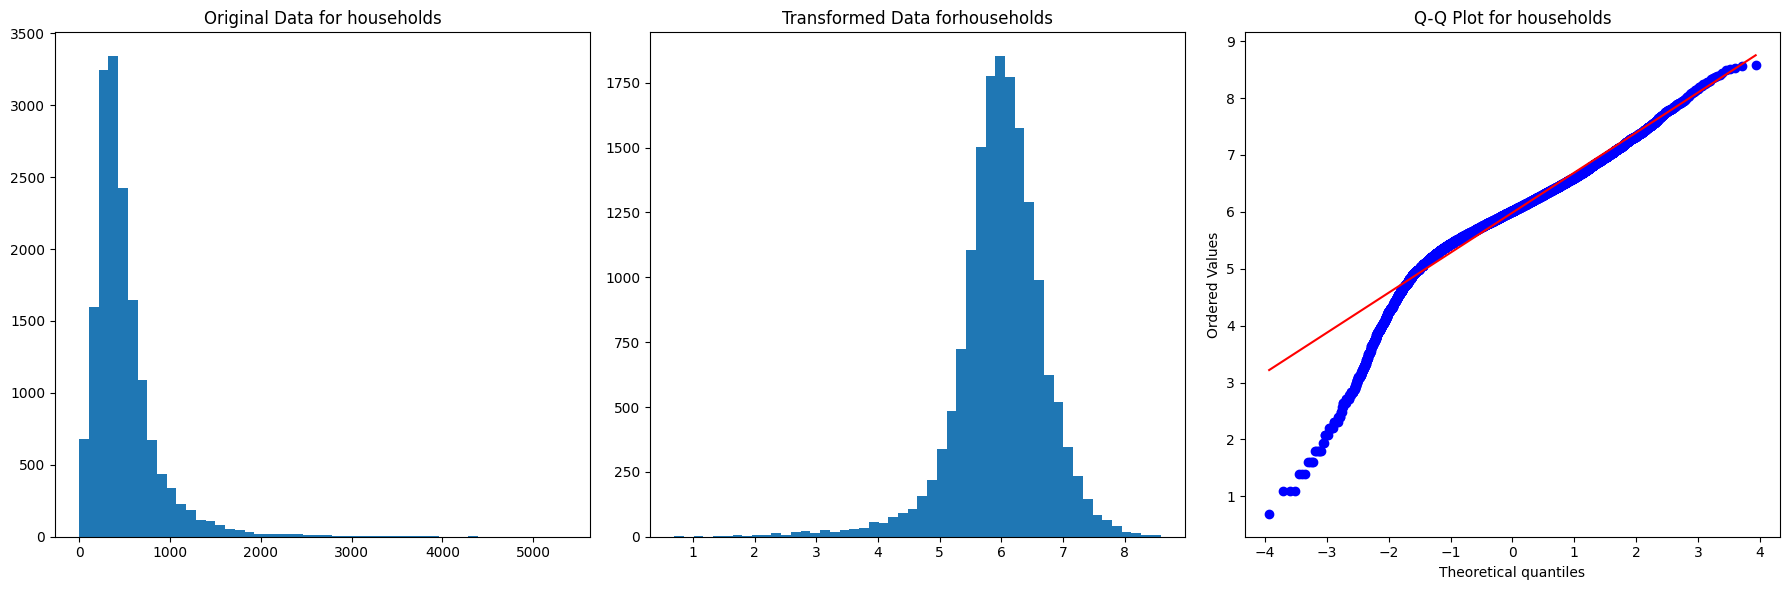

households
BoxCox


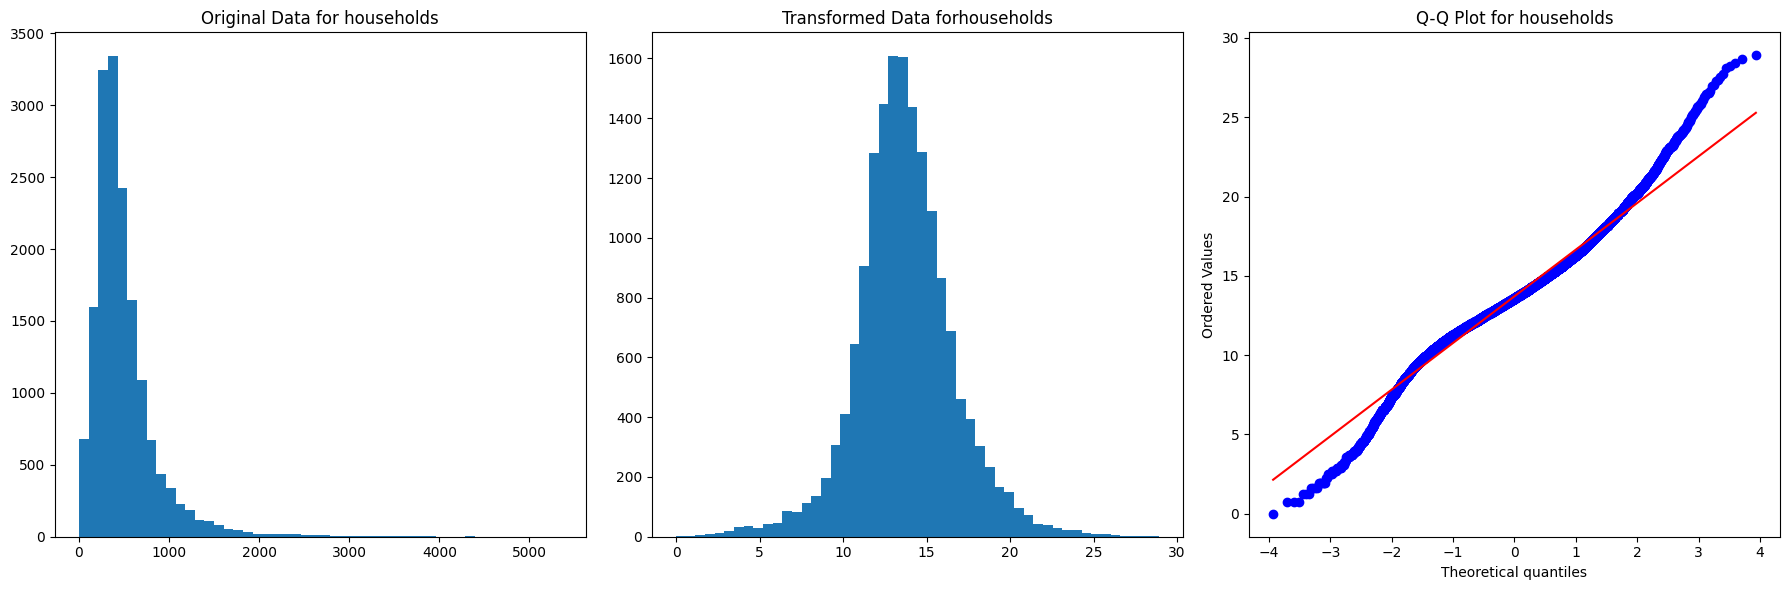

households
Power Transformer


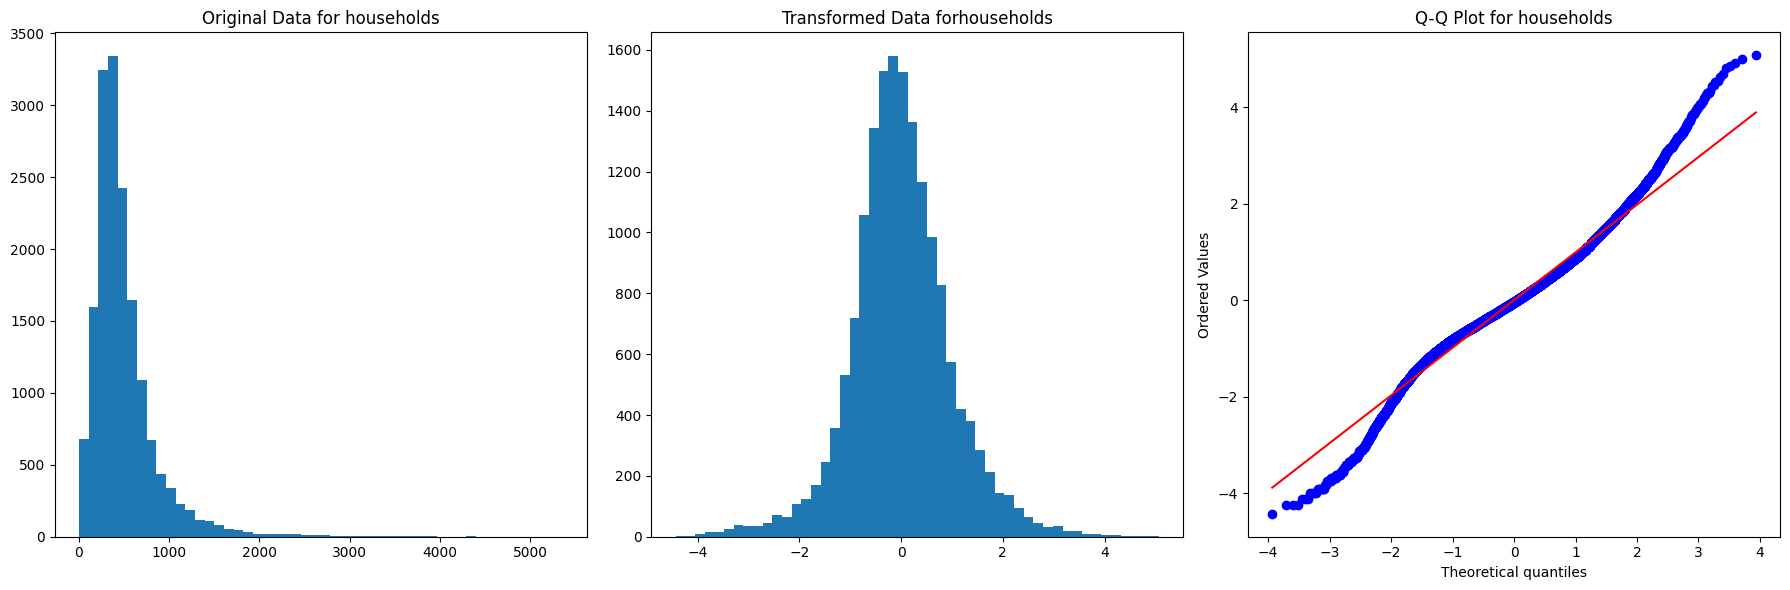

households
Quantile Transformer


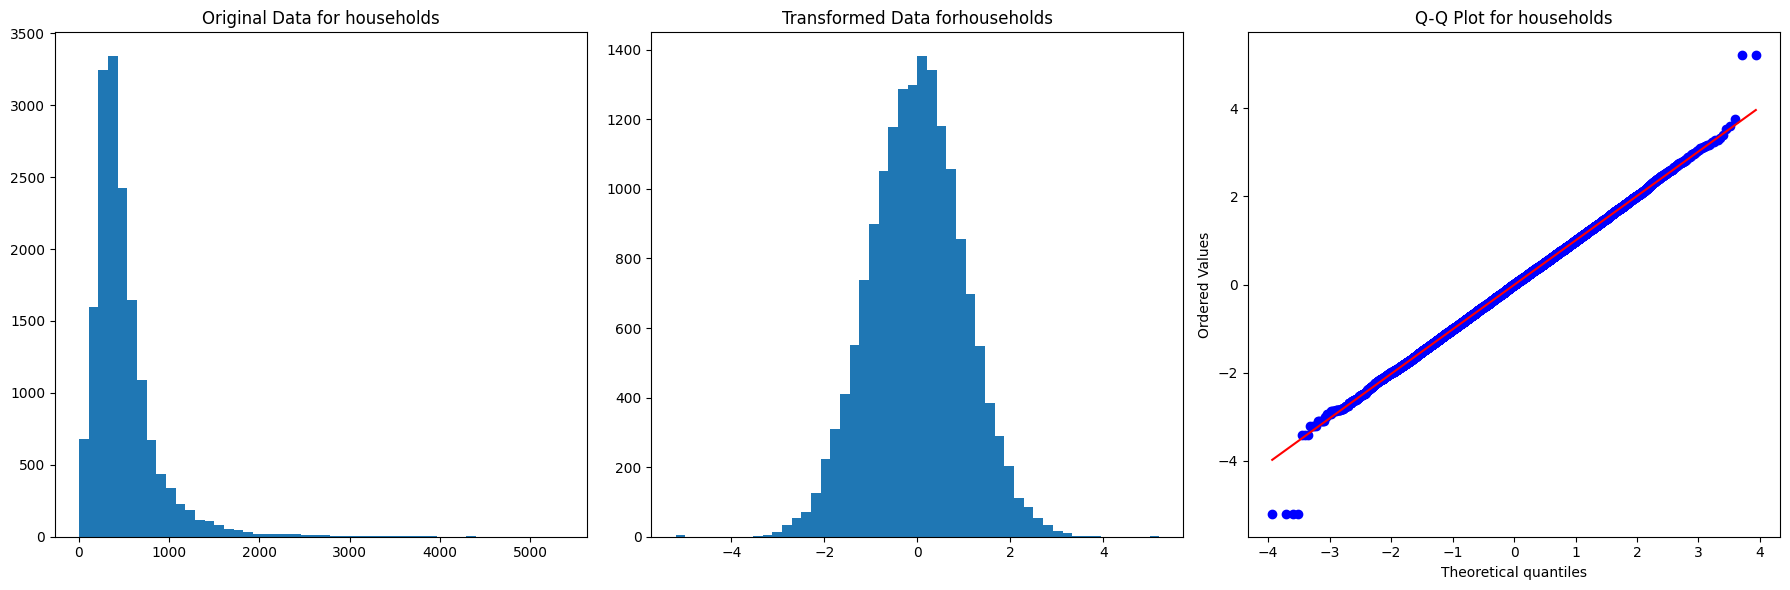

median_income
log


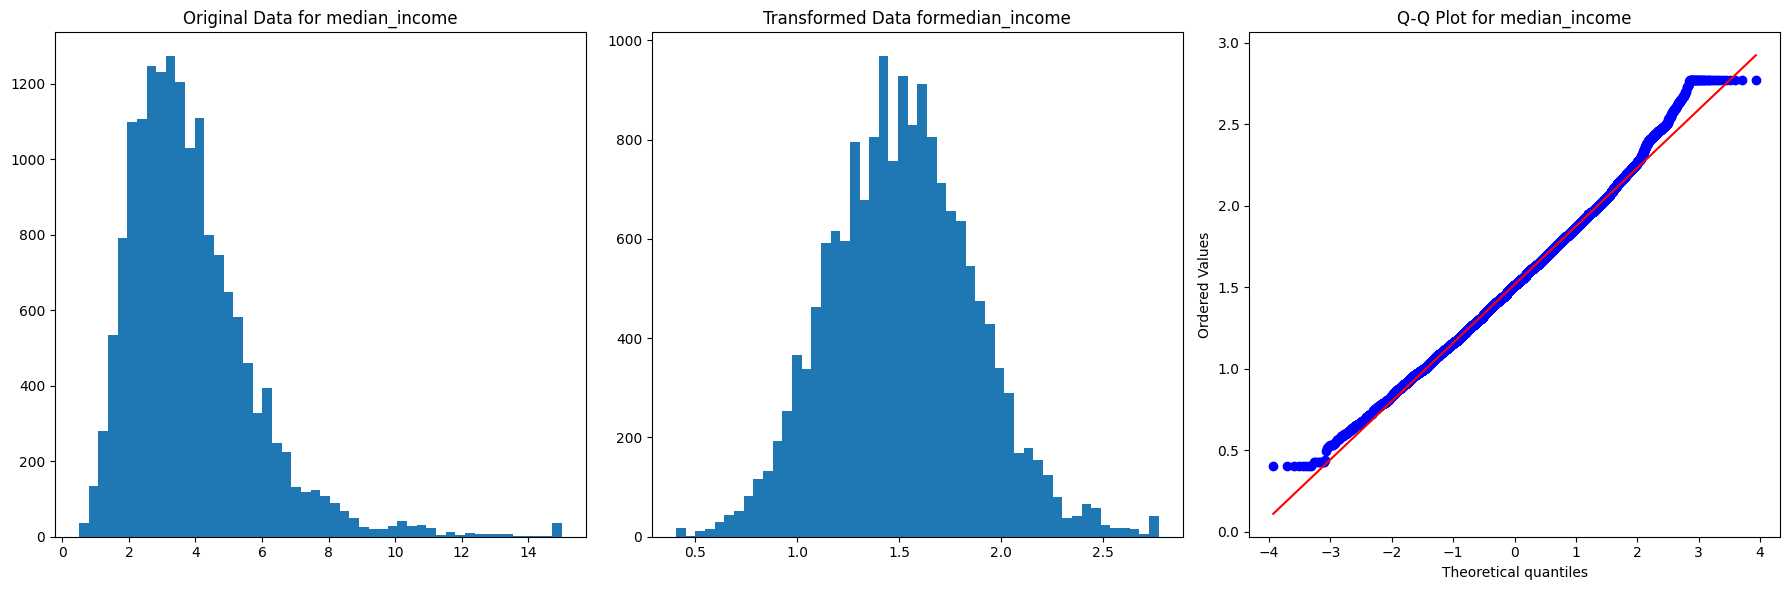

median_income
Reciprocal


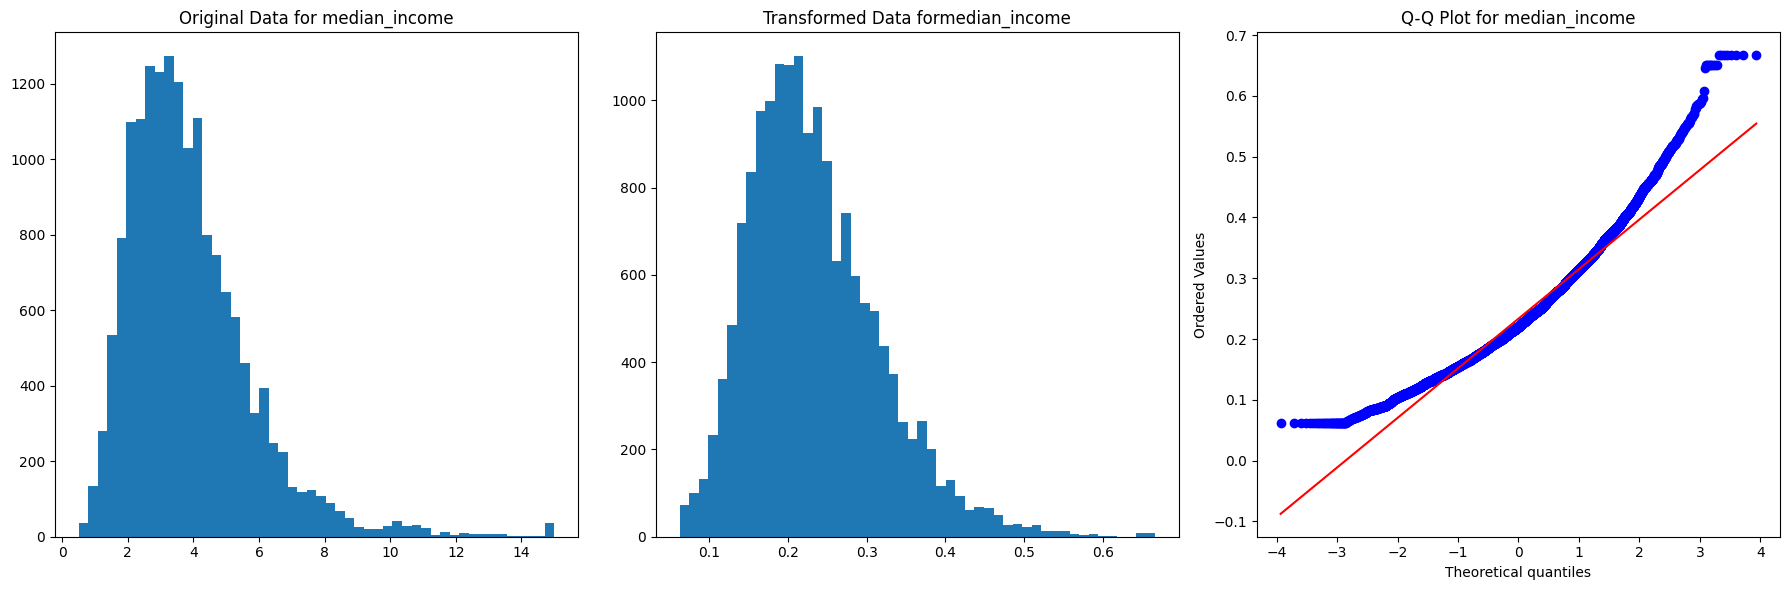

Bedrooms_Ratio
log


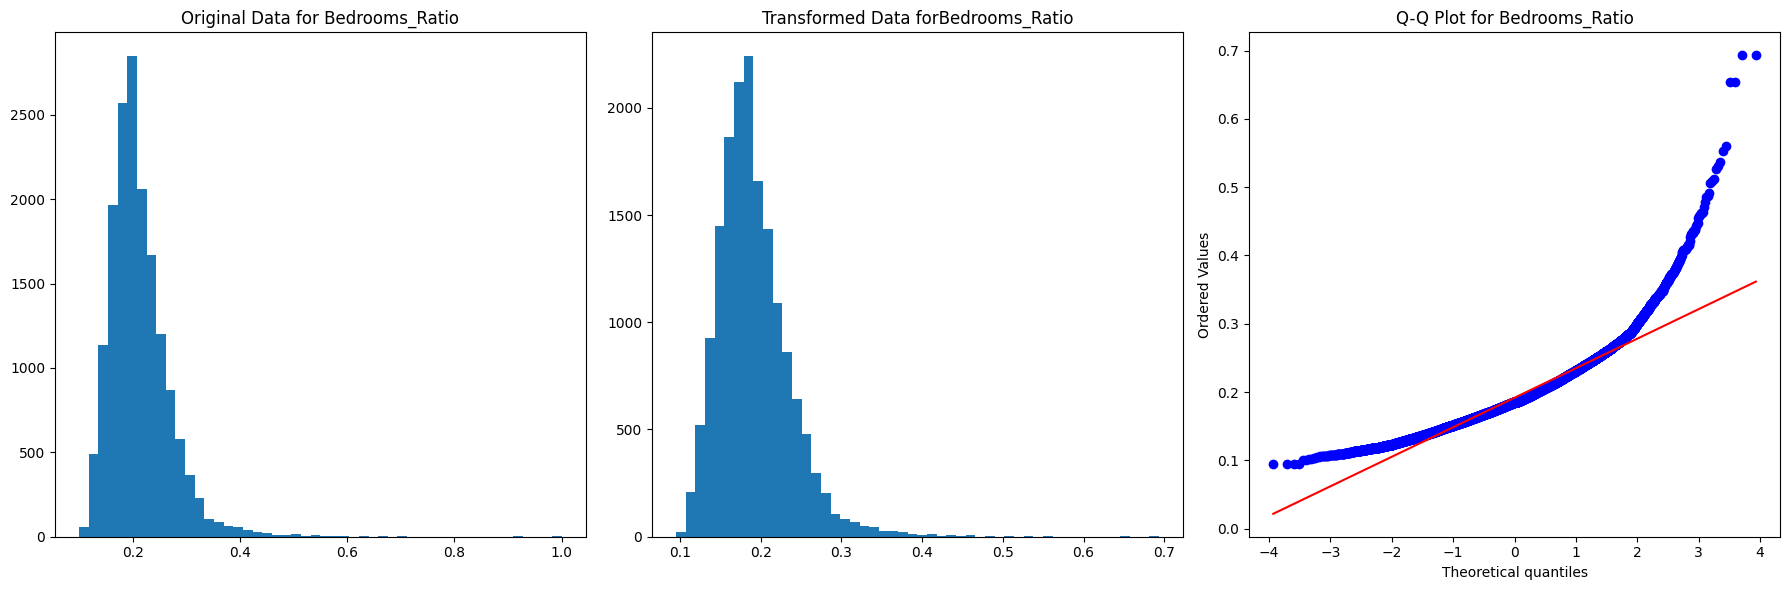

Bedrooms_Ratio
BoxCox


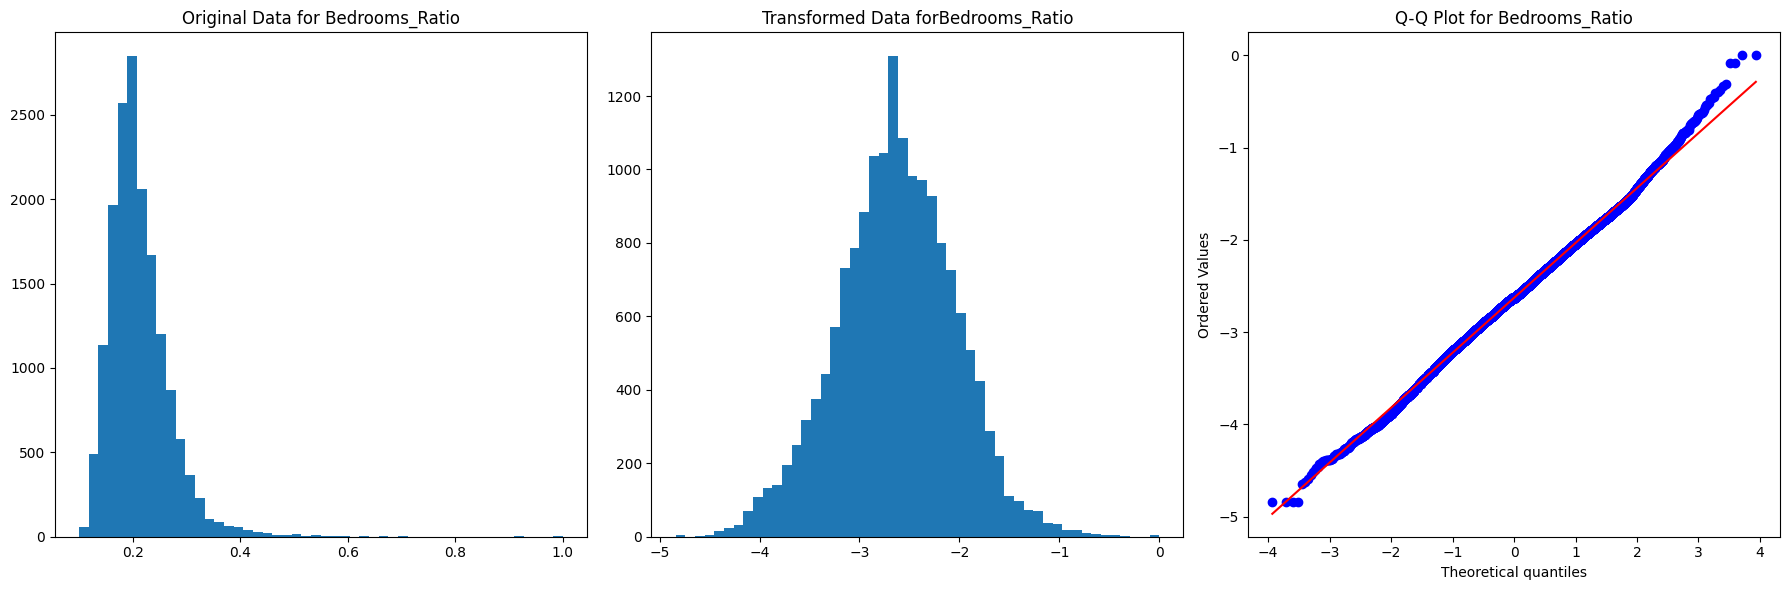

Bedrooms_Ratio
Power Transformer


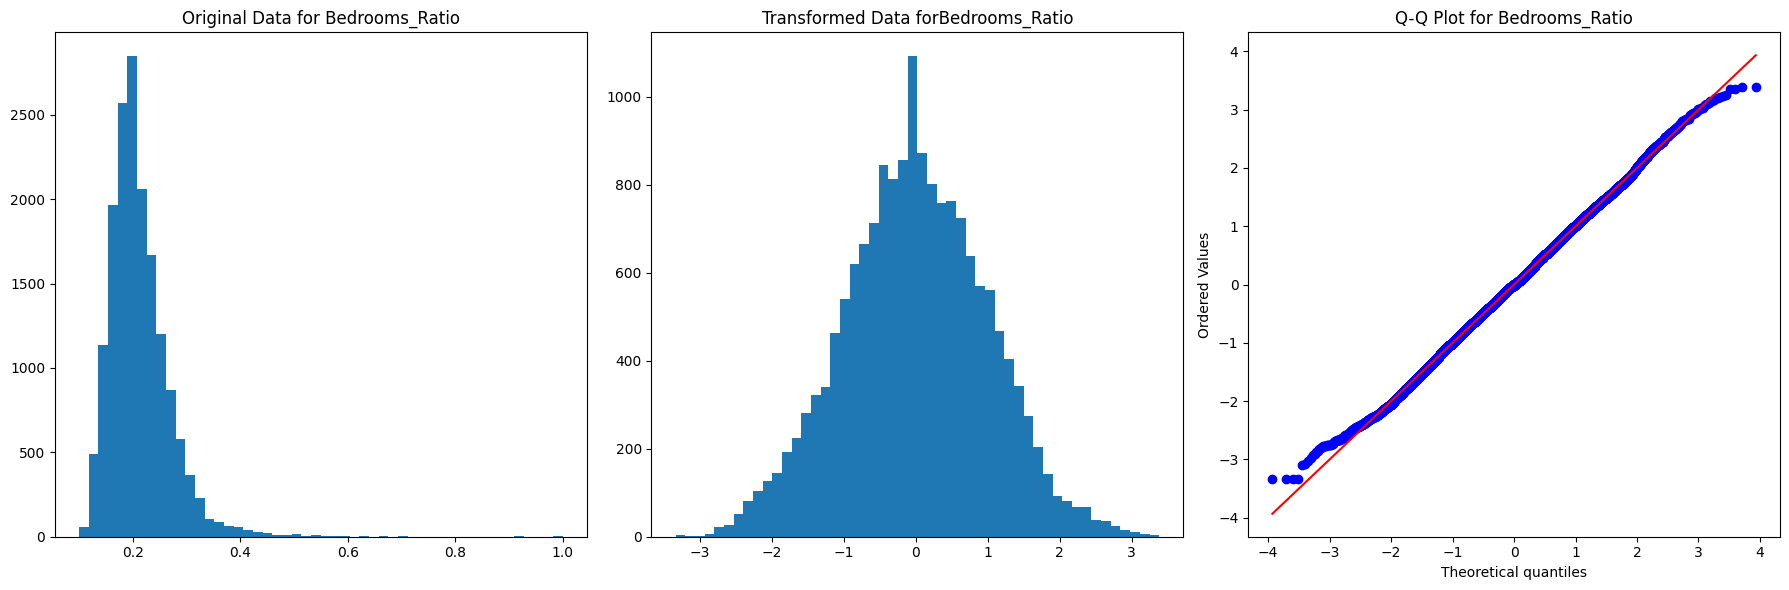

Bedrooms_Ratio
Quantile Transformer


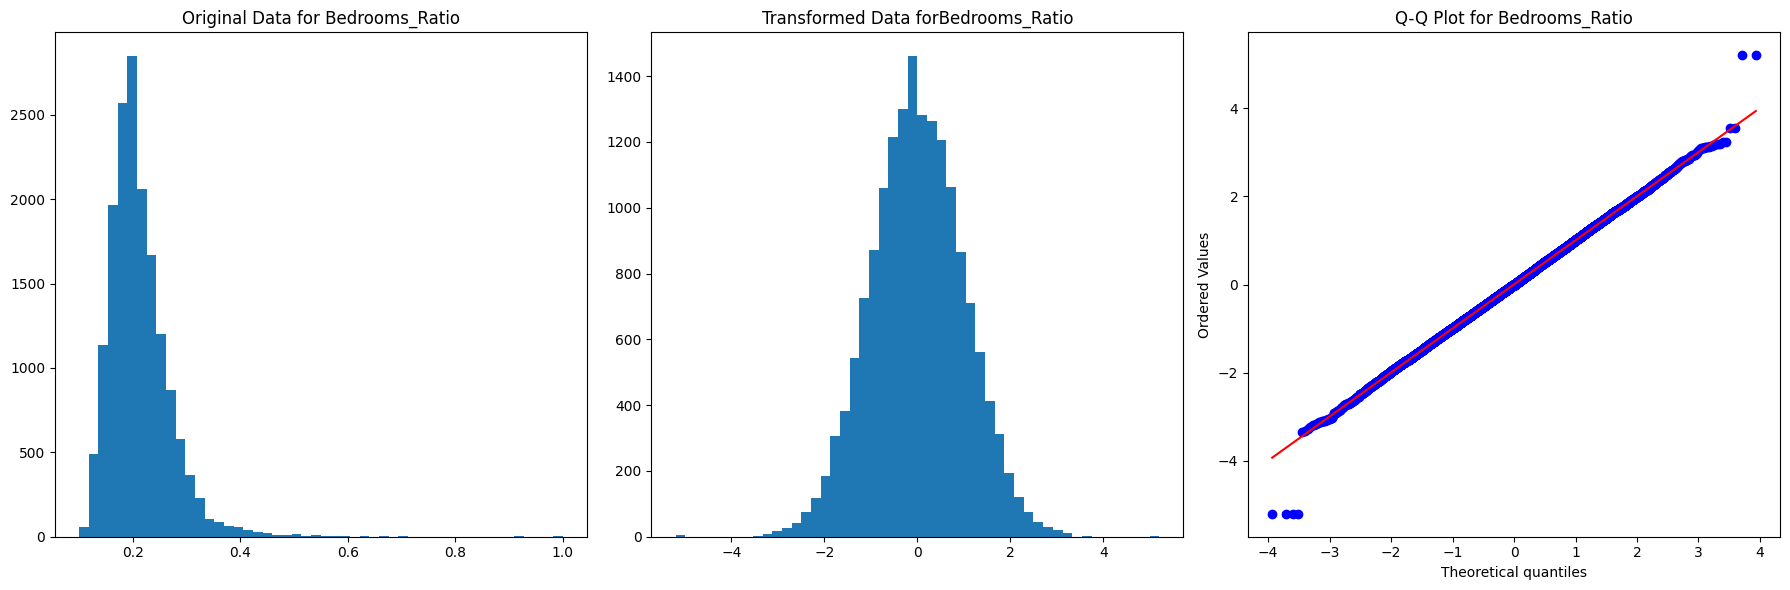

Rooms_Per_House
log


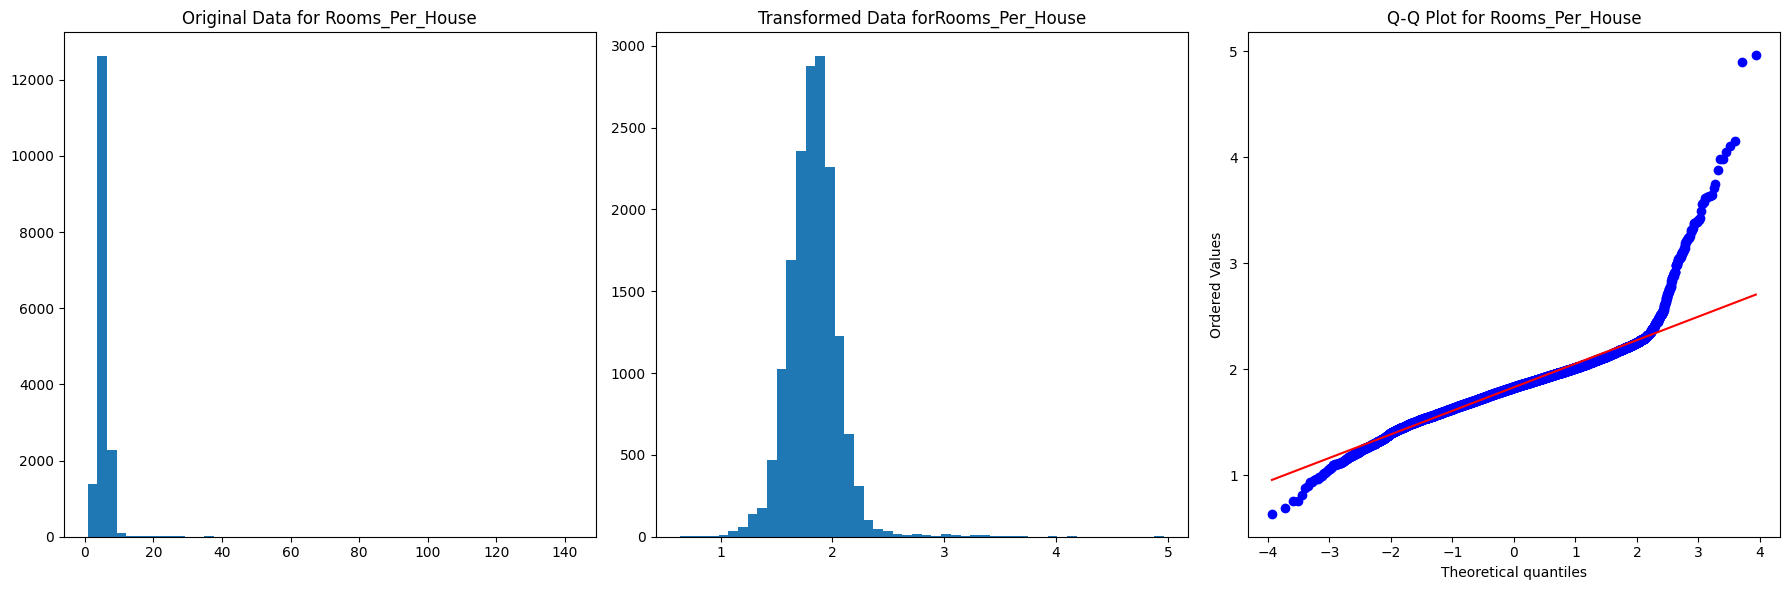

Rooms_Per_House
BoxCox


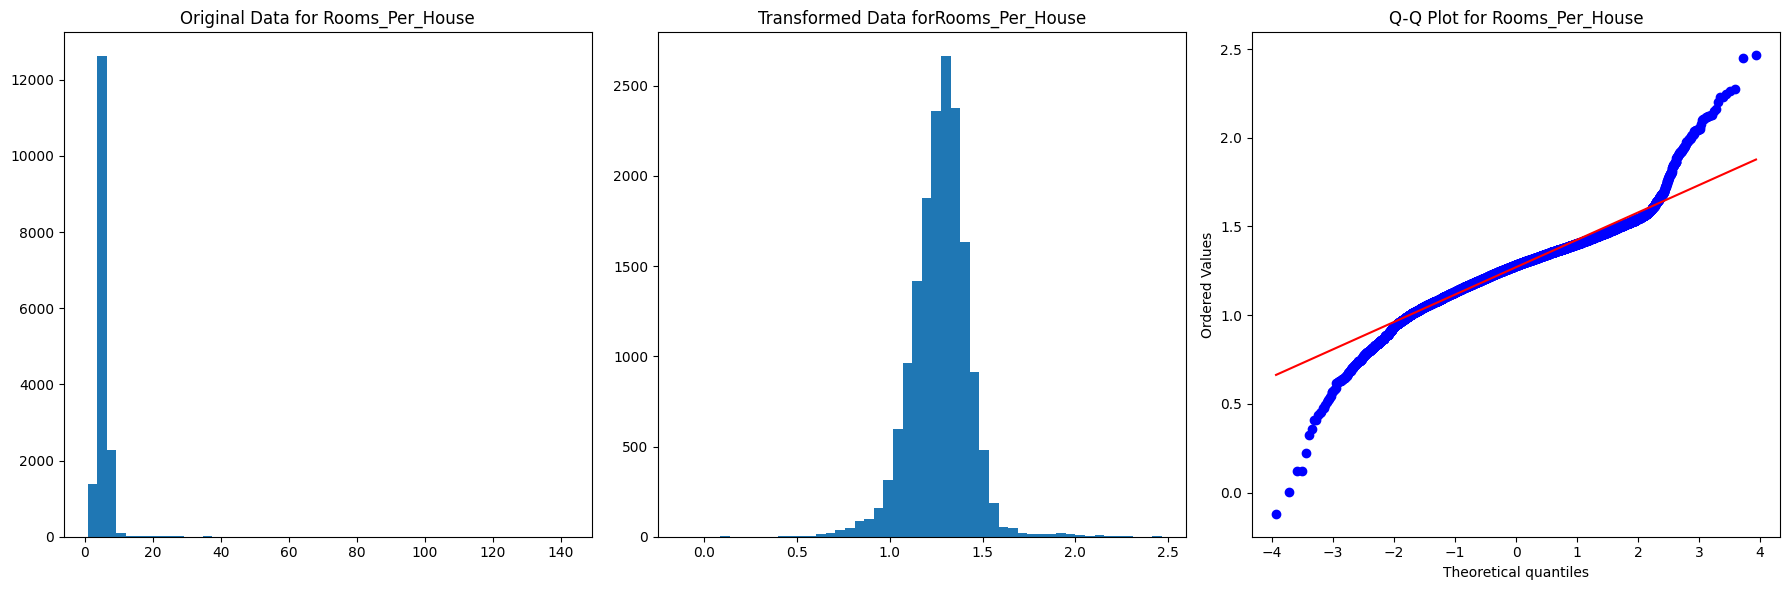

Rooms_Per_House
Power Transformer


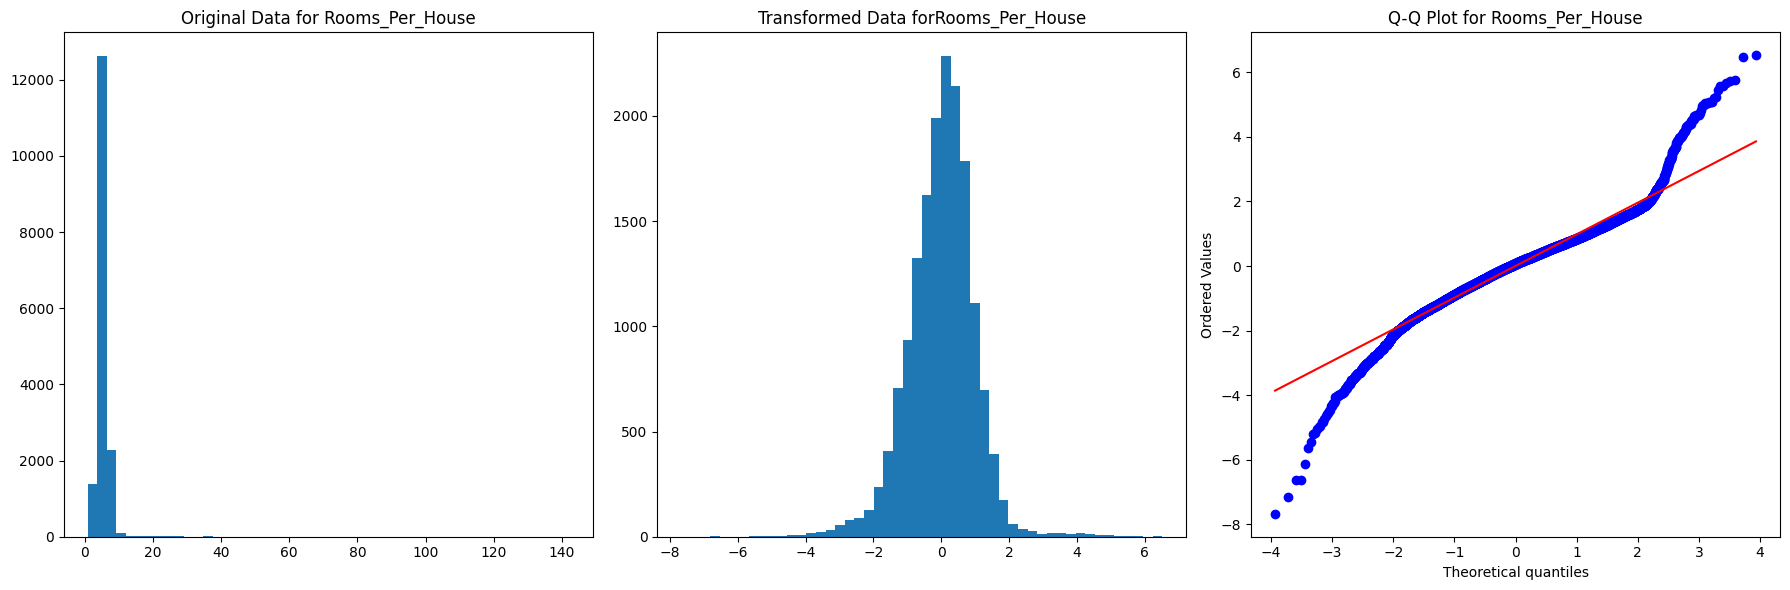

Rooms_Per_House
Quantile Transformer


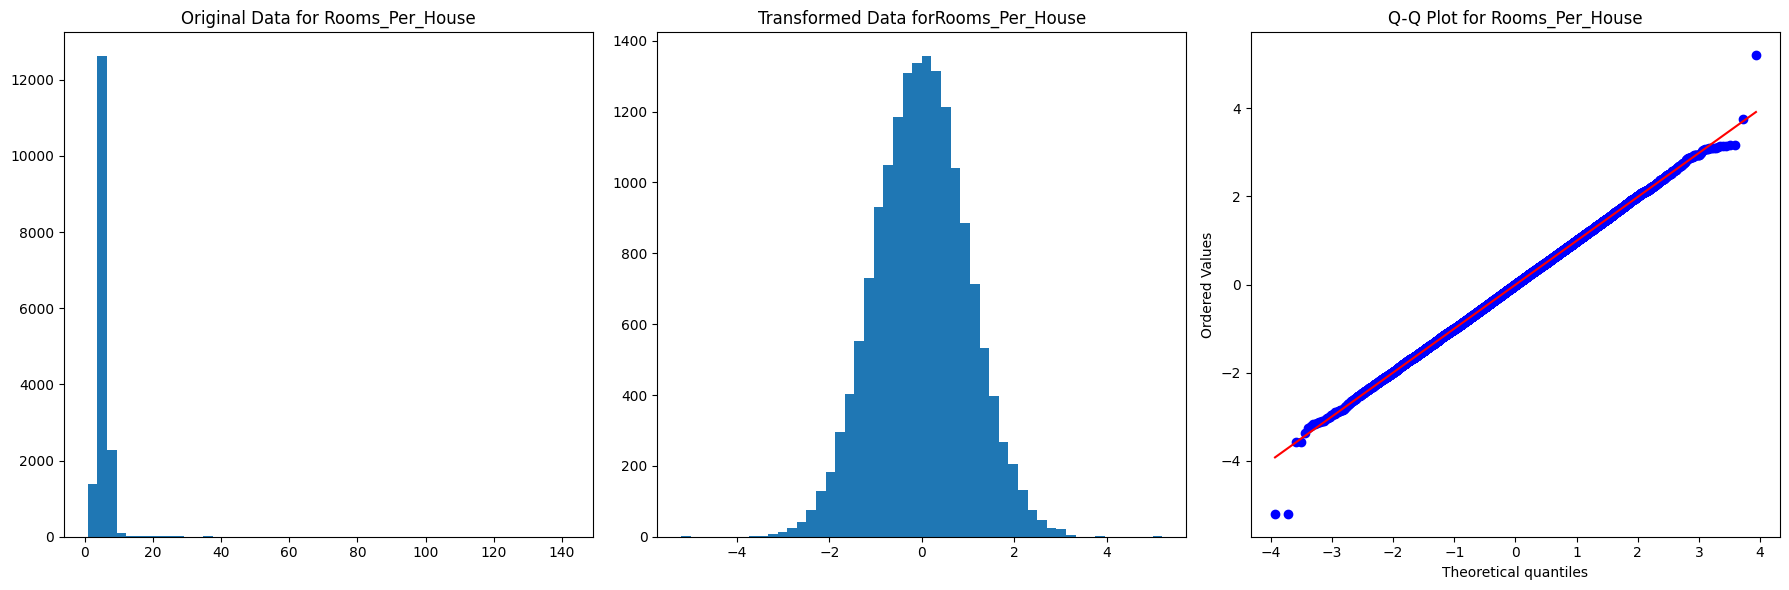

People_Per_House
log


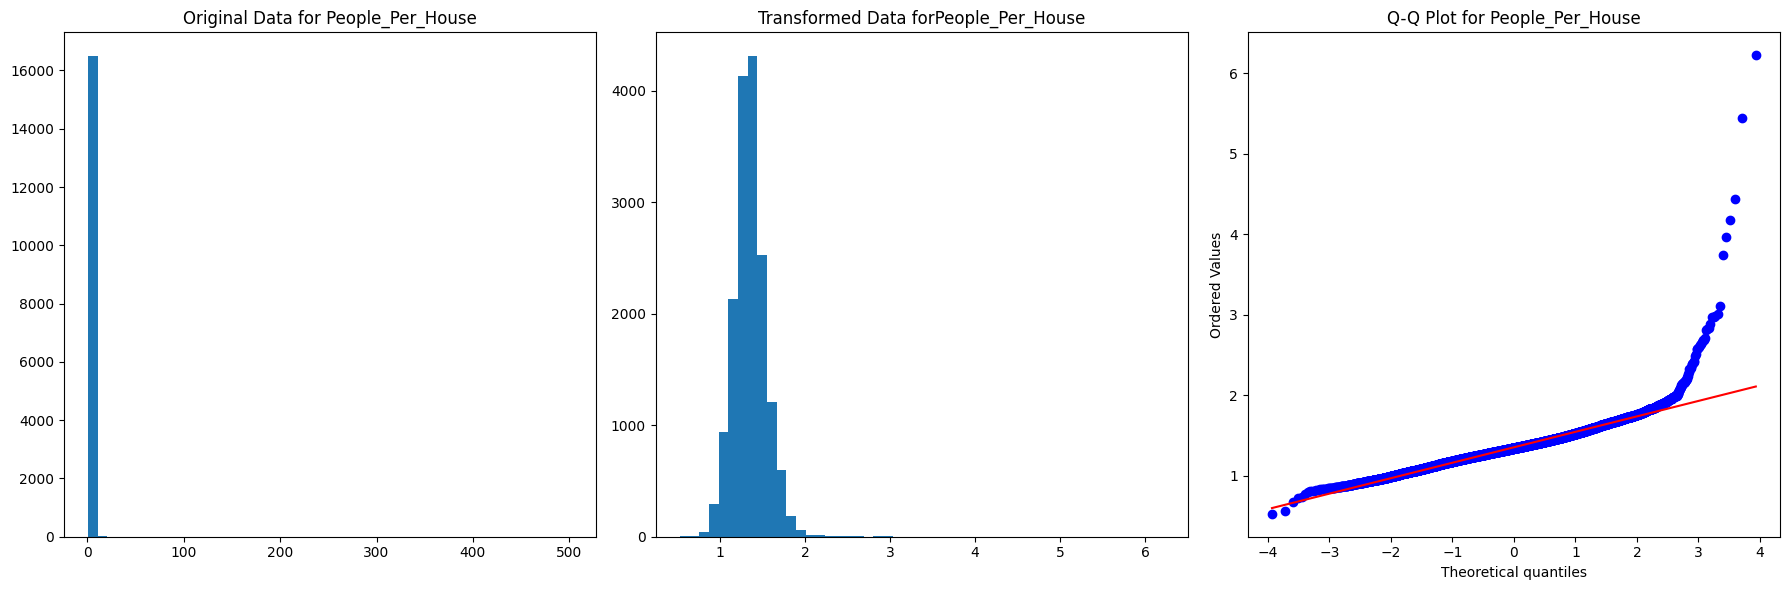

People_Per_House
BoxCox


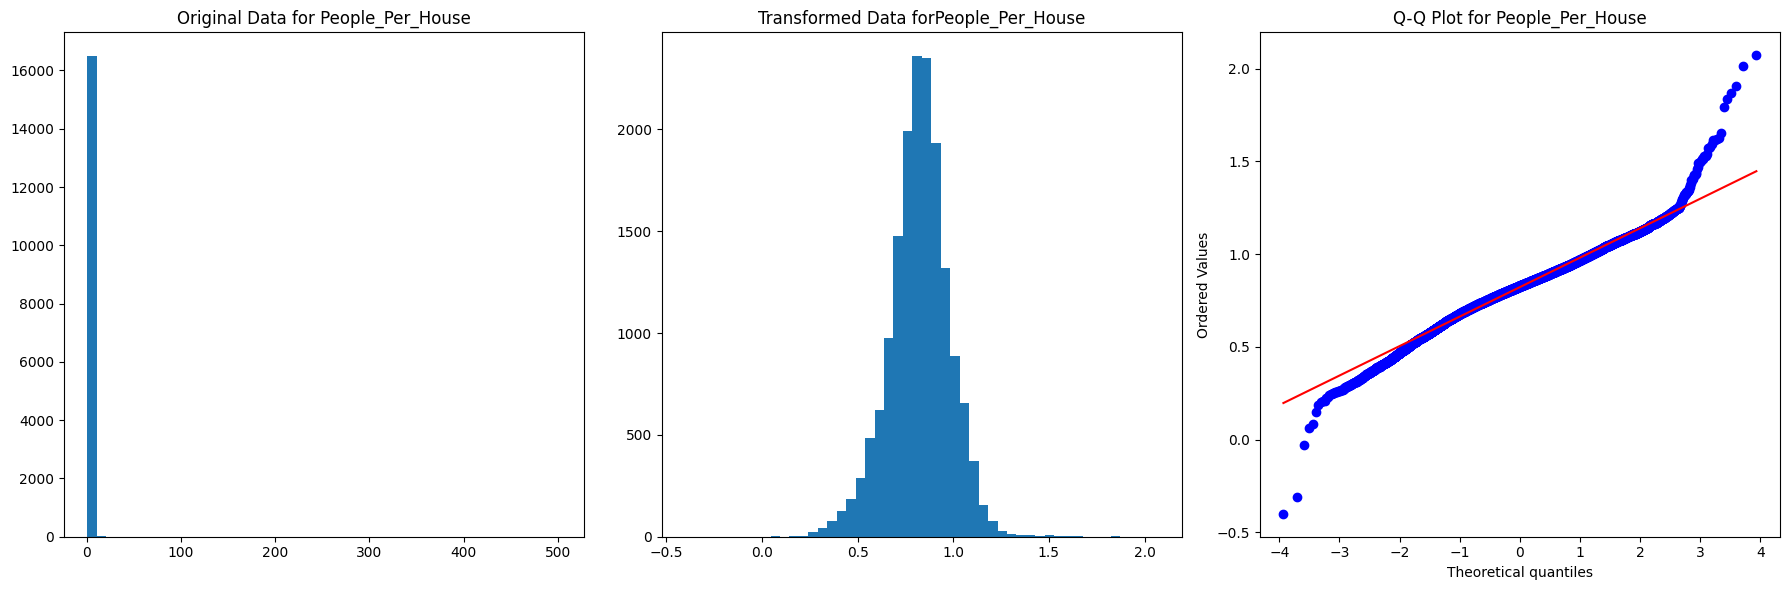

People_Per_House
Power Transformer


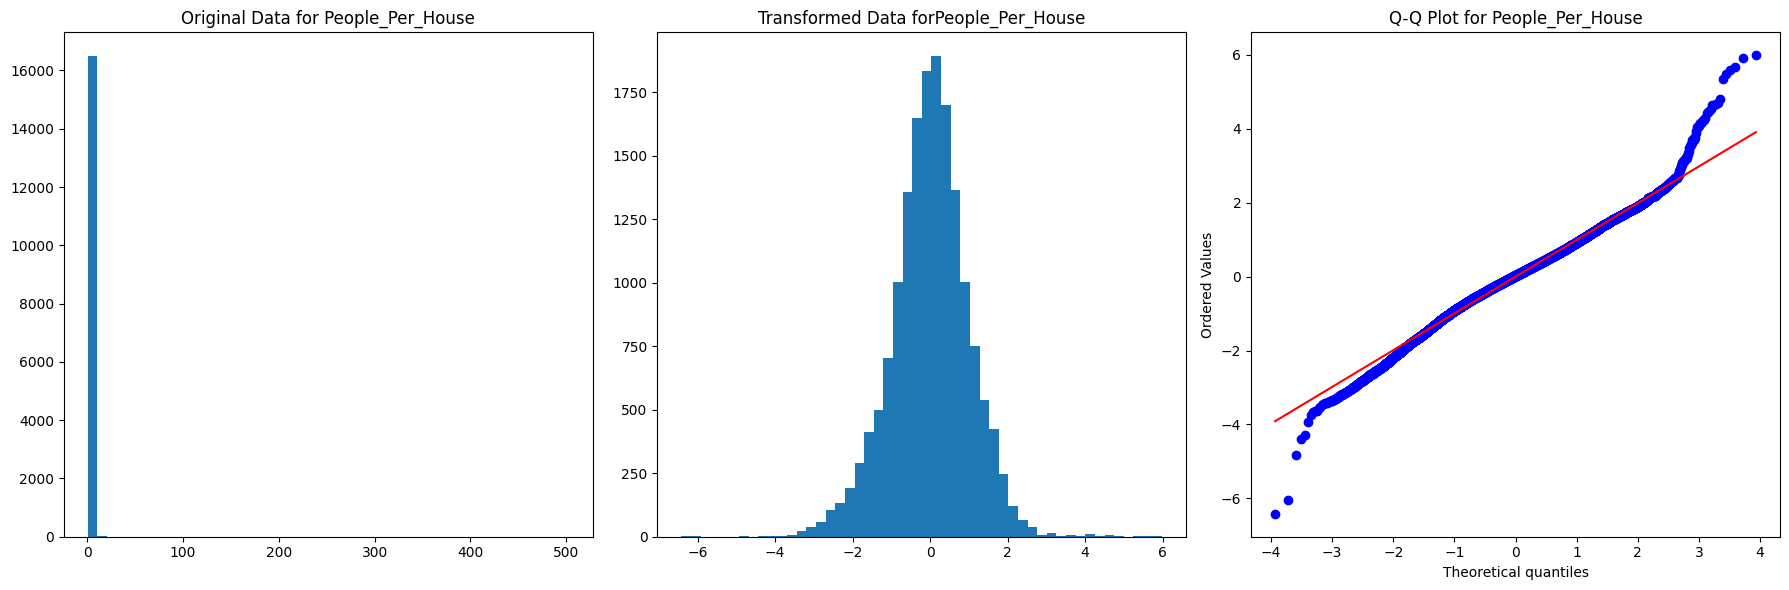

People_Per_House
Quantile Transformer


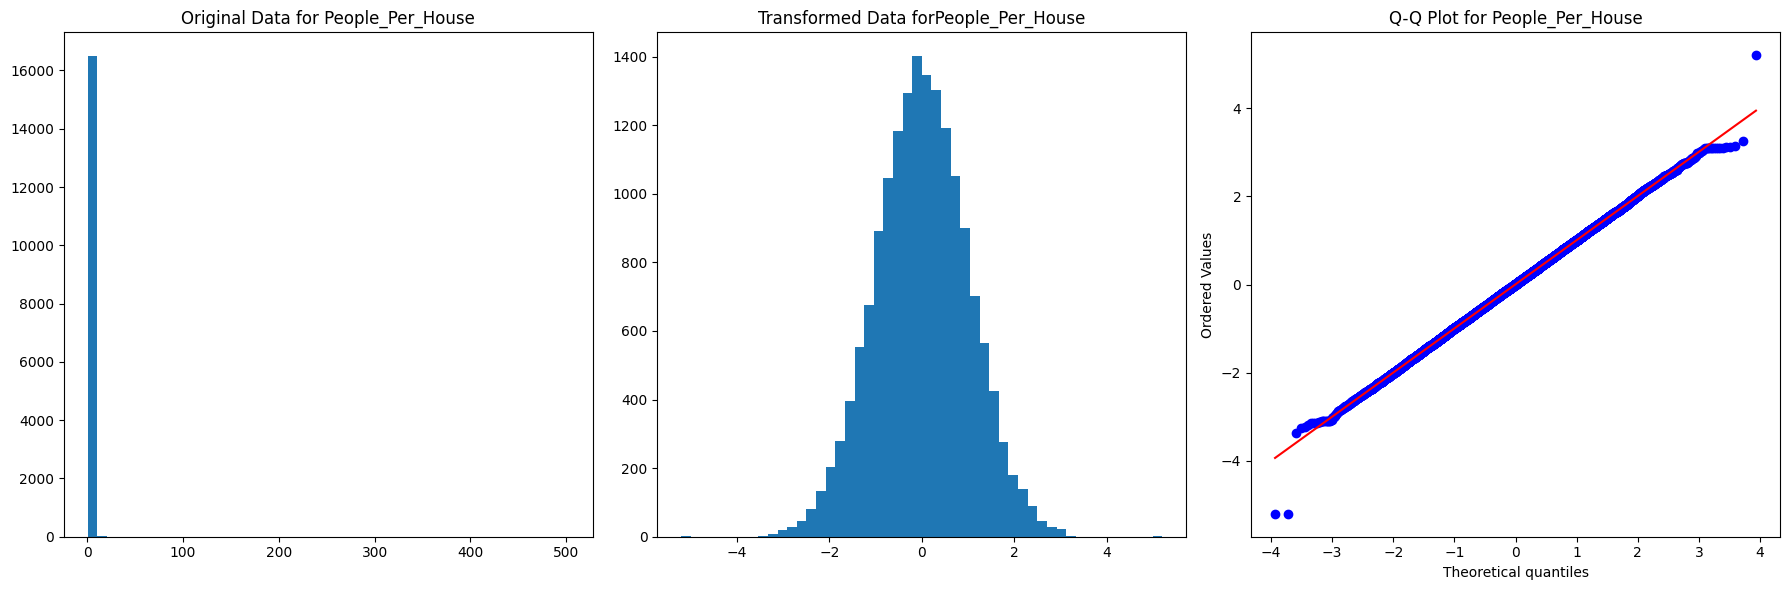

Income_Per_Household
log


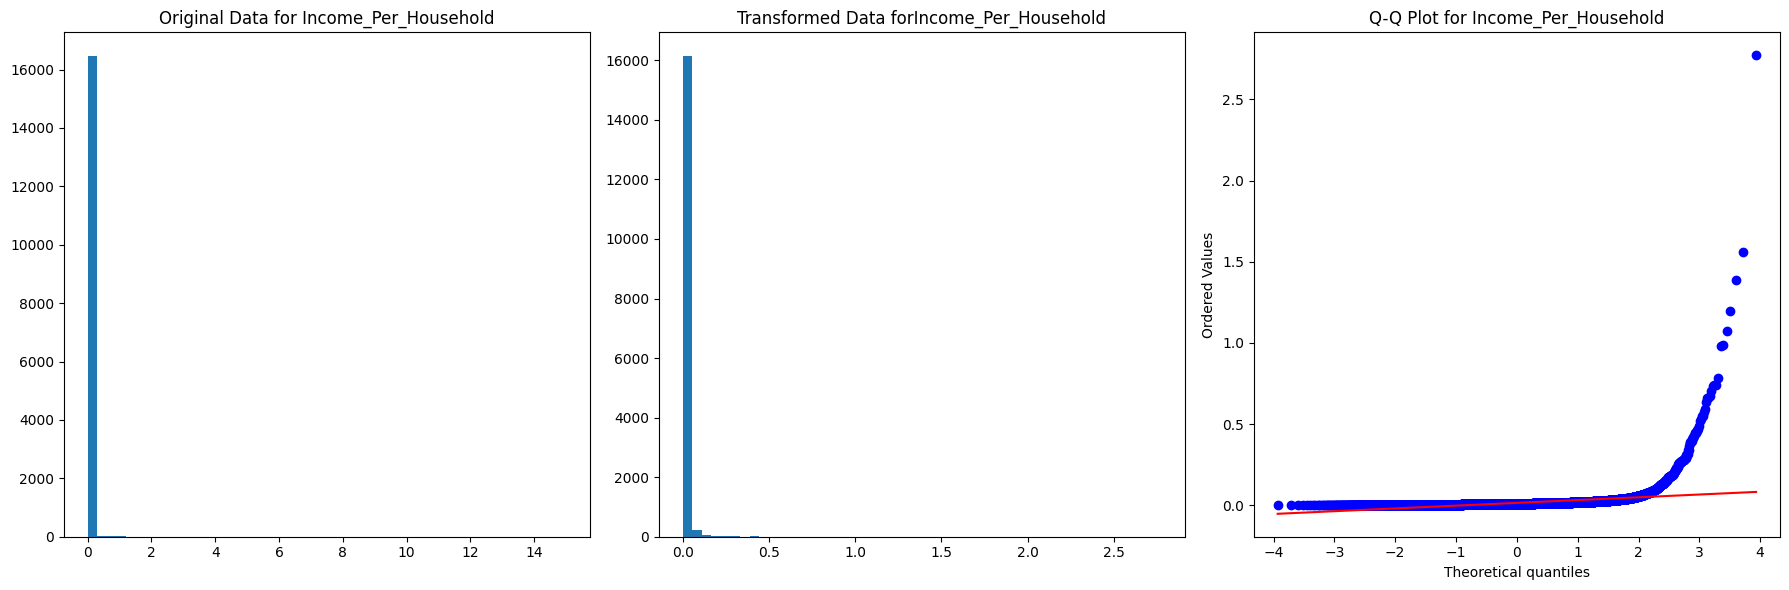

Income_Per_Household
BoxCox


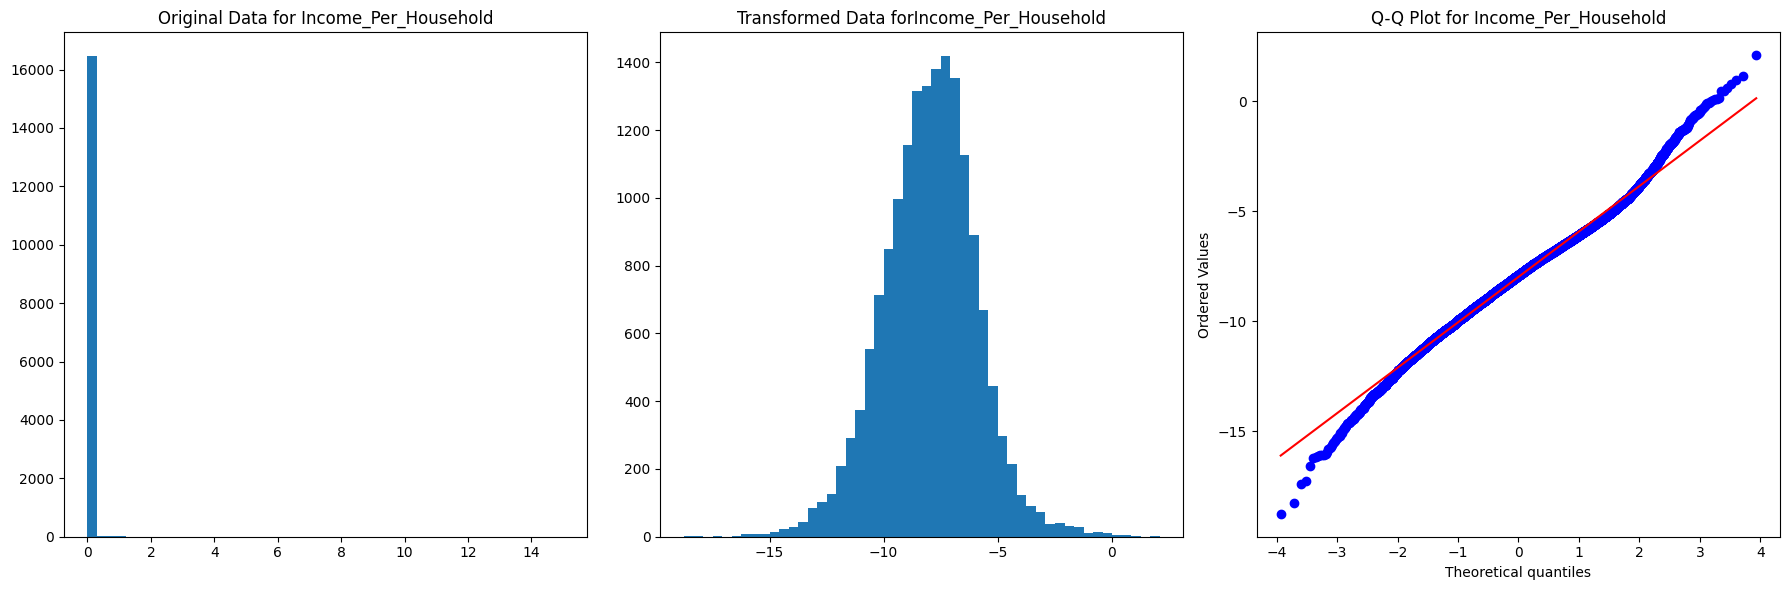

Income_Per_Household
Power Transformer


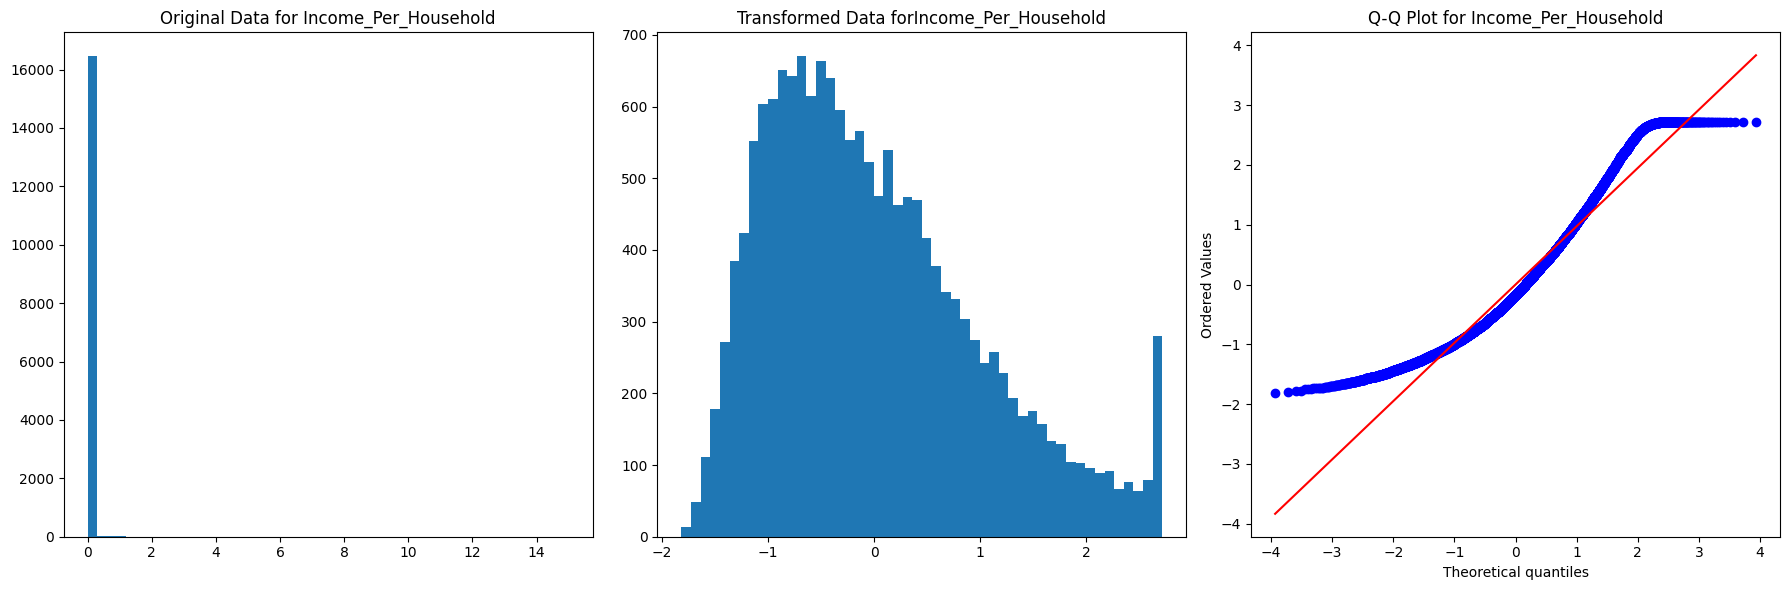

Income_Per_Household
Quantile Transformer


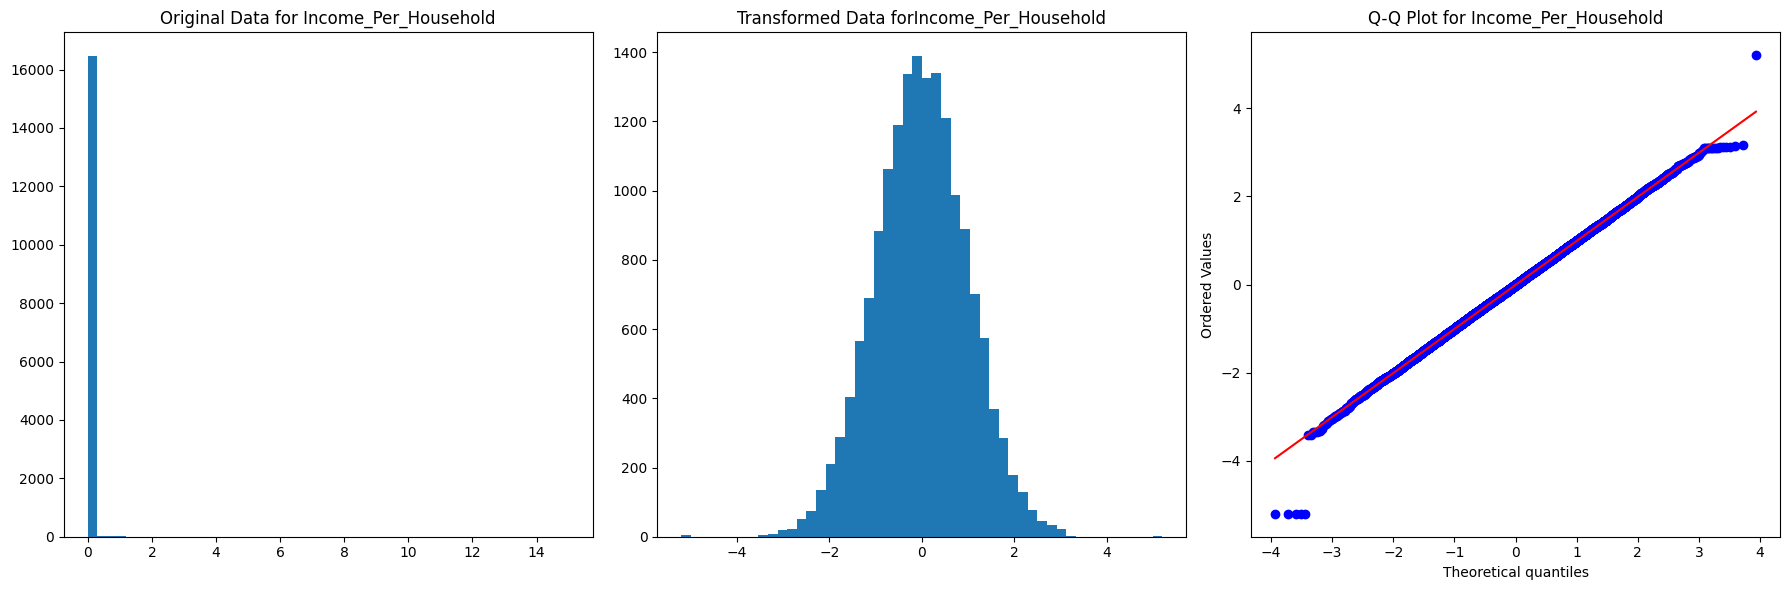

room_to_population_ratio
log


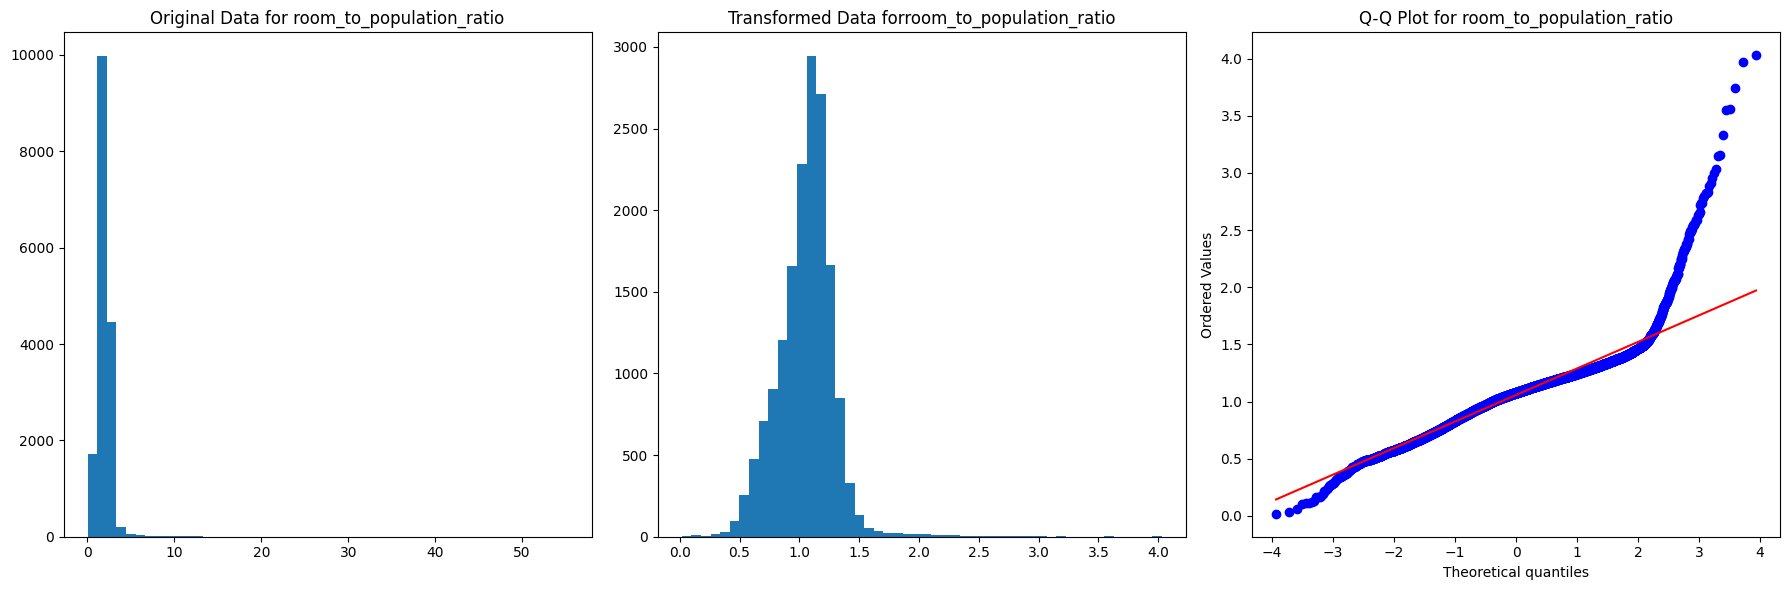

room_to_population_ratio
BoxCox


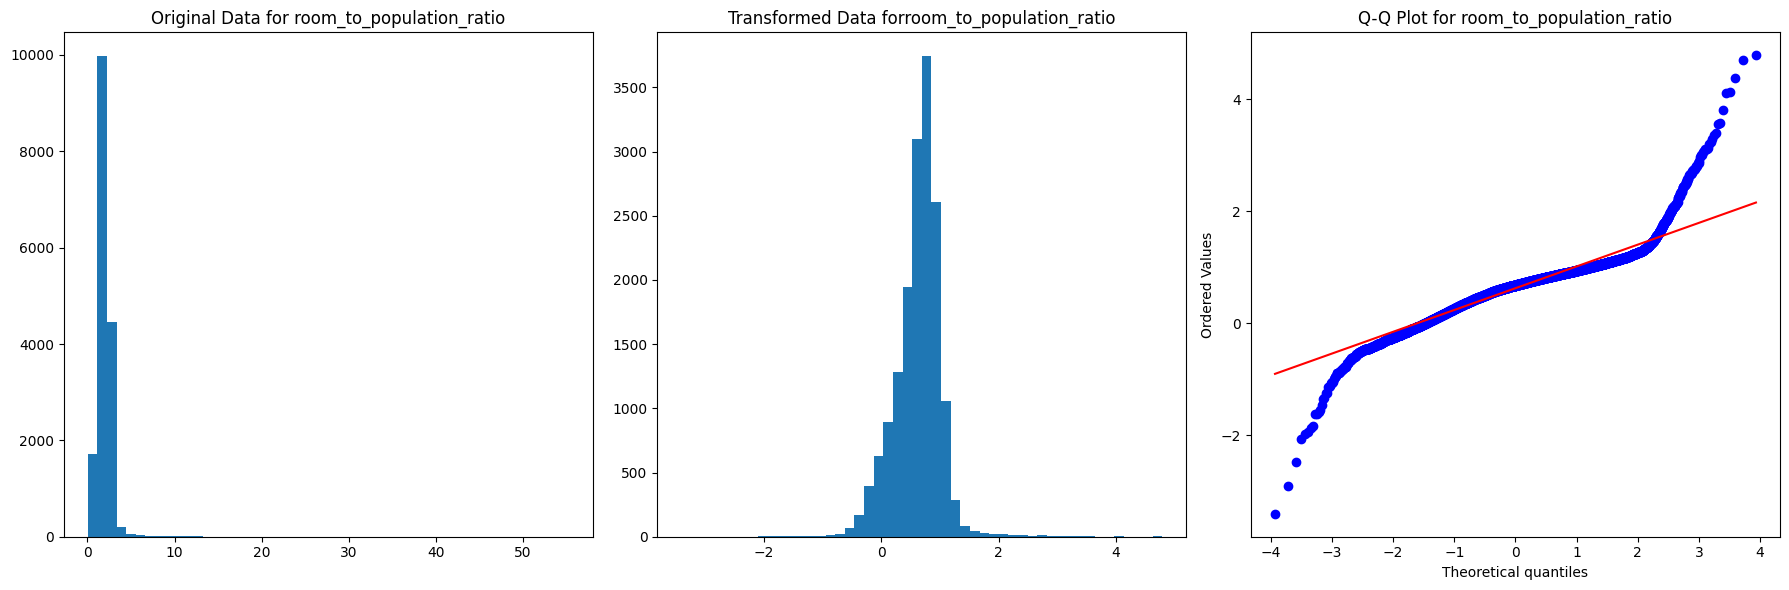

room_to_population_ratio
Power Transformer


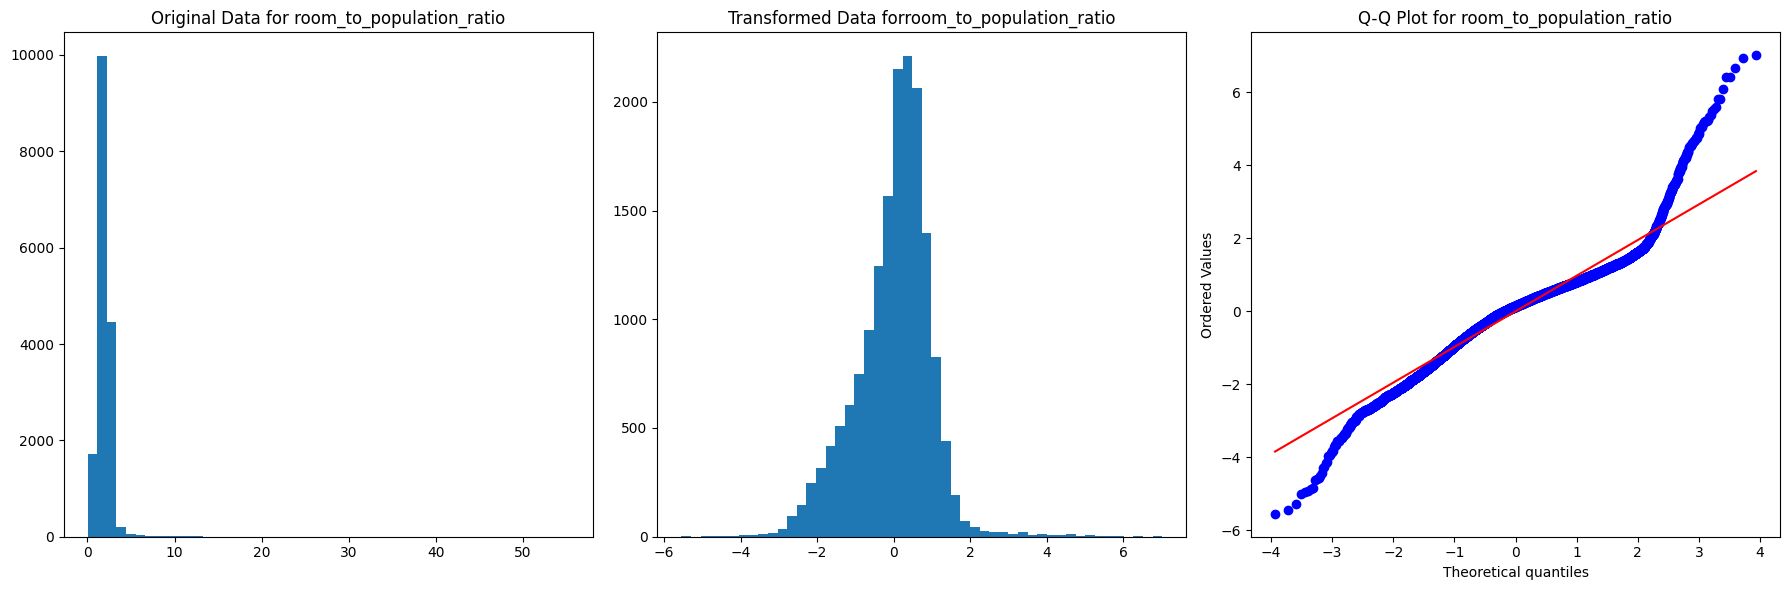

room_to_population_ratio
Quantile Transformer


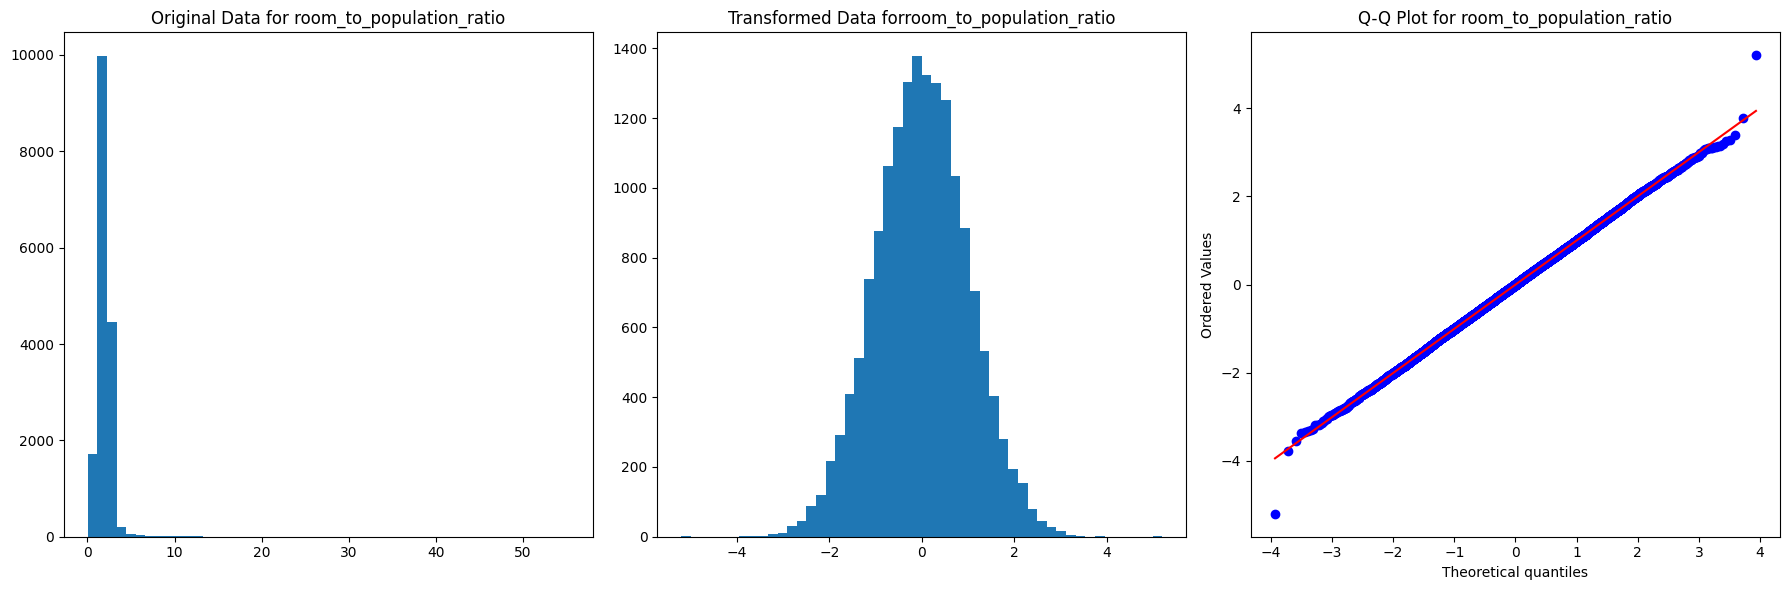

House_Value_per_Age
log


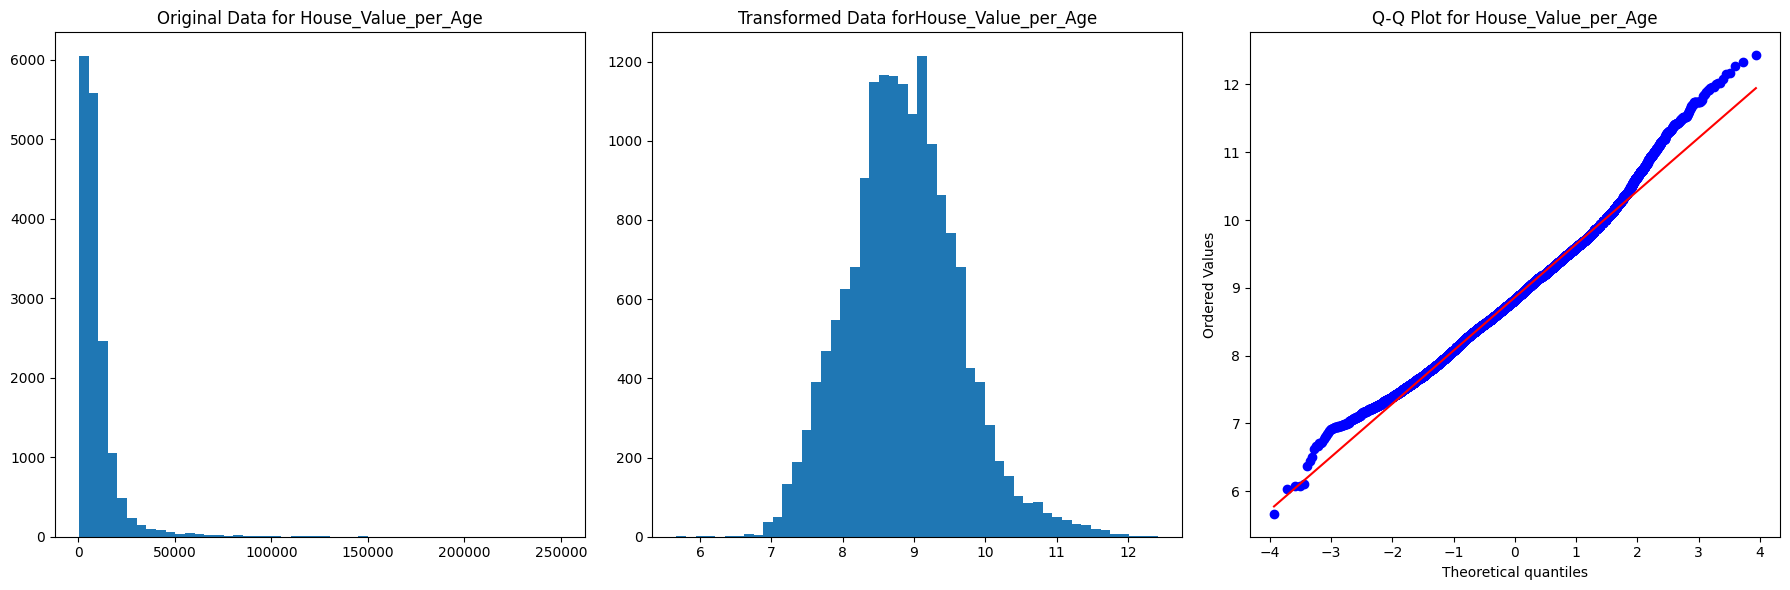

House_Value_per_Age
BoxCox


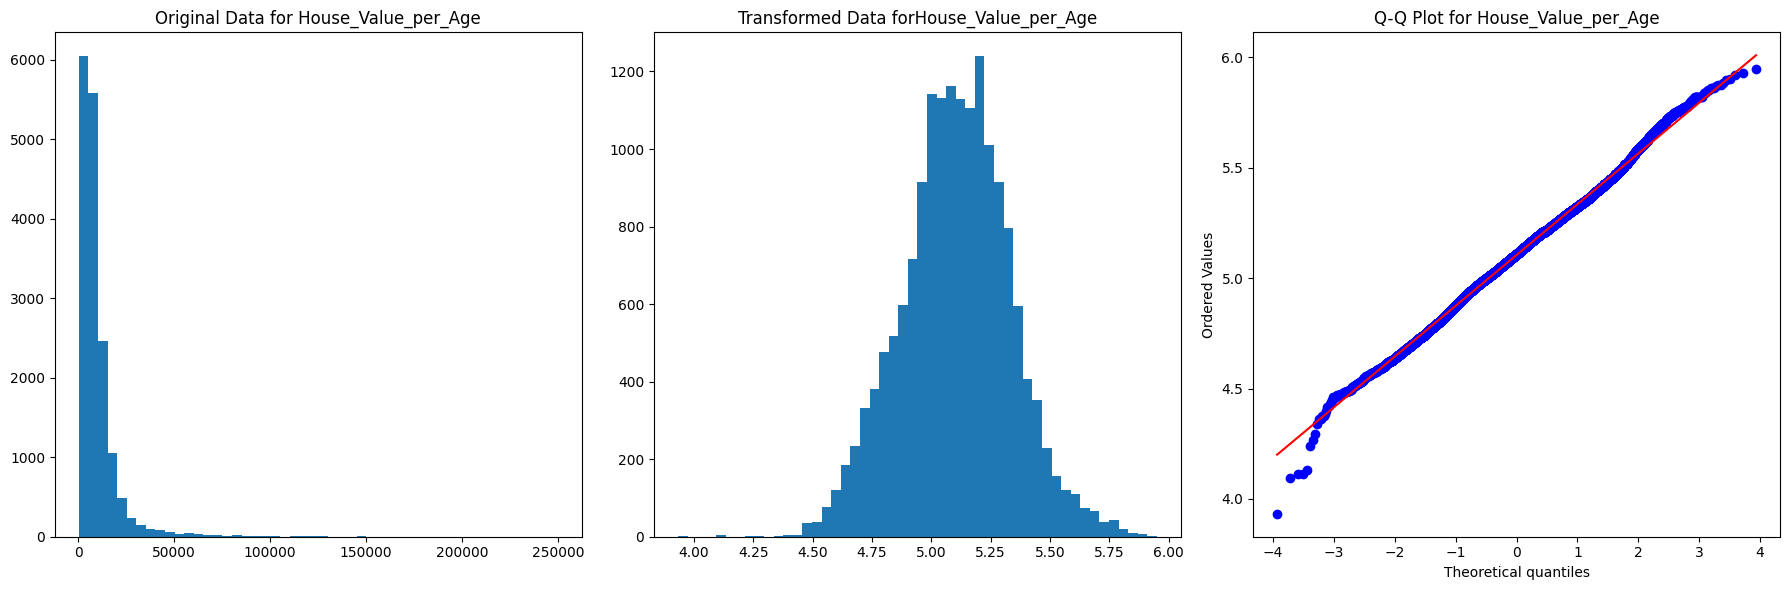

House_Value_per_Age
Power Transformer


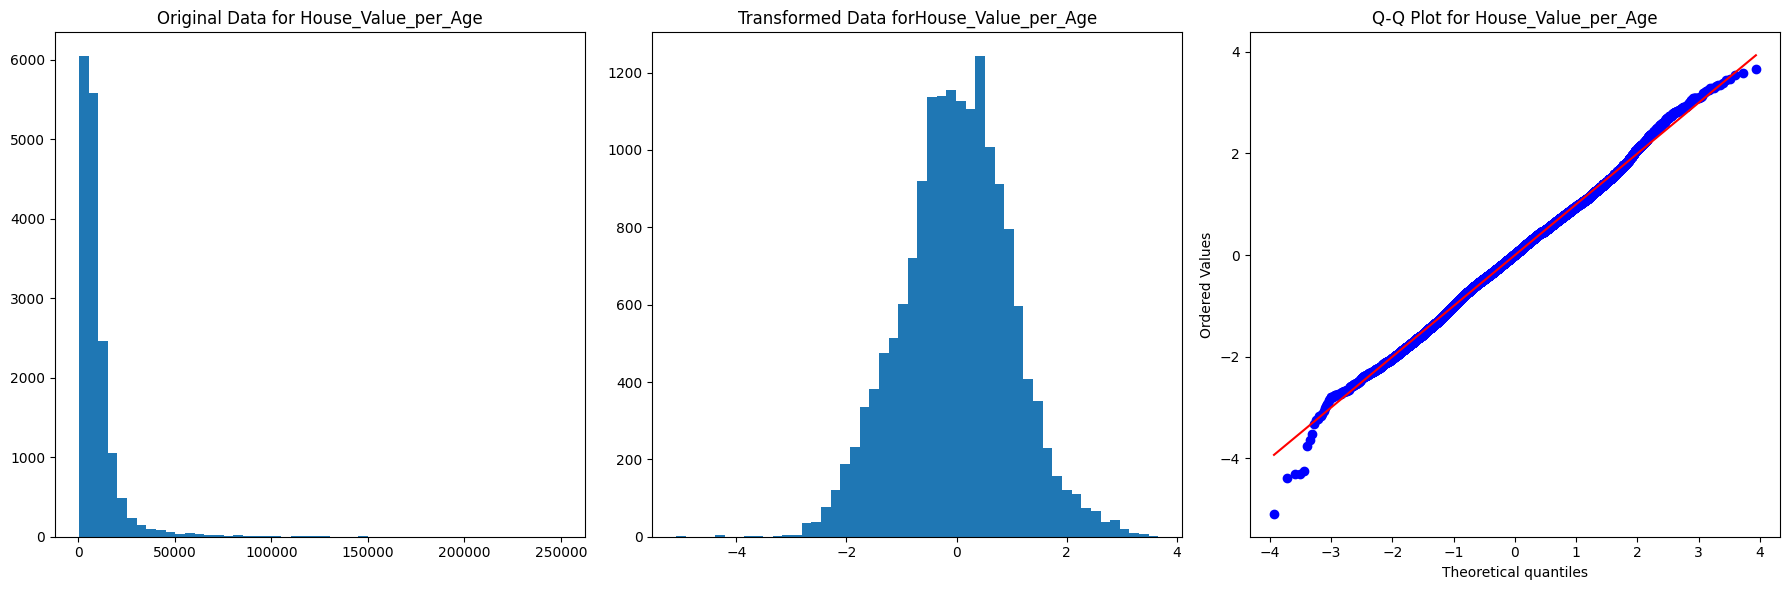

House_Value_per_Age
Quantile Transformer


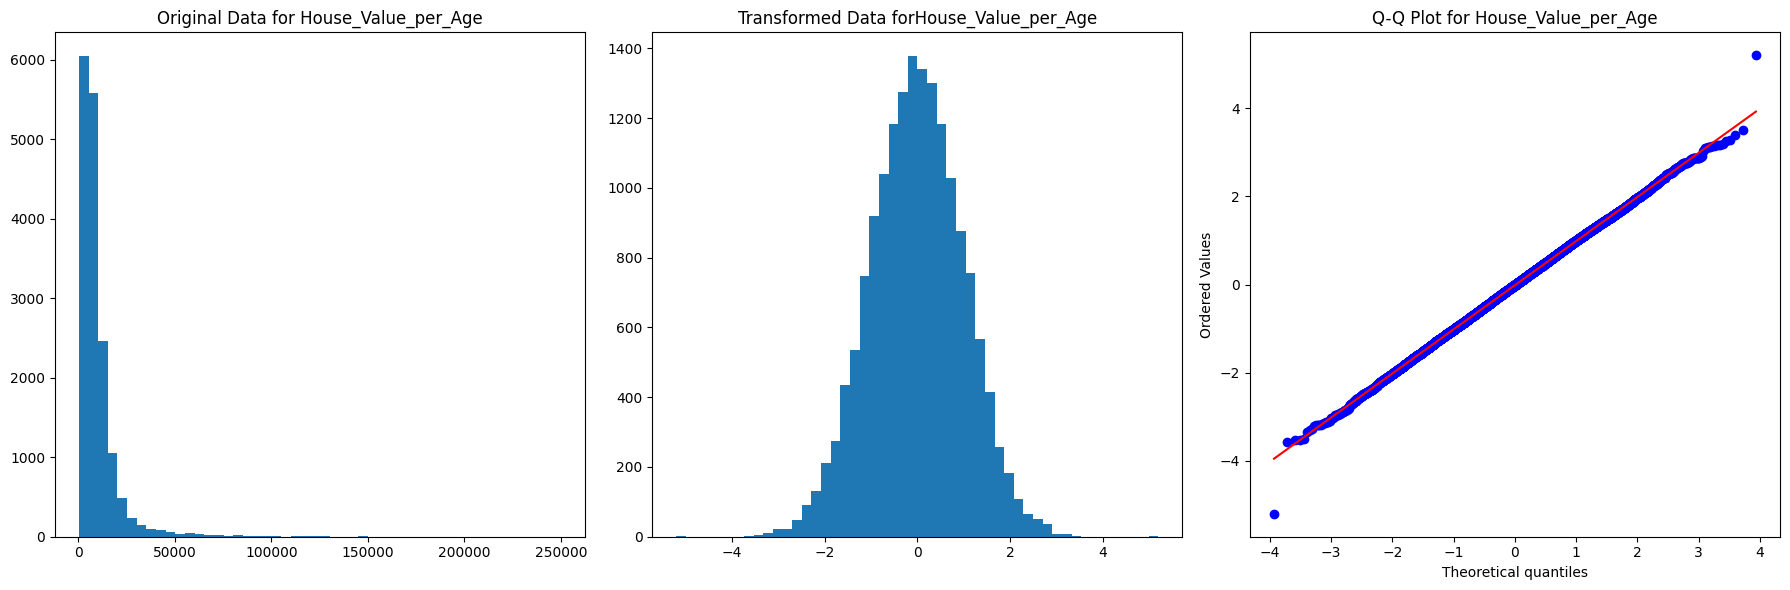

Skewness for geographic is Negligible.
Housing Age Similarly to 35 
log


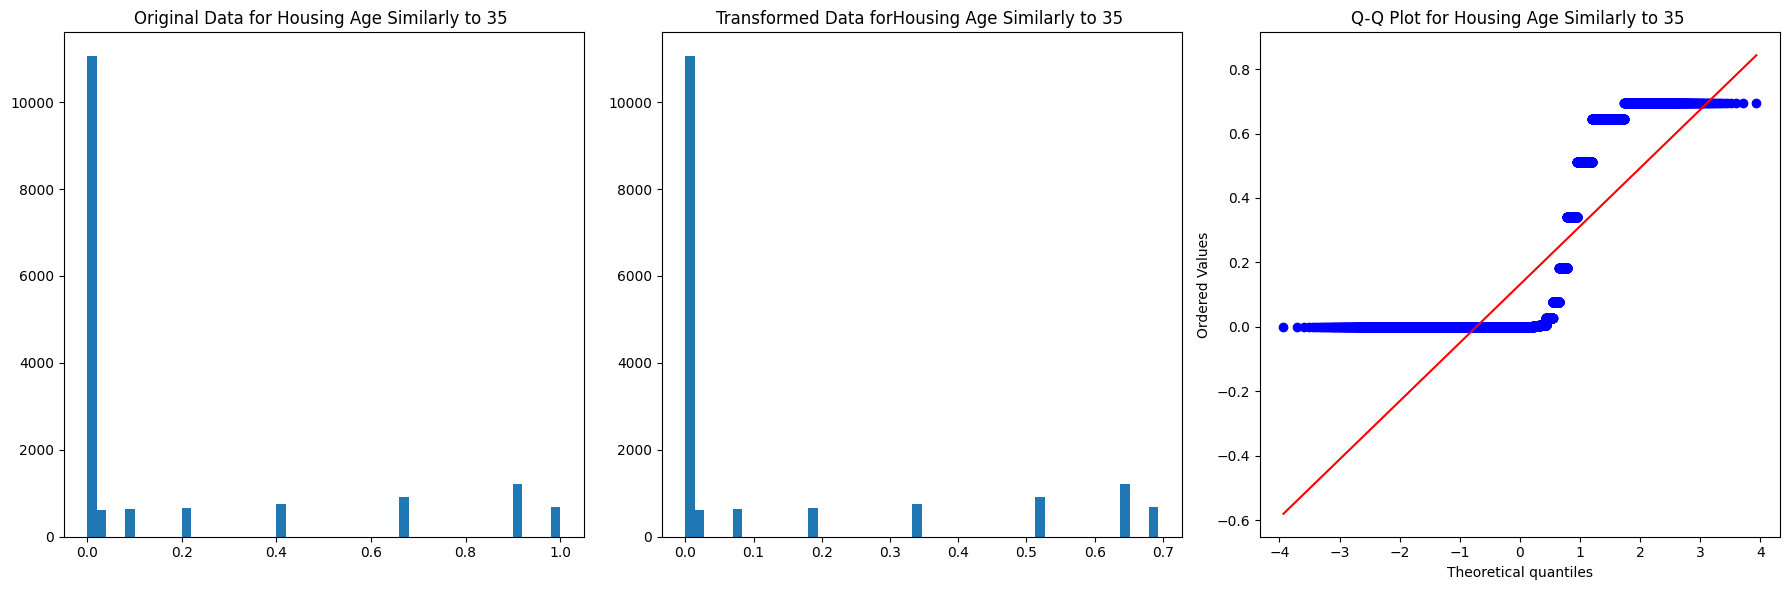

Housing Age Similarly to 35 
Reciprocal


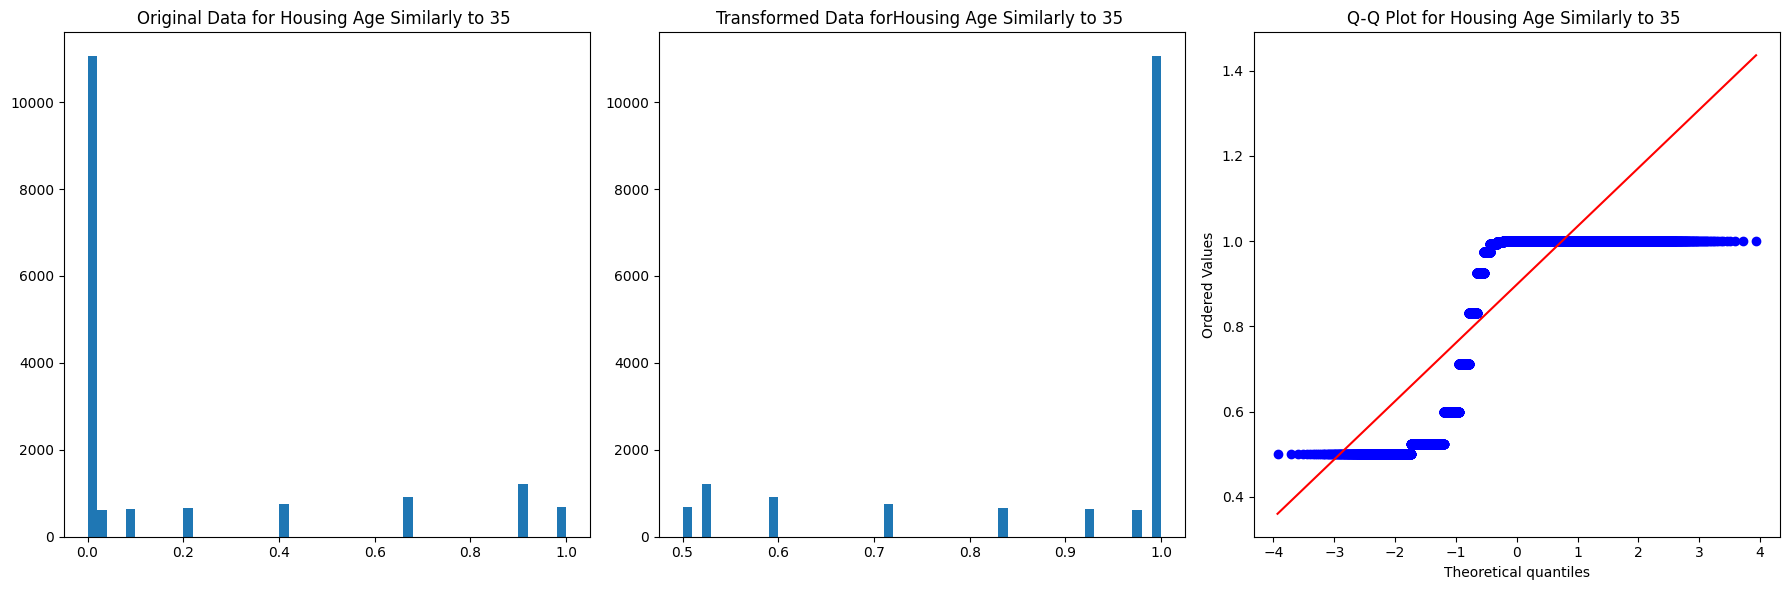

In [584]:
# ---------------------------------------------
# STANDARD LIBARARIES
# ---------------------------------------------
import numpy as np
import pandas as pdabs
from scipy.stats import skew, boxcox
from sklearn.preprocessing import PowerTransformer, QuantileTransformer
import scipy.stats as stats

# ---------------------------------------------
# FILTER THE NUMERIC COLUMNS ONLY
# ---------------------------------------------

Data_Num_Features =[ 'longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'Bedrooms_Ratio', 'Rooms_Per_House', 'People_Per_House',
       'Income_Per_Household', 'room_to_population_ratio',
       'House_Value_per_Age', 'geographic', 'Housing Age Similarly to 35 ']

# ---------------------------------------------
# INITIALIZING LISTS TO STORE RESULTS
# ---------------------------------------------

Features_Names = []
Type_of_Skewed = []
The_Amount_Of_Skweness = []
The_Level_of_Skewed = []
Feature_Name = []
Method = []
Befor = []
After = []
Feature_Best_Method =[]
Best_Method = []
Best_After = []

# ---------------------------------------------
# CHECKING THE SKWENESS
# ---------------------------------------------

def Check_The_Skewness(Data_Num_Features, i):
    Skewness_Value = skew(Data_Num_Features[i])
    Features_Names.append(i)
    The_Amount_Of_Skweness.append(Skewness_Value)
    if Skewness_Value == 0:
        Skewed_status = 'Symmetrical'
    elif Skewness_Value > 0:
        Skewed_status = 'Right'
    elif Skewness_Value < 0:
        Skewed_status = 'Left'
    else:
        Skewed_status = 'Error'
    Type_of_Skewed.append(Skewed_status)

# ---------------------------------------------
# CHECKING THE SKWENESS LEVEL
# ---------------------------------------------

def Skewness_Level(Data, i):
    Skewness_Value = skew(Data[i])
    if 0.5 <= abs(Skewness_Value) < 1:
        The_Level_of_Ske = "Moderate"
    elif 1 <= abs(Skewness_Value) < 2:
        The_Level_of_Ske = 'High'
    elif abs(Skewness_Value) >= 2:
        The_Level_of_Ske = 'Extreme'
    else:
        The_Level_of_Ske = "Neglected"
    The_Level_of_Skewed.append(The_Level_of_Ske)

# ---------------------------------------------
# VISUALIZING THE SKWENESS Q-Q PLOT
# ---------------------------------------------

def Visualize_The_Result(orignal , transform , i):
    plt.figure(figsize=(18, 6))
    plt.subplot(1, 3, 1)
    plt.hist(orignal, bins=50)
    plt.title(f'Original Data for {i}')

    plt.subplot(1, 3, 2)
    plt.hist(transform, bins=50)
    plt.title(f'Transformed Data for{i}')

    plt.subplot(1, 3, 3)
    stats.probplot(transform, dist ="norm", plot=plt)
    plt.title(f'Q-Q Plot for {i}')

    plt.tight_layout()
    plt.show()

# ---------------------------------------------
# SQUARE ROOT FUNCTION
# ---------------------------------------------
def Square_root_Function(Data , i):
    Method_1 = ' Square Root'
    Square_root = np.sqrt(Data[i].clip(lower=0))
    Skewness_Value_Square_root = skew(Square_root.dropna())
    return Method_1, Square_root , Skewness_Value_Square_root
# ---------------------------------------------
# LOG FUNCTION
# ---------------------------------------------
def Log_Function (Data , i):
    Method_2 = 'log'
    Log = np.log1p(Data[i])
    Skewness_Value_Log = skew(Log)
    return Method_2 , Log , Skewness_Value_Log
# ---------------------------------------------
# Reciprocal Function
# ---------------------------------------------
def Reciprocal_function (Data , i):
    Method_2 = 'Reciprocal'
    Reciprocal = 1 / (Data[i] + 1)
    Skewness_Value_Reciprocal = skew(Reciprocal)
    return Method_2 , Reciprocal , Skewness_Value_Reciprocal
# ---------------------------------------------
# BOX COX Function
# ---------------------------------------------
def BoxcoX(Data ,i ):
    Method_2 ="BoxCox"
    Data_for_BoxCox = Data[i].clip(lower=0) + 1e-6
    BoxCox = boxcox(Data_for_BoxCox)[0]
    Skewness_Value_BoxCox = skew(BoxCox)
    return Method_2 , BoxCox , Skewness_Value_BoxCox
# ---------------------------------------------
# Power Transformer
# ---------------------------------------------
def Power_Trans(Data , i):
    Method_3 ="Power Transformer"
    pt = PowerTransformer(method='yeo-johnson')
    power_transformer = pt.fit_transform(Data[[i]]).flatten()
    Skewness_Value_Power = skew(power_transformer)
    return Method_3 ,pt , power_transformer , Skewness_Value_Power
# ---------------------------------------------
# Quantile Function
# ---------------------------------------------
def Quant_Fun (Data ,i ):
    Method_4 = "Quantile Transformer"
    qt = QuantileTransformer(output_distribution='normal')
    quantile_transformer = qt.fit_transform(Data[[i]]).flatten()
    Skewness_Value_Quan = skew(quantile_transformer)
    return Method_4 , qt , quantile_transformer , Skewness_Value_Quan
# ---------------------------------------------
# MODERATE SKWENESS FUNCTION
# ---------------------------------------------

def Moderate_Skewness(Data, i):
    original_Skew = skew(Data[i].dropna())

    # Square Root Transformation
    Method_1 , Square_root , Skewness_Value_Square_root = Square_root_Function(Data , i)
    Feature_Name.append(i)
    Method.append(Method_1)
    Befor.append(original_Skew)
    After.append(Skewness_Value_Square_root)
    print(i)
    print(Method_1)
    Visualize_The_Result(Data[i] , Square_root , i)

    # Log Transformation
    Method_2 , Log , Skewness_Value_Log = Log_Function(Data ,i)
    Feature_Name.append(i)
    Method.append(Method_2)
    Befor.append(original_Skew)
    After.append(Skewness_Value_Log)
    print(i)
    print(Method_2)
    Visualize_The_Result(Data[i] , Log , i)

    #Determine the best method
    if abs(Skewness_Value_Square_root) < abs(Skewness_Value_Log):
        Feature_Best_Method.append(i)
        Best_Method.append(Method_1)
        Best_After.append(Skewness_Value_Square_root)
    else:
        Feature_Best_Method.append(i)
        Best_Method.append(Method_2)
        Best_After.append(Skewness_Value_Log)

# ---------------------------------------------
# HIGH SKWENESS FUNCTION
# ---------------------------------------------

def High_Skewness(Data, i):
    original_Skew = skew(Data[i])

    # Log Transformation
    Method_1 , Log , Skewness_Value_Log = Log_Function(Data ,i)
    Feature_Name.append(i)
    Method.append(Method_1)
    Befor.append(original_Skew)
    After.append(Skewness_Value_Log)
    print(i)
    print(Method_1)
    Visualize_The_Result(Data[i] , Log , i)

    # Reciprocal Transformation
    Method_2 , Reciprocal , Skewness_Value_Reciprocal = Reciprocal_function(Data , i)
    Feature_Name.append(i)
    Method.append(Method_2)
    Befor.append(original_Skew)
    After.append(Skewness_Value_Reciprocal)
    print(i)
    print(Method_2)
    Visualize_The_Result(Data[i] , Reciprocal , i)

    # Determine the best method
    if abs(Skewness_Value_Log) < abs(Skewness_Value_Reciprocal):
        Feature_Best_Method.append(i)
        Best_Method.append(Method_1)
        Best_After.append(Skewness_Value_Log)
    else:
        Feature_Best_Method.append(i)
        Best_Method.append(Method_2)
        Best_After.append(Skewness_Value_Reciprocal)

# ---------------------------------------------
# Extreme SKWENESS FUNCTION
# ---------------------------------------------

def Extreme_Skewness(Data, i):
    original_Skew = skew(Data[i])

    # Log Transformation
    Method_1 , Log , Skewness_Value_Log = Log_Function(Data ,i)
    Feature_Name.append(i)
    Method.append(Method_1)
    Befor.append(original_Skew)
    After.append(Skewness_Value_Log)
    print(i)
    print(Method_1)
    Visualize_The_Result(Data[i], Log, i)

    # BoxCox Transformation
    Method_2 , BoxCox , Skewness_Value_BoxCox = BoxcoX(Data ,i )
    Feature_Name.append(i)
    Method.append(Method_2)
    Befor.append(original_Skew)
    After.append(Skewness_Value_BoxCox)
    print(i)
    print(Method_2)
    Visualize_The_Result(Data[i], BoxCox, i)

    # Power Transformer
    Method_3 ,pt , power_transformer , Skewness_Value_Power = Power_Trans(Data ,i)
    Feature_Name.append(i)
    Method.append(Method_3)
    Befor.append(original_Skew)
    After.append(Skewness_Value_Power)
    print(i)
    print(Method_3)
    Visualize_The_Result(Data[i], power_transformer, i)

    # Quantile Transformer
    Method_4 , qt , quantile_transformer , Skewness_Value_Quan = Quant_Fun(Data ,i)
    Feature_Name.append(i)
    Method.append(Method_4)
    Befor.append(original_Skew)
    After.append(Skewness_Value_Quan)
    print(i)
    print(Method_4)
    Visualize_The_Result(Data[i], quantile_transformer, i)
    # Determine the best method
    skewness_results = {'Log': Skewness_Value_Log,
        'BoxCox': Skewness_Value_BoxCox,
        'Power Transformer': Skewness_Value_Power,
        'Quantile Transformer': Skewness_Value_Quan}

    # Determine the best method
    best_method = min(skewness_results, key=lambda k: abs(skewness_results[k]))
    Feature_Best_Method.append(i)
    Best_Method.append(best_method)
    Best_After.append(skewness_results[best_method])

# ---------------------------------------------
# Treating The Skewness
# ---------------------------------------------

def Treating_Skewness(Data, i):
    Skewness_Value = skew(Data[i])
    if abs(Skewness_Value) < 0.5:
        print(f"Skewness for {i} is Negligible.")
    elif 0.5 <= abs(Skewness_Value) < 1:
        Moderate_Skewness(Data, i)
    elif 1 <= abs(Skewness_Value) < 2:
        High_Skewness(Data, i)
    elif abs(Skewness_Value) >= 2:
        Extreme_Skewness(Data, i)
    else:
        print('Error')

# ---------------------------------------------
# HIGHLIGHT THE SKEWNWSS LEVEL
# ---------------------------------------------

def highlight_skewed(row):
    if row['The Level of Skewness'] == 'Extreme':
        return ['background-color: lightcoral'] * len(row)
    elif row['The Level of Skewness'] == 'High':
        return ['background-color: lightyellow'] * len(row)
    elif row['The Level of Skewness'] == 'Moderate':
        return ['background-color: lightgoldenrodyellow'] * len(row)
    elif row['The Level of Skewness'] == 'Neglected':
        return ['background-color: lightgreen'] * len(row)
    else:
        return [''] * len(row)
# EXCUTE THE CODE
for i in Data_Num_Features:
    Check_The_Skewness(Final_Train, i)
    Skewness_Level(Final_Train, i)
    Treating_Skewness(Final_Train, i)

# RESULT DATAFRAME
Data_Result = pd.DataFrame({
    'Feature': Features_Names,
    'Type of Skewness': Type_of_Skewed,
    'The Amount of Skewness': The_Amount_Of_Skweness,
    'The Level of Skewness': The_Level_of_Skewed })
# DATA COMPARING
Data_Compared = pd.DataFrame({
    'Features':Feature_Name ,
    'Method': Method ,
    'BEFOR': Befor ,
    'AFTER': After })
# THE BEST METHOD
The_Best_Method = pd.DataFrame({
    'Features': Feature_Best_Method ,
    'Best Method': Best_Method ,
    'Best Method After': Best_After })
Data_Result = Data_Result.style.apply(highlight_skewed, axis=1)

In [585]:
Data_Result

In [586]:
Data_Compared

Features                Method      BEFOR      AFTER
0                    total_rooms                   log   4.163384  -1.043873
1                    total_rooms                BoxCox   4.163384   0.119789
2                    total_rooms     Power Transformer   4.163384   0.117840
3                    total_rooms  Quantile Transformer   4.163384  -0.042445
4                 total_bedrooms                   log   3.465988  -0.984486
5                 total_bedrooms                BoxCox   3.465988   0.114703
6                 total_bedrooms     Power Transformer   3.465988   0.107371
7                 total_bedrooms  Quantile Transformer   3.465988  -0.012457
8                     population                   log   3.283212  -1.047634
9                     population                BoxCox   3.283212   0.106494
10                    population     Power Transformer   3.283212   0.104187
11                    population  Quantile Transformer   3.283212   0.008016
12                    households                   log   3.357302  -1.043898
13                    households                BoxCox   3.357302   0.115271
14                    households     Power Transformer   3.357302   0.108618
15                    households  Quantile Transformer   3.357302   0.003040
16                 median_income                   log   1.617454   0.218199
17                 median_income            Reciprocal   1.617454   0.893941
18                Bedrooms_Ratio                   log   2.184932   1.631838
19                Bedrooms_Ratio                BoxCox   2.184932  -0.015014
20                Bedrooms_Ratio     Power Transformer   2.184932   0.009784
21                Bedrooms_Ratio  Quantile Transformer   2.184932  -0.001646
22               Rooms_Per_House                   log  21.627397   1.493704
23               Rooms_Per_House                BoxCox  21.627397  -0.149134
24               Rooms_Per_House     Power Transformer  21.627397  -0.178568
25               Rooms_Per_House  Quantile Transformer  21.627397   0.007399
26              People_Per_House                   log  93.890599   2.661386
27              People_Per_House                BoxCox  93.890599  -0.109619
28              People_Per_House     Power Transformer  93.890599  -0.100328
29              People_Per_House  Quantile Transformer  93.890599  -0.013927
30          Income_Per_Household                   log  92.449157  27.627590
31          Income_Per_Household                BoxCox  92.449157  -0.054427
32          Income_Per_Household     Power Transformer  92.449157   0.739711
33          Income_Per_Household  Quantile Transformer  92.449157  -0.032691
34      room_to_population_ratio                   log  18.356077   1.142605
35      room_to_population_ratio                BoxCox  18.356077   0.080620
36      room_to_population_ratio     Power Transformer  18.356077  -0.132692
37      room_to_population_ratio  Quantile Transformer  18.356077  -0.006863
38           House_Value_per_Age                   log   6.004698   0.368272
39           House_Value_per_Age                BoxCox   6.004698  -0.008112
40           House_Value_per_Age     Power Transformer   6.004698  -0.008100
41           House_Value_per_Age  Quantile Transformer   6.004698  -0.027285
42  Housing Age Similarly to 35                    log   1.622828   1.505635
43  Housing Age Similarly to 35             Reciprocal   1.622828  -1.401270

In [587]:
The_Best_Method

Features           Best Method  Best Method After
0                    total_rooms  Quantile Transformer          -0.042445
1                 total_bedrooms  Quantile Transformer          -0.012457
2                     population  Quantile Transformer           0.008016
3                     households  Quantile Transformer           0.003040
4                  median_income                   log           0.218199
5                 Bedrooms_Ratio  Quantile Transformer          -0.001646
6                Rooms_Per_House  Quantile Transformer           0.007399
7               People_Per_House  Quantile Transformer          -0.013927
8           Income_Per_Household  Quantile Transformer          -0.032691
9       room_to_population_ratio  Quantile Transformer          -0.006863
10           House_Value_per_Age     Power Transformer          -0.008100
11  Housing Age Similarly to 35             Reciprocal          -1.401270

In [588]:
_ , _ , QT_Total_rooms , _ = Quant_Fun(Final_Train ,'total_rooms')
_ , _ , QT_Total_bedrooms , _ = Quant_Fun(Final_Train ,'total_bedrooms')
_ , _ , QT_population, _ = Quant_Fun(Final_Train ,'population')
_ , _ , QT_households , _ = Quant_Fun(Final_Train ,'households')
_ , Log_median_income , _ = Log_Function(Final_Train ,'median_income')
_ , _ , PT_Bedrooms_Ratio , _ = Power_Trans(Final_Train ,'Bedrooms_Ratio' )
_ , _ , QT_Room_Per_House , _ = Quant_Fun(Final_Train ,'Rooms_Per_House')
_ , _ , QT_People_Per_House , _ = Quant_Fun(Final_Train ,'People_Per_House')
_ , _ , QT_Income_Per_Household, _ = Quant_Fun(Final_Train ,'Income_Per_Household')
_ , _ , QT_room_to_population_ratio, _ = Quant_Fun(Final_Train ,'room_to_population_ratio')
_ , _ , PT_House_Value_per_Age , _ = Power_Trans(Final_Train ,'House_Value_per_Age' )
_ , Reciprocal_Housing_Age_Similarly_to_35 , _ = Reciprocal_function(Final_Train ,'Housing Age Similarly to 35 ')

In [589]:
data = {
    'QT_Total_rooms': QT_Total_rooms,
    'QT_Total_bedrooms': QT_Total_bedrooms,
    'QT_population': QT_population,
    'QT_households': QT_households,
    'Log_median_income': Log_median_income,
    'PT_Bedrooms_Ratio': PT_Bedrooms_Ratio,
    'QT_Room_Per_House': QT_Room_Per_House,
    'QT_People_Per_House': QT_People_Per_House,
    'QT_Income_Per_Household': QT_Income_Per_Household,
    'QT_room_to_population_ratio': QT_room_to_population_ratio,
    'PT_House_Value_per_Age': PT_House_Value_per_Age,
    'Reciprocal_Housing_Age_Similarly_to_35': Reciprocal_Housing_Age_Similarly_to_35
}

Final_Train_DF = pd.DataFrame(data, index=Final_Train.index)
Final_Train_DF

QT_Total_rooms  QT_Total_bedrooms  QT_population  QT_households  \
13096        0.762314           1.465131       0.528580       1.489746   
14973       -0.141738          -0.366873      -0.933910      -0.245840   
3785        -1.112634          -1.174387      -1.164444      -1.179740   
14689        1.121060           1.116773       0.791803       1.100140   
20507        1.185938           1.583481       0.854174       1.655598   
...               ...                ...            ...            ...   
14207        0.086891           0.555462      -0.375070       0.430727   
13105        0.555462           0.543789       0.343266       0.459820   
19301        1.026110           0.987652       1.423724       1.061141   
19121        0.969691           1.154615       0.688540       1.204935   
19888       -1.898964          -1.310017      -0.899534      -1.121060   

       Log_median_income  PT_Bedrooms_Ratio  QT_Room_Per_House  \
13096           1.130983           1.880140          -1.886316   
14973           1.958347          -0.546493           0.242205   
3785            1.233435          -0.066391           0.086112   
14689           1.182279           0.010180           0.100242   
20507           1.510545           1.249822          -1.364372   
...                  ...                ...                ...   
14207           1.742307           1.108470          -0.839624   
13105           1.273490          -0.052089           0.267399   
19301           1.621683          -0.125790          -0.057500   
19121           1.638123           0.539981          -0.615227   
19888           1.454724           2.617905          -2.858614   

       QT_People_Per_House  QT_Income_Per_Household  \
13096            -2.378443                -1.950683   
14973            -1.655322                 0.913892   
3785             -0.084197                 0.444999   
14689            -0.789372                -1.456717   
20507            -2.115188                -1.400586   
...                    ...                      ...   
14207            -1.795988                 0.068266   
13105            -0.242812                -0.736354   
19301             1.115196                -0.599267   
19121            -1.324657                -0.709945   
19888             0.590990                 0.788437   

       QT_room_to_population_ratio  PT_House_Value_per_Age  \
13096                     0.317900                0.336934   
14973                     1.680531                0.721990   
3785                     -0.019620               -1.068732   
14689                     0.613889               -0.232458   
20507                     0.653444                0.498700   
...                            ...                     ...   
14207                     0.847185                0.731799   
13105                     0.259157               -0.749876   
19301                    -0.852842                0.656113   
19121                     0.481278                0.852982   
19888                    -2.395208               -0.317476   

       Reciprocal_Housing_Age_Similarly_to_35  
13096                                1.000000  
14973                                0.924142  
3785                                 0.598688  
14689                                1.000000  
20507                                0.524979  
...                                       ...  
14207                                0.973403  
13105                                0.999999  
19301                                1.000000  
19121                                0.598688  
19888                                0.999697  

[16512 rows x 12 columns]

In [590]:
# Making a copy to use it further
Data_Without_Skweness_imputing = Final_Train.copy()

In [591]:
columns_to_drop = ['total_rooms', 'total_bedrooms', 'population', 'households', 'median_income',
                 'Bedrooms_Ratio', 'Rooms_Per_House', 'People_Per_House', 'Income_Per_Household',
                 'room_to_population_ratio', 'House_Value_per_Age', 'Housing Age Similarly to 35 ']

Final_Train = Final_Train.drop(columns=columns_to_drop)
Train_set =pd.concat([Final_Train , Final_Train_DF] , axis=1)
Train_set


longitude  latitude  housing_median_age  geographic  \
13096    -122.42     37.80                52.0  -4627.4760   
14973    -118.38     34.14                40.0  -4041.4932   
3785     -121.98     38.36                33.0  -4679.1528   
14689    -117.11     33.75                17.0  -3952.4625   
20507    -118.15     33.77                36.0  -3989.9255   
...          ...       ...                 ...         ...   
14207    -118.40     33.86                41.0  -4009.0240   
13105    -119.31     36.32                23.0  -4333.3392   
19301    -117.06     32.59                13.0  -3814.9854   
19121    -118.40     34.06                37.0  -4032.7040   
19888    -122.41     37.66                44.0  -4609.9606   

       ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  \
13096                        0.0                     0.0   
14973                        1.0                     0.0   
3785                         0.0                     1.0   
14689                        0.0                     1.0   
20507                        0.0                     0.0   
...                          ...                     ...   
14207                        1.0                     0.0   
13105                        0.0                     1.0   
19301                        0.0                     0.0   
19121                        1.0                     0.0   
19888                        0.0                     0.0   

       ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
13096                     0.0                       1.0   
14973                     0.0                       0.0   
3785                      0.0                       0.0   
14689                     0.0                       0.0   
20507                     0.0                       0.0   
...                       ...                       ...   
14207                     0.0                       0.0   
13105                     0.0                       0.0   
19301                     0.0                       0.0   
19121                     0.0                       0.0   
19888                     0.0                       0.0   

       ocean_proximity_NEAR OCEAN  QT_Total_rooms  ...  QT_population  \
13096                         0.0        0.762314  ...       0.528580   
14973                         0.0       -0.141738  ...      -0.933910   
3785                          0.0       -1.112634  ...      -1.164444   
14689                         0.0        1.121060  ...       0.791803   
20507                         1.0        1.185938  ...       0.854174   
...                           ...             ...  ...            ...   
14207                         0.0        0.086891  ...      -0.375070   
13105                         0.0        0.555462  ...       0.343266   
19301                         1.0        1.026110  ...       1.423724   
19121                         0.0        0.969691  ...       0.688540   
19888                         1.0       -1.898964  ...      -0.899534   

       QT_households  Log_median_income  PT_Bedrooms_Ratio  QT_Room_Per_House  \
13096       1.489746           1.130983           1.880140          -1.886316   
14973      -0.245840           1.958347          -0.546493           0.242205   
3785       -1.179740           1.233435          -0.066391           0.086112   
14689       1.100140           1.182279           0.010180           0.100242   
20507       1.655598           1.510545           1.249822          -1.364372   
...              ...                ...                ...                ...   
14207       0.430727           1.742307           1.108470          -0.839624   
13105       0.459820           1.273490          -0.052089           0.267399   
19301       1.061141           1.621683          -0.125790          -0.057500   
19121       1.204935           1.638123           0.539981          -0.615227   
19888      -1.121060           1.454724           2.617905      

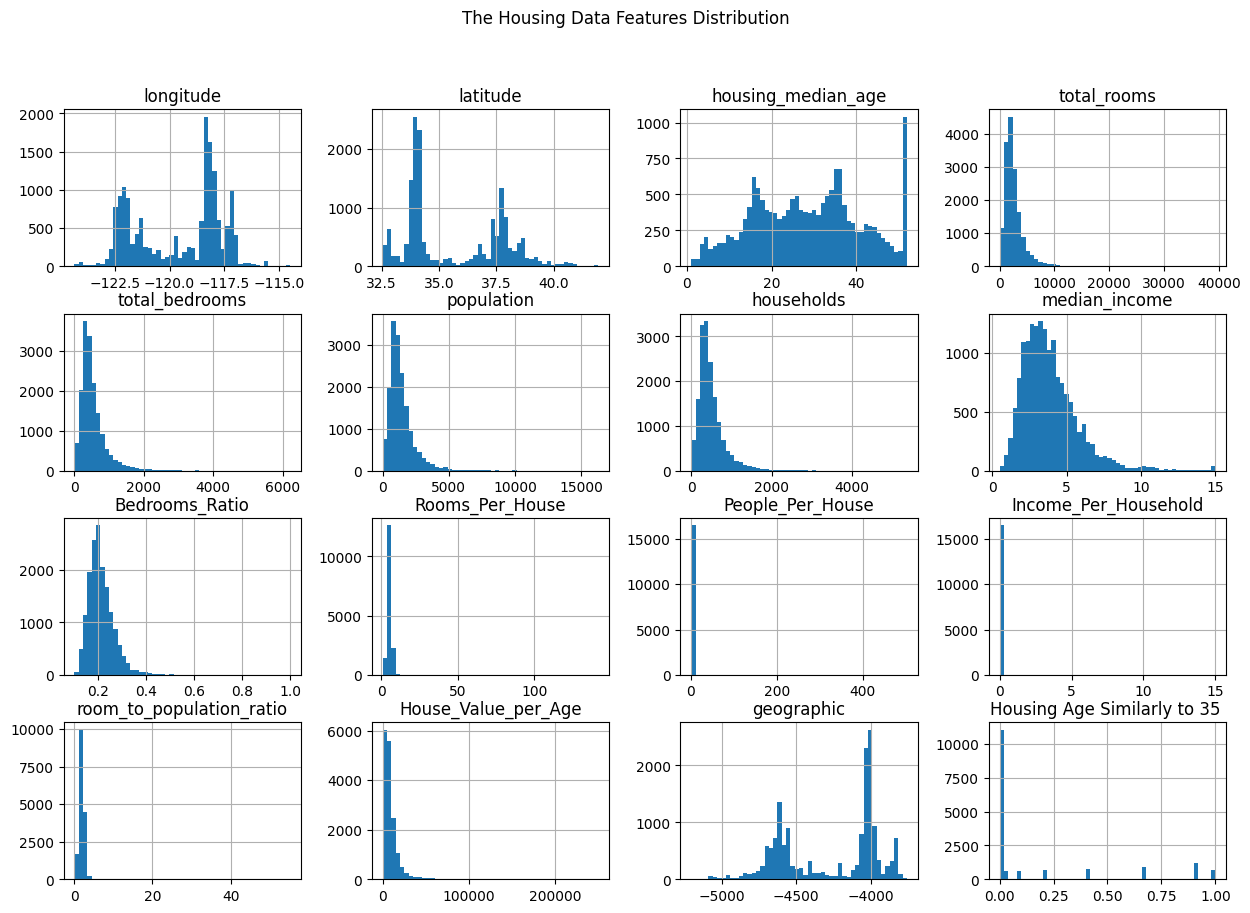

In [592]:
Train_Set.hist(bins = 50 , figsize=(15,10))
plt.grid(True)
plt.suptitle('The Housing Data Features Distribution')
plt.show()

# `Scalling Our Dataset`

* ### `Features Scalling`

In [593]:
Scaller_Features = StandardScaler()
Data_Scalled = Scaller_Features.fit_transform(Train_set)

In [594]:
X_train = pd.DataFrame(data=Data_Scalled , columns=Scaller_Features.get_feature_names_out() , index = Final_Train.index)
X_train

longitude  latitude  housing_median_age  geographic  \
13096  -1.423037  1.013606            1.861119   -1.120017   
14973   0.596394 -0.702103            0.907630    0.691919   
3785   -1.203098  1.276119            0.351428   -1.279808   
14689   1.231216 -0.884924           -0.919891    0.967214   
20507   0.711362 -0.875549            0.589800    0.851374   
...          ...       ...                 ...         ...   
14207   0.586397 -0.833359            0.987087    0.792318   
13105   0.131525  0.319822           -0.443146   -0.210507   
19301   1.256209 -1.428701           -1.237721    1.392311   
19121   0.586397 -0.739605            0.669257    0.719097   
19888  -1.418038  0.947978            1.225459   -1.065857   

       ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  \
13096                  -0.887356               -0.687633   
14973                   1.126944               -0.687633   
3785                   -0.887356                1.454264   
14689                  -0.887356                1.454264   
20507                  -0.887356               -0.687633   
...                          ...                     ...   
14207                   1.126944               -0.687633   
13105                  -0.887356                1.454264   
19301                  -0.887356               -0.687633   
19121                   1.126944               -0.687633   
19888                  -0.887356               -0.687633   

       ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
13096               -0.011006                  2.818642   
14973               -0.011006                 -0.354781   
3785                -0.011006                 -0.354781   
14689               -0.011006                 -0.354781   
20507               -0.011006                 -0.354781   
...                       ...                       ...   
14207               -0.011006                 -0.354781   
13105               -0.011006                 -0.354781   
19301               -0.011006                 -0.354781   
19121               -0.011006                 -0.354781   
19888               -0.011006                 -0.354781   

       ocean_proximity_NEAR OCEAN  QT_Total_rooms  ...  QT_population  \
13096                   -0.380576        0.763649  ...       0.519591   
14973                   -0.380576       -0.135345  ...      -0.938149   
3785                    -0.380576       -1.100810  ...      -1.167934   
14689                   -0.380576        1.120389  ...       0.781959   
20507                    2.627596        1.184903  ...       0.844127   
...                           ...             ...  ...            ...   
14207                   -0.380576        0.092005  ...      -0.381124   
13105                   -0.380576        0.557954  ...       0.334879   
19301                    2.627596        1.025970  ...       1.411828   
19121                   -0.380576        0.969866  ...       0.679031   
19888                    2.627596       -1.882742  ...      -0.903885   

       QT_households  Log_median_income  PT_Bedrooms_Ratio  QT_Room_Per_House  \
13096       1.482260          -1.078547           1.880140          -1.870798   
14973      -0.242235           1.231761          -0.546493           0.237836   
3785       -1.170166          -0.792464          -0.066391           0.083201   
14689       1.095143          -0.935308           0.010180           0.097200   
20507       1.647052          -0.018667           1.249822          -1.353730   
...              ...                ...                ...                ...   
14207       0.430009           0.628497           1.108470          -0.833886   
13105       0.458915          -0.680615          -0.052089           0.262794   
19301       1.056394           0.291670          -0.125790          -0.059069   
19121       1.199269           0.337576           0.539981          -0.611585   
19888      -1.111861          -0.174542           2.617905      

* ### `Target Scalling`

In [595]:
Target_Scaller = StandardScaler()
Labels_Scalled = Target_Scaller.fit_transform(Housing_Train_labels.to_frame())

In [596]:
Y_train = Labels_Scalled
Y_train

array([[ 2.18511202],
       [ 2.40625396],
       [-0.90740625],
       ...,
       [-0.49894408],
       [ 2.54675281],
       [ 0.23385961]])

# `Make the same processes in Test Set`

* ## `Data Engineering `

In [597]:
from sklearn.metrics.pairwise import rbf_kernel
array_Similar = test_set[["housing_median_age"]].values.reshape(-1, 1)
Age_Similar_to35 =rbf_kernel(array_Similar , [[35]] ,gamma = 0.1)
Age_Similar_to35 , Age_Similar_to35.shape

(array([[3.07487988e-09],
        [9.04837418e-01],
        [8.20849986e-02],
        ...,
        [6.70320046e-01],
        [5.55951324e-06],
        [2.81118530e-13]]),
 (4128, 1))

In [598]:
test_set['Bedrooms_Ratio'] = test_set['total_bedrooms'] / test_set['total_rooms']
test_set['Rooms_Per_House'] = test_set['total_rooms'] / test_set['households']
test_set['People_Per_House'] = test_set['population'] / test_set['households']
test_set["Income_Per_Household"] = test_set['median_income'] / test_set['households']
test_set['room_to_population_ratio'] = test_set['total_rooms'] / test_set['population']
test_set['House_Value_per_Age'] = test_set['median_house_value'] / test_set['housing_median_age']
test_set["geographic"] = test_set['longitude'] * test_set['latitude']
test_set['Housing Age Similarly to 35 '] = Age_Similar_to35

In [599]:
test = test_set.drop('median_house_value' , axis=1)
test_labels = test_set['median_house_value']
test.shape , test_labels.shape

((4128, 17), (4128,))

In [600]:
test_set.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'Bedrooms_Ratio',
       'Rooms_Per_House', 'People_Per_House', 'Income_Per_Household',
       'room_to_population_ratio', 'House_Value_per_Age', 'geographic',
       'Housing Age Similarly to 35 '],
      dtype='object')

* ## `Dealing with missing values`

In [601]:
cat_features = test.select_dtypes(include=np.number)
imp = Imputer.transform(cat_features)
Final_test= pd.DataFrame(imp , columns=Imputer.get_feature_names_out() ,index=test_set.index)
Final_test.head(5)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
3905     -121.95     37.11                21.0       2387.0           357.0   
16821    -118.01     33.89                36.0       1589.0           265.0   
2900     -118.18     33.74                30.0       5915.0          1750.0   
7193     -122.48     37.74                52.0       2166.0           423.0   
13928    -122.39     37.78                 5.0       1405.0           515.0   

       population  households  median_income  Bedrooms_Ratio  Rooms_Per_House  \
3905        913.0       341.0         7.7360        0.149560         7.000000   
16821       804.0       272.0         4.6354        0.166772         5.841912   
2900       2136.0      1503.0         4.0968        0.295858         3.935462   
7193       1072.0       370.0         4.1310        0.195291         5.854054   
13928       725.0       392.0         3.6037        0.366548         3.584184   

       People_Per_House  Income_Per_Household  room_to_population_ratio  \
3905           2.677419              0.022686                  2.614458   
16821          2.955882              0.017042                  1.976368   
2900           1.421158              0.002726                  2.769195   
7193           2.897297              0.011165                  2.020522   
13928          1.849490              0.009193                  1.937931   

       House_Value_per_Age  geographic  Housing Age Similarly to 35   
3905          18938.095238  -4525.5645                  3.074880e-09  
16821          5636.111111  -3999.3589                  9.048374e-01  
2900          10333.333333  -3987.3932                  8.208500e-02  
7193           6044.230769  -4622.3952                  2.811185e-13  
13928         37500.000000  -4623.8942                  8.194013e-40

In [602]:
Final_test['ocean_proximity'] = test['ocean_proximity']

## `Checking and treating the skweness`

Skewness for longitude is Negligible.
latitude
 Square Root


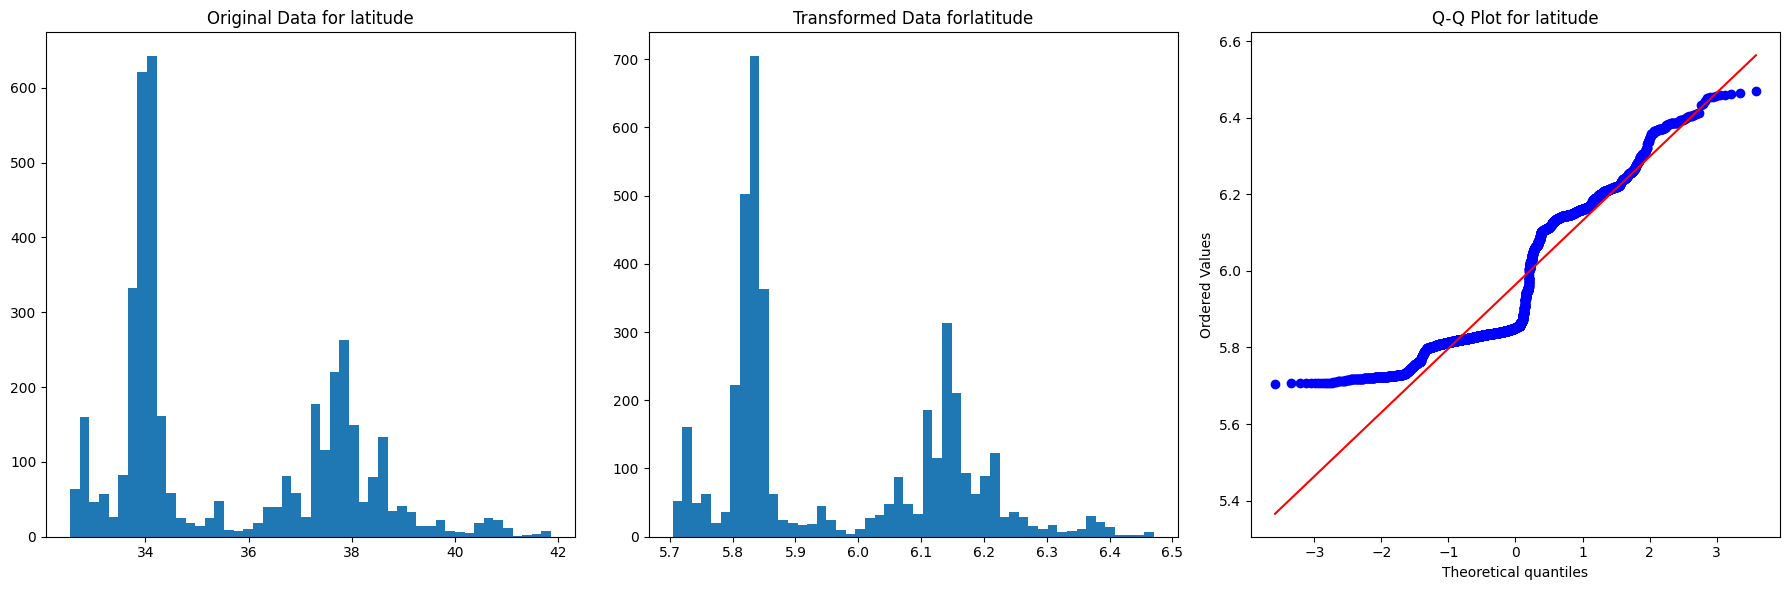

latitude
log


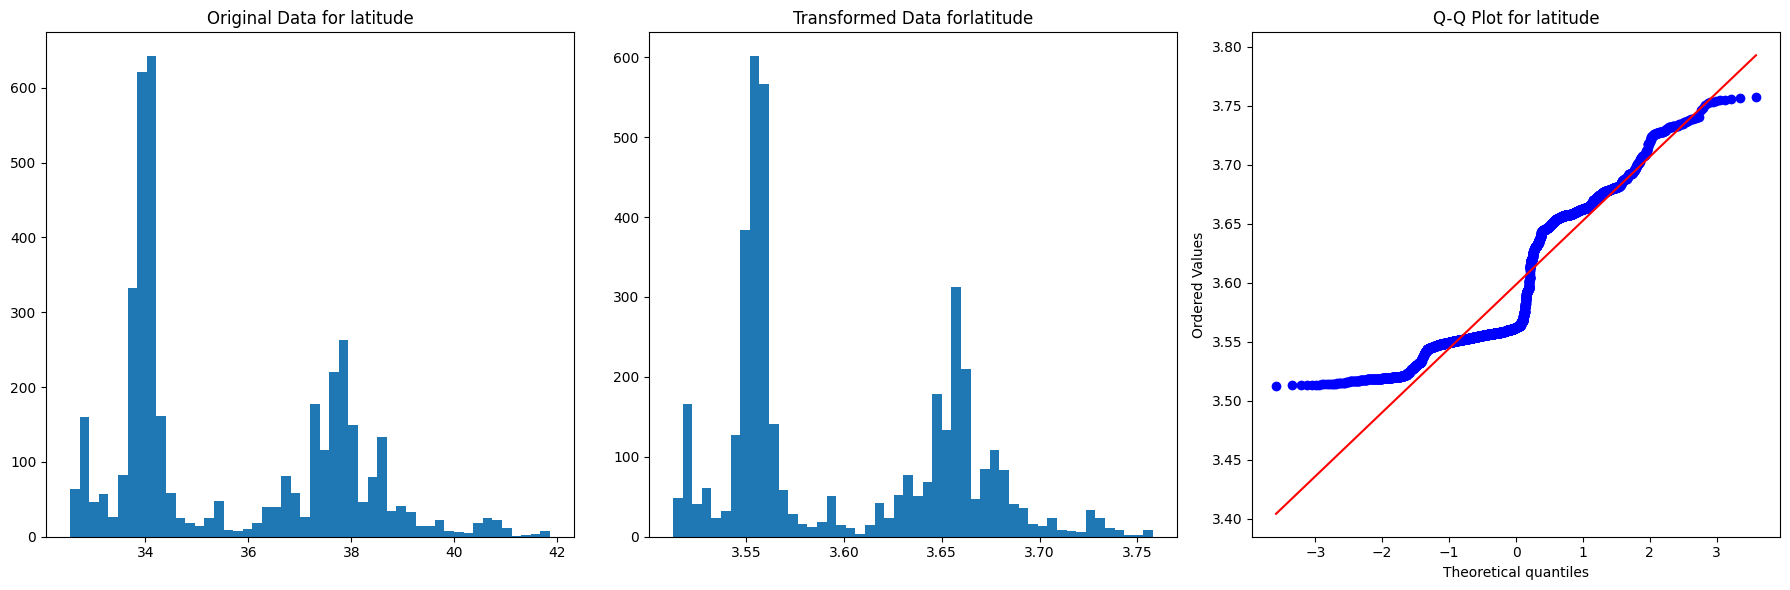

Skewness for housing_median_age is Negligible.
total_rooms
log


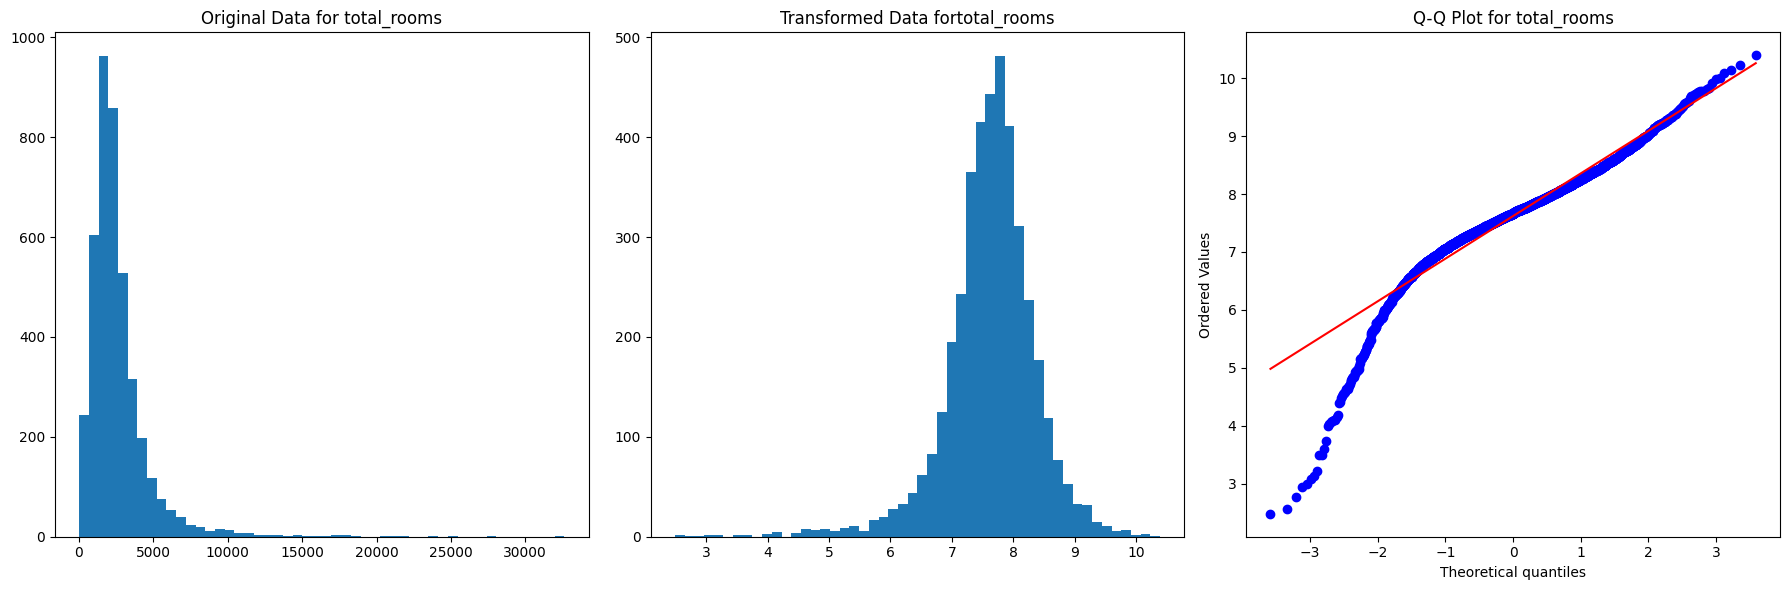

total_rooms
BoxCox


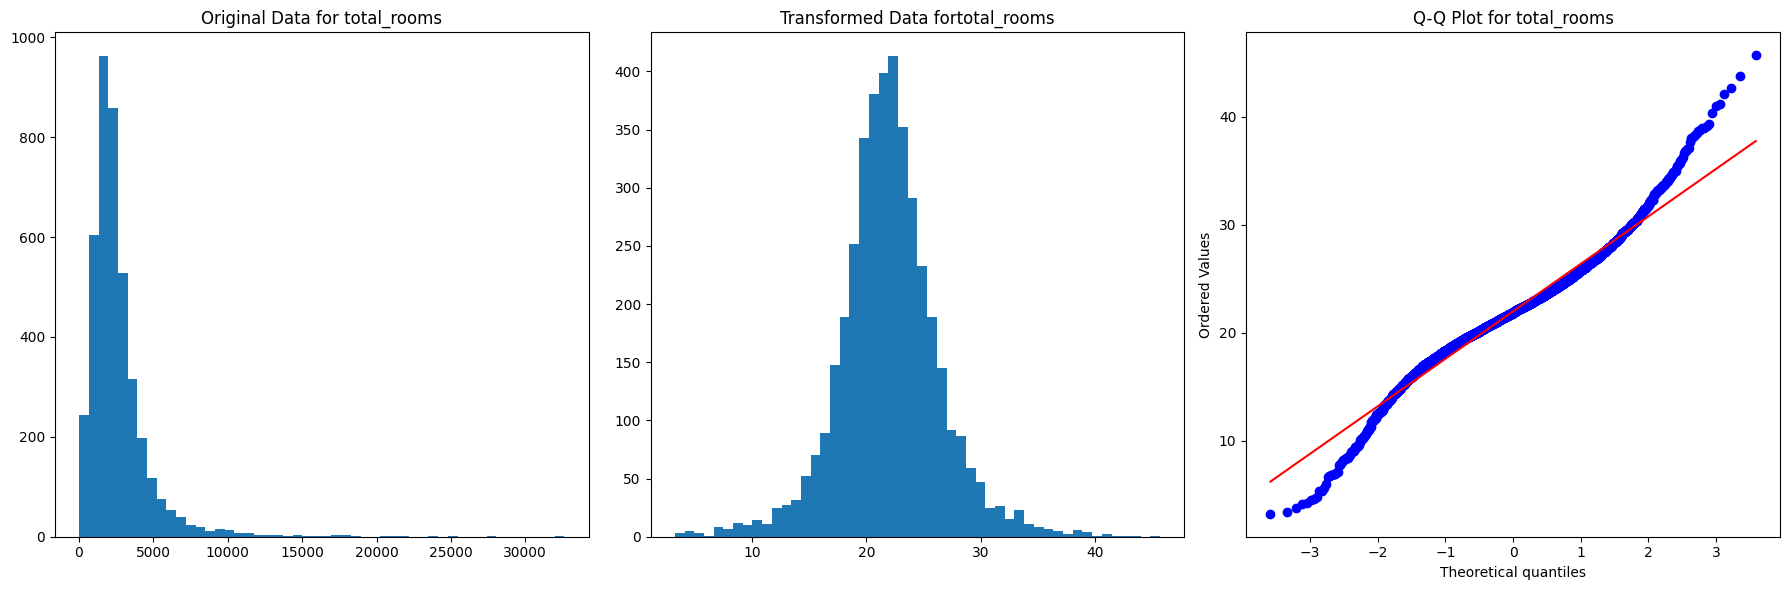

total_rooms
Power Transformer


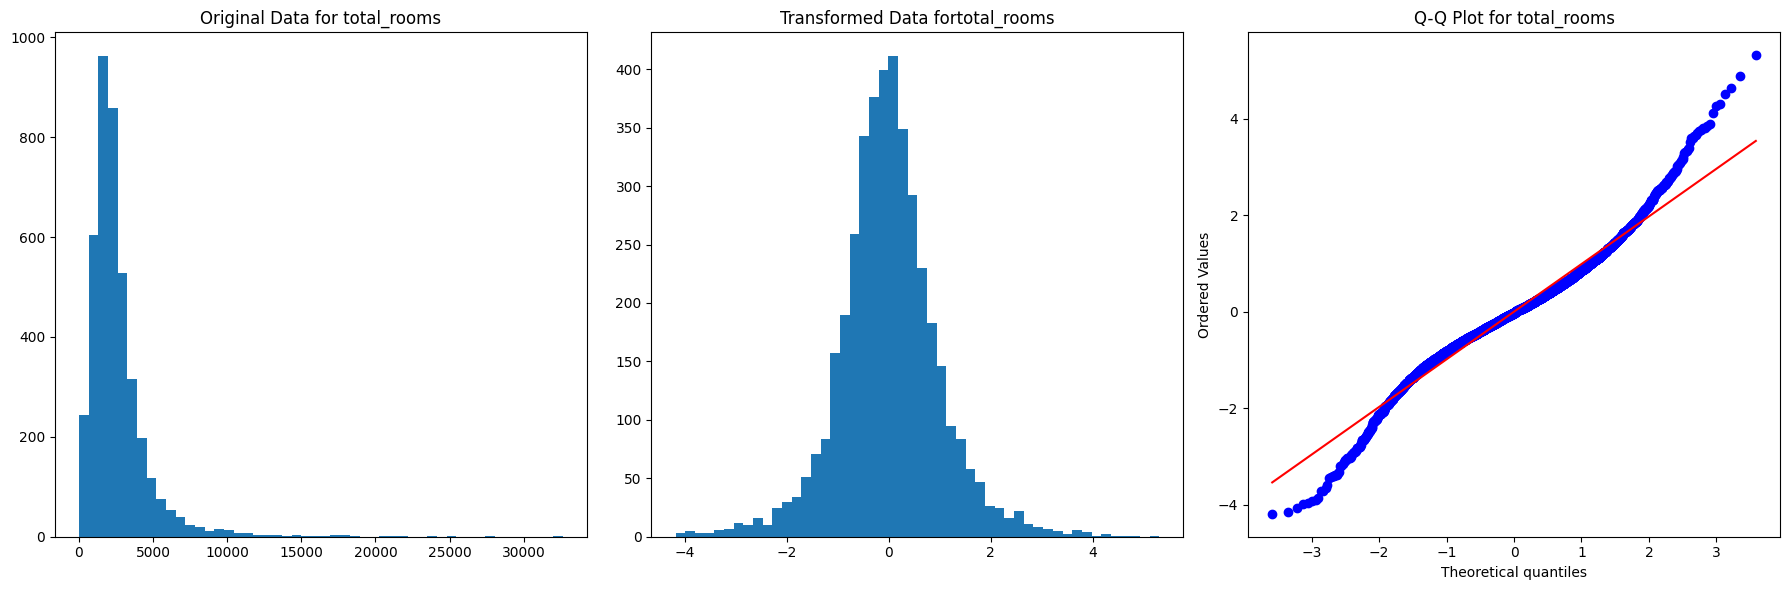

total_rooms
Quantile Transformer


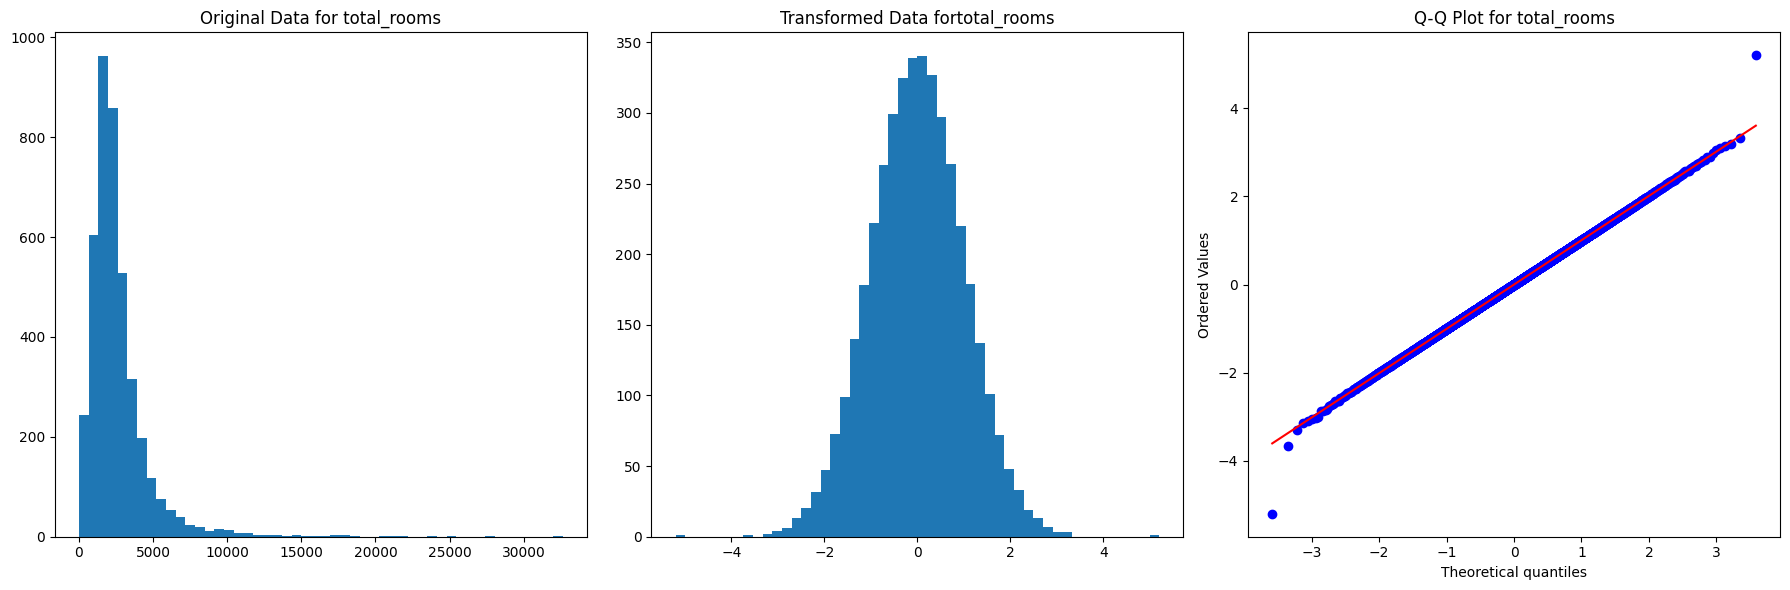

total_bedrooms
log


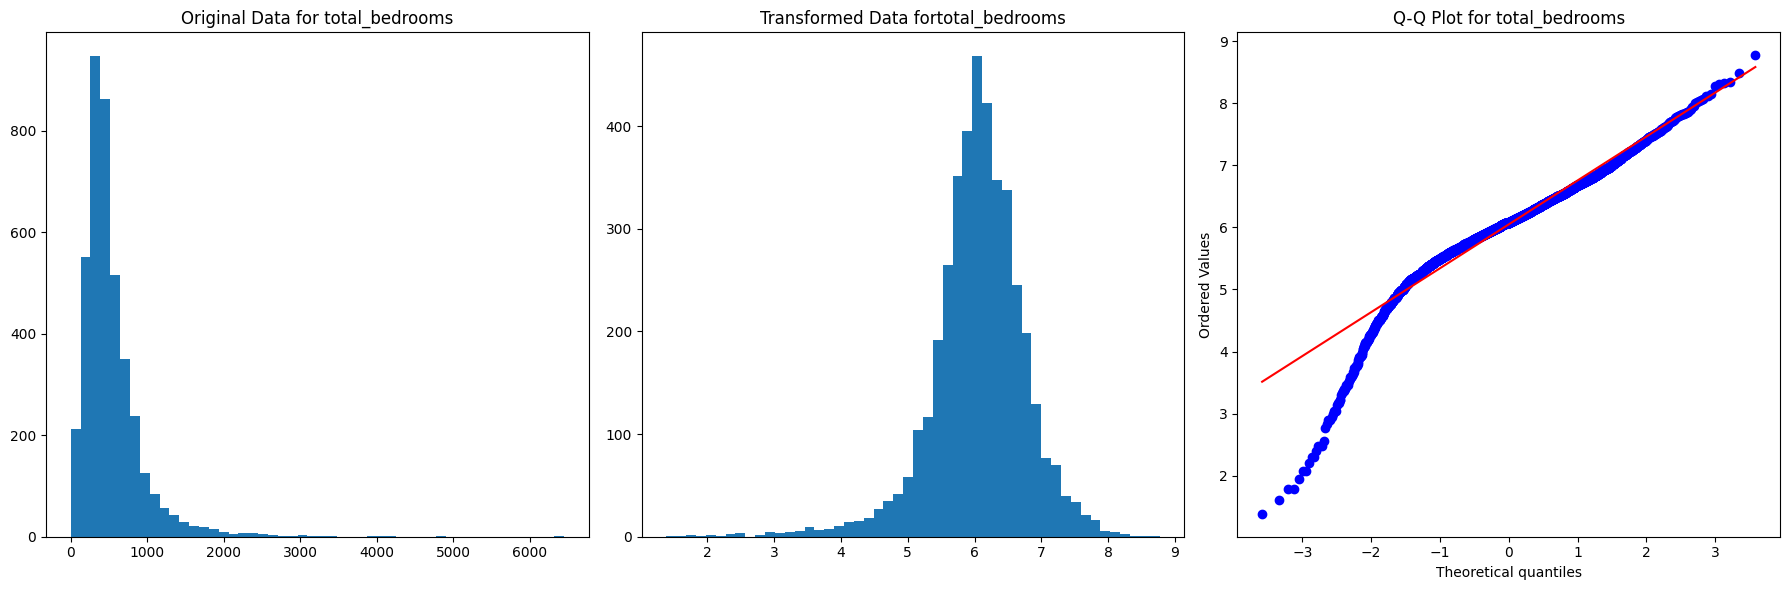

total_bedrooms
BoxCox


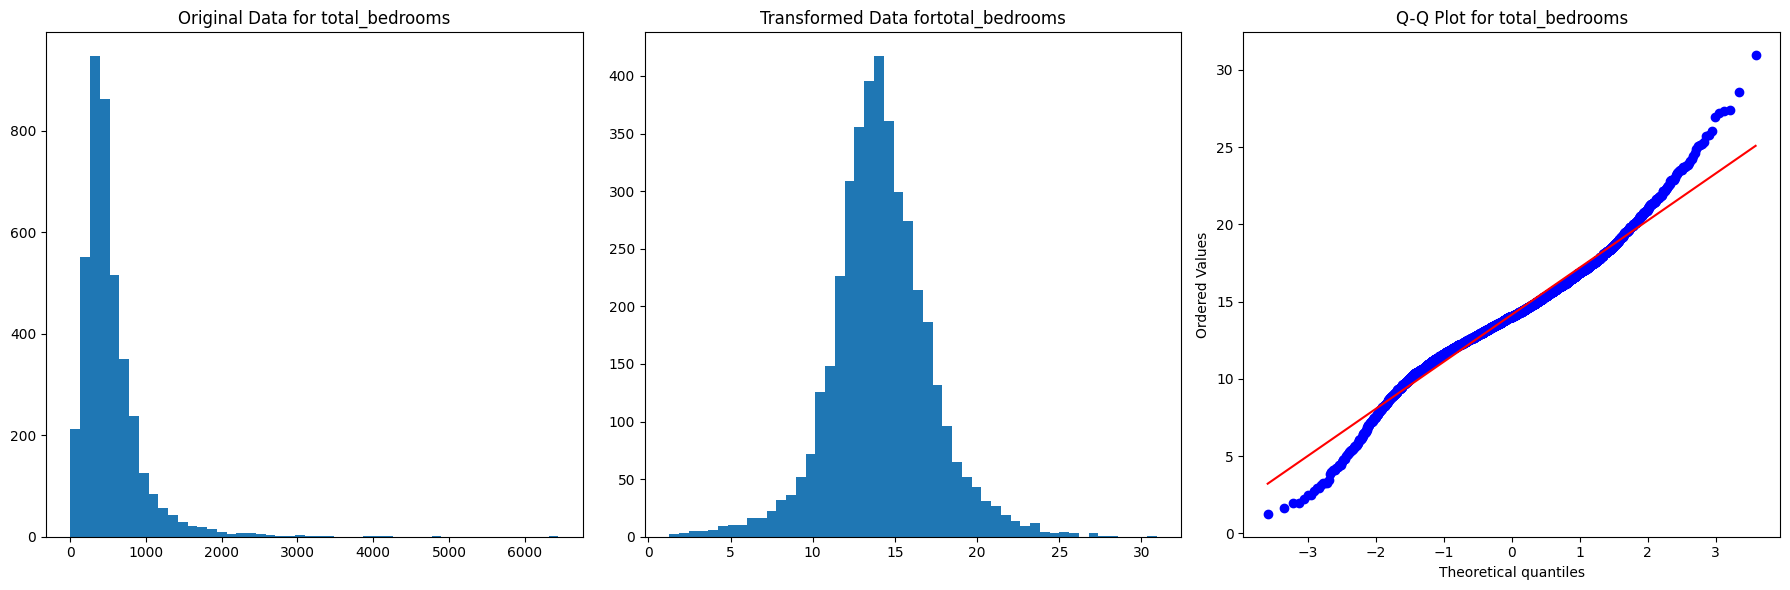

total_bedrooms
Power Transformer


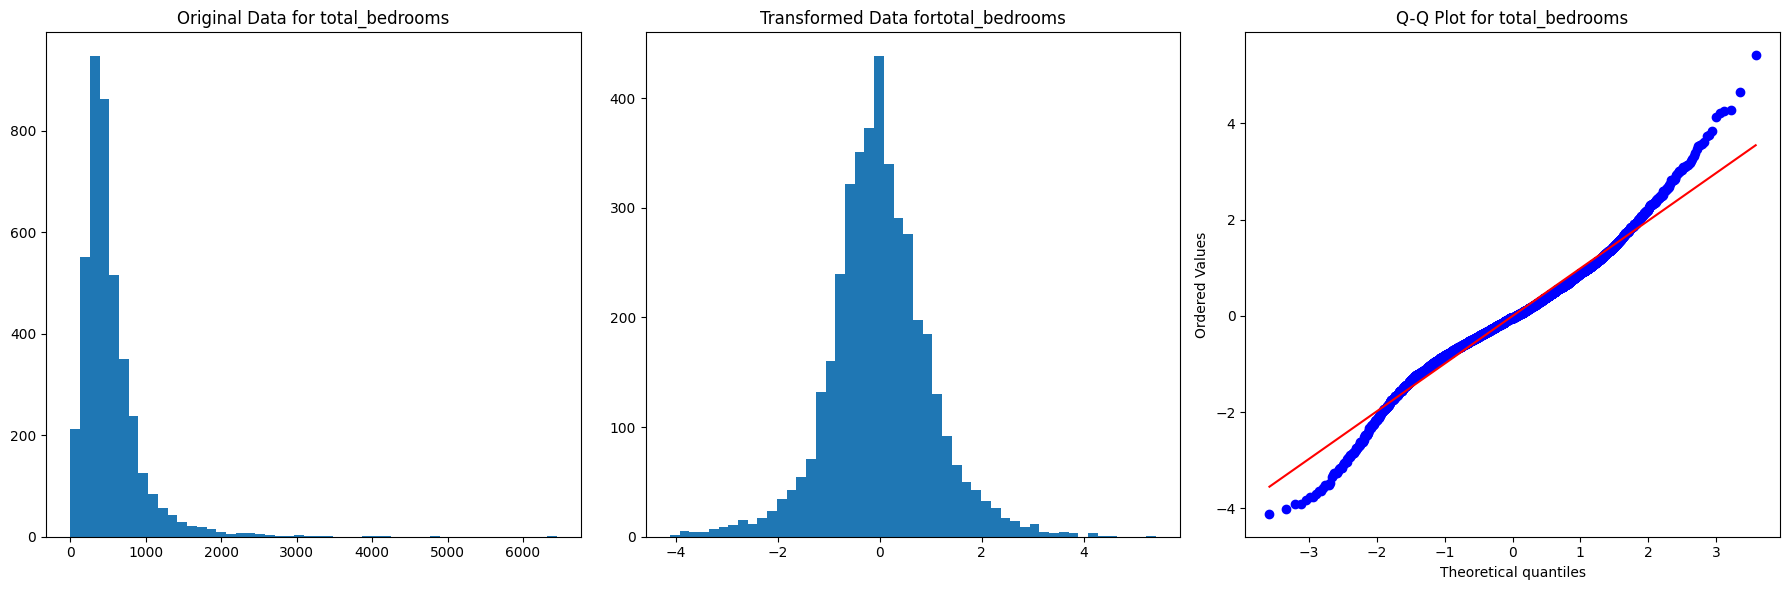

total_bedrooms
Quantile Transformer


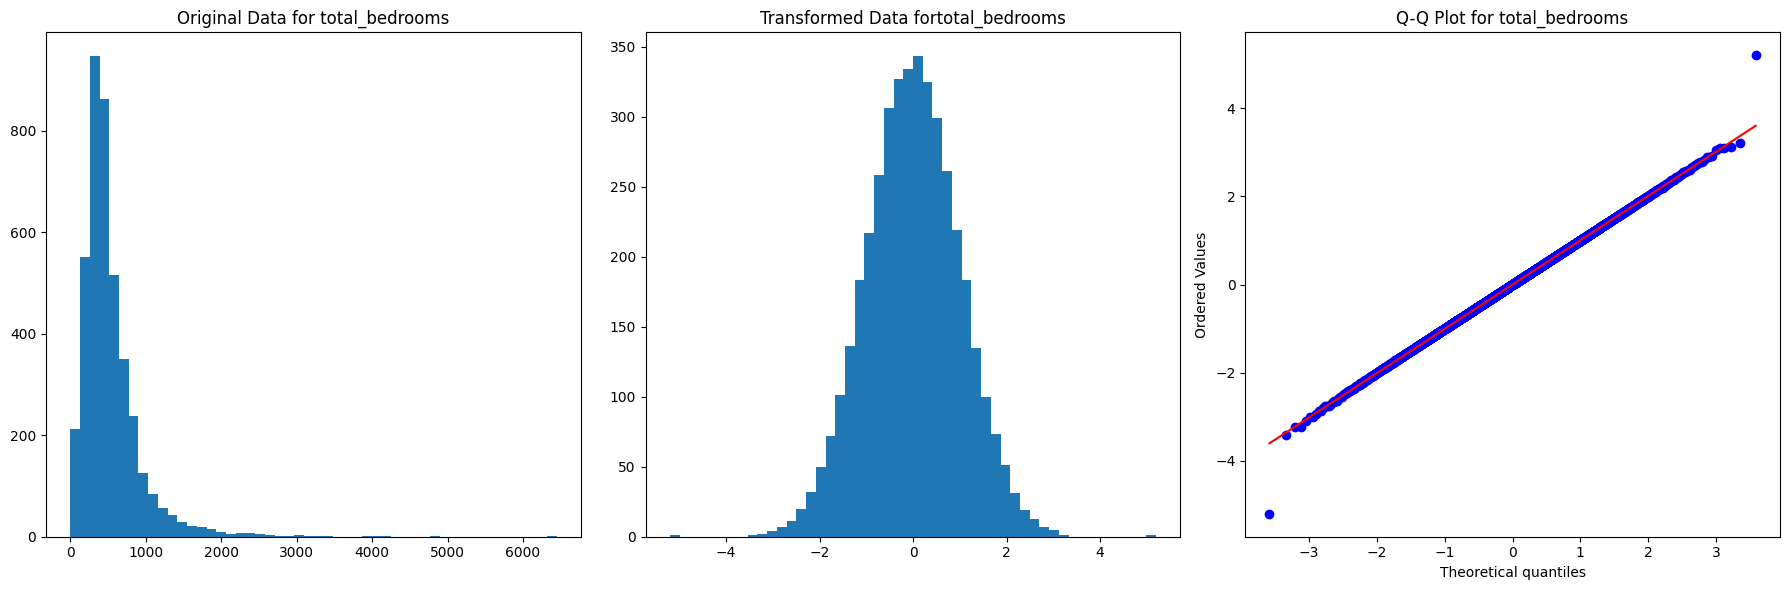

population
log


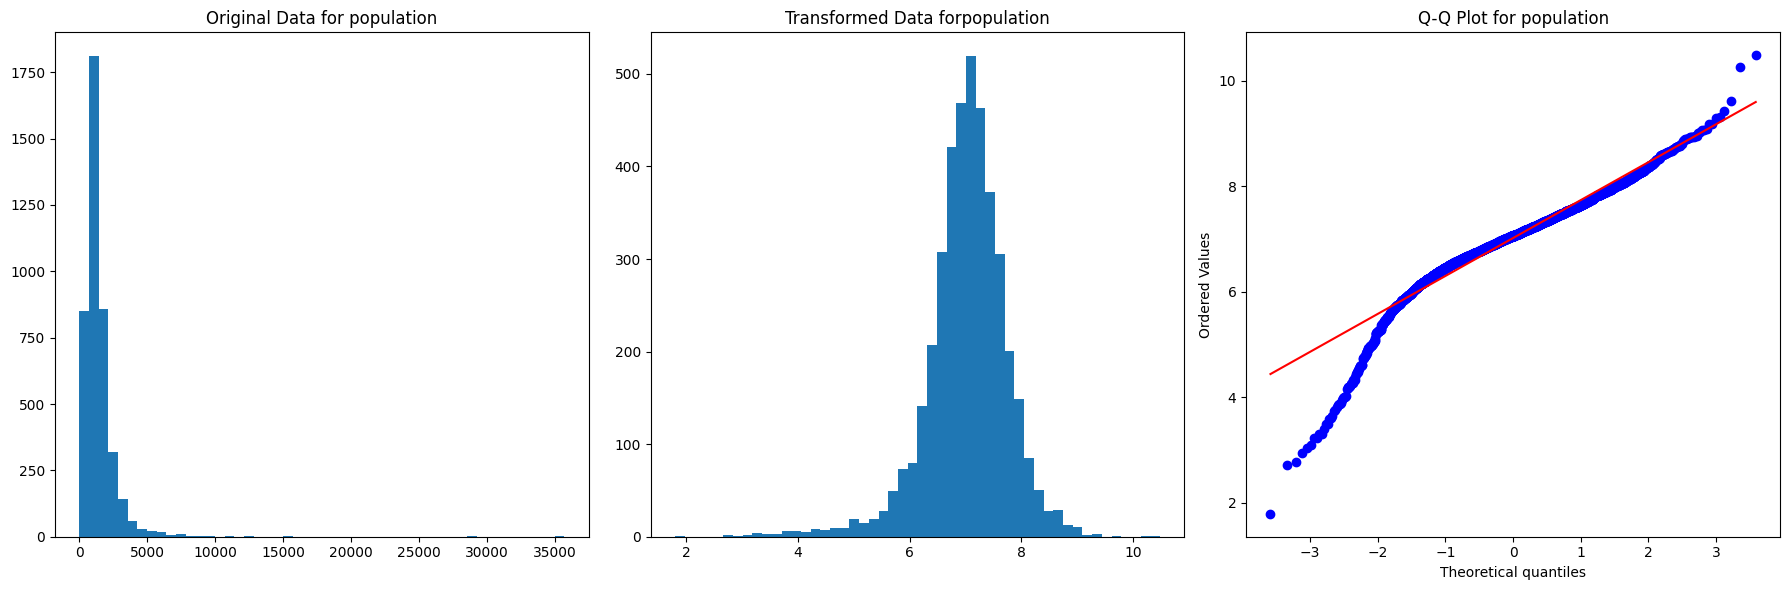

population
BoxCox


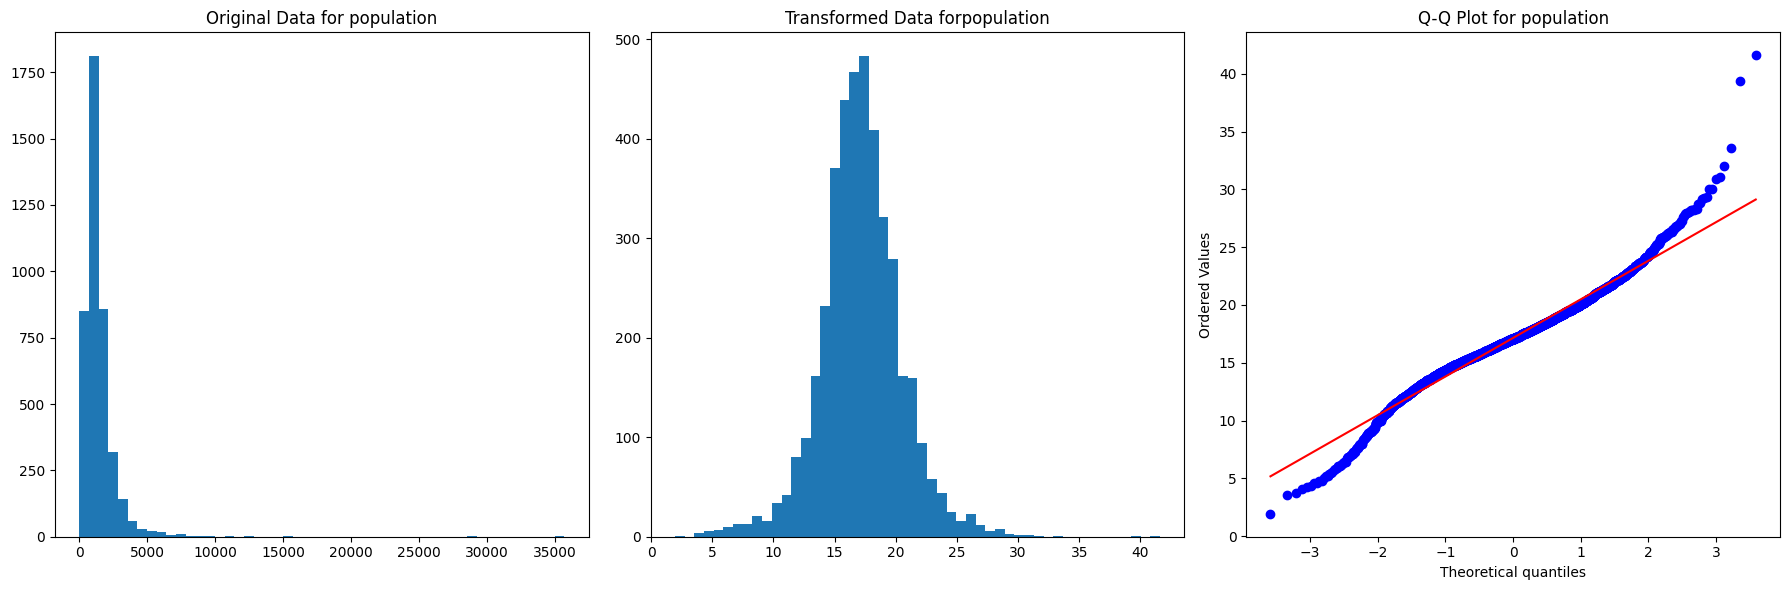

population
Power Transformer


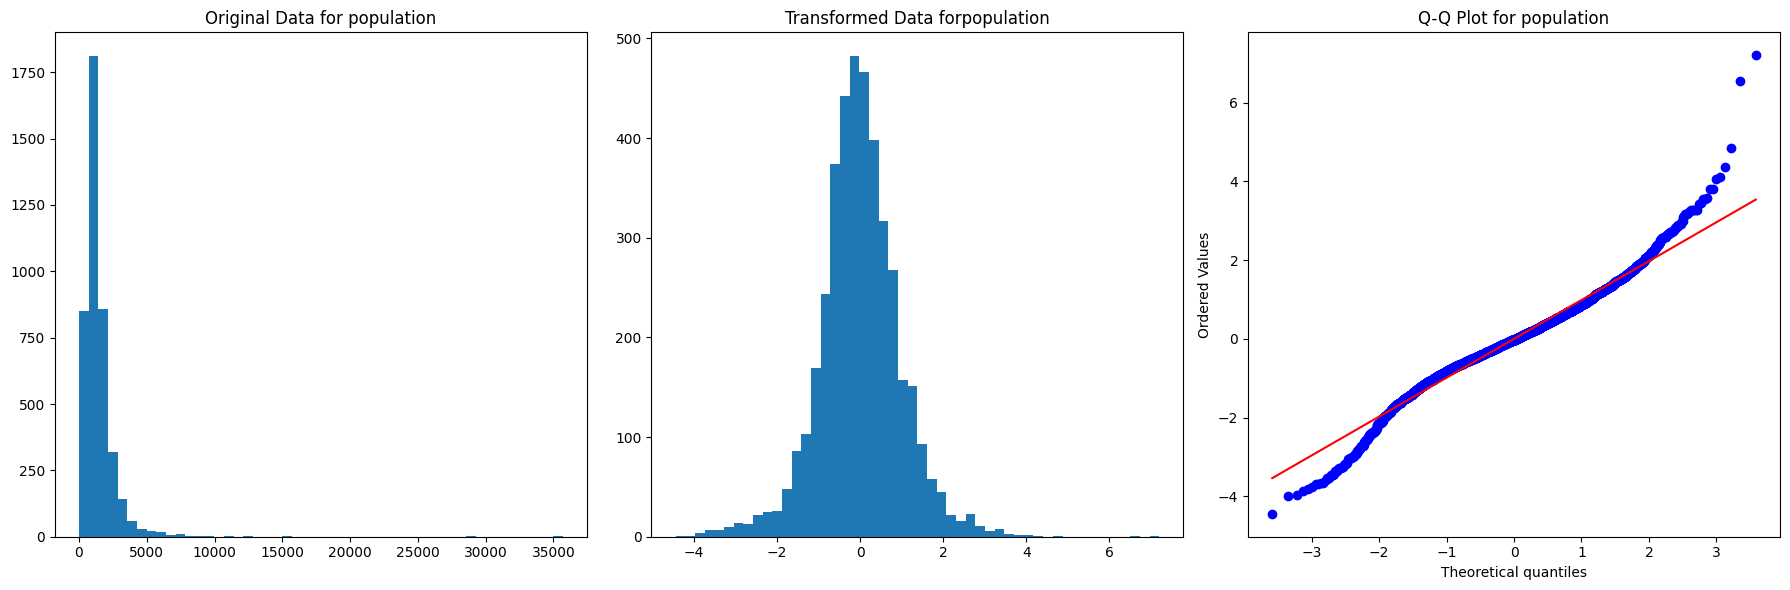

population
Quantile Transformer


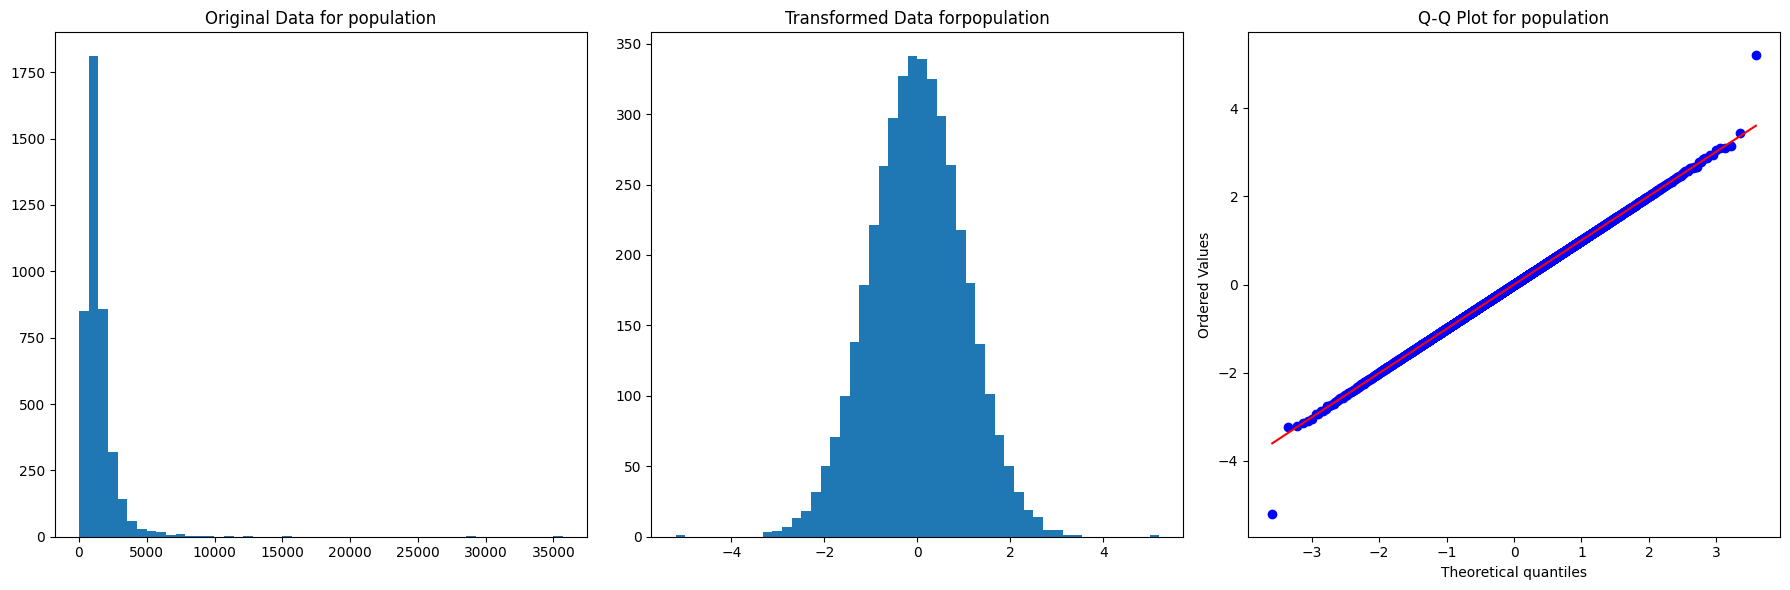

households
log


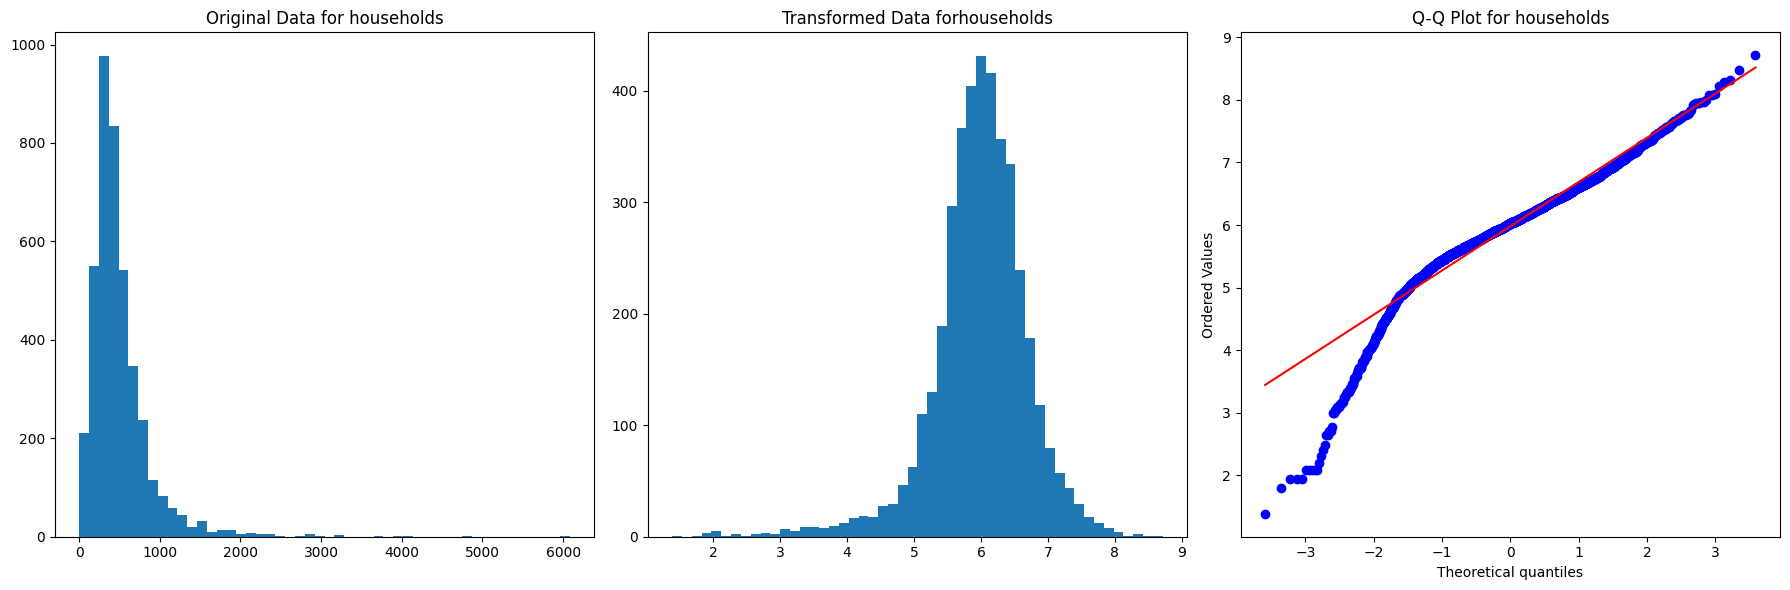

households
BoxCox


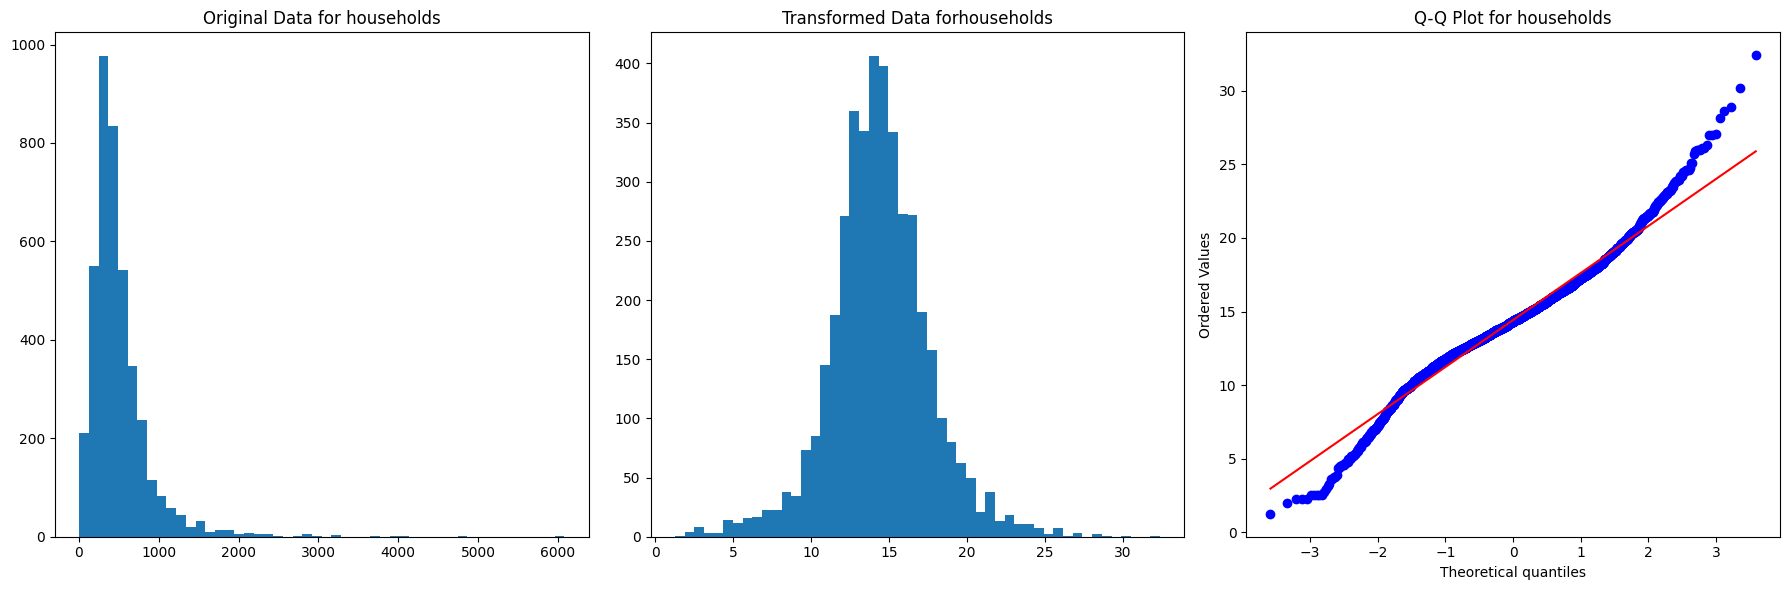

households
Power Transformer


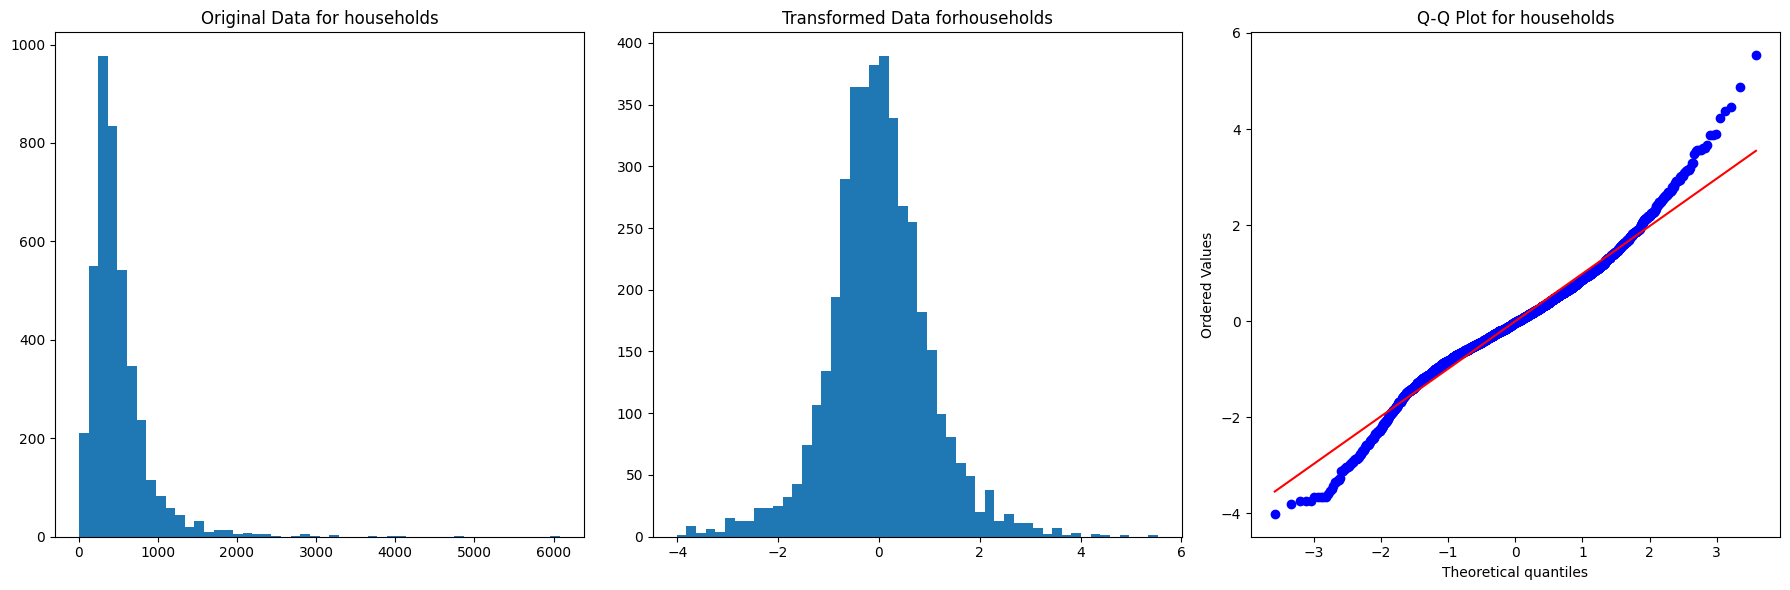

households
Quantile Transformer


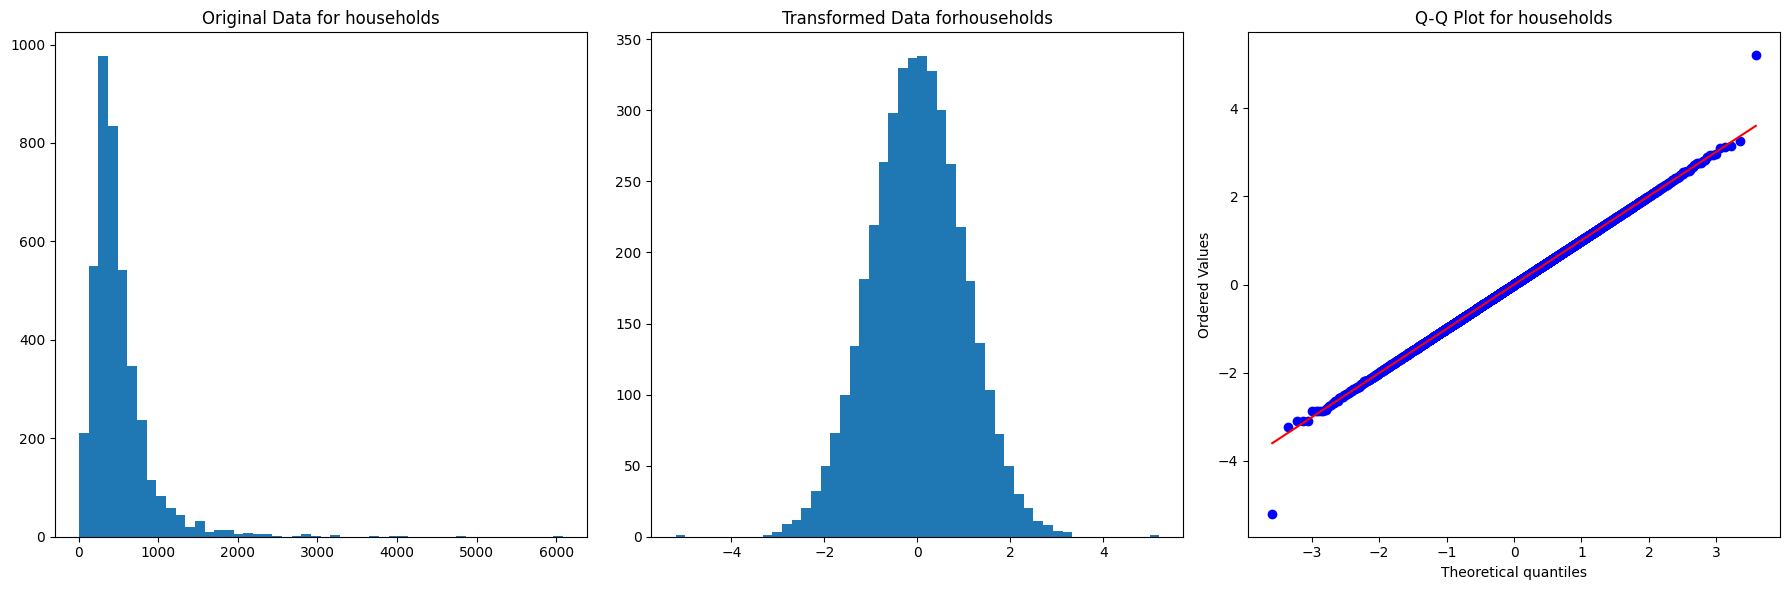

median_income
log


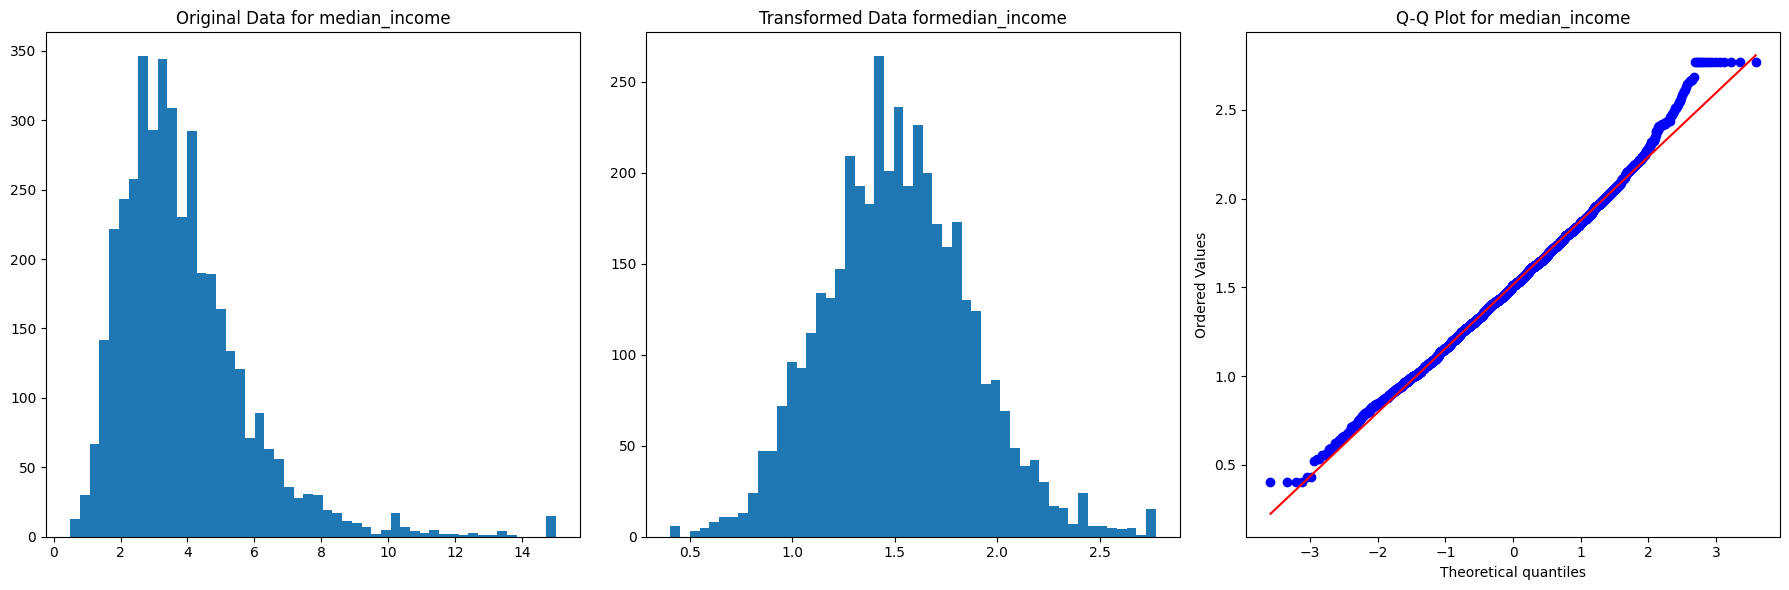

median_income
Reciprocal


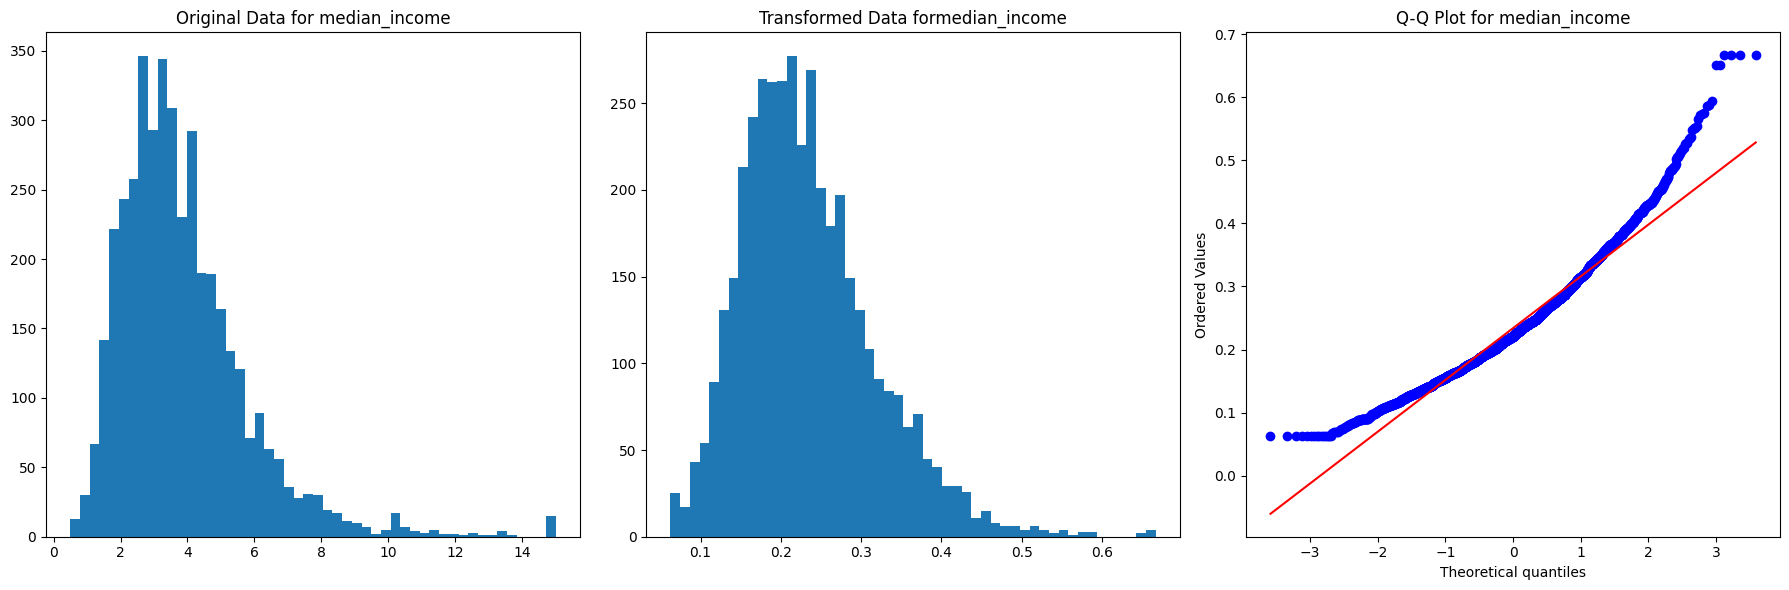

Bedrooms_Ratio
log


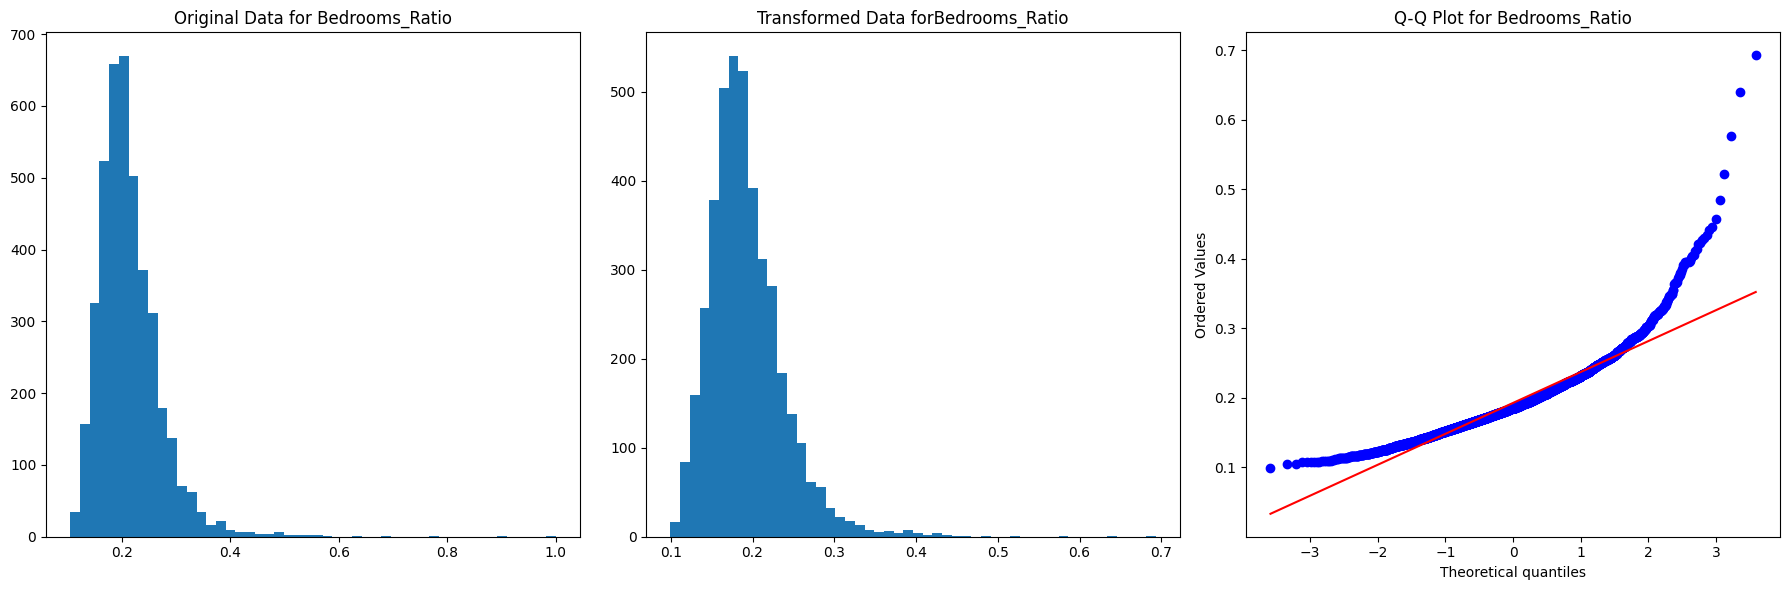

Bedrooms_Ratio
BoxCox


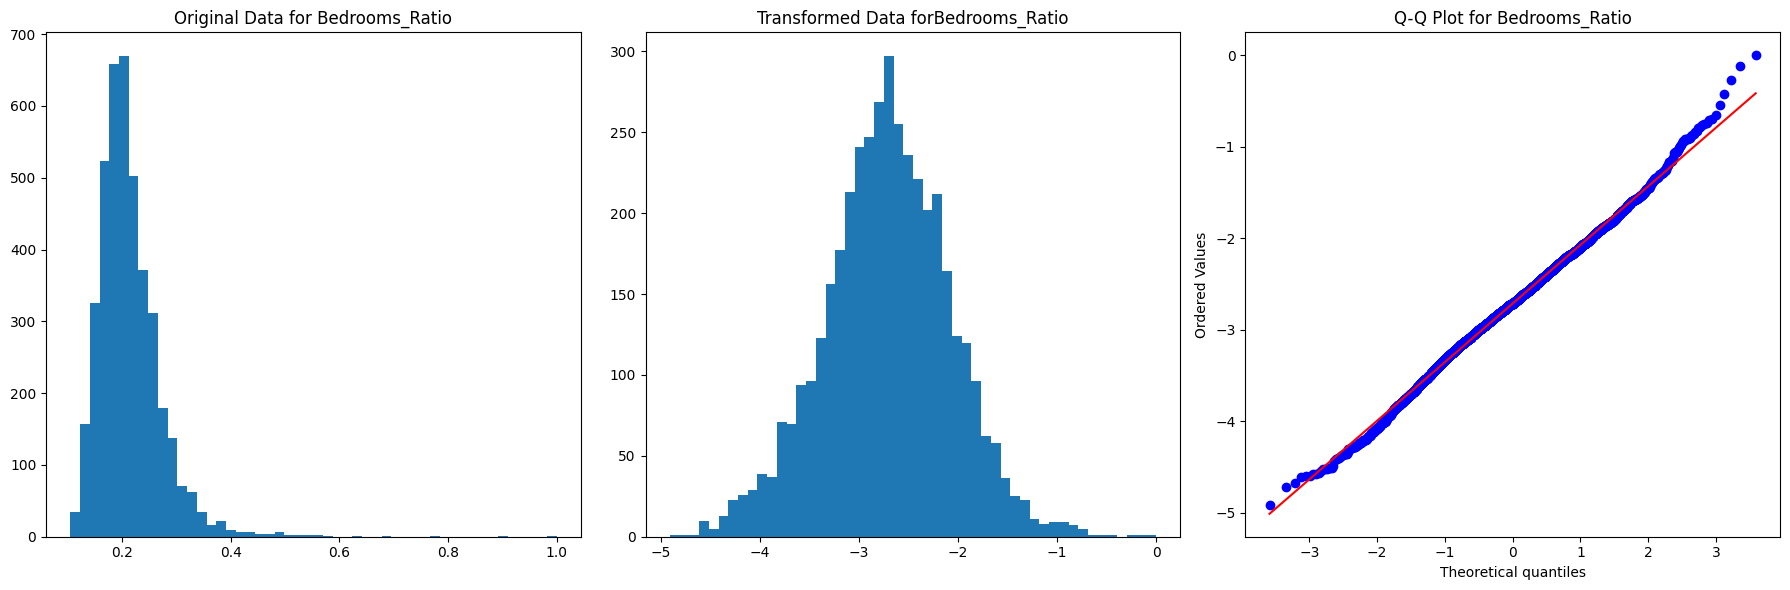

Bedrooms_Ratio
Power Transformer


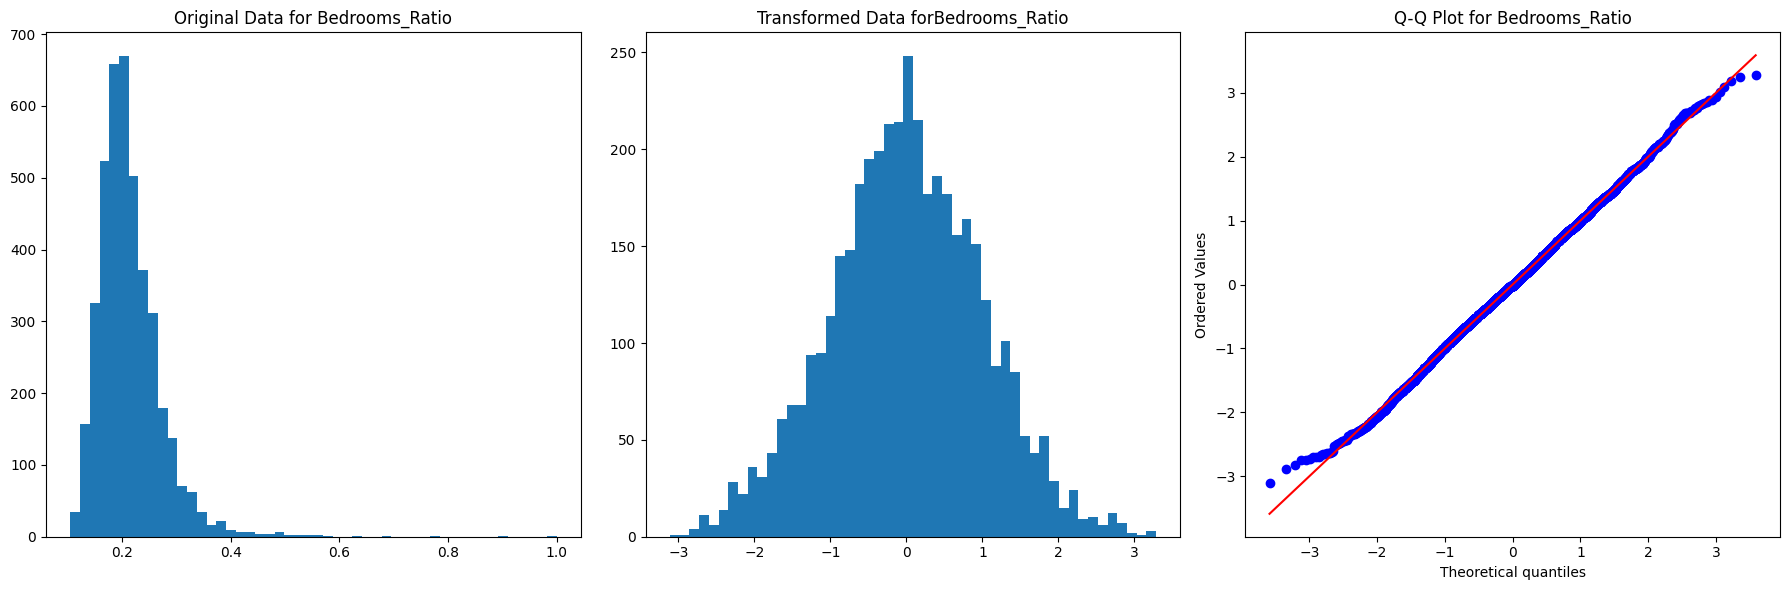

Bedrooms_Ratio
Quantile Transformer


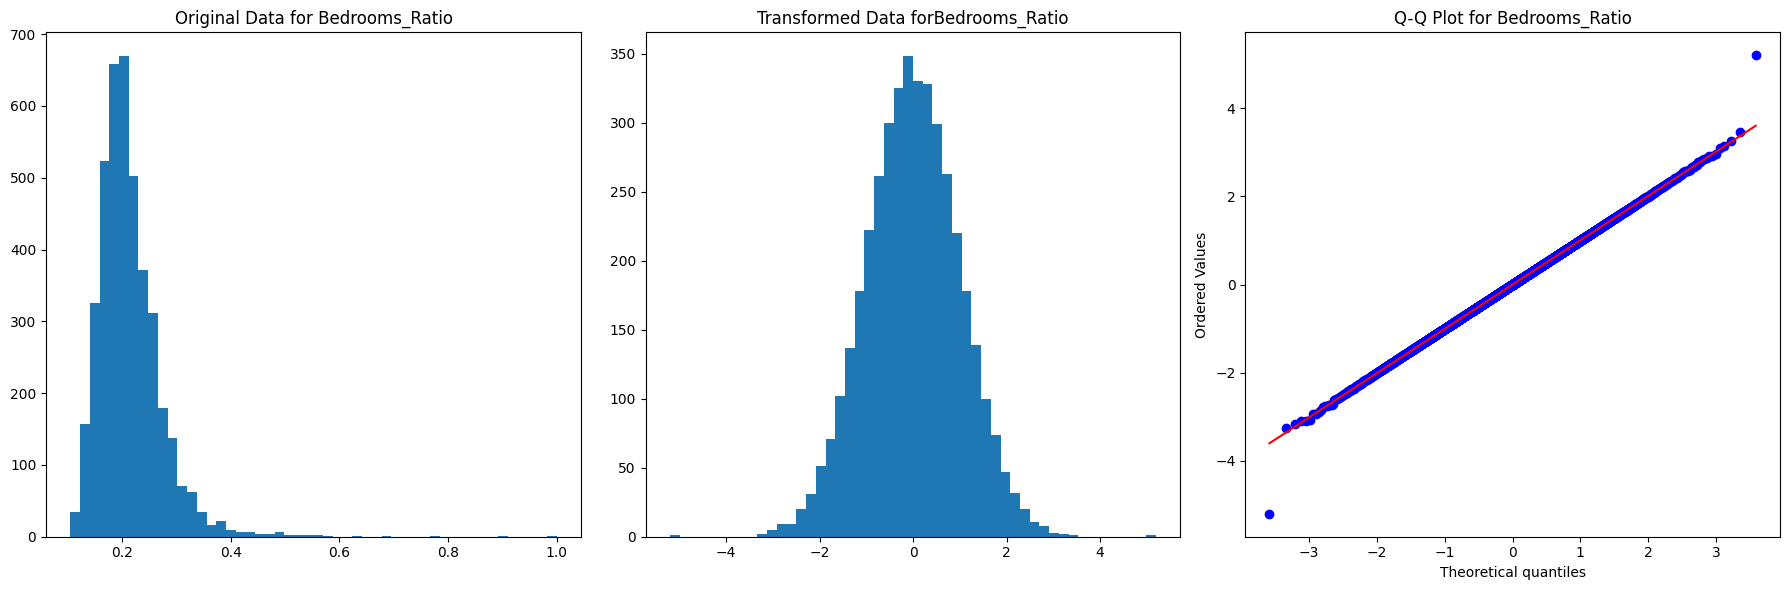

Rooms_Per_House
log


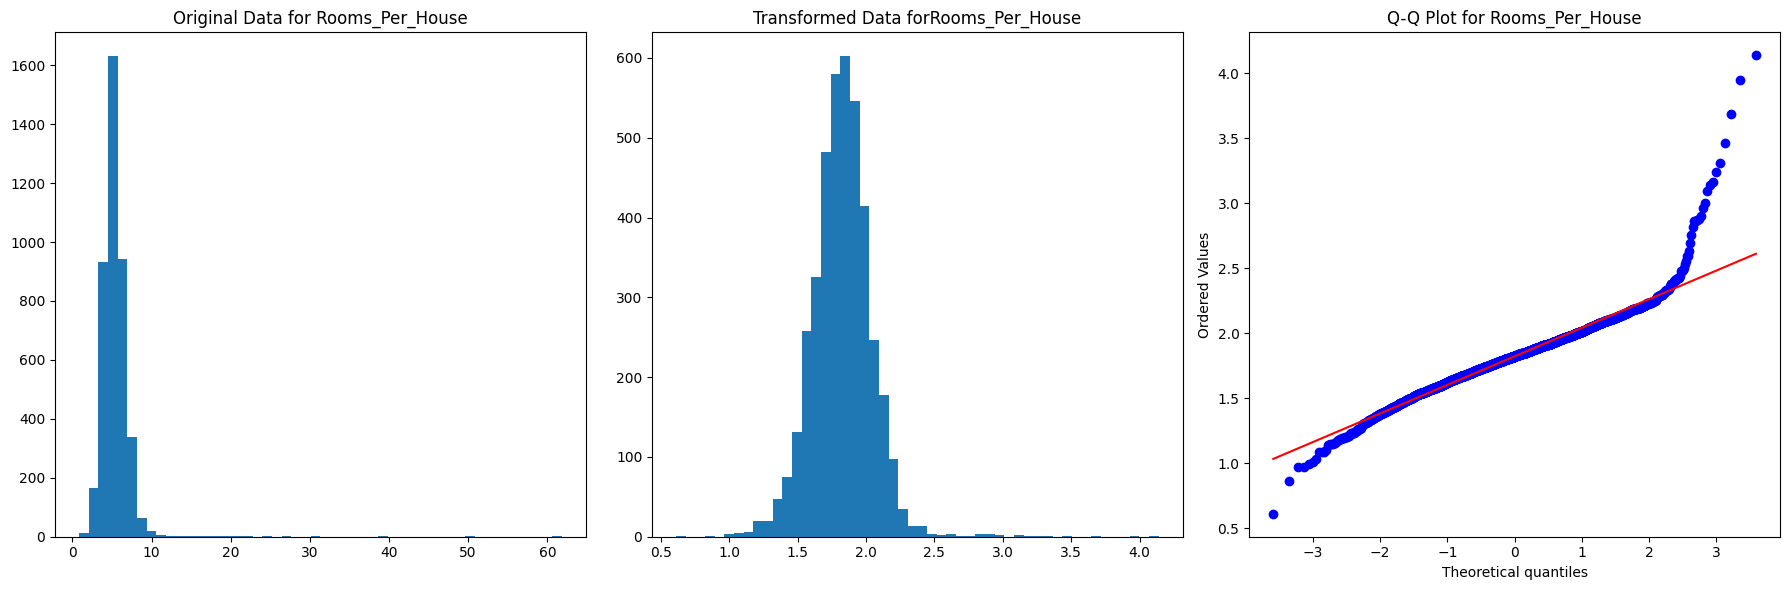

Rooms_Per_House
BoxCox


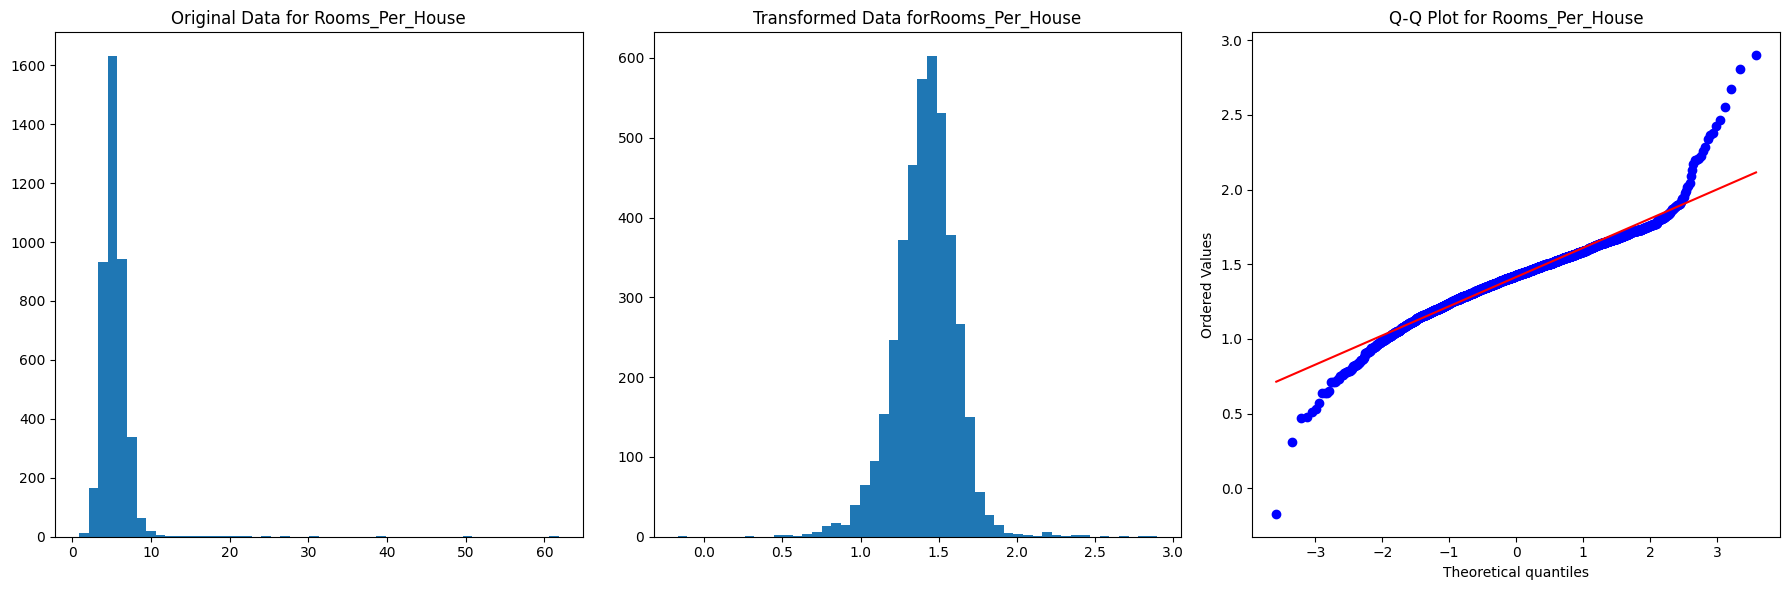

Rooms_Per_House
Power Transformer


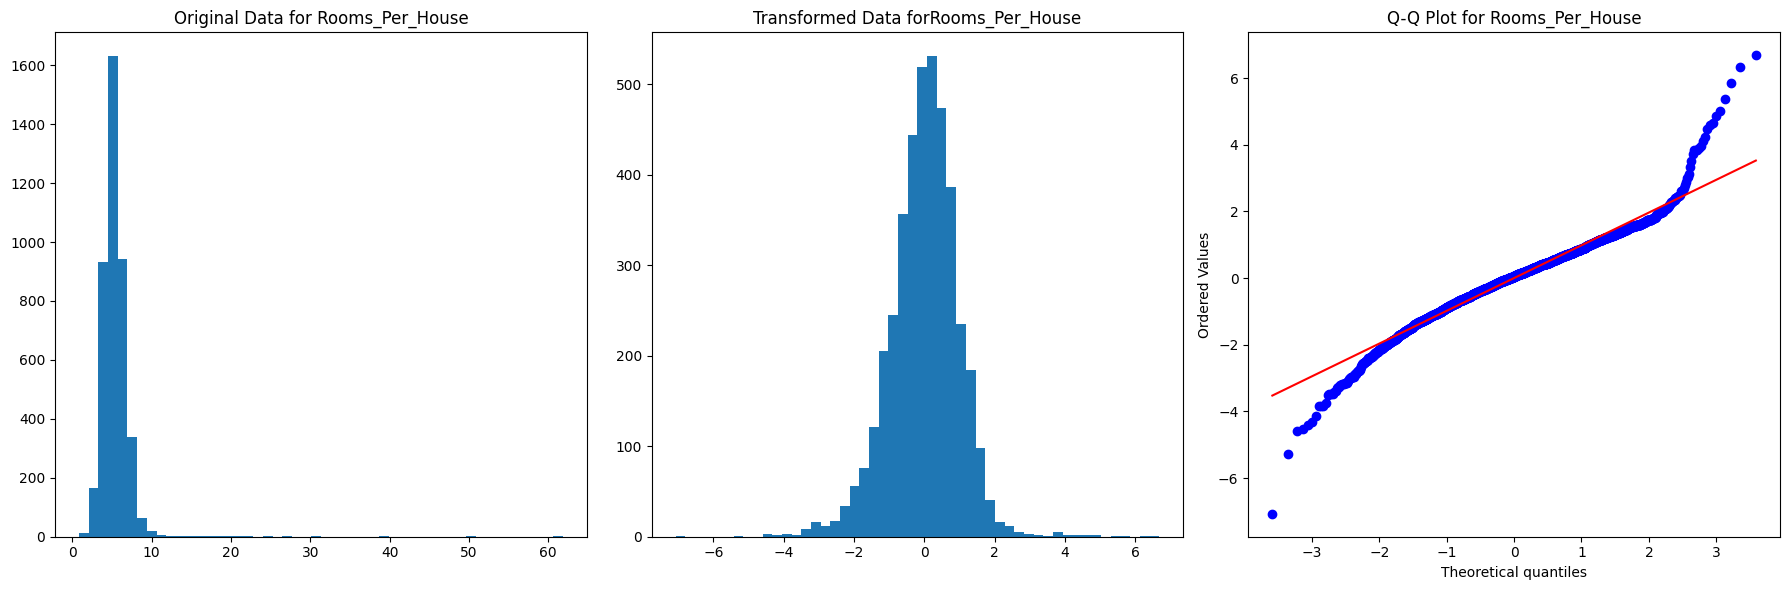

Rooms_Per_House
Quantile Transformer


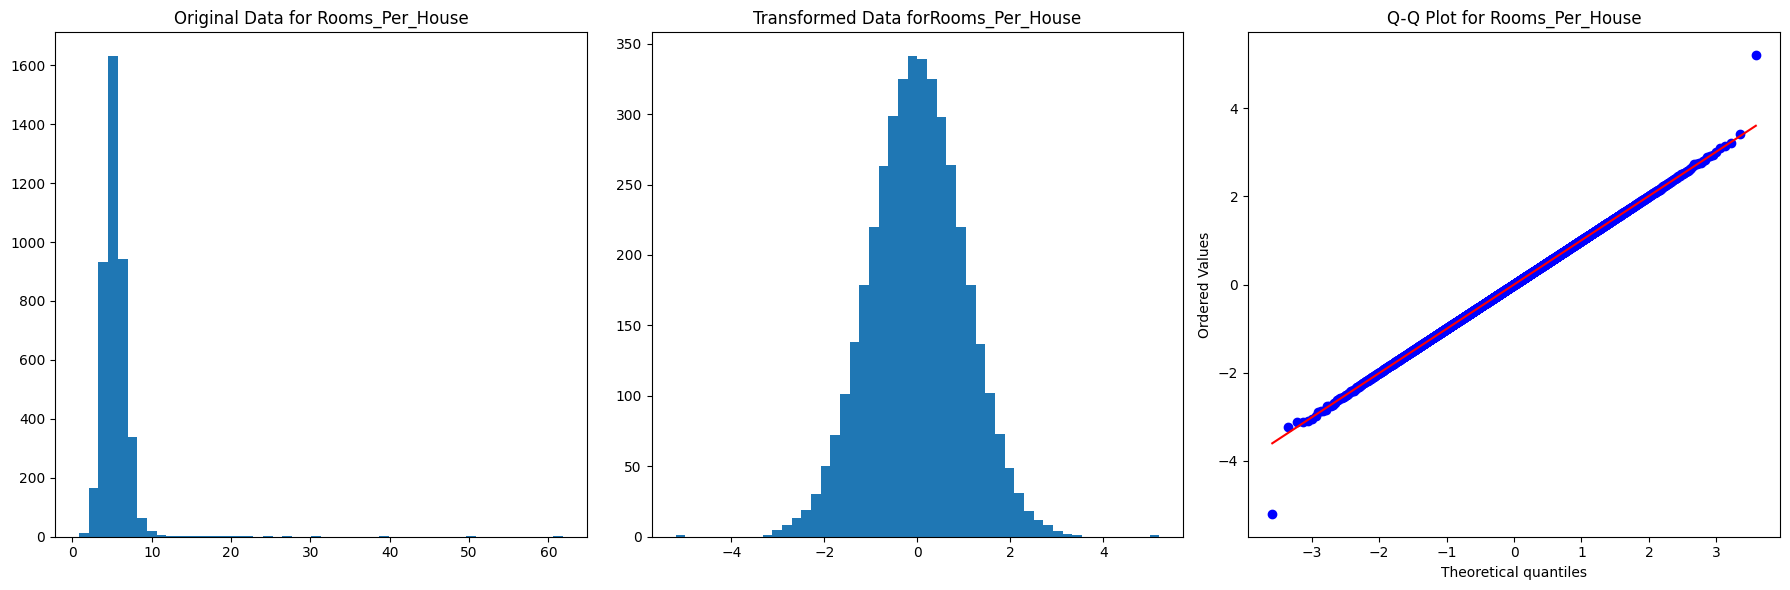

People_Per_House
log


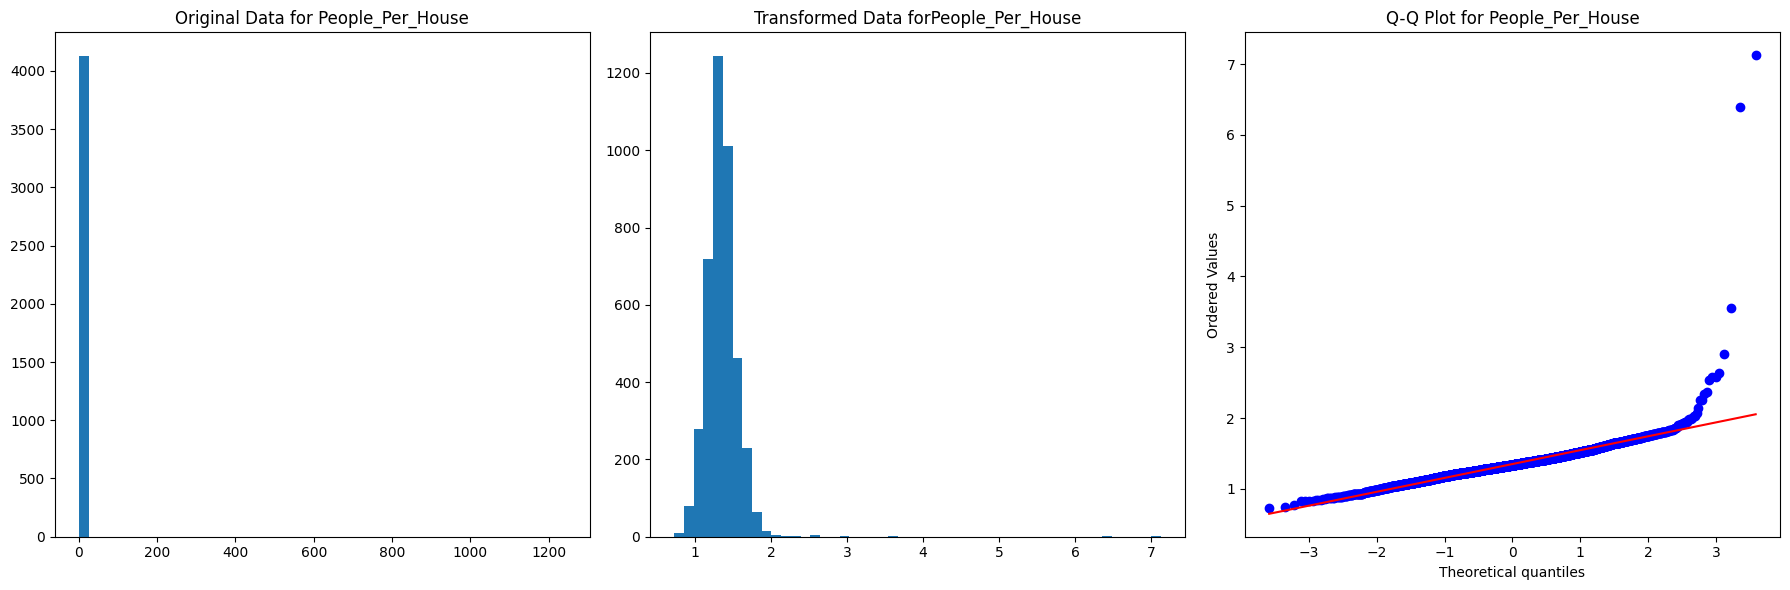

People_Per_House
BoxCox


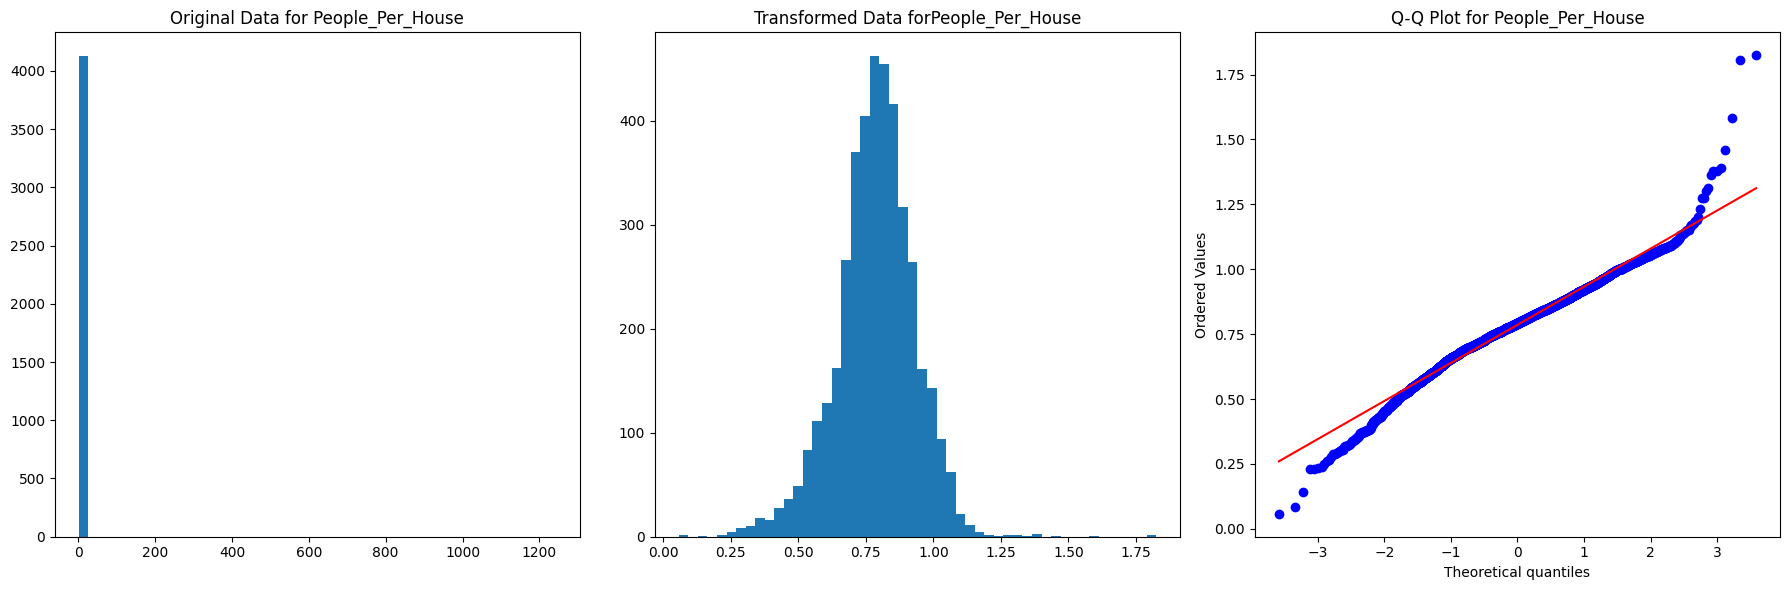

People_Per_House
Power Transformer


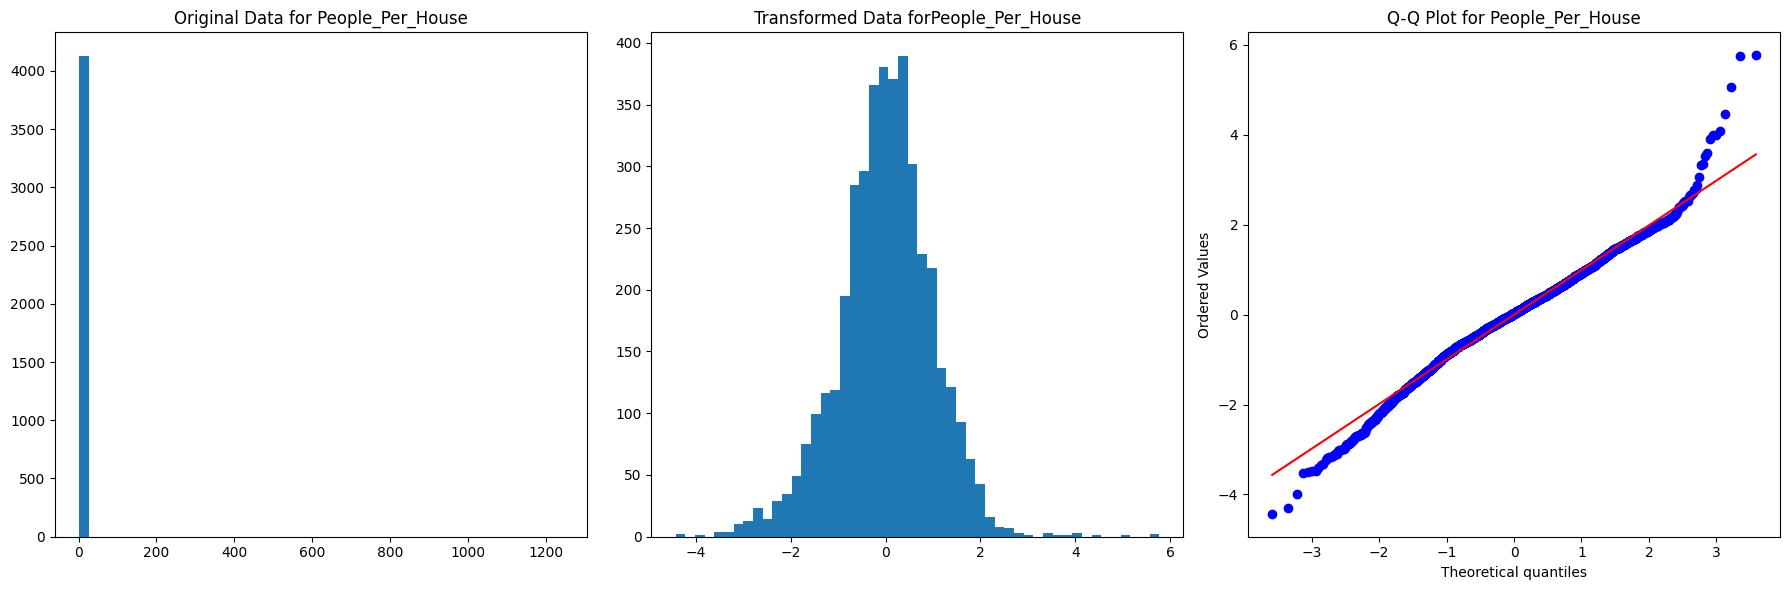

People_Per_House
Quantile Transformer


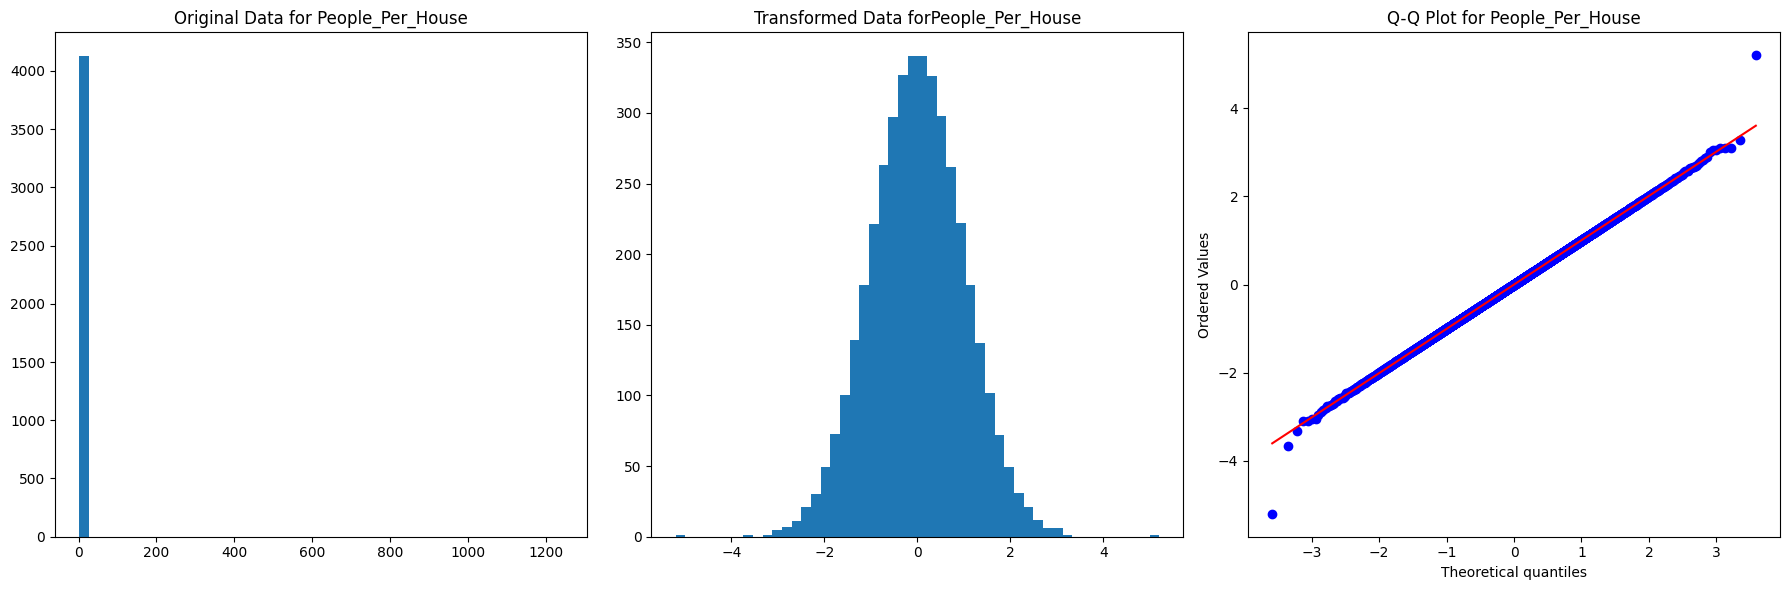

Income_Per_Household
log


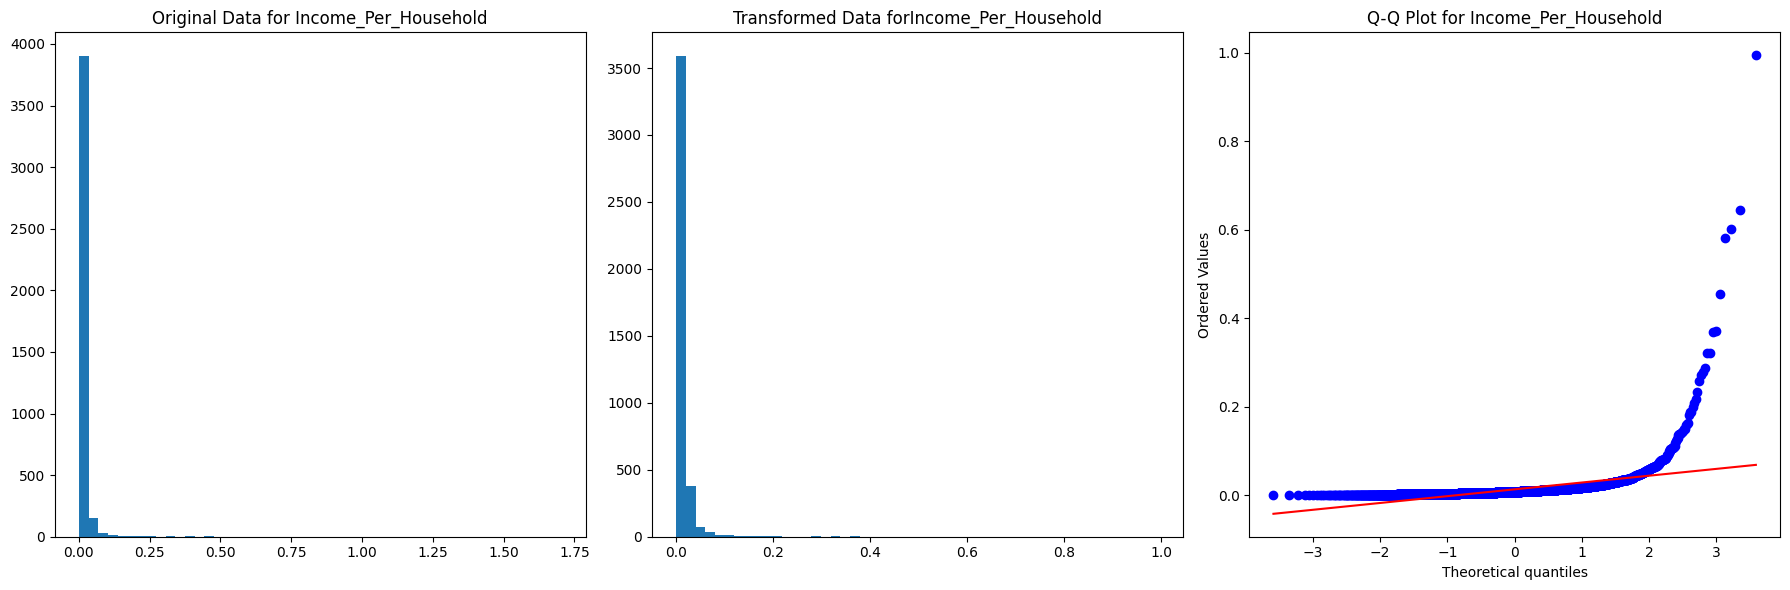

Income_Per_Household
BoxCox


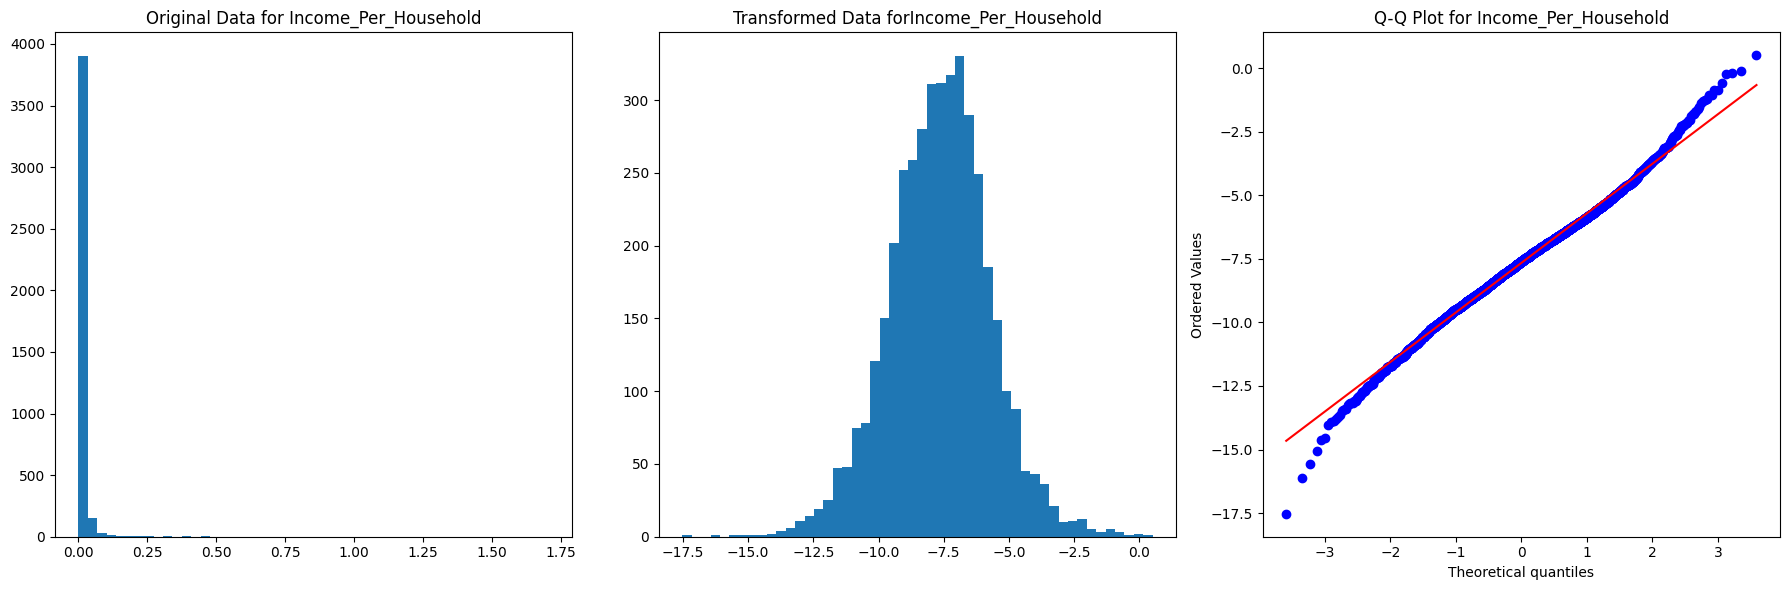

Income_Per_Household
Power Transformer


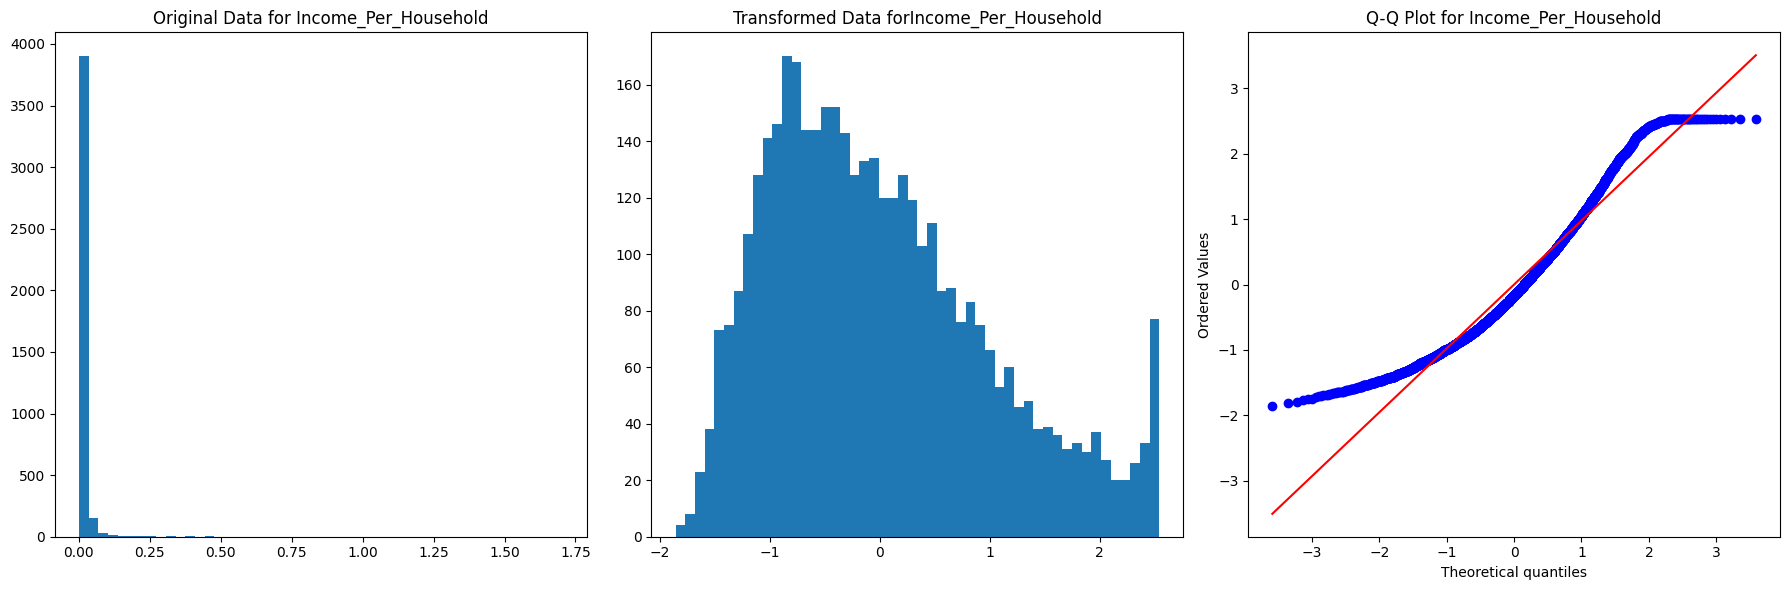

Income_Per_Household
Quantile Transformer


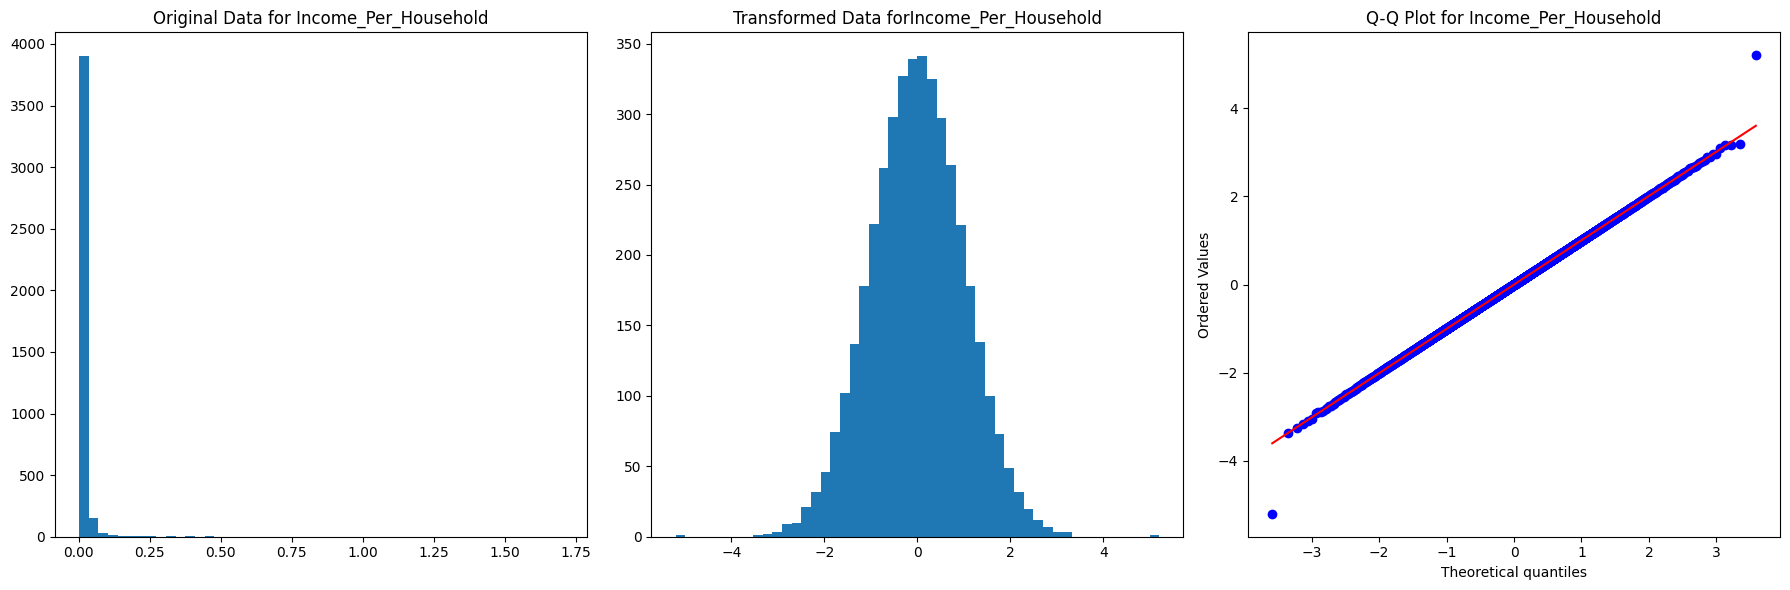

room_to_population_ratio
log


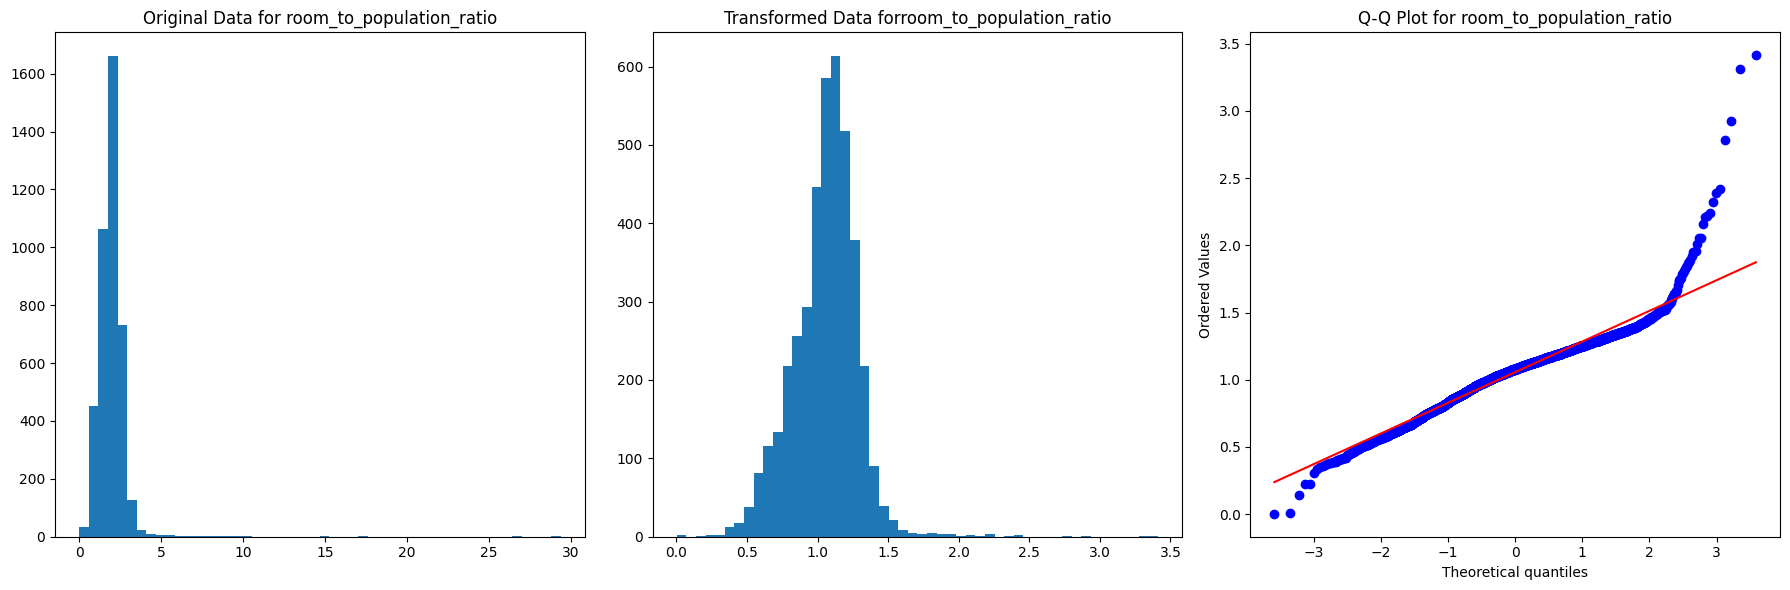

room_to_population_ratio
BoxCox


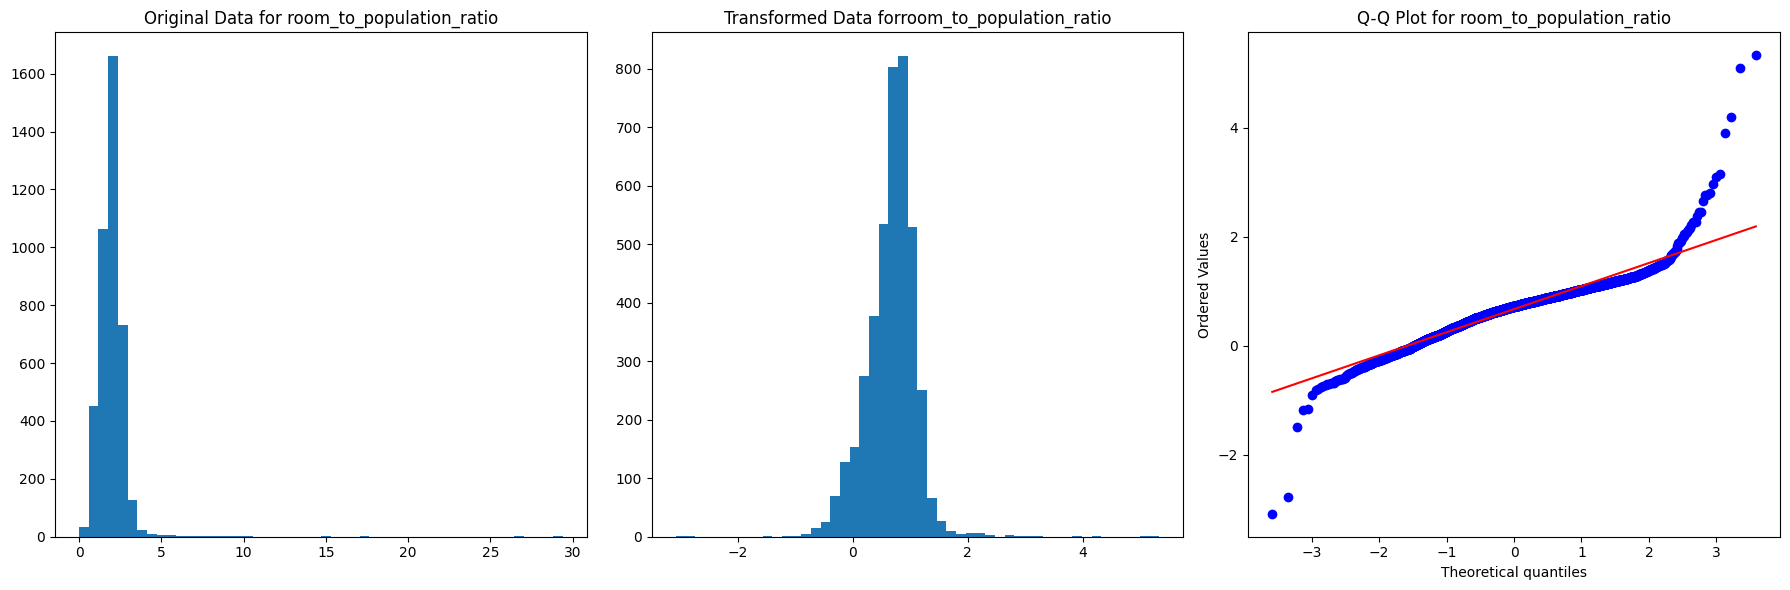

room_to_population_ratio
Power Transformer


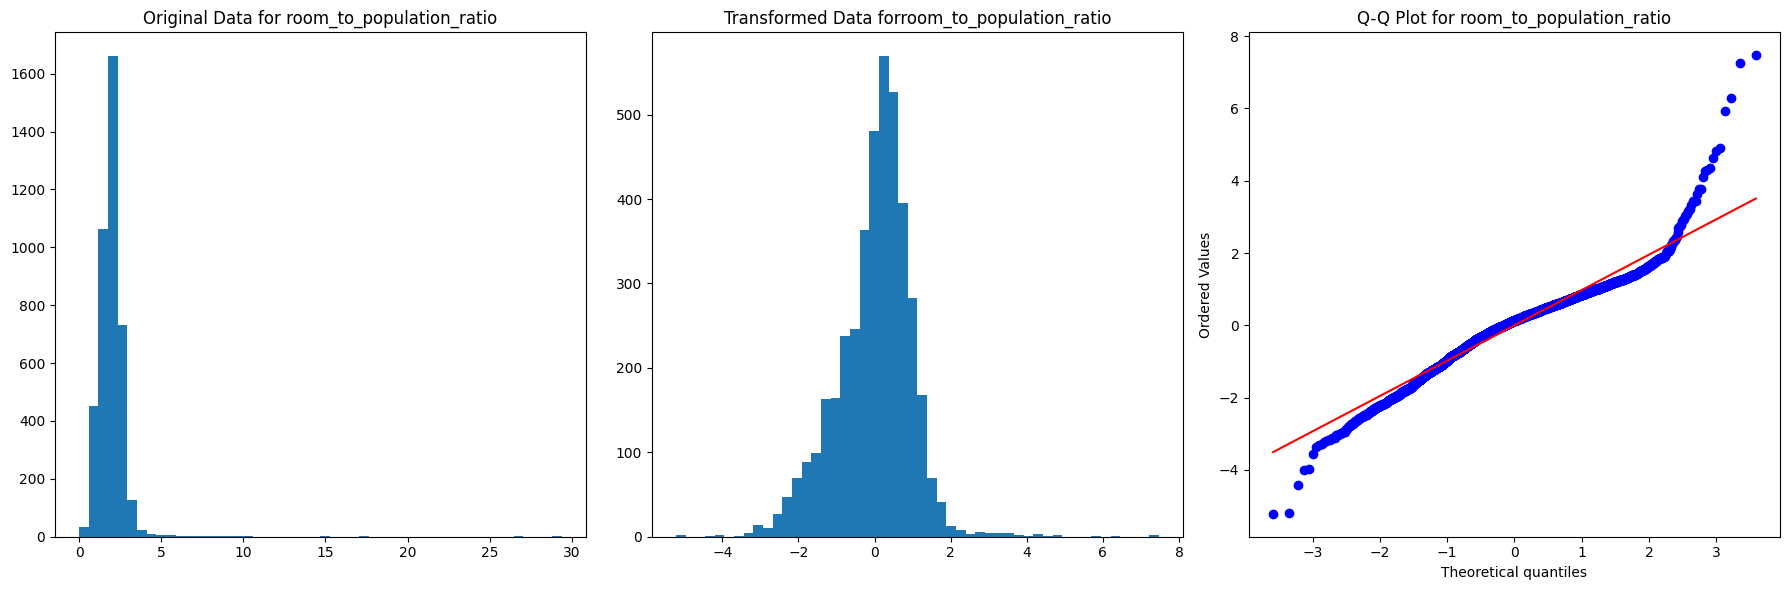

room_to_population_ratio
Quantile Transformer


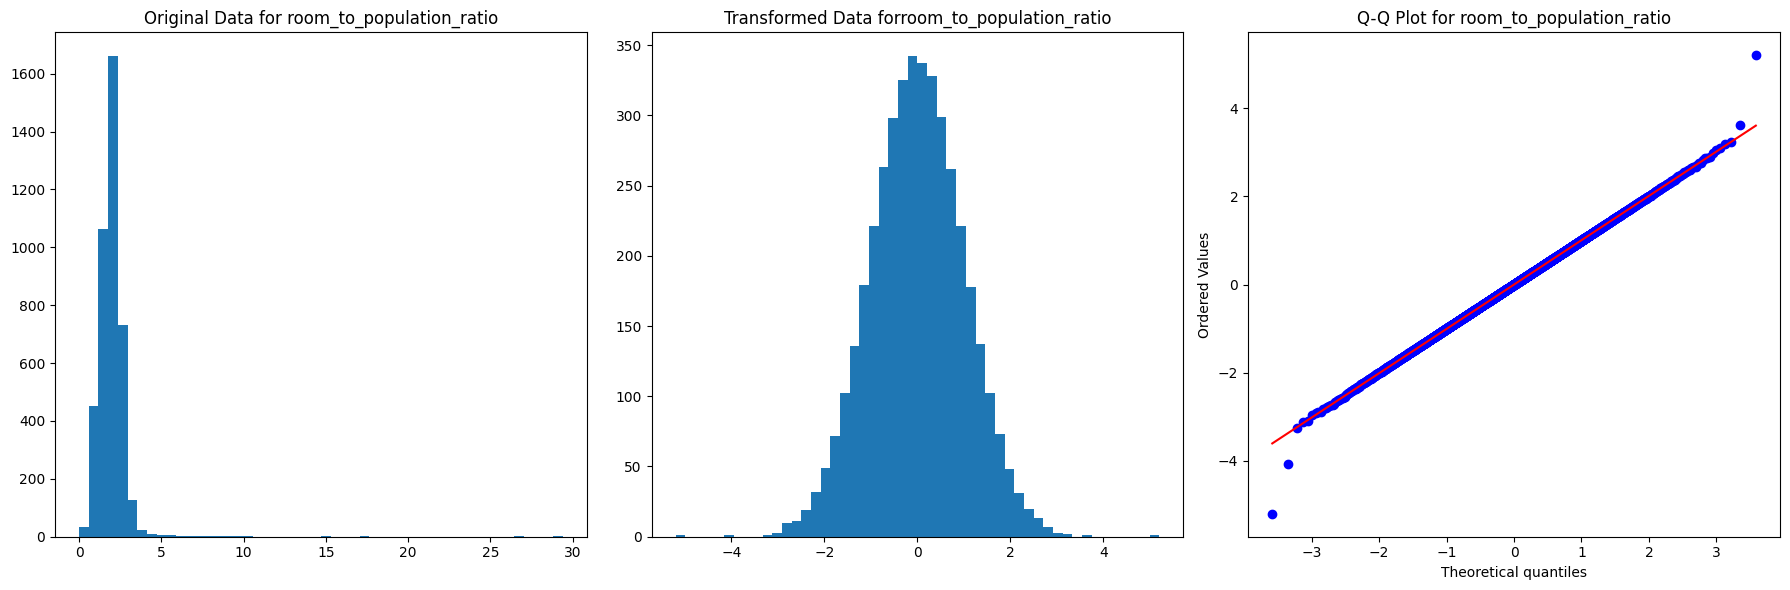

House_Value_per_Age
log


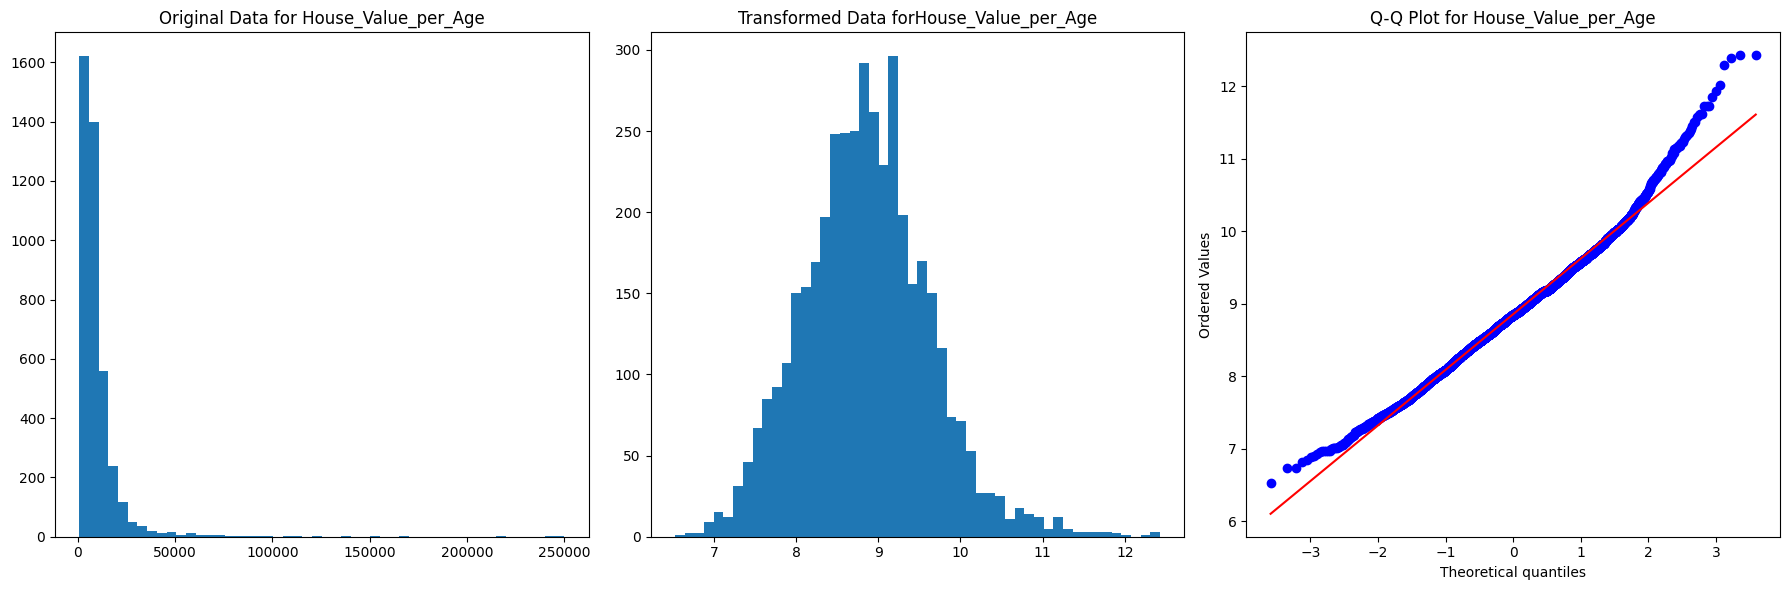

House_Value_per_Age
BoxCox


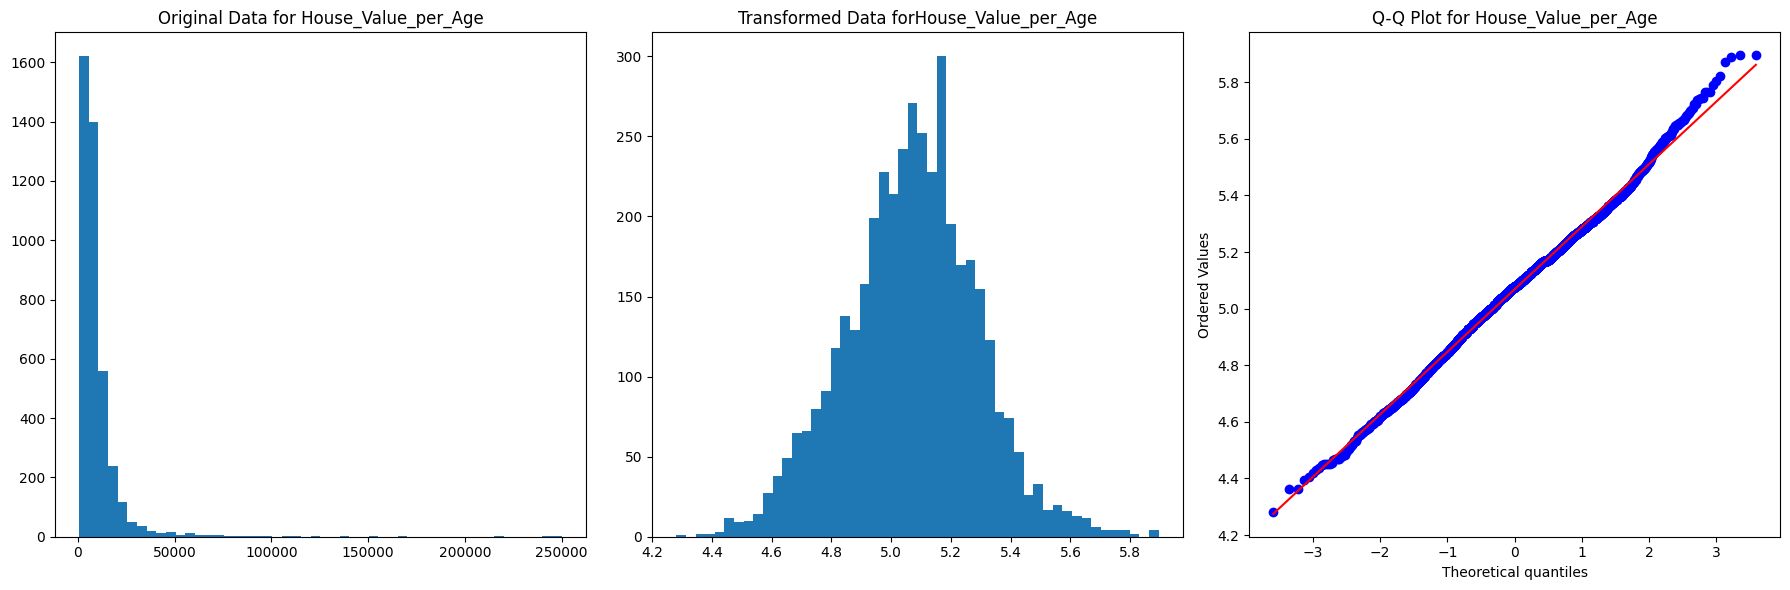

House_Value_per_Age
Power Transformer


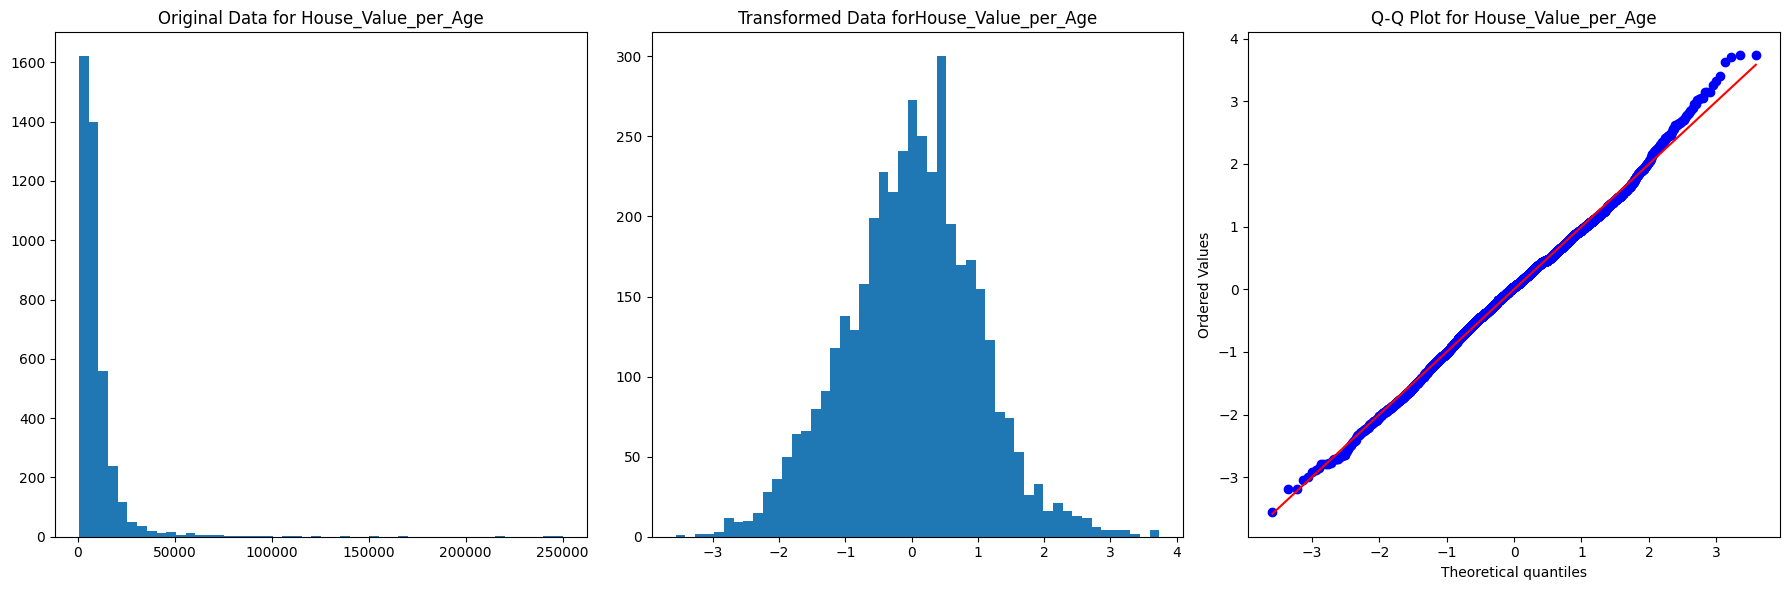

House_Value_per_Age
Quantile Transformer


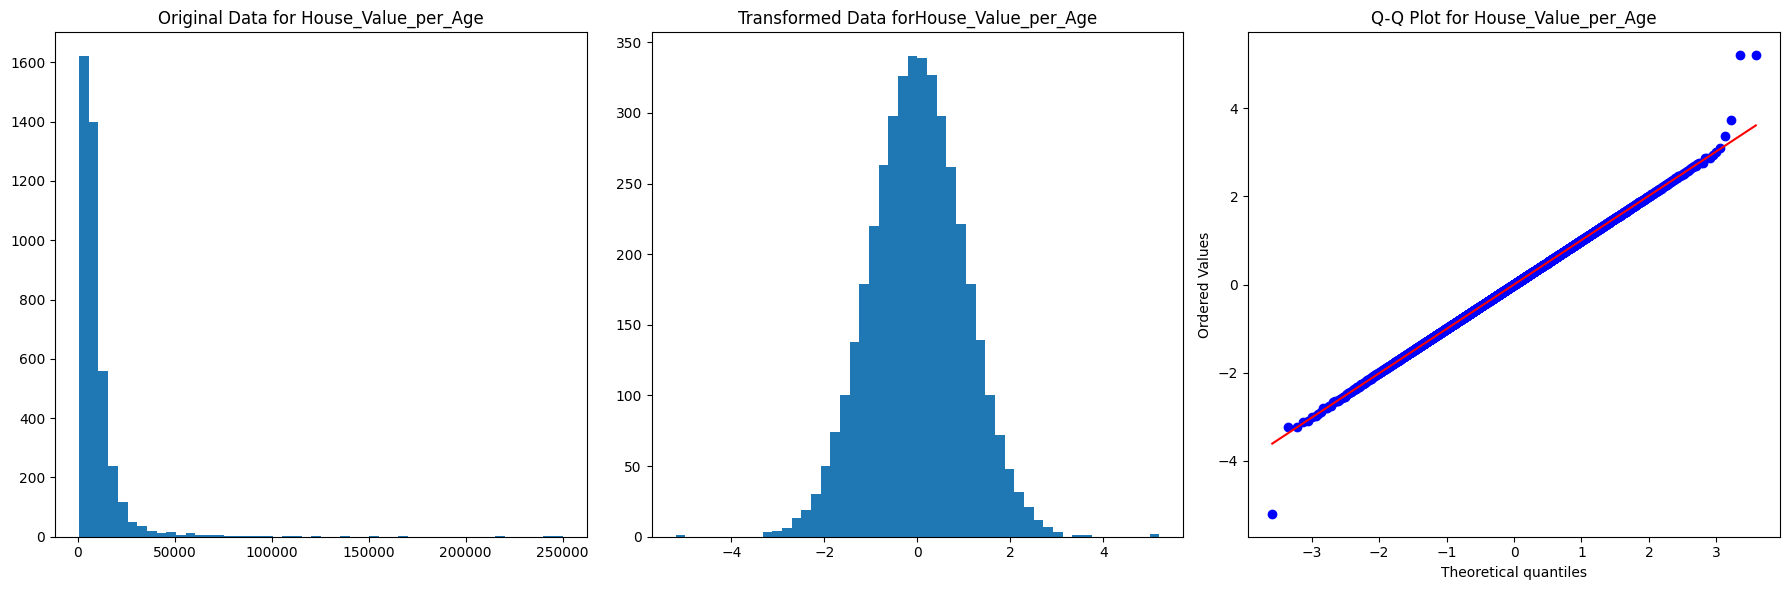

Skewness for geographic is Negligible.
Housing Age Similarly to 35 
log


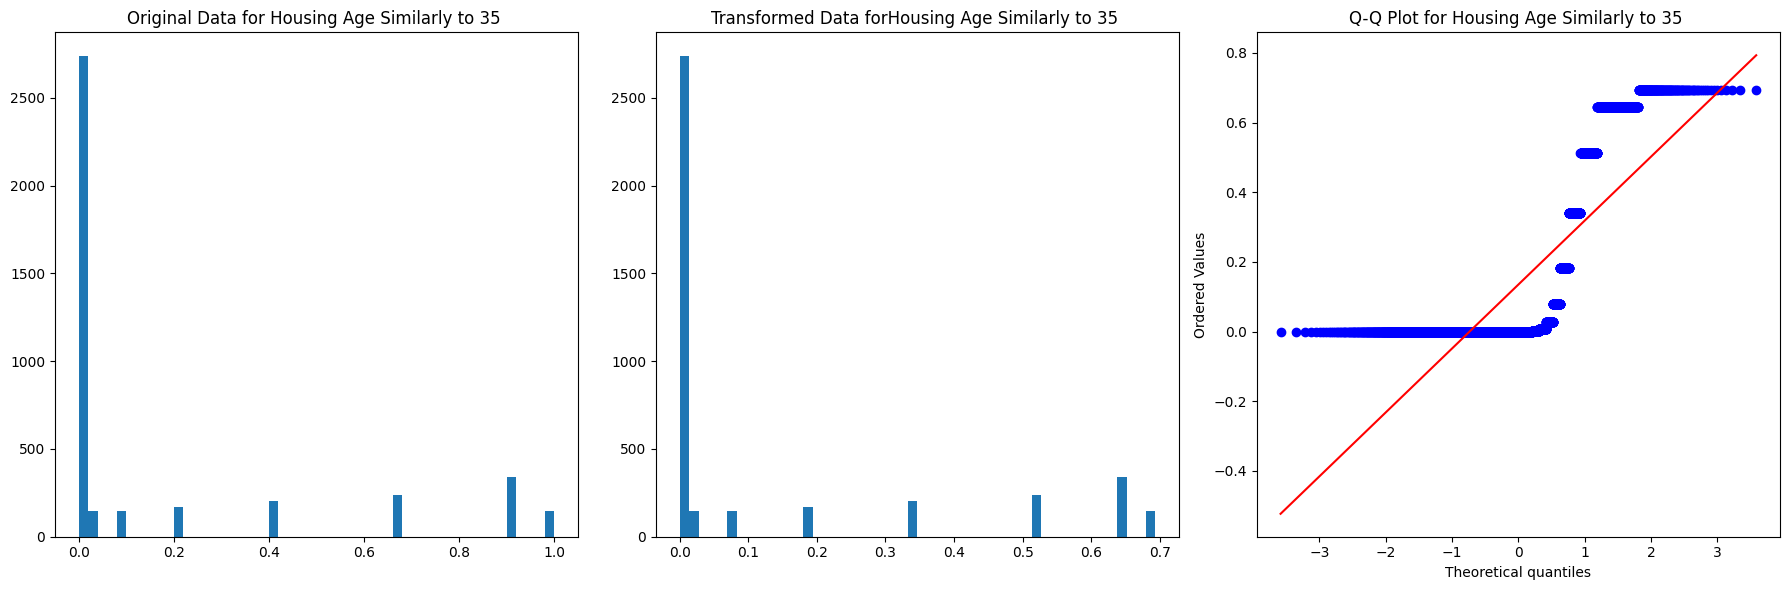

Housing Age Similarly to 35 
Reciprocal


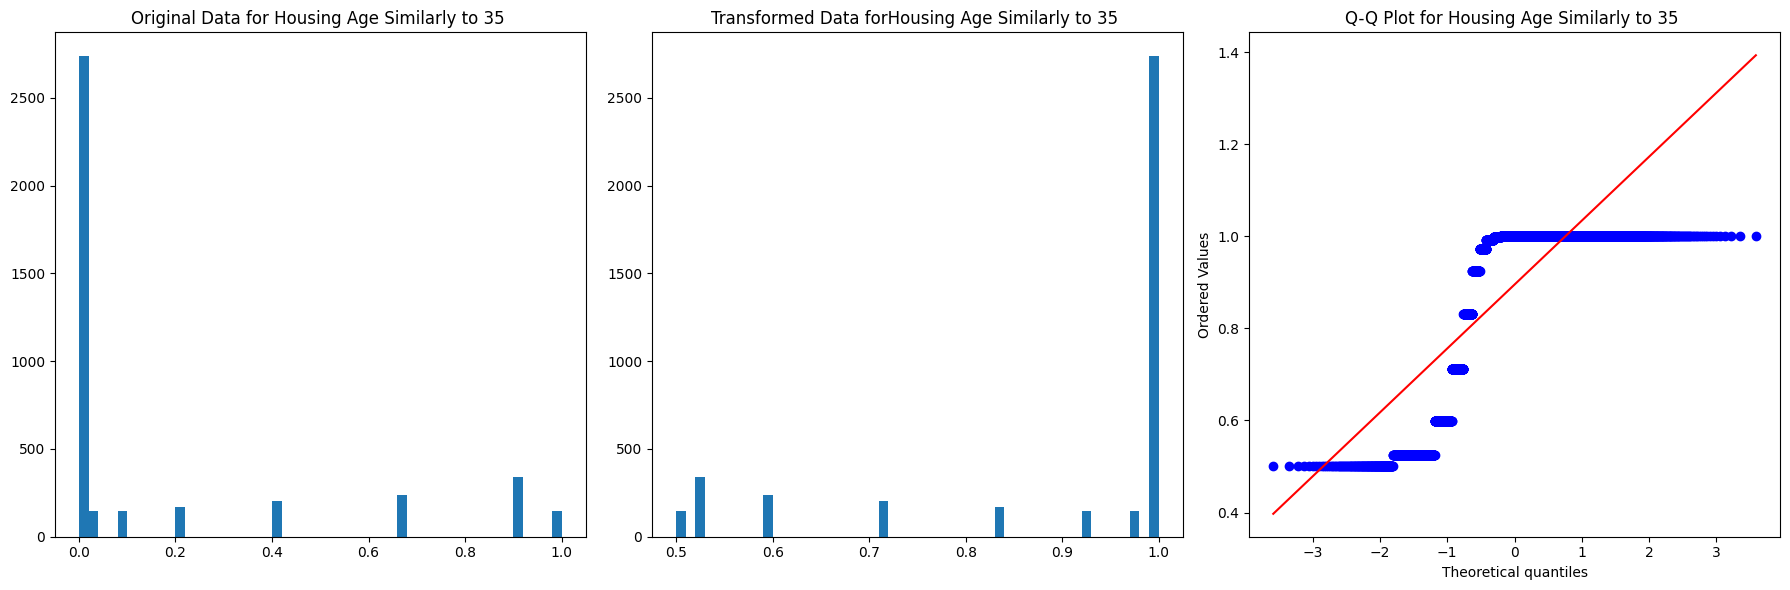

In [603]:
# ---------------------------------------------
# STANDARD LIBARARIES
# ---------------------------------------------
import numpy as np
import pandas as pdabs
from scipy.stats import skew, boxcox
from sklearn.preprocessing import PowerTransformer, QuantileTransformer
import scipy.stats as stats

# ---------------------------------------------
# FILTER THE NUMERIC COLUMNS ONLY
# ---------------------------------------------

Data_Num_Features =[ 'longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'Bedrooms_Ratio', 'Rooms_Per_House', 'People_Per_House',
       'Income_Per_Household', 'room_to_population_ratio',
       'House_Value_per_Age', 'geographic', 'Housing Age Similarly to 35 ']

# ---------------------------------------------
# INITIALIZING LISTS TO STORE RESULTS
# ---------------------------------------------

Features_Names = []
Type_of_Skewed = []
The_Amount_Of_Skweness = []
The_Level_of_Skewed = []
Feature_Name = []
Method = []
Befor = []
After = []
Feature_Best_Method =[]
Best_Method = []
Best_After = []

# ---------------------------------------------
# CHECKING THE SKWENESS
# ---------------------------------------------

def Check_The_Skewness(Data_Num_Features, i):
    Skewness_Value = skew(Data_Num_Features[i])
    Features_Names.append(i)
    The_Amount_Of_Skweness.append(Skewness_Value)
    if Skewness_Value == 0:
        Skewed_status = 'Symmetrical'
    elif Skewness_Value > 0:
        Skewed_status = 'Right'
    elif Skewness_Value < 0:
        Skewed_status = 'Left'
    else:
        Skewed_status = 'Error'
    Type_of_Skewed.append(Skewed_status)

# ---------------------------------------------
# CHECKING THE SKWENESS LEVEL
# ---------------------------------------------

def Skewness_Level(Data, i):
    Skewness_Value = skew(Data[i])
    if 0.5 <= abs(Skewness_Value) < 1:
        The_Level_of_Ske = "Moderate"
    elif 1 <= abs(Skewness_Value) < 2:
        The_Level_of_Ske = 'High'
    elif abs(Skewness_Value) >= 2:
        The_Level_of_Ske = 'Extreme'
    else:
        The_Level_of_Ske = "Neglected"
    The_Level_of_Skewed.append(The_Level_of_Ske)

# ---------------------------------------------
# VISUALIZING THE SKWENESS Q-Q PLOT
# ---------------------------------------------

def Visualize_The_Result(orignal , transform , i):
    plt.figure(figsize=(18, 6))
    plt.subplot(1, 3, 1)
    plt.hist(orignal, bins=50)
    plt.title(f'Original Data for {i}')

    plt.subplot(1, 3, 2)
    plt.hist(transform, bins=50)
    plt.title(f'Transformed Data for{i}')

    plt.subplot(1, 3, 3)
    stats.probplot(transform, dist ="norm", plot=plt)
    plt.title(f'Q-Q Plot for {i}')

    plt.tight_layout()
    plt.show()

# ---------------------------------------------
# SQUARE ROOT FUNCTION
# ---------------------------------------------
def Square_root_Function(Data , i):
    Method_1 = ' Square Root'
    Square_root = np.sqrt(Data[i].clip(lower=0))
    Skewness_Value_Square_root = skew(Square_root.dropna())
    return Method_1, Square_root , Skewness_Value_Square_root
# ---------------------------------------------
# LOG FUNCTION
# ---------------------------------------------
def Log_Function (Data , i):
    Method_2 = 'log'
    Log = np.log1p(Data[i])
    Skewness_Value_Log = skew(Log)
    return Method_2 , Log , Skewness_Value_Log
# ---------------------------------------------
# Reciprocal Function
# ---------------------------------------------
def Reciprocal_function (Data , i):
    Method_2 = 'Reciprocal'
    Reciprocal = 1 / (Data[i] + 1)
    Skewness_Value_Reciprocal = skew(Reciprocal)
    return Method_2 , Reciprocal , Skewness_Value_Reciprocal
# ---------------------------------------------
# BOX COX Function
# ---------------------------------------------
def BoxcoX(Data ,i ):
    Method_2 ="BoxCox"
    Data_for_BoxCox = Data[i].clip(lower=0) + 1e-6
    BoxCox = boxcox(Data_for_BoxCox)[0]
    Skewness_Value_BoxCox = skew(BoxCox)
    return Method_2 , BoxCox , Skewness_Value_BoxCox
# ---------------------------------------------
# Power Transformer
# ---------------------------------------------
def Power_Trans(Data , i):
    Method_3 ="Power Transformer"
    pt = PowerTransformer(method='yeo-johnson')
    power_transformer = pt.fit_transform(Data[[i]]).flatten()
    Skewness_Value_Power = skew(power_transformer)
    return Method_3 ,pt , power_transformer , Skewness_Value_Power
# ---------------------------------------------
# Quantile Function
# ---------------------------------------------
def Quant_Fun (Data ,i ):
    Method_4 = "Quantile Transformer"
    qt = QuantileTransformer(output_distribution='normal')
    quantile_transformer = qt.fit_transform(Data[[i]]).flatten()
    Skewness_Value_Quan = skew(quantile_transformer)
    return Method_4 , qt , quantile_transformer , Skewness_Value_Quan
# ---------------------------------------------
# MODERATE SKWENESS FUNCTION
# ---------------------------------------------

def Moderate_Skewness(Data, i):
    original_Skew = skew(Data[i].dropna())

    # Square Root Transformation
    Method_1 , Square_root , Skewness_Value_Square_root = Square_root_Function(Data , i)
    Feature_Name.append(i)
    Method.append(Method_1)
    Befor.append(original_Skew)
    After.append(Skewness_Value_Square_root)
    print(i)
    print(Method_1)
    Visualize_The_Result(Data[i] , Square_root , i)

    # Log Transformation
    Method_2 , Log , Skewness_Value_Log = Log_Function(Data ,i)
    Feature_Name.append(i)
    Method.append(Method_2)
    Befor.append(original_Skew)
    After.append(Skewness_Value_Log)
    print(i)
    print(Method_2)
    Visualize_The_Result(Data[i] , Log , i)

    #Determine the best method
    if abs(Skewness_Value_Square_root) < abs(Skewness_Value_Log):
        Feature_Best_Method.append(i)
        Best_Method.append(Method_1)
        Best_After.append(Skewness_Value_Square_root)
    else:
        Feature_Best_Method.append(i)
        Best_Method.append(Method_2)
        Best_After.append(Skewness_Value_Log)

# ---------------------------------------------
# HIGH SKWENESS FUNCTION
# ---------------------------------------------

def High_Skewness(Data, i):
    original_Skew = skew(Data[i])

    # Log Transformation
    Method_1 , Log , Skewness_Value_Log = Log_Function(Data ,i)
    Feature_Name.append(i)
    Method.append(Method_1)
    Befor.append(original_Skew)
    After.append(Skewness_Value_Log)
    print(i)
    print(Method_1)
    Visualize_The_Result(Data[i] , Log , i)

    # Reciprocal Transformation
    Method_2 , Reciprocal , Skewness_Value_Reciprocal = Reciprocal_function(Data , i)
    Feature_Name.append(i)
    Method.append(Method_2)
    Befor.append(original_Skew)
    After.append(Skewness_Value_Reciprocal)
    print(i)
    print(Method_2)
    Visualize_The_Result(Data[i] , Reciprocal , i)

    # Determine the best method
    if abs(Skewness_Value_Log) < abs(Skewness_Value_Reciprocal):
        Feature_Best_Method.append(i)
        Best_Method.append(Method_1)
        Best_After.append(Skewness_Value_Log)
    else:
        Feature_Best_Method.append(i)
        Best_Method.append(Method_2)
        Best_After.append(Skewness_Value_Reciprocal)

# ---------------------------------------------
# Extreme SKWENESS FUNCTION
# ---------------------------------------------

def Extreme_Skewness(Data, i):
    original_Skew = skew(Data[i])

    # Log Transformation
    Method_1 , Log , Skewness_Value_Log = Log_Function(Data ,i)
    Feature_Name.append(i)
    Method.append(Method_1)
    Befor.append(original_Skew)
    After.append(Skewness_Value_Log)
    print(i)
    print(Method_1)
    Visualize_The_Result(Data[i], Log, i)

    # BoxCox Transformation
    Method_2 , BoxCox , Skewness_Value_BoxCox = BoxcoX(Data ,i )
    Feature_Name.append(i)
    Method.append(Method_2)
    Befor.append(original_Skew)
    After.append(Skewness_Value_BoxCox)
    print(i)
    print(Method_2)
    Visualize_The_Result(Data[i], BoxCox, i)

    # Power Transformer
    Method_3 ,pt , power_transformer , Skewness_Value_Power = Power_Trans(Data ,i)
    Feature_Name.append(i)
    Method.append(Method_3)
    Befor.append(original_Skew)
    After.append(Skewness_Value_Power)
    print(i)
    print(Method_3)
    Visualize_The_Result(Data[i], power_transformer, i)

    # Quantile Transformer
    Method_4 , qt , quantile_transformer , Skewness_Value_Quan = Quant_Fun(Data ,i)
    Feature_Name.append(i)
    Method.append(Method_4)
    Befor.append(original_Skew)
    After.append(Skewness_Value_Quan)
    print(i)
    print(Method_4)
    Visualize_The_Result(Data[i], quantile_transformer, i)
    # Determine the best method
    skewness_results = {'Log': Skewness_Value_Log,
        'BoxCox': Skewness_Value_BoxCox,
        'Power Transformer': Skewness_Value_Power,
        'Quantile Transformer': Skewness_Value_Quan}

    # Determine the best method
    best_method = min(skewness_results, key=lambda k: abs(skewness_results[k]))
    Feature_Best_Method.append(i)
    Best_Method.append(best_method)
    Best_After.append(skewness_results[best_method])

# ---------------------------------------------
# Treating The Skewness
# ---------------------------------------------

def Treating_Skewness(Data, i):
    Skewness_Value = skew(Data[i])
    if abs(Skewness_Value) < 0.5:
        print(f"Skewness for {i} is Negligible.")
    elif 0.5 <= abs(Skewness_Value) < 1:
        Moderate_Skewness(Data, i)
    elif 1 <= abs(Skewness_Value) < 2:
        High_Skewness(Data, i)
    elif abs(Skewness_Value) >= 2:
        Extreme_Skewness(Data, i)
    else:
        print('Error')

# ---------------------------------------------
# HIGHLIGHT THE SKEWNWSS LEVEL
# ---------------------------------------------

def highlight_skewed(row):
    if row['The Level of Skewness'] == 'Extreme':
        return ['background-color: lightcoral'] * len(row)
    elif row['The Level of Skewness'] == 'High':
        return ['background-color: lightyellow'] * len(row)
    elif row['The Level of Skewness'] == 'Moderate':
        return ['background-color: lightgoldenrodyellow'] * len(row)
    elif row['The Level of Skewness'] == 'Neglected':
        return ['background-color: lightgreen'] * len(row)
    else:
        return [''] * len(row)
# EXCUTE THE CODE
for i in Data_Num_Features:
    Check_The_Skewness(Final_test, i)
    Skewness_Level(Final_test, i)
    Treating_Skewness(Final_test, i)

# RESULT DATAFRAME
Data_Result = pd.DataFrame({
    'Feature': Features_Names,
    'Type of Skewness': Type_of_Skewed,
    'The Amount of Skewness': The_Amount_Of_Skweness,
    'The Level of Skewness': The_Level_of_Skewed })
# DATA COMPARING
Data_Compared = pd.DataFrame({
    'Features':Feature_Name ,
    'Method': Method ,
    'BEFOR': Befor ,
    'AFTER': After })
# THE BEST METHOD
The_Best_Method = pd.DataFrame({
    'Features': Feature_Best_Method ,
    'Best Method': Best_Method ,
    'Best Method After': Best_After })
Data_Result = Data_Result.style.apply(highlight_skewed, axis=1)

In [604]:
_ , _ , QT_Total_rooms , _ = Quant_Fun(Final_test ,'total_rooms')
_ , _ , QT_Total_bedrooms , _ = Quant_Fun(Final_test ,'total_bedrooms')
_ , _ , QT_population, _ = Quant_Fun(Final_test ,'population')
_ , _ , QT_households , _ = Quant_Fun(Final_test ,'households')
_ , Log_median_income , _ = Log_Function(Final_test ,'median_income')
_ , _ , PT_Bedrooms_Ratio , _ = Power_Trans(Final_test ,'Bedrooms_Ratio' )
_ , _ , QT_Room_Per_House , _ = Quant_Fun(Final_test ,'Rooms_Per_House')
_ , _ , QT_People_Per_House , _ = Quant_Fun(Final_test ,'People_Per_House')
_ , _ , QT_Income_Per_Household, _ = Quant_Fun(Final_test ,'Income_Per_Household')
_ , _ , QT_room_to_population_ratio, _ = Quant_Fun(Final_test ,'room_to_population_ratio')
_ , _ , PT_House_Value_per_Age , _ = Power_Trans(Final_test ,'House_Value_per_Age' )
_ , Reciprocal_Housing_Age_Similarly_to_35 , _ = Reciprocal_function(Final_test ,'Housing Age Similarly to 35 ')

In [605]:
data = {
    'QT_Total_rooms': QT_Total_rooms,
    'QT_Total_bedrooms': QT_Total_bedrooms,
    'QT_population': QT_population,
    'QT_households': QT_households,
    'Log_median_income': Log_median_income,
    'PT_Bedrooms_Ratio': PT_Bedrooms_Ratio,
    'QT_Room_Per_House': QT_Room_Per_House,
    'QT_People_Per_House': QT_People_Per_House,
    'QT_Income_Per_Household': QT_Income_Per_Household,
    'QT_room_to_population_ratio': QT_room_to_population_ratio,
    'PT_House_Value_per_Age': PT_House_Value_per_Age,
    'Reciprocal_Housing_Age_Similarly_to_35': Reciprocal_Housing_Age_Similarly_to_35
}

Final_test_DF = pd.DataFrame(data, index=test.index)
Final_test_DF

QT_Total_rooms  QT_Total_bedrooms  QT_population  QT_households  \
3905         0.211070          -0.364191      -0.420204      -0.336178   
16821       -0.514923          -0.869846      -0.639462      -0.728240   
2900         1.606760           2.079033       1.037508       1.986470   
7193         0.019234          -0.072829      -0.149853      -0.185480   
13928       -0.723177           0.301855      -0.803958      -0.080549   
...               ...                ...            ...            ...   
12369        0.636387           0.542335       0.069056       0.490721   
8707        -0.284744           0.095492      -0.053973       0.023839   
16634       -1.289352          -1.545927      -1.500844      -1.588771   
9779        -0.051460          -0.244548       0.427715      -0.092972   
3455        -0.153866          -0.217488      -0.484095       0.051460   

       Log_median_income  PT_Bedrooms_Ratio  QT_Room_Per_House  \
3905            2.167452          -1.417832           1.269905   
16821           1.729068          -0.906451           0.538969   
2900            1.628613           1.440769          -1.115307   
7193            1.635301          -0.189676           0.547128   
13928           1.526860           2.078494          -1.476187   
...                  ...                ...                ...   
12369           1.135747          -0.168004           0.352351   
8707            1.039888           0.868870          -0.753930   
16634           1.738271          -1.075590           1.227038   
9779            1.717772          -0.445937           0.118401   
3455            1.566530          -0.138726          -0.491658   

       QT_People_Per_House  QT_Income_Per_Household  \
3905             -0.214580                 1.222953   
16821             0.226489                 0.907536   
2900             -2.574048                -1.513121   
7193              0.144836                 0.363045   
13928            -1.684830                 0.114605   
...                    ...                      ...   
12369            -1.032471                -1.043553   
8707             -0.172164                -0.877179   
16634             0.273192                 1.632670   
9779              1.251411                 0.429476   
3455             -1.275852                 0.071173   

       QT_room_to_population_ratio  PT_House_Value_per_Age  \
3905                      1.186033                1.265817   
16821                     0.061346               -0.240352   
2900                      1.436128                0.544856   
7193                      0.140465               -0.146364   
13928                    -0.011094                2.008821   
...                            ...                     ...   
12369                     1.048678               -1.770324   
8707                     -0.572143               -1.709184   
16634                     0.711018                0.131194   
9779                     -0.856005                0.364071   
3455                      0.565205               -1.062752   

       Reciprocal_Housing_Age_Similarly_to_35  
3905                                 1.000000  
16821                                0.524979  
2900                                 0.924142  
7193                                 1.000000  
13928                                1.000000  
...                                       ...  
12369                                0.999994  
8707                                 0.973403  
16634                                0.598688  
9779                                 0.999994  
3455                                 1.000000  

[4128 rows x 12 columns]

In [606]:
# Making a copy to use it further
Data_Without_Skweness_imputing = test.copy()
columns_to_drop = ['total_rooms', 'total_bedrooms', 'population', 'households', 'median_income',
                 'Bedrooms_Ratio', 'Rooms_Per_House', 'People_Per_House', 'Income_Per_Household',
                 'room_to_population_ratio', 'House_Value_per_Age', 'Housing Age Similarly to 35 ']

final_test = Final_test.drop(columns=columns_to_drop)
test_set =pd.concat([final_test , Final_test_DF] , axis=1)
test_set


longitude  latitude  housing_median_age  geographic ocean_proximity  \
3905     -121.95     37.11                21.0  -4525.5645       <1H OCEAN   
16821    -118.01     33.89                36.0  -3999.3589       <1H OCEAN   
2900     -118.18     33.74                30.0  -3987.3932      NEAR OCEAN   
7193     -122.48     37.74                52.0  -4622.3952      NEAR OCEAN   
13928    -122.39     37.78                 5.0  -4623.8942        NEAR BAY   
...          ...       ...                 ...         ...             ...   
12369    -124.16     40.79                46.0  -5064.4864      NEAR OCEAN   
8707     -119.01     35.39                29.0  -4211.7639          INLAND   
16634    -123.01     38.67                33.0  -4756.7967       <1H OCEAN   
9779     -122.03     37.60                24.0  -4588.3280        NEAR BAY   
3455     -117.12     32.74                52.0  -3834.5088      NEAR OCEAN   

       QT_Total_rooms  QT_Total_bedrooms  QT_population  QT_households  \
3905         0.211070          -0.364191      -0.420204      -0.336178   
16821       -0.514923          -0.869846      -0.639462      -0.728240   
2900         1.606760           2.079033       1.037508       1.986470   
7193         0.019234          -0.072829      -0.149853      -0.185480   
13928       -0.723177           0.301855      -0.803958      -0.080549   
...               ...                ...            ...            ...   
12369        0.636387           0.542335       0.069056       0.490721   
8707        -0.284744           0.095492      -0.053973       0.023839   
16634       -1.289352          -1.545927      -1.500844      -1.588771   
9779        -0.051460          -0.244548       0.427715      -0.092972   
3455        -0.153866          -0.217488      -0.484095       0.051460   

       Log_median_income  PT_Bedrooms_Ratio  QT_Room_Per_House  \
3905            2.167452          -1.417832           1.269905   
16821           1.729068          -0.906451           0.538969   
2900            1.628613           1.440769          -1.115307   
7193            1.635301          -0.189676           0.547128   
13928           1.526860           2.078494          -1.476187   
...                  ...                ...                ...   
12369           1.135747          -0.168004           0.352351   
8707            1.039888           0.868870          -0.753930   
16634           1.738271          -1.075590           1.227038   
9779            1.717772          -0.445937           0.118401   
3455            1.566530          -0.138726          -0.491658   

       QT_People_Per_House  QT_Income_Per_Household  \
3905             -0.214580                 1.222953   
16821             0.226489                 0.907536   
2900             -2.574048                -1.513121   
7193              0.144836                 0.363045   
13928            -1.684830                 0.114605   
...                    ...                      ...   
12369            -1.032471                -1.043553   
8707             -0.172164                -0.877179   
16634             0.273192                 1.632670   
9779              1.251411                 0.429476   
3455             -1.275852                 0.071173   

       QT_room_to_population_ratio  PT_House_Value_per_Age  \
3905                      1.186033                1.265817   
16821                     0.061346               -0.240352   
2900                      1.436128                0.544856   
7193                      0.140465               -0.146364   
13928                    -0.011094                2.008821   
...                            ...                     ...   
12369                     1.048678               -1.770324   
8707                     -0.572143               -1.709184   
16634                     0.711018                0.131194   
9779                     -0.856005                0.364071   
3455                      0.565205           

In [607]:
test_set.columns , Scaller_Features.get_feature_names_out()

(Index(['longitude', 'latitude', 'housing_median_age', 'geographic',
        'ocean_proximity', 'QT_Total_rooms', 'QT_Total_bedrooms',
        'QT_population', 'QT_households', 'Log_median_income',
        'PT_Bedrooms_Ratio', 'QT_Room_Per_House', 'QT_People_Per_House',
        'QT_Income_Per_Household', 'QT_room_to_population_ratio',
        'PT_House_Value_per_Age', 'Reciprocal_Housing_Age_Similarly_to_35'],
       dtype='object'),
 array(['longitude', 'latitude', 'housing_median_age', 'geographic',
        'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
        'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
        'ocean_proximity_NEAR OCEAN', 'QT_Total_rooms',
        'QT_Total_bedrooms', 'QT_population', 'QT_households',
        'Log_median_income', 'PT_Bedrooms_Ratio', 'QT_Room_Per_House',
        'QT_People_Per_House', 'QT_Income_Per_Household',
        'QT_room_to_population_ratio', 'PT_House_Value_per_Age',
        'Reciprocal_Housing_Age_Similarly_to_35'], dtyp

# `Encoding Categorical Data`

In [608]:
cat = Categorical_Encoder.transform(test_set[['ocean_proximity']])
cat = pd.DataFrame(cat , columns=Categorical_Encoder.get_feature_names_out() ,index = test_set.index)
cat

ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  \
3905                         1.0                     0.0   
16821                        1.0                     0.0   
2900                         0.0                     0.0   
7193                         0.0                     0.0   
13928                        0.0                     0.0   
...                          ...                     ...   
12369                        0.0                     0.0   
8707                         0.0                     1.0   
16634                        1.0                     0.0   
9779                         0.0                     0.0   
3455                         0.0                     0.0   

       ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
3905                      0.0                       0.0   
16821                     0.0                       0.0   
2900                      0.0                       0.0   
7193                      0.0                       0.0   
13928                     0.0                       1.0   
...                       ...                       ...   
12369                     0.0                       0.0   
8707                      0.0                       0.0   
16634                     0.0                       0.0   
9779                      0.0                       1.0   
3455                      0.0                       0.0   

       ocean_proximity_NEAR OCEAN  
3905                          0.0  
16821                         0.0  
2900                          1.0  
7193                          1.0  
13928                         0.0  
...                           ...  
12369                         1.0  
8707                          0.0  
16634                         0.0  
9779                          0.0  
3455                          1.0  

[4128 rows x 5 columns]

In [609]:
test = pd.concat([test_set, cat] , axis=1 )
test.drop('ocean_proximity' , axis=1  , inplace=True)

In [610]:
columns = ['longitude', 'latitude', 'housing_median_age', 'geographic',
        'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
        'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
        'ocean_proximity_NEAR OCEAN', 'QT_Total_rooms',
        'QT_Total_bedrooms', 'QT_population', 'QT_households',
        'Log_median_income', 'PT_Bedrooms_Ratio', 'QT_Room_Per_House',
        'QT_People_Per_House', 'QT_Income_Per_Household',
        'QT_room_to_population_ratio', 'PT_House_Value_per_Age',
        'Reciprocal_Housing_Age_Similarly_to_35']
test = test[columns]

In [611]:
X_Test = Scaller_Features.transform(test)
X_Test = pd.DataFrame(X_Test , columns=Scaller_Features.get_feature_names_out())
X_Test

longitude  latitude  housing_median_age  geographic  \
0     -1.188103  0.690153           -0.602061   -0.804893   
1      0.781342 -0.819296            0.589800    0.822204   
2      0.696366 -0.889612            0.113056    0.859204   
3     -1.453028  0.985480            1.861119   -1.104306   
4     -1.408041  1.004230           -1.873380   -1.108941   
...         ...       ...                 ...         ...   
4123  -2.292791  2.415237            1.384374   -2.471311   
4124   0.281483 -0.116137            0.033598    0.165420   
4125  -1.717953  1.421438            0.351428   -1.519893   
4126  -1.228091  0.919851           -0.363689   -0.998966   
4127   1.226217 -1.358385            1.861119    1.331943   

      ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  \
0                      1.126944               -0.687633   
1                      1.126944               -0.687633   
2                     -0.887356               -0.687633   
3                     -0.887356               -0.687633   
4                     -0.887356               -0.687633   
...                         ...                     ...   
4123                  -0.887356               -0.687633   
4124                  -0.887356                1.454264   
4125                   1.126944               -0.687633   
4126                  -0.887356               -0.687633   
4127                  -0.887356               -0.687633   

      ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0                  -0.011006                 -0.354781   
1                  -0.011006                 -0.354781   
2                  -0.011006                 -0.354781   
3                  -0.011006                 -0.354781   
4                  -0.011006                  2.818642   
...                      ...                       ...   
4123               -0.011006                 -0.354781   
4124               -0.011006                 -0.354781   
4125               -0.011006                 -0.354781   
4126               -0.011006                  2.818642   
4127               -0.011006                 -0.354781   

      ocean_proximity_NEAR OCEAN  QT_Total_rooms  ...  QT_population  \
0                      -0.380576        0.215489  ...      -0.426112   
1                      -0.380576       -0.506443  ...      -0.644657   
2                       2.627596        1.603372  ...       1.026866   
3                       2.627596        0.024726  ...      -0.156638   
4                      -0.380576       -0.713532  ...      -0.808619   
...                          ...             ...  ...            ...   
4123                    2.627596        0.638426  ...       0.061559   
4124                   -0.380576       -0.277552  ...      -0.061070   
4125                   -0.380576       -1.276540  ...      -1.503242   
4126                   -0.380576       -0.045573  ...       0.419053   
4127                    2.627596       -0.147406  ...      -0.489795   

      QT_households  Log_median_income  PT_Bedrooms_Ratio  QT_Room_Per_House  \
0         -0.331995           1.815662          -1.417832           1.255934   
1         -0.721552           0.591530          -0.906451           0.531827   
2          1.975810           0.311022           1.440769          -1.106992   
3         -0.182260           0.329696          -0.189676           0.539909   
4         -0.078000           0.026890           2.078494          -1.464501   
...             ...                ...                ...                ...   
4123       0.489620          -1.065242          -0.168004           0.346952   
4124       0.025721          -1.332918           0.868870          -0.748992   
4125      -1.576583           0.617227          -1.075590           1.213467   
4126      -0.090343           0.559987          -0.445937           0.115188   
4127       0.053166           0.137664          -0.138726          -0.489171   

      QT_People_Per_House  QT_Income_Per_

In [612]:
Y_Test = Target_Scaller.transform(test_labels.to_frame())
Y_Test

array([[ 1.6595747 ],
       [-0.02977627],
       [ 0.89901988],
       ...,
       [ 0.34573141],
       [ 0.07255608],
       [-0.37232948]])

In [613]:
X_Test.columns

Index(['longitude', 'latitude', 'housing_median_age', 'geographic',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN', 'QT_Total_rooms', 'QT_Total_bedrooms',
       'QT_population', 'QT_households', 'Log_median_income',
       'PT_Bedrooms_Ratio', 'QT_Room_Per_House', 'QT_People_Per_House',
       'QT_Income_Per_Household', 'QT_room_to_population_ratio',
       'PT_House_Value_per_Age', 'Reciprocal_Housing_Age_Similarly_to_35'],
      dtype='object')

In [614]:
columns = ['longitude', 'latitude', 'housing_median_age', 'geographic',
           'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
           'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
           'ocean_proximity_NEAR OCEAN', 'QT_Total_rooms', 'QT_Total_bedrooms',
           'QT_population', 'QT_households', 'Log_median_income',
           'PT_Bedrooms_Ratio', 'QT_Room_Per_House', 'QT_People_Per_House',
           'QT_Income_Per_Household', 'QT_room_to_population_ratio',
           'PT_House_Value_per_Age', 'Reciprocal_Housing_Age_Similarly_to_35']
X_Test = X_Test[columns]

In [615]:
X_train

longitude  latitude  housing_median_age  geographic  \
13096  -1.423037  1.013606            1.861119   -1.120017   
14973   0.596394 -0.702103            0.907630    0.691919   
3785   -1.203098  1.276119            0.351428   -1.279808   
14689   1.231216 -0.884924           -0.919891    0.967214   
20507   0.711362 -0.875549            0.589800    0.851374   
...          ...       ...                 ...         ...   
14207   0.586397 -0.833359            0.987087    0.792318   
13105   0.131525  0.319822           -0.443146   -0.210507   
19301   1.256209 -1.428701           -1.237721    1.392311   
19121   0.586397 -0.739605            0.669257    0.719097   
19888  -1.418038  0.947978            1.225459   -1.065857   

       ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  \
13096                  -0.887356               -0.687633   
14973                   1.126944               -0.687633   
3785                   -0.887356                1.454264   
14689                  -0.887356                1.454264   
20507                  -0.887356               -0.687633   
...                          ...                     ...   
14207                   1.126944               -0.687633   
13105                  -0.887356                1.454264   
19301                  -0.887356               -0.687633   
19121                   1.126944               -0.687633   
19888                  -0.887356               -0.687633   

       ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
13096               -0.011006                  2.818642   
14973               -0.011006                 -0.354781   
3785                -0.011006                 -0.354781   
14689               -0.011006                 -0.354781   
20507               -0.011006                 -0.354781   
...                       ...                       ...   
14207               -0.011006                 -0.354781   
13105               -0.011006                 -0.354781   
19301               -0.011006                 -0.354781   
19121               -0.011006                 -0.354781   
19888               -0.011006                 -0.354781   

       ocean_proximity_NEAR OCEAN  QT_Total_rooms  ...  QT_population  \
13096                   -0.380576        0.763649  ...       0.519591   
14973                   -0.380576       -0.135345  ...      -0.938149   
3785                    -0.380576       -1.100810  ...      -1.167934   
14689                   -0.380576        1.120389  ...       0.781959   
20507                    2.627596        1.184903  ...       0.844127   
...                           ...             ...  ...            ...   
14207                   -0.380576        0.092005  ...      -0.381124   
13105                   -0.380576        0.557954  ...       0.334879   
19301                    2.627596        1.025970  ...       1.411828   
19121                   -0.380576        0.969866  ...       0.679031   
19888                    2.627596       -1.882742  ...      -0.903885   

       QT_households  Log_median_income  PT_Bedrooms_Ratio  QT_Room_Per_House  \
13096       1.482260          -1.078547           1.880140          -1.870798   
14973      -0.242235           1.231761          -0.546493           0.237836   
3785       -1.170166          -0.792464          -0.066391           0.083201   
14689       1.095143          -0.935308           0.010180           0.097200   
20507       1.647052          -0.018667           1.249822          -1.353730   
...              ...                ...                ...                ...   
14207       0.430009           0.628497           1.108470          -0.833886   
13105       0.458915          -0.680615          -0.052089           0.262794   
19301       1.056394           0.291670          -0.125790          -0.059069   
19121       1.199269           0.337576           0.539981          -0.611585   
19888      -1.111861          -0.174542           2.617905      

In [616]:
X_Test

longitude  latitude  housing_median_age  geographic  \
0     -1.188103  0.690153           -0.602061   -0.804893   
1      0.781342 -0.819296            0.589800    0.822204   
2      0.696366 -0.889612            0.113056    0.859204   
3     -1.453028  0.985480            1.861119   -1.104306   
4     -1.408041  1.004230           -1.873380   -1.108941   
...         ...       ...                 ...         ...   
4123  -2.292791  2.415237            1.384374   -2.471311   
4124   0.281483 -0.116137            0.033598    0.165420   
4125  -1.717953  1.421438            0.351428   -1.519893   
4126  -1.228091  0.919851           -0.363689   -0.998966   
4127   1.226217 -1.358385            1.861119    1.331943   

      ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  \
0                      1.126944               -0.687633   
1                      1.126944               -0.687633   
2                     -0.887356               -0.687633   
3                     -0.887356               -0.687633   
4                     -0.887356               -0.687633   
...                         ...                     ...   
4123                  -0.887356               -0.687633   
4124                  -0.887356                1.454264   
4125                   1.126944               -0.687633   
4126                  -0.887356               -0.687633   
4127                  -0.887356               -0.687633   

      ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0                  -0.011006                 -0.354781   
1                  -0.011006                 -0.354781   
2                  -0.011006                 -0.354781   
3                  -0.011006                 -0.354781   
4                  -0.011006                  2.818642   
...                      ...                       ...   
4123               -0.011006                 -0.354781   
4124               -0.011006                 -0.354781   
4125               -0.011006                 -0.354781   
4126               -0.011006                  2.818642   
4127               -0.011006                 -0.354781   

      ocean_proximity_NEAR OCEAN  QT_Total_rooms  ...  QT_population  \
0                      -0.380576        0.215489  ...      -0.426112   
1                      -0.380576       -0.506443  ...      -0.644657   
2                       2.627596        1.603372  ...       1.026866   
3                       2.627596        0.024726  ...      -0.156638   
4                      -0.380576       -0.713532  ...      -0.808619   
...                          ...             ...  ...            ...   
4123                    2.627596        0.638426  ...       0.061559   
4124                   -0.380576       -0.277552  ...      -0.061070   
4125                   -0.380576       -1.276540  ...      -1.503242   
4126                   -0.380576       -0.045573  ...       0.419053   
4127                    2.627596       -0.147406  ...      -0.489795   

      QT_households  Log_median_income  PT_Bedrooms_Ratio  QT_Room_Per_House  \
0         -0.331995           1.815662          -1.417832           1.255934   
1         -0.721552           0.591530          -0.906451           0.531827   
2          1.975810           0.311022           1.440769          -1.106992   
3         -0.182260           0.329696          -0.189676           0.539909   
4         -0.078000           0.026890           2.078494          -1.464501   
...             ...                ...                ...                ...   
4123       0.489620          -1.065242          -0.168004           0.346952   
4124       0.025721          -1.332918           0.868870          -0.748992   
4125      -1.576583           0.617227          -1.075590           1.213467   
4126      -0.090343           0.559987          -0.445937           0.115188   
4127       0.053166           0.137664          -0.138726          -0.489171   

      QT_People_Per_House  QT_Income_Per_

In [617]:
Y_train

array([[ 2.18511202],
       [ 2.40625396],
       [-0.90740625],
       ...,
       [-0.49894408],
       [ 2.54675281],
       [ 0.23385961]])

In [618]:
Y_Test

array([[ 1.6595747 ],
       [-0.02977627],
       [ 0.89901988],
       ...,
       [ 0.34573141],
       [ 0.07255608],
       [-0.37232948]])

In [619]:
X_train.shape , X_Test.shape , Y_train.shape , Y_Test.shape

((16512, 21), (4128, 21), (16512, 1), (4128, 1))

In [620]:
Y_train = Y_train.squeeze()
Y_Test = Y_Test.squeeze()
Y_train.shape , Y_Test.shape

((16512,), (4128,))

# `ML Models`

In [621]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from scipy.stats import uniform, randint
models_and_params = {
    'MLPRegressor': (MLPRegressor(random_state=42), {
        'hidden_layer_sizes': [(50,), (100,), (50, 50)],
        'activation': ['relu', 'tanh'],
        'solver': ['adam'],
        'alpha': uniform(0.001, 0.01),
        'learning_rate': ['constant', 'adaptive'],
        'learning_rate_init': [0.001],
        'max_iter': [500],
        'early_stopping': [True],
        'batch_size': ['auto']
    }),
    'SVR': (SVR(), {
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'C': uniform(0.1, 10),
        'epsilon': uniform(0.01, 0.1),
        'degree': randint(2, 5),
        'gamma': ['scale', 'auto']
    }),
    'LinearRegression': (LinearRegression(), {
        'fit_intercept': [True, False],
    }),
    'DecisionTreeRegressor': (DecisionTreeRegressor(random_state=42), {
        'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
        'splitter': ['best', 'random'],
        'max_depth': randint(2, 20),
        'min_samples_split': randint(2, 10),
        'min_samples_leaf': randint(1, 10),
        'max_features': ['sqrt', 'log2', None]
    }),
    'RandomForestRegressor': (RandomForestRegressor(random_state=42), {
        'n_estimators': randint(10, 100),
        'criterion': ['squared_error', 'absolute_error'],
        'max_depth': randint(2, 20),
        'min_samples_split': randint(2, 10),
        'min_samples_leaf': randint(1, 10),
        'max_features': ['sqrt', 'log2', None],
        'bootstrap': [True, False]
    }),
    'KNeighborsRegressor': (KNeighborsRegressor(), {
        'n_neighbors': randint(1, 30),
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
        'leaf_size': randint(20, 50),
        'p': [1, 2]
    }),
    'XGBRegressor': (XGBRegressor(random_state=42), {
        'n_estimators': randint(50, 500),
        'learning_rate': uniform(0.01, 0.3),
        'max_depth': randint(3, 10),
        'subsample': uniform(0, 1.0),
        'colsample_bytree': uniform(0.5, 0.4999),
        'gamma': uniform(0, 0.3),
        'min_child_weight': randint(1, 10),
        'reg_alpha': uniform(0, 1),
        'reg_lambda': uniform(0, 1)
    }),
    'CatBoostRegressor': (CatBoostRegressor(random_state=42, silent=True), {
        'iterations': randint(100, 500),
        'depth': randint(3, 10),
        'learning_rate': uniform(0.01, 0.3),
        'l2_leaf_reg': uniform(0, 10),
        'border_count': randint(10, 50),
        'bagging_temperature': uniform(0, 1),
        'rsm': uniform(0, 1)
    }),
    'ExtraTreesRegressor': (ExtraTreesRegressor(random_state=42), {
        'n_estimators': randint(10, 100),
        'criterion': ['squared_error', 'absolute_error'],
        'max_depth': randint(2, 20),
        'min_samples_split': randint(2, 10),
        'min_samples_leaf': randint(1, 10),
        'bootstrap': [True, False]
    }),
    'GradientBoostingRegressor': (GradientBoostingRegressor(random_state=42), {
        'n_estimators': randint(50, 100),
        'learning_rate': uniform(0.01, 0.3),
        'max_depth': randint(3, 10),
        'subsample': uniform(0, 1.0),
        'min_samples_split': randint(2, 10),
        'min_samples_leaf': randint(1, 10),
        'loss': ['quantile', 'absolute_error', 'huber', 'squared_error']
    })
}

In [622]:
X_train.columns = X_train.columns.str.replace('[\[\]<]', '', regex=True)
X_Test.columns = X_Test.columns.str.replace('[\[\]<]', '', regex=True)

In [623]:
best_models = {}
Prediction = []
for model_name, (model, param_dist) in models_and_params.items():
    print(f"Running RandomizedSearchCV for {model_name}...")
    random_search = RandomizedSearchCV(model,
                                       param_distributions=param_dist,
                                       n_iter=10,
                                       cv=3,
                                       verbose=1,
                                       random_state=42,
                                       n_jobs=-1,
                                       error_score='raise')

    C_V =random_search.fit(X_train, Y_train)
    best_models[model_name] = random_search.best_estimator_
    print(f"Best parameters for {model_name}: {random_search.best_params_}\n")
    predict = C_V.best_estimator_.predict(X_Test)
    Prediction.append((model_name , predict))

Running RandomizedSearchCV for MLPRegressor...
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters for MLPRegressor: {'activation': 'tanh', 'alpha': 0.0014666566321361544, 'batch_size': 'auto', 'early_stopping': True, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_iter': 500, 'solver': 'adam'}

Running RandomizedSearchCV for SVR...
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters for SVR: {'C': 6.068501579464869, 'degree': 3, 'epsilon': 0.025599452033620268, 'gamma': 'scale', 'kernel': 'rbf'}

Running RandomizedSearchCV for LinearRegression...
Fitting 3 folds for each of 2 candidates, totalling 6 fits


/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for LinearRegression: {'fit_intercept': False}

Running RandomizedSearchCV for DecisionTreeRegressor...
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters for DecisionTreeRegressor: {'criterion': 'squared_error', 'max_depth': 18, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 5, 'splitter': 'best'}

Running RandomizedSearchCV for RandomForestRegressor...
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters for RandomForestRegressor: {'bootstrap': True, 'criterion': 'squared_error', 'max_depth': 11, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 64}

Running RandomizedSearchCV for KNeighborsRegressor...
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters for KNeighborsRegressor: {'algorithm': 'auto', 'leaf_size': 20, 'n_neighbors': 12, 'p': 2, 'weights': 'distance'}

Running RandomizedSearchCV for XGBRegressor...
Fitting 3 folds for each of 

In [624]:
best_models

{'MLPRegressor': MLPRegressor(activation='tanh', alpha=0.0014666566321361544,
              early_stopping=True, hidden_layer_sizes=(50, 50),
              learning_rate='adaptive', max_iter=500, random_state=42),
 'SVR': SVR(C=6.068501579464869, epsilon=0.025599452033620268),
 'LinearRegression': LinearRegression(fit_intercept=False),
 'DecisionTreeRegressor': DecisionTreeRegressor(max_depth=18, min_samples_leaf=3, min_samples_split=5,
                       random_state=42),
 'RandomForestRegressor': RandomForestRegressor(max_depth=11, max_features=None, min_samples_leaf=3,
                       min_samples_split=5, n_estimators=64, random_state=42),
 'KNeighborsRegressor': KNeighborsRegressor(leaf_size=20, n_neighbors=12, weights='distance'),
 'XGBRegressor': XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9632367670103177, device=None,
              early_stopping_rounds=None,

# `Models Evaluation `

In [625]:
Models = []
MAE = []
MSE = []
RMSE = []
R2 = []
MAPE = []
EVS = []
def Regresssion_matrix(y_test, y_predict, X=None):
    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
    import numpy as np
    import math
    
    # Mean Absolute Error (MAE)
    Mean_absolte_error = mean_absolute_error(y_test, y_predict)
    MAE.append(Mean_absolte_error)

    # Mean Squared Error (MSE)
    Mean_squared_error = mean_squared_error(y_test, y_predict)
    MSE.append(Mean_squared_error)

    # Root Mean Squared Error (RMSE)
    Root_mean_squared_error = math.sqrt(Mean_squared_error)
    RMSE.append(Root_mean_squared_error)


    # R-squared (R²)
    R_2_Score = r2_score(y_test, y_predict)
    R2.append(R_2_Score)
    
    # Mean Absolute Percentage Error (MAPE)
    Mean_Absolute_Percentage_Error= np.mean(np.abs((y_test - y_predict) / y_test)) * 100
    MAPE.append(Mean_Absolute_Percentage_Error)
    

    # Explained Variance Score
    evs = explained_variance_score(y_test, y_predict)
    EVS.append(evs)
    

In [626]:
for i in range (len(Prediction)):
    x , y = Prediction[i]
    Models.append(x)
    Regresssion_matrix(Y_Test , y )

In [647]:
Matrix = {'MAE' :MAE,
          'MSE' :MSE,
          'RMSE':RMSE,
          'R2' :R2,
          'MAPE':MAPE,
          'EVS':EVS}

In [658]:
RESULT = pd.DataFrame(Matrix , index=Models )
RESULT 

MAE       MSE      RMSE        R2        MAPE  \
MLPRegressor               0.028177  0.002912  0.053961  0.997108   12.229661   
SVR                        0.042190  0.007794  0.088283  0.992258   15.164107   
LinearRegression           0.280699  0.146662  0.382965  0.854318  141.720676   
DecisionTreeRegressor      0.049308  0.017362  0.131766  0.982754   26.107379   
RandomForestRegressor      0.048047  0.014211  0.119208  0.985884   26.207633   
KNeighborsRegressor        0.264433  0.161784  0.402224  0.839297  133.287094   
XGBRegressor               0.049255  0.007345  0.085702  0.992704   24.447463   
CatBoostRegressor          0.053057  0.009562  0.097785  0.990502   35.685113   
ExtraTreesRegressor        0.079334  0.023830  0.154369  0.976330   37.840553   
GradientBoostingRegressor  0.036640  0.004538  0.067368  0.995492   17.199193   

                                EVS  
MLPRegressor               0.997229  
SVR                        0.992350  
LinearRegression           0.854377  
DecisionTreeRegressor      0.982805  
RandomForestRegressor      0.985890  
KNeighborsRegressor        0.839725  
XGBRegressor               0.992746  
CatBoostRegressor          0.990557  
ExtraTreesRegressor        0.976330  
GradientBoostingRegressor  0.995564

# `Our Model`

In [661]:
Model = MLPRegressor(activation='tanh', alpha=0.0014666566321361544,
              early_stopping=True, hidden_layer_sizes=(50, 50),
              learning_rate='adaptive', max_iter=500, random_state=42)

In [662]:
Model.fit(X_train , Y_train)

MLPRegressor(activation='tanh', alpha=0.0014666566321361544,
             early_stopping=True, hidden_layer_sizes=(50, 50),
             learning_rate='adaptive', max_iter=500, random_state=42)

In [663]:
Predictions = Model.predict(X_Test)
Predictions

array([ 1.70339664, -0.03169845,  0.92896315, ...,  0.33264454,
        0.07786104, -0.34614904])

In [683]:
Result = pd.DataFrame(data=[Predictions , Y_Test]).T
Result.rename(columns = {0:'Predictions' ,1: 'Real'}, inplace=True)
Result

Predictions      Real
0        1.703397  1.659575
1       -0.031698 -0.029776
2        0.928963  0.899020
3        0.924896  0.936310
4       -0.105125 -0.163329
...           ...       ...
4123    -1.041857 -1.003668
4124    -1.294365 -1.274242
4125     0.332645  0.345731
4126     0.077861  0.072556
4127    -0.346149 -0.372329

[4128 rows x 2 columns]